### Test the baseline bandit

In [2]:
%pylab inline
%cd /home/lansdell/projects/conservativerdd
pylab.rcParams['figure.figsize'] = (6, 6)

from lib.bandits import LinUCB, ThresholdBandit,GreedyBandit, ThresholdBaselineBandit, ConsLinUCB, expected_regret
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib
/home/lansdell/projects/conservativerdd


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/lansdell/.local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
#alg = 'greedy'
#alg = 'linucb'
#alg = 'threshold'
#alg = 'thresholdcons'
#alg = 'conslinucb'
alg = 'thrbaseline'

M = 3    #number of runs
N = 10000 #number of timesteps
save = False
max_alpha = 2
max_beta = 2
k = 4    #Number of arms
d = 5   #Dimension of context (includes one dim for intercept term)
intercept = True
evaluate_every = 100

if alg == 'greedy':
	BanditAlg = GreedyBandit
elif alg == 'linucb':
	BanditAlg = LinUCB
elif alg == 'threshold':
	BanditAlg = ThresholdBandit
elif alg == 'thresholdcons':
	BanditAlg = ThresholdConsBandit
elif alg == 'conslinucb':
	BanditAlg = ConsLinUCB
elif alg == 'thrbaseline':
	BanditAlg = ThresholdBaselineBandit
else:
	print "Select a valid algorithm"

## Run baseline bandit 

In [4]:
#Generate slopes and intercepts
alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))

baseline_params = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d))

regret = np.zeros((M, N))
expt_regret = np.zeros((M, N))
arm_pulls = np.zeros((M, N, k+1))
n_changes = np.zeros((M, N))
update_pol = np.zeros((M, N))

In [5]:
print("Running %s algorithm"%alg)
BanditAlg = ThresholdBaselineBandit

for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    bandit = BanditAlg(generator, baseline_params[m,:,:], delta = 1./N)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        print(ctx, arm_idx)
        regret[m,i] = r
        if arm_idx >= 0:
            arm_pulls[m,i,arm_idx] = 1
        else:
            arm_pulls[m,i,k] = 1

Running thrbaseline algorithm
Run: 1/3
(array([ 1.        ,  0.36408805,  0.36738014,  0.48299013,  0.84675703]), 0)
(array([ 1.        ,  0.83253901,  0.56943357,  0.97092058,  0.81050938]), 1)
(array([ 1.        ,  0.32590937,  0.10762538,  0.73602191,  0.7111021 ]), 2)
(array([ 1.        ,  0.60317399,  0.69736315,  0.63257007,  0.76401072]), 3)
(array([ 1.        ,  0.01359806,  0.63658478,  0.29822471,  0.47006722]), 0)
(array([ 1.        ,  0.90690239,  0.29775725,  0.27028099,  0.42552833]), 1)
(array([ 1.        ,  0.53973769,  0.56592312,  0.54780553,  0.68204548]), 2)
(array([ 1.        ,  0.42120806,  0.10398308,  0.06368503,  0.01255797]), 3)
(array([ 1.        ,  0.21516068,  0.67167031,  0.21986753,  0.78787547]), 0)
(array([ 1.        ,  0.43079716,  0.41658314,  0.83776283,  0.14939804]), 1)
(array([ 1.        ,  0.52565953,  0.57322522,  0.35862232,  0.42692218]), 2)
(array([ 1.        ,  0.4797263 ,  0.77853719,  0.87977835,  0.77416089]), 3)
(array([ 1.        ,  0.0

(array([ 1.        ,  0.08531025,  0.07901039,  0.6839633 ,  0.93840266]), 0)
(array([ 1.        ,  0.40028464,  0.0123738 ,  0.43745737,  0.71493127]), 0)
(array([ 1.        ,  0.00224389,  0.99607138,  0.88611076,  0.96016814]), 0)
(array([ 1.        ,  0.04580315,  0.48280402,  0.84550685,  0.85873643]), 0)
(array([ 1.        ,  0.96960821,  0.81976822,  0.62551279,  0.44993968]), 0)
(array([ 1.        ,  0.19790218,  0.08685214,  0.61840869,  0.47330374]), 0)
(array([ 1.        ,  0.45345441,  0.93420831,  0.68188191,  0.48033251]), 0)
(array([ 1.        ,  0.13549655,  0.6343824 ,  0.62342114,  0.03831743]), 3)
(array([ 1.        ,  0.27496619,  0.88374333,  0.43226254,  0.36762968]), 0)
(array([ 1.        ,  0.67566898,  0.81448251,  0.33853528,  0.5911307 ]), 0)
(array([ 1.        ,  0.79838728,  0.06188544,  0.37320897,  0.17278772]), 0)
(array([ 1.        ,  0.17184639,  0.00343591,  0.4789955 ,  0.05428388]), 0)
(array([ 1.        ,  0.62417078,  0.67985671,  0.88511232,  0.1

(array([ 1.        ,  0.70848568,  0.60535308,  0.54442039,  0.29699366]), 0)
(array([ 1.        ,  0.13623036,  0.90818467,  0.48204552,  0.14229524]), 3)
(array([ 1.        ,  0.24654678,  0.39137372,  0.3072068 ,  0.16441349]), 0)
(array([ 1.        ,  0.91417708,  0.59953782,  0.67011564,  0.47457971]), 0)
(array([ 1.        ,  0.0516867 ,  0.41241549,  0.40847614,  0.49291522]), 0)
(array([ 1.        ,  0.49467923,  0.97155612,  0.56217491,  0.12267772]), 3)
(array([ 1.        ,  0.78950885,  0.50761327,  0.06033977,  0.24392134]), 0)
(array([ 1.        ,  0.34785264,  0.05750254,  0.41225542,  0.1354773 ]), 0)
(array([ 1.        ,  0.52760743,  0.37826857,  0.41898209,  0.7168354 ]), 0)
(array([ 1.        ,  0.94440517,  0.81194929,  0.10696469,  0.22991396]), 0)
(array([ 1.        ,  0.74198079,  0.18493492,  0.43545185,  0.39296114]), 0)
(array([ 1.        ,  0.0954745 ,  0.62387874,  0.84984539,  0.98777962]), 0)
(array([ 1.        ,  0.84359902,  0.28569614,  0.41340952,  0.5

(array([  1.00000000e+00,   4.94654895e-01,   6.14810928e-04,
         3.25530884e-01,   8.92801001e-01]), 0)
(array([ 1.        ,  0.399989  ,  0.80102891,  0.57159889,  0.07217269]), 3)
(array([ 1.        ,  0.98178295,  0.81166672,  0.63799789,  0.83645627]), 0)
(array([ 1.        ,  0.57138594,  0.36529542,  0.41054427,  0.17884571]), 0)
(array([ 1.        ,  0.33271272,  0.79838551,  0.8699235 ,  0.66889646]), 0)
(array([ 1.        ,  0.39736918,  0.92280724,  0.38387679,  0.7237288 ]), 0)
(array([ 1.        ,  0.23093271,  0.26498508,  0.81039906,  0.35187763]), 0)
(array([ 1.        ,  0.39034578,  0.86914788,  0.13240112,  0.69423113]), 0)
(array([ 1.        ,  0.51141831,  0.60637462,  0.38383077,  0.59556041]), 0)
(array([ 1.        ,  0.07337684,  0.86126793,  0.19717661,  0.30656732]), 0)
(array([ 1.        ,  0.39247142,  0.29913996,  0.5080451 ,  0.27044576]), 0)
(array([ 1.        ,  0.3433944 ,  0.63722919,  0.34263162,  0.75536159]), 0)
(array([ 1.        ,  0.80406069

(array([ 1.        ,  0.78854301,  0.10713496,  0.69206695,  0.20646734]), 0)
(array([ 1.        ,  0.93835837,  0.48844246,  0.41510034,  0.849659  ]), 0)
(array([ 1.        ,  0.93656804,  0.06187575,  0.90678047,  0.78292617]), 0)
(array([ 1.        ,  0.96149192,  0.68779853,  0.72720643,  0.52094735]), 0)
(array([ 1.        ,  0.41985458,  0.55682748,  0.62683027,  0.96646414]), 0)
(array([ 1.        ,  0.20633988,  0.36756661,  0.25173835,  0.26281021]), 0)
(array([ 1.        ,  0.1779645 ,  0.31250979,  0.11370316,  0.50332301]), 0)
(array([ 1.        ,  0.03226599,  0.82104582,  0.37197211,  0.16872114]), 3)
(array([ 1.        ,  0.00664183,  0.04061972,  0.3796947 ,  0.33009562]), 0)
(array([ 1.        ,  0.85164937,  0.99063464,  0.27662067,  0.83690351]), 0)
(array([ 1.        ,  0.26110129,  0.30957238,  0.33502191,  0.7464523 ]), 0)
(array([ 1.        ,  0.37240235,  0.36462265,  0.73968449,  0.10373597]), 0)
(array([ 1.        ,  0.70545088,  0.38524741,  0.56620501,  0.8

(array([ 1.        ,  0.47371861,  0.26693416,  0.36141737,  0.28938531]), 0)
(array([ 1.        ,  0.05053398,  0.84848252,  0.52838909,  0.75194765]), 0)
(array([ 1.        ,  0.27540905,  0.67108958,  0.90856082,  0.22192708]), 3)
(array([ 1.        ,  0.05615707,  0.44484955,  0.23428603,  0.14289641]), 0)
(array([ 1.        ,  0.80698645,  0.61028109,  0.57278192,  0.81052073]), 0)
(array([ 1.        ,  0.54508799,  0.50693999,  0.77110627,  0.34134324]), 0)
(array([ 1.        ,  0.37051708,  0.74933773,  0.20817075,  0.26905655]), 0)
(array([ 1.        ,  0.05958689,  0.93933804,  0.95702775,  0.67063368]), 0)
(array([ 1.        ,  0.32239068,  0.65618815,  0.71547808,  0.93657731]), 0)
(array([ 1.        ,  0.35496709,  0.63138593,  0.35057544,  0.14330105]), 0)
(array([ 1.        ,  0.94412948,  0.0984676 ,  0.65070023,  0.07029887]), 0)
(array([ 1.        ,  0.59342968,  0.06622556,  0.23305723,  0.99909977]), 0)
(array([ 1.        ,  0.01880358,  0.98884416,  0.32722486,  0.0

(array([ 1.        ,  0.52695292,  0.18640748,  0.9718863 ,  0.09950907]), 0)
(array([ 1.        ,  0.93782525,  0.02091857,  0.56684573,  0.49206394]), 0)
(array([ 1.        ,  0.84649328,  0.751704  ,  0.73453202,  0.42172437]), 0)
(array([ 1.        ,  0.2041679 ,  0.41591542,  0.11172163,  0.68562736]), 0)
(array([ 1.        ,  0.15584562,  0.28920583,  0.9211234 ,  0.70852986]), 0)
(array([ 1.        ,  0.41392157,  0.51226392,  0.99955363,  0.91104479]), 0)
(array([ 1.        ,  0.81663849,  0.67194296,  0.8382208 ,  0.0731815 ]), 0)
(array([ 1.        ,  0.97814167,  0.74212228,  0.04910302,  0.67252403]), 0)
(array([ 1.        ,  0.6590284 ,  0.92207181,  0.92601195,  0.01529615]), 3)
(array([ 1.        ,  0.40540357,  0.1626263 ,  0.44957465,  0.81537946]), 0)
(array([ 1.        ,  0.65897527,  0.01518689,  0.49787459,  0.12857414]), 0)
(array([ 1.        ,  0.85027725,  0.76327072,  0.14146022,  0.74691856]), 0)
(array([ 1.        ,  0.66469378,  0.28622777,  0.67688606,  0.0

(array([ 1.        ,  0.55242805,  0.22947462,  0.97366015,  0.61632283]), 0)
(array([ 1.        ,  0.79277876,  0.11830803,  0.92948773,  0.51900957]), 0)
(array([ 1.        ,  0.74794927,  0.42166181,  0.07271404,  0.33702522]), 0)
(array([ 1.        ,  0.18991567,  0.97410792,  0.82671667,  0.49628641]), 0)
(array([ 1.        ,  0.9036163 ,  0.25169639,  0.68291753,  0.71114348]), 0)
(array([ 1.        ,  0.19750557,  0.49244042,  0.1178864 ,  0.53305276]), 0)
(array([ 1.        ,  0.21891661,  0.58542881,  0.36676186,  0.36259286]), 0)
(array([ 1.        ,  0.03516476,  0.01789064,  0.80525108,  0.17195365]), 0)
(array([ 1.        ,  0.74500501,  0.12342754,  0.51391443,  0.95871904]), 0)
(array([ 1.        ,  0.41495734,  0.48143166,  0.20369307,  0.40954307]), 0)
(array([ 1.        ,  0.95887816,  0.77803048,  0.02037865,  0.8554752 ]), 0)
(array([ 1.        ,  0.39501225,  0.00632591,  0.02680354,  0.76604661]), 0)
(array([ 1.        ,  0.29979367,  0.60545385,  0.02085166,  0.6

(array([ 1.        ,  0.54657839,  0.3889052 ,  0.77160941,  0.84629147]), 0)
(array([ 1.        ,  0.59307429,  0.91267198,  0.06599128,  0.39636734]), 0)
(array([ 1.        ,  0.73655622,  0.47131972,  0.83212195,  0.3452665 ]), 0)
(array([ 1.        ,  0.33185854,  0.02050741,  0.84126315,  0.1443259 ]), 0)
(array([ 1.        ,  0.70947027,  0.75926878,  0.7732191 ,  0.04712147]), 3)
(array([ 1.        ,  0.43241168,  0.68514981,  0.55045088,  0.58242342]), 0)
(array([ 1.        ,  0.09925924,  0.34291231,  0.67029764,  0.57306489]), 0)
(array([ 1.        ,  0.21630454,  0.78028335,  0.49181073,  0.65246405]), 0)
(array([ 1.        ,  0.25580491,  0.96131251,  0.95592097,  0.95158587]), 0)
(array([ 1.        ,  0.56733101,  0.82074335,  0.34333625,  0.99984912]), 0)
(array([ 1.        ,  0.39254565,  0.48839934,  0.57012384,  0.26181512]), 0)
(array([ 1.        ,  0.23200601,  0.30296388,  0.46439573,  0.35731197]), 0)
(array([ 1.        ,  0.3372995 ,  0.15349734,  0.91399099,  0.4

(array([ 1.        ,  0.86941202,  0.84196705,  0.52702628,  0.95859511]), 0)
(array([ 1.        ,  0.25932593,  0.0232282 ,  0.74077114,  0.89028372]), 0)
(array([ 1.        ,  0.27864899,  0.20793676,  0.0843469 ,  0.60300123]), 0)
(array([ 1.        ,  0.47991292,  0.81269088,  0.54353176,  0.87672625]), 0)
(array([ 1.        ,  0.6480801 ,  0.6474178 ,  0.42288309,  0.05305982]), 0)
(array([ 1.        ,  0.09682466,  0.23892071,  0.58178025,  0.02207495]), 3)
(array([ 1.        ,  0.34679283,  0.4380664 ,  0.18963506,  0.43074135]), 0)
(array([ 1.        ,  0.88517163,  0.98467447,  0.96630555,  0.2910014 ]), 0)
(array([ 1.        ,  0.50358858,  0.68242913,  0.14829657,  0.50574833]), 0)
(array([ 1.        ,  0.26179919,  0.09655327,  0.87820504,  0.02457769]), 3)
(array([ 1.        ,  0.60456836,  0.02845793,  0.48170254,  0.51714899]), 0)
(array([ 1.        ,  0.26593564,  0.14673934,  0.28730018,  0.91554411]), 0)
(array([ 1.        ,  0.67726239,  0.24323564,  0.1147451 ,  0.1

(array([ 1.        ,  0.27460788,  0.58511956,  0.59486644,  0.63244   ]), 0)
(array([ 1.        ,  0.00944297,  0.10426383,  0.6722373 ,  0.76496503]), 0)
(array([ 1.        ,  0.39205485,  0.91335505,  0.2588428 ,  0.73665505]), 0)
(array([ 1.        ,  0.96131788,  0.59797959,  0.76389327,  0.82706402]), 0)
(array([ 1.        ,  0.55782556,  0.83286599,  0.00228645,  0.31232726]), 0)
(array([ 1.        ,  0.10875907,  0.75499719,  0.41581554,  0.22709847]), 3)
(array([ 1.        ,  0.50570786,  0.28064479,  0.46622215,  0.88196403]), 0)
(array([ 1.        ,  0.65386911,  0.28071969,  0.46712525,  0.14434561]), 0)
(array([ 1.        ,  0.49132119,  0.62446391,  0.50736472,  0.56616084]), 0)
(array([ 1.        ,  0.31745619,  0.22386225,  0.9197118 ,  0.71193495]), 0)
(array([ 1.        ,  0.21696708,  0.99971436,  0.61376422,  0.96233981]), 0)
(array([ 1.        ,  0.59696576,  0.13829424,  0.16615507,  0.6110464 ]), 0)
(array([ 1.        ,  0.39567673,  0.25380985,  0.55974242,  0.1

(array([ 1.        ,  0.87746355,  0.75506388,  0.29379596,  0.41683229]), 0)
(array([ 1.        ,  0.65621868,  0.60150643,  0.54925983,  0.13264218]), 0)
(array([ 1.        ,  0.95076282,  0.69213677,  0.61534864,  0.59725134]), 0)
(array([ 1.        ,  0.58180734,  0.21947099,  0.31427308,  0.17816227]), 0)
(array([ 1.        ,  0.53098657,  0.31205571,  0.62538688,  0.15996238]), 0)
(array([ 1.        ,  0.67736313,  0.14335263,  0.4683364 ,  0.42828467]), 0)
(array([ 1.        ,  0.09029006,  0.49272508,  0.77542426,  0.06486181]), 3)
(array([ 1.        ,  0.71450283,  0.5703847 ,  0.02918786,  0.0690462 ]), 0)
(array([ 1.        ,  0.62044922,  0.05056629,  0.61336825,  0.33804639]), 0)
(array([ 1.        ,  0.45491953,  0.45533526,  0.61276308,  0.80016982]), 0)
(array([ 1.        ,  0.33837603,  0.04100965,  0.21601818,  0.66019271]), 0)
(array([ 1.        ,  0.60138112,  0.07612762,  0.48423791,  0.88590576]), 0)
(array([ 1.        ,  0.9060539 ,  0.74527021,  0.17874156,  0.2

(array([ 1.        ,  0.49372625,  0.1418239 ,  0.51132301,  0.6774779 ]), 0)
(array([ 1.        ,  0.83178502,  0.42435025,  0.2569839 ,  0.27918641]), 0)
(array([ 1.        ,  0.82223491,  0.67451745,  0.1686359 ,  0.8285904 ]), 0)
(array([ 1.        ,  0.73537287,  0.4655718 ,  0.55743535,  0.92206765]), 0)
(array([ 1.        ,  0.14950968,  0.54301463,  0.80138092,  0.54346034]), 0)
(array([ 1.        ,  0.19006494,  0.76508652,  0.78775484,  0.90146378]), 0)
(array([ 1.        ,  0.59983272,  0.76199906,  0.0282057 ,  0.16353117]), 0)
(array([ 1.        ,  0.44204026,  0.634079  ,  0.18807418,  0.56818904]), 0)
(array([ 1.        ,  0.8650264 ,  0.24075597,  0.29353479,  0.54850955]), 0)
(array([ 1.        ,  0.38343337,  0.47344214,  0.52881093,  0.99626108]), 0)
(array([ 1.        ,  0.67254742,  0.51930178,  0.27896604,  0.38855483]), 0)
(array([ 1.        ,  0.72338949,  0.04997332,  0.48421629,  0.49719262]), 0)
(array([ 1.        ,  0.55256306,  0.67141839,  0.73498201,  0.5

(array([ 1.        ,  0.89694195,  0.55290867,  0.30530753,  0.80148774]), 0)
(array([ 1.        ,  0.85047239,  0.65263162,  0.43146459,  0.88005101]), 0)
(array([ 1.        ,  0.15853733,  0.0316718 ,  0.90147582,  0.78675542]), 0)
(array([ 1.        ,  0.54199345,  0.15312505,  0.89281214,  0.24232322]), 0)
(array([ 1.        ,  0.02073557,  0.55065372,  0.97289431,  0.80514905]), 0)
(array([ 1.        ,  0.624769  ,  0.05865868,  0.75942249,  0.60779681]), 0)
(array([ 1.        ,  0.51397123,  0.12337268,  0.79363123,  0.56800501]), 0)
(array([ 1.        ,  0.38998213,  0.56659298,  0.02351975,  0.68774303]), 0)
(array([ 1.        ,  0.23458934,  0.15933058,  0.24889643,  0.46541128]), 0)
(array([ 1.        ,  0.17596394,  0.9288062 ,  0.27710198,  0.65080742]), 0)
(array([ 1.        ,  0.96057472,  0.80502557,  0.83855403,  0.04180615]), 0)
(array([ 1.        ,  0.37303621,  0.5968192 ,  0.69291261,  0.09826473]), 3)
(array([ 1.        ,  0.88448257,  0.74074949,  0.89081283,  0.8

(array([ 1.        ,  0.53038365,  0.27402111,  0.18861295,  0.71615002]), 0)
(array([ 1.        ,  0.69333856,  0.1384713 ,  0.89483491,  0.65442909]), 0)
(array([ 1.        ,  0.6770376 ,  0.15530974,  0.7413287 ,  0.61172101]), 0)
(array([ 1.        ,  0.20728052,  0.04013977,  0.53600193,  0.52240228]), 0)
(array([ 1.        ,  0.3842503 ,  0.1557708 ,  0.21056286,  0.69072501]), 0)
(array([ 1.        ,  0.0697478 ,  0.76068409,  0.65948305,  0.10854972]), 3)
(array([ 1.        ,  0.59433938,  0.82951911,  0.07903233,  0.8766706 ]), 0)
(array([ 1.        ,  0.07953878,  0.92182511,  0.49279168,  0.61336853]), 0)
(array([ 1.        ,  0.37378051,  0.45121594,  0.80158897,  0.56765627]), 0)
(array([ 1.        ,  0.29327369,  0.84466416,  0.32737066,  0.321571  ]), 0)
(array([ 1.        ,  0.13691515,  0.85164148,  0.70430488,  0.36098895]), 3)
(array([ 1.        ,  0.21249082,  0.05367012,  0.62367189,  0.27487392]), 0)
(array([ 1.        ,  0.77434919,  0.25334037,  0.32648704,  0.7

(array([ 1.        ,  0.02987022,  0.96775533,  0.13685933,  0.75007127]), 0)
(array([ 1.        ,  0.98414968,  0.23214529,  0.11718658,  0.30541096]), 0)
(array([ 1.        ,  0.46208758,  0.86115543,  0.07657189,  0.56395586]), 0)
(array([ 1.        ,  0.36092366,  0.9699411 ,  0.64568083,  0.37710109]), 0)
(array([ 1.        ,  0.32858636,  0.85138586,  0.9360064 ,  0.21941691]), 3)
(array([ 1.        ,  0.65752149,  0.71456867,  0.15686499,  0.60072348]), 0)
(array([ 1.        ,  0.4236525 ,  0.19854135,  0.40554581,  0.46644909]), 0)
(array([ 1.        ,  0.52198602,  0.15158811,  0.29918481,  0.56305302]), 0)
(array([ 1.        ,  0.27784312,  0.27573273,  0.69698046,  0.09219522]), 0)
(array([ 1.        ,  0.49661589,  0.90541231,  0.54994977,  0.75133065]), 0)
(array([ 1.        ,  0.27999665,  0.59538086,  0.700362  ,  0.7418705 ]), 0)
(array([ 1.        ,  0.52509877,  0.27908971,  0.99903189,  0.58347582]), 0)
(array([ 1.        ,  0.80660814,  0.71024121,  0.82620781,  0.0

(array([ 1.        ,  0.39091031,  0.74056507,  0.85934085,  0.86034971]), 0)
(array([ 1.        ,  0.67815093,  0.88902605,  0.33535736,  0.50339694]), 0)
(array([ 1.        ,  0.19747643,  0.23523597,  0.76595326,  0.69283833]), 0)
(array([ 1.        ,  0.63211711,  0.59994424,  0.88006407,  0.75571624]), 0)
(array([ 1.        ,  0.187065  ,  0.81868277,  0.60089809,  0.45000293]), 0)
(array([ 1.        ,  0.31833996,  0.3092189 ,  0.73093561,  0.62747092]), 0)
(array([ 1.        ,  0.6531217 ,  0.53255015,  0.38638802,  0.61232651]), 0)
(array([ 1.        ,  0.75957278,  0.55058734,  0.96715838,  0.3148827 ]), 0)
(array([ 1.        ,  0.51503693,  0.75762378,  0.208755  ,  0.18365286]), 0)
(array([ 1.        ,  0.80698117,  0.1436689 ,  0.57242832,  0.23376128]), 0)
(array([ 1.        ,  0.06608939,  0.47766601,  0.39201179,  0.05762599]), 3)
(array([ 1.        ,  0.13561693,  0.95322542,  0.02623625,  0.10767713]), 3)
(array([ 1.        ,  0.87583038,  0.67842447,  0.49572423,  0.8

(array([ 1.        ,  0.71280517,  0.770823  ,  0.41912079,  0.82324236]), 0)
(array([ 1.        ,  0.45285222,  0.49156652,  0.44781655,  0.6655186 ]), 0)
(array([ 1.        ,  0.40238158,  0.01712559,  0.08078655,  0.81454925]), 0)
(array([ 1.        ,  0.66116789,  0.10355573,  0.75848799,  0.46182633]), 0)
(array([ 1.        ,  0.17704593,  0.22659093,  0.83004819,  0.81089228]), 0)
(array([ 1.        ,  0.5173059 ,  0.89645585,  0.71473698,  0.04378926]), 3)
(array([ 1.        ,  0.70064443,  0.95543764,  0.13837828,  0.77920657]), 0)
(array([ 1.        ,  0.80363504,  0.8718015 ,  0.03761866,  0.04192322]), 0)
(array([ 1.        ,  0.58759018,  0.24273083,  0.60748238,  0.04876202]), 0)
(array([ 1.        ,  0.39871   ,  0.21212411,  0.94597124,  0.81273749]), 0)
(array([ 1.        ,  0.52997824,  0.20160539,  0.88708559,  0.76119533]), 0)
(array([ 1.        ,  0.0112121 ,  0.40147073,  0.13850316,  0.13122561]), 0)
(array([ 1.        ,  0.57990832,  0.45388314,  0.77463297,  0.2

(array([ 1.        ,  0.21772902,  0.44991448,  0.56982047,  0.36976424]), 0)
(array([ 1.        ,  0.92888707,  0.14771929,  0.55993401,  0.93504864]), 0)
(array([ 1.        ,  0.94282265,  0.37042717,  0.76238197,  0.67597195]), 0)
(array([ 1.        ,  0.18008151,  0.58236285,  0.65614177,  0.60455232]), 0)
(array([ 1.        ,  0.71070032,  0.1498115 ,  0.04292956,  0.4521226 ]), 0)
(array([ 1.        ,  0.92371686,  0.27407995,  0.61425097,  0.2291487 ]), 0)
(array([ 1.        ,  0.29273655,  0.76092803,  0.53281697,  0.48145199]), 0)
(array([ 1.        ,  0.36303753,  0.33494279,  0.31466159,  0.53257216]), 0)
(array([ 1.        ,  0.50983667,  0.010786  ,  0.56235119,  0.14221746]), 0)
(array([ 1.        ,  0.23807438,  0.63142834,  0.22634739,  0.79323599]), 0)
(array([ 1.        ,  0.36137538,  0.0757268 ,  0.79734763,  0.2106788 ]), 0)
(array([ 1.        ,  0.34187088,  0.5710672 ,  0.34992354,  0.60138131]), 0)
(array([ 1.        ,  0.74911785,  0.92039429,  0.63213559,  0.8

(array([ 1.        ,  0.6055777 ,  0.95919596,  0.16671982,  0.63127748]), 0)
(array([ 1.        ,  0.38850346,  0.08903064,  0.82439677,  0.96036088]), 0)
(array([ 1.        ,  0.52729332,  0.96374234,  0.13361005,  0.06072942]), 3)
(array([ 1.        ,  0.51430967,  0.85606053,  0.13470087,  0.87469851]), 0)
(array([ 1.        ,  0.89596158,  0.61762966,  0.88851877,  0.42910973]), 0)
(array([ 1.        ,  0.07889447,  0.98756958,  0.03641495,  0.11095405]), 3)
(array([ 1.        ,  0.85992423,  0.69816517,  0.27451233,  0.80854281]), 0)
(array([ 1.        ,  0.80974782,  0.95384185,  0.79842654,  0.85743212]), 0)
(array([ 1.        ,  0.64666315,  0.93526679,  0.52341058,  0.71484412]), 0)
(array([ 1.        ,  0.49656694,  0.81686143,  0.34093912,  0.0358537 ]), 3)
(array([ 1.        ,  0.07314134,  0.77858795,  0.39077889,  0.07573902]), 3)
(array([ 1.        ,  0.75165603,  0.10626013,  0.17910082,  0.98261935]), 0)
(array([ 1.        ,  0.31890504,  0.61340835,  0.48086861,  0.8

(array([ 1.        ,  0.8241902 ,  0.52690282,  0.93895921,  0.86052472]), 0)
(array([ 1.        ,  0.04597766,  0.22453199,  0.47985214,  0.93024532]), 0)
(array([ 1.        ,  0.53934567,  0.23811333,  0.76920354,  0.25204785]), 0)
(array([ 1.        ,  0.27340754,  0.5641635 ,  0.19616252,  0.42896298]), 0)
(array([ 1.        ,  0.14435309,  0.39308306,  0.06525593,  0.04812789]), 0)
(array([ 1.        ,  0.55914621,  0.96028417,  0.24220177,  0.17683518]), 0)
(array([ 1.        ,  0.34990411,  0.46689196,  0.48464938,  0.17068369]), 0)
(array([ 1.        ,  0.85617965,  0.89821005,  0.7352839 ,  0.55774811]), 0)
(array([ 1.        ,  0.94218425,  0.6267843 ,  0.17943092,  0.60739222]), 0)
(array([ 1.        ,  0.80953488,  0.34184887,  0.24050483,  0.1645013 ]), 0)
(array([ 1.        ,  0.69423887,  0.03375709,  0.58899602,  0.58624563]), 0)
(array([ 1.        ,  0.4349588 ,  0.80814349,  0.0912232 ,  0.03026668]), 3)
(array([ 1.        ,  0.1358729 ,  0.03283817,  0.56509972,  0.0

(array([ 1.        ,  0.27294255,  0.37609414,  0.4127862 ,  0.49063614]), 0)
(array([ 1.        ,  0.85499274,  0.33685228,  0.31349215,  0.63599685]), 0)
(array([ 1.        ,  0.3514624 ,  0.60890492,  0.56765559,  0.30102823]), 0)
(array([ 1.        ,  0.45257275,  0.96347295,  0.19257285,  0.91891644]), 0)
(array([ 1.        ,  0.68427556,  0.94117541,  0.48624398,  0.27704311]), 0)
(array([ 1.        ,  0.11997772,  0.39732651,  0.22084821,  0.06691514]), 0)
(array([ 1.        ,  0.01229877,  0.28023666,  0.08525337,  0.76453101]), 0)
(array([ 1.        ,  0.16548205,  0.35187232,  0.72875682,  0.39343703]), 0)
(array([ 1.        ,  0.25752448,  0.69505056,  0.87260867,  0.28198082]), 3)
(array([ 1.        ,  0.65838438,  0.21610112,  0.49165573,  0.16926145]), 0)
(array([ 1.        ,  0.11995372,  0.20850797,  0.62964408,  0.40283369]), 0)
(array([ 1.        ,  0.40138176,  0.31654193,  0.68355753,  0.46061729]), 0)
(array([ 1.        ,  0.55876856,  0.695458  ,  0.51885092,  0.1

(array([ 1.        ,  0.59468873,  0.17934808,  0.64235862,  0.42762372]), 0)
(array([ 1.        ,  0.13097562,  0.74121956,  0.33249296,  0.80296272]), 0)
(array([ 1.        ,  0.0686514 ,  0.21402747,  0.98031776,  0.19978011]), 3)
(array([ 1.        ,  0.88431785,  0.5097469 ,  0.8014524 ,  0.31371685]), 0)
(array([ 1.        ,  0.42456963,  0.44584645,  0.14599006,  0.95584146]), 0)
(array([ 1.        ,  0.38782843,  0.92821839,  0.81261785,  0.30731171]), 3)
(array([ 1.        ,  0.30557853,  0.97028714,  0.69659908,  0.59196653]), 0)
(array([ 1.        ,  0.96952766,  0.64329218,  0.49700691,  0.01549515]), 0)
(array([ 1.        ,  0.45024298,  0.38834676,  0.73813565,  0.85751886]), 0)
(array([ 1.        ,  0.08366313,  0.92482953,  0.65674054,  0.25651832]), 3)
(array([ 1.        ,  0.73244334,  0.10641379,  0.58356426,  0.19688751]), 0)
(array([ 1.        ,  0.56758828,  0.35143124,  0.78593215,  0.78678571]), 0)
(array([ 1.        ,  0.22353187,  0.58420276,  0.60802676,  0.3

(array([ 1.        ,  0.1832328 ,  0.69960705,  0.27970485,  0.75641763]), 0)
(array([ 1.        ,  0.72767143,  0.25532095,  0.88166198,  0.29313975]), 0)
(array([ 1.        ,  0.50644525,  0.87467622,  0.60504364,  0.45344603]), 0)
(array([ 1.        ,  0.34708741,  0.66153484,  0.30995811,  0.59163006]), 0)
(array([ 1.        ,  0.85453785,  0.68404929,  0.51043574,  0.93026067]), 0)
(array([ 1.        ,  0.79595491,  0.78815829,  0.13441852,  0.05678562]), 0)
(array([ 1.        ,  0.142476  ,  0.10961236,  0.32141094,  0.91047486]), 0)
(array([ 1.        ,  0.13969242,  0.23990338,  0.38004559,  0.07749536]), 0)
(array([ 1.        ,  0.62274094,  0.89535724,  0.8278466 ,  0.80710738]), 0)
(array([ 1.        ,  0.58141537,  0.53006462,  0.84076086,  0.77881234]), 0)
(array([ 1.        ,  0.62246443,  0.89608683,  0.6359895 ,  0.44620948]), 0)
(array([ 1.        ,  0.50142616,  0.06966299,  0.99312395,  0.57263226]), 0)
(array([ 1.        ,  0.3544526 ,  0.49560153,  0.71882321,  0.8

(array([ 1.        ,  0.04191313,  0.8464736 ,  0.82099902,  0.04327357]), 3)
(array([ 1.        ,  0.95903699,  0.93718132,  0.1601372 ,  0.57157264]), 0)
(array([ 1.        ,  0.31714324,  0.20716283,  0.92072253,  0.20548542]), 0)
(array([ 1.        ,  0.95404791,  0.72876871,  0.03468194,  0.33150982]), 0)
(array([ 1.        ,  0.36124006,  0.80758167,  0.64391338,  0.18739818]), 3)
(array([ 1.        ,  0.64774376,  0.80871975,  0.85146974,  0.58944064]), 0)
(array([ 1.        ,  0.25047141,  0.76338288,  0.69587491,  0.53507646]), 0)
(array([ 1.        ,  0.17140187,  0.46759938,  0.47741227,  0.81495037]), 0)
(array([ 1.        ,  0.9088683 ,  0.14493454,  0.09690036,  0.98337581]), 0)
(array([ 1.        ,  0.82510074,  0.99533801,  0.43019301,  0.20045403]), 0)
(array([ 1.        ,  0.53093647,  0.71834141,  0.34021606,  0.84264791]), 0)
(array([ 1.        ,  0.58386848,  0.16862376,  0.53243949,  0.01724798]), 0)
(array([ 1.        ,  0.67373184,  0.14353257,  0.33598571,  0.8

(array([ 1.        ,  0.24178884,  0.89359825,  0.48546677,  0.10901882]), 3)
(array([ 1.        ,  0.72874949,  0.35720957,  0.08560797,  0.42225759]), 0)
(array([ 1.        ,  0.81371365,  0.73883143,  0.84316347,  0.10857898]), 0)
(array([ 1.        ,  0.60221354,  0.42509458,  0.25228237,  0.73656932]), 0)
(array([ 1.        ,  0.54971574,  0.39183342,  0.00727986,  0.88593807]), 0)
(array([ 1.        ,  0.52533613,  0.5268354 ,  0.50097608,  0.42542763]), 0)
(array([ 1.        ,  0.12935661,  0.27853375,  0.82328117,  0.70791293]), 0)
(array([ 1.        ,  0.93505545,  0.74963636,  0.82584535,  0.04791933]), 0)
(array([ 1.        ,  0.761243  ,  0.21888333,  0.63569451,  0.43969848]), 0)
(array([ 1.        ,  0.4387391 ,  0.12184638,  0.8243195 ,  0.97324632]), 0)
(array([ 1.        ,  0.45936144,  0.72497393,  0.8170479 ,  0.99223448]), 0)
(array([ 1.        ,  0.34170461,  0.5994765 ,  0.83547065,  0.48018523]), 0)
(array([ 1.        ,  0.03429263,  0.92733755,  0.31155778,  0.1

(array([ 1.        ,  0.3476904 ,  0.61349149,  0.96111463,  0.82420494]), 0)
(array([ 1.        ,  0.55777271,  0.50026953,  0.52469337,  0.20776012]), 0)
(array([ 1.        ,  0.74010359,  0.66090071,  0.27223882,  0.0312853 ]), 0)
(array([ 1.        ,  0.33263054,  0.42807211,  0.93038577,  0.28455103]), 0)
(array([ 1.        ,  0.2622267 ,  0.10679217,  0.19758854,  0.66129959]), 0)
(array([ 1.        ,  0.66536781,  0.59788091,  0.29413348,  0.44964638]), 0)
(array([ 1.        ,  0.26381894,  0.97603224,  0.01473531,  0.2488475 ]), 0)
(array([ 1.        ,  0.60712121,  0.60810269,  0.42842556,  0.56302941]), 0)
(array([ 1.        ,  0.21173008,  0.86290413,  0.66533391,  0.58377267]), 0)
(array([ 1.        ,  0.9090996 ,  0.81112471,  0.81389349,  0.58784403]), 0)
(array([ 1.        ,  0.04039514,  0.09851753,  0.01770699,  0.83390308]), 0)
(array([ 1.        ,  0.61609663,  0.28247349,  0.71970552,  0.8053375 ]), 0)
(array([ 1.        ,  0.58907364,  0.08636095,  0.12614776,  0.5

(array([ 1.        ,  0.89799511,  0.02377611,  0.61875935,  0.79103966]), 0)
(array([ 1.        ,  0.0844716 ,  0.769298  ,  0.81252134,  0.27458875]), 3)
(array([ 1.        ,  0.91643172,  0.5171442 ,  0.32610661,  0.84897418]), 0)
(array([ 1.        ,  0.3054575 ,  0.49901836,  0.80150448,  0.70867077]), 0)
(array([ 1.        ,  0.42869684,  0.28767116,  0.76367842,  0.64651807]), 0)
(array([ 1.        ,  0.31996677,  0.38029137,  0.73686746,  0.00505961]), 3)
(array([ 1.        ,  0.48649945,  0.9927411 ,  0.19344992,  0.57700089]), 0)
(array([ 1.        ,  0.11216186,  0.47519679,  0.3631253 ,  0.91656507]), 0)
(array([ 1.        ,  0.46409588,  0.35218669,  0.04273933,  0.5718978 ]), 0)
(array([ 1.        ,  0.60599891,  0.65994391,  0.45301342,  0.22897848]), 0)
(array([ 1.        ,  0.89811047,  0.42420155,  0.06602986,  0.11873787]), 0)
(array([ 1.        ,  0.68598066,  0.64833707,  0.26833007,  0.37981978]), 0)
(array([ 1.        ,  0.6786897 ,  0.39820121,  0.98879095,  0.7

(array([ 1.        ,  0.99654148,  0.80964814,  0.26267777,  0.50809867]), 0)
(array([ 1.        ,  0.42214101,  0.76660844,  0.62585227,  0.75172008]), 0)
(array([ 1.        ,  0.31440075,  0.40794365,  0.71462995,  0.79016071]), 0)
(array([ 1.        ,  0.19956184,  0.80425118,  0.99305375,  0.72058448]), 0)
(array([ 1.        ,  0.05394866,  0.7923223 ,  0.20935161,  0.90396548]), 0)
(array([ 1.        ,  0.33365552,  0.52121421,  0.61636107,  0.73889361]), 0)
(array([ 1.        ,  0.93135121,  0.57971232,  0.76321956,  0.38102787]), 0)
(array([ 1.        ,  0.62014241,  0.0663333 ,  0.8455834 ,  0.20804517]), 0)
(array([ 1.        ,  0.96538167,  0.48207788,  0.99252054,  0.81041132]), 0)
(array([ 1.        ,  0.09709942,  0.38830703,  0.12826453,  0.37362688]), 0)
(array([ 1.        ,  0.90939295,  0.99873959,  0.79339999,  0.20301908]), 0)
(array([ 1.        ,  0.60973945,  0.43289311,  0.22735931,  0.61852406]), 0)
(array([ 1.        ,  0.17537554,  0.33696683,  0.07754244,  0.3

(array([ 1.        ,  0.48243953,  0.68145573,  0.76841735,  0.69407265]), 0)
(array([ 1.        ,  0.08453354,  0.46658456,  0.05446758,  0.96711132]), 0)
(array([ 1.        ,  0.77534925,  0.32763432,  0.90713496,  0.41706467]), 0)
(array([ 1.        ,  0.04951158,  0.31172292,  0.53225149,  0.39904286]), 0)
(array([ 1.        ,  0.47286579,  0.3210643 ,  0.04701858,  0.20297837]), 0)
(array([ 1.        ,  0.25111855,  0.77825036,  0.62414916,  0.88192087]), 0)
(array([ 1.        ,  0.62061804,  0.49384113,  0.20122119,  0.30226736]), 0)
(array([ 1.        ,  0.79116847,  0.13017281,  0.89797377,  0.02272677]), 0)
(array([ 1.        ,  0.1958192 ,  0.22623525,  0.06202462,  0.99471456]), 0)
(array([ 1.        ,  0.01092297,  0.38988502,  0.15301762,  0.42908695]), 0)
(array([ 1.        ,  0.225037  ,  0.49725429,  0.38019769,  0.03043275]), 3)
(array([ 1.        ,  0.7443563 ,  0.30612381,  0.57808225,  0.92525636]), 0)
(array([ 1.        ,  0.48804831,  0.37046646,  0.18476709,  0.3

(array([ 1.        ,  0.18367353,  0.79095341,  0.39770837,  0.73287688]), 0)
(array([ 1.        ,  0.59050948,  0.56245987,  0.95983676,  0.30390309]), 0)
(array([ 1.        ,  0.79565554,  0.46153446,  0.09196321,  0.59832047]), 0)
(array([ 1.        ,  0.22790404,  0.67937595,  0.69787835,  0.7694592 ]), 0)
(array([ 1.        ,  0.71732625,  0.57690032,  0.46799444,  0.573446  ]), 0)
(array([ 1.        ,  0.12958861,  0.47255838,  0.68500772,  0.72089355]), 0)
(array([ 1.        ,  0.11615025,  0.93807574,  0.42691368,  0.37707454]), 0)
(array([ 1.        ,  0.40144863,  0.22139295,  0.92635611,  0.75453508]), 0)
(array([ 1.        ,  0.92756276,  0.19123182,  0.56959382,  0.43330669]), 0)
(array([ 1.        ,  0.79773189,  0.46782904,  0.40002596,  0.65661399]), 0)
(array([ 1.        ,  0.30934895,  0.11415306,  0.04695763,  0.13668584]), 0)
(array([ 1.        ,  0.80153063,  0.67715998,  0.6576159 ,  0.44347463]), 0)
(array([ 1.        ,  0.99819839,  0.19269038,  0.1281057 ,  0.6

(array([ 1.        ,  0.34407391,  0.51906093,  0.89601591,  0.67347011]), 0)
(array([ 1.        ,  0.46207859,  0.56720112,  0.51738814,  0.24075725]), 0)
(array([ 1.        ,  0.95418671,  0.63272438,  0.33831285,  0.25643406]), 0)
(array([ 1.        ,  0.58477526,  0.8889181 ,  0.66326296,  0.90860568]), 0)
(array([ 1.        ,  0.50571871,  0.97224724,  0.32874885,  0.06630759]), 3)
(array([ 1.        ,  0.13979811,  0.68004793,  0.41371765,  0.98116704]), 0)
(array([ 1.        ,  0.31234823,  0.03149586,  0.22588553,  0.77573251]), 0)
(array([ 1.        ,  0.00124672,  0.65070026,  0.68689983,  0.67682237]), 0)
(array([ 1.        ,  0.29807345,  0.32150261,  0.45700076,  0.66770592]), 0)
(array([ 1.        ,  0.53078623,  0.35545216,  0.70702471,  0.14022802]), 0)
(array([ 1.        ,  0.33877489,  0.35183792,  0.616212  ,  0.05995388]), 0)
(array([ 1.        ,  0.85114007,  0.27872749,  0.29712169,  0.06034241]), 0)
(array([ 1.        ,  0.7156924 ,  0.29993639,  0.47319949,  0.4

(array([ 1.        ,  0.56223703,  0.56090575,  0.0260559 ,  0.268441  ]), 0)
(array([ 1.        ,  0.67657406,  0.23008429,  0.19979405,  0.01394703]), 0)
(array([ 1.        ,  0.28576215,  0.85462715,  0.27750756,  0.35433838]), 0)
(array([ 1.        ,  0.91086379,  0.87084379,  0.97090464,  0.56427331]), 0)
(array([ 1.        ,  0.20498473,  0.45990574,  0.39743311,  0.55884325]), 0)
(array([ 1.        ,  0.34371251,  0.12827821,  0.12098833,  0.21529214]), 0)
(array([ 1.        ,  0.2227121 ,  0.38247728,  0.47044548,  0.67634196]), 0)
(array([ 1.        ,  0.2955958 ,  0.66415451,  0.96272036,  0.18228231]), 3)
(array([ 1.        ,  0.38972608,  0.30962609,  0.30073899,  0.02363198]), 0)
(array([ 1.        ,  0.38101258,  0.16104443,  0.80233416,  0.01533744]), 0)
(array([ 1.        ,  0.29769069,  0.11694623,  0.99597803,  0.10393827]), 0)
(array([ 1.        ,  0.75583706,  0.66384449,  0.39362992,  0.78101096]), 0)
(array([ 1.        ,  0.46300366,  0.86733408,  0.48122447,  0.6

(array([ 1.        ,  0.89982008,  0.12969844,  0.8650557 ,  0.72773034]), 0)
(array([ 1.        ,  0.62623235,  0.06772999,  0.63403935,  0.98494193]), 0)
(array([ 1.        ,  0.3446179 ,  0.2291769 ,  0.37727628,  0.59161021]), 0)
(array([ 1.        ,  0.95799239,  0.20629939,  0.86282804,  0.86333697]), 0)
(array([ 1.        ,  0.68325658,  0.28855952,  0.40011896,  0.16290031]), 0)
(array([ 1.        ,  0.93856807,  0.25269514,  0.58401113,  0.82566894]), 0)
(array([ 1.        ,  0.92922747,  0.0381332 ,  0.59816413,  0.53181277]), 0)
(array([ 1.        ,  0.06641296,  0.57783863,  0.4153226 ,  0.99164822]), 0)
(array([ 1.        ,  0.68977496,  0.55485812,  0.65471533,  0.56946536]), 0)
(array([ 1.        ,  0.60196984,  0.37224775,  0.2681243 ,  0.5910621 ]), 0)
(array([ 1.        ,  0.27975361,  0.41884841,  0.1770051 ,  0.43431869]), 0)
(array([ 1.        ,  0.34383461,  0.23796379,  0.18287696,  0.10040351]), 0)
(array([ 1.        ,  0.65823409,  0.17915402,  0.50227905,  0.0

(array([ 1.        ,  0.7029929 ,  0.65643752,  0.18859645,  0.55604021]), 0)
(array([ 1.        ,  0.81769879,  0.14062791,  0.3166189 ,  0.79204328]), 0)
(array([ 1.        ,  0.84670555,  0.34931677,  0.2453925 ,  0.1603922 ]), 0)
(array([ 1.        ,  0.49735511,  0.82623317,  0.70279025,  0.65804863]), 0)
(array([ 1.        ,  0.78355731,  0.92166199,  0.37542885,  0.17829453]), 0)
(array([ 1.        ,  0.55882549,  0.26203208,  0.57954327,  0.28389672]), 0)
(array([ 1.        ,  0.18633717,  0.2353843 ,  0.08540533,  0.86932139]), 0)
(array([ 1.        ,  0.28210355,  0.296824  ,  0.12798068,  0.4781005 ]), 0)
(array([ 1.        ,  0.19935189,  0.05305166,  0.57800548,  0.17763164]), 0)
(array([ 1.        ,  0.19076935,  0.59609415,  0.28382112,  0.4197252 ]), 0)
(array([ 1.        ,  0.32952752,  0.16607362,  0.44877835,  0.72105353]), 0)
(array([ 1.        ,  0.99284138,  0.17476991,  0.78433167,  0.42792992]), 0)
(array([ 1.        ,  0.39073786,  0.0789345 ,  0.23101631,  0.1

(array([ 1.        ,  0.75376926,  0.24686399,  0.19799021,  0.71959645]), 0)
(array([ 1.        ,  0.59929181,  0.94876169,  0.91777671,  0.39498166]), 0)
(array([ 1.        ,  0.66000726,  0.06317763,  0.33281321,  0.86886323]), 0)
(array([ 1.        ,  0.138679  ,  0.45933432,  0.12107258,  0.11095922]), 0)
(array([ 1.        ,  0.22862382,  0.97439485,  0.87892206,  0.63060598]), 0)
(array([ 1.        ,  0.72724815,  0.09354489,  0.27454248,  0.05451739]), 0)
(array([ 1.        ,  0.81186133,  0.36665212,  0.6538941 ,  0.45491816]), 0)
(array([ 1.        ,  0.42639008,  0.39232498,  0.12088088,  0.82363955]), 0)
(array([ 1.        ,  0.80260243,  0.61207566,  0.16734803,  0.77170517]), 0)
(array([ 1.        ,  0.26086753,  0.32474868,  0.31935805,  0.3061319 ]), 0)
(array([ 1.        ,  0.21777636,  0.55713033,  0.76471924,  0.56690049]), 0)
(array([ 1.        ,  0.14800527,  0.67557109,  0.49190256,  0.03960696]), 3)
(array([ 1.        ,  0.36545458,  0.48500136,  0.76377739,  0.7

(array([ 1.        ,  0.49339434,  0.57190158,  0.49677945,  0.73128972]), 0)
(array([ 1.        ,  0.43209786,  0.09706245,  0.26526181,  0.16685666]), 0)
(array([ 1.        ,  0.09898974,  0.06298142,  0.67666693,  0.51304607]), 0)
(array([ 1.        ,  0.72155773,  0.96277101,  0.07646694,  0.65333845]), 0)
(array([ 1.        ,  0.44699541,  0.08115424,  0.1978829 ,  0.36677211]), 0)
(array([ 1.        ,  0.31181529,  0.90293388,  0.54702166,  0.01667505]), 3)
(array([ 1.        ,  0.33601153,  0.86164082,  0.65663303,  0.77337036]), 0)
(array([ 1.        ,  0.48655327,  0.19005874,  0.31687269,  0.46267277]), 0)
(array([ 1.        ,  0.9982404 ,  0.22011046,  0.84459805,  0.64085481]), 0)
(array([ 1.        ,  0.33760201,  0.55635676,  0.06418976,  0.78337555]), 0)
(array([ 1.        ,  0.13341562,  0.0268036 ,  0.71302052,  0.30242693]), 0)
(array([ 1.        ,  0.7131578 ,  0.07581524,  0.98470091,  0.37354302]), 0)
(array([ 1.        ,  0.27907012,  0.54132114,  0.92293056,  0.8

(array([ 1.        ,  0.46919291,  0.60067016,  0.50228758,  0.00936665]), 3)
(array([ 1.        ,  0.65710853,  0.18524558,  0.40958153,  0.54380876]), 0)
(array([ 1.        ,  0.62943405,  0.5267942 ,  0.73734489,  0.69148488]), 0)
(array([ 1.        ,  0.02556076,  0.49697116,  0.30287513,  0.95091551]), 0)
(array([ 1.        ,  0.08568467,  0.88307029,  0.09235563,  0.28256223]), 0)
(array([ 1.        ,  0.11622912,  0.00965814,  0.12979595,  0.32521807]), 0)
(array([ 1.        ,  0.58300641,  0.94949553,  0.63068496,  0.67843263]), 0)
(array([ 1.        ,  0.60851924,  0.08649427,  0.22265556,  0.79400778]), 0)
(array([ 1.        ,  0.90822809,  0.02236332,  0.59055961,  0.58253732]), 0)
(array([ 1.        ,  0.98484266,  0.80382538,  0.95507014,  0.84027505]), 0)
(array([ 1.        ,  0.38655316,  0.59820306,  0.42901146,  0.40883757]), 0)
(array([ 1.        ,  0.26348094,  0.92982862,  0.8721183 ,  0.85624069]), 0)
(array([ 1.        ,  0.01524873,  0.34063333,  0.09500264,  0.2

(array([ 1.        ,  0.41052597,  0.41289871,  0.48709357,  0.51294408]), 0)
(array([ 1.        ,  0.48715365,  0.52475172,  0.54689116,  0.33567852]), 0)
(array([ 1.        ,  0.56020511,  0.66762993,  0.24448881,  0.31093137]), 0)
(array([ 1.        ,  0.7196706 ,  0.95032108,  0.23998347,  0.31121015]), 0)
(array([ 1.        ,  0.65361463,  0.4548631 ,  0.17388615,  0.68222216]), 0)
(array([ 1.        ,  0.3569439 ,  0.10141001,  0.21933764,  0.31236896]), 0)
(array([ 1.        ,  0.68157078,  0.00707304,  0.70071945,  0.98830947]), 0)
(array([ 1.        ,  0.21541088,  0.25164051,  0.42604437,  0.96421576]), 0)
(array([ 1.        ,  0.43433119,  0.81085334,  0.65012313,  0.95535443]), 0)
(array([ 1.        ,  0.96068279,  0.8033475 ,  0.50775627,  0.77568107]), 0)
(array([ 1.        ,  0.90376979,  0.81276951,  0.90863279,  0.52002152]), 0)
(array([ 1.        ,  0.72229253,  0.70664298,  0.43443408,  0.66492673]), 0)
(array([ 1.        ,  0.66533847,  0.37447331,  0.86526976,  0.1

(array([ 1.        ,  0.04030425,  0.32810812,  0.84931825,  0.4629902 ]), 0)
(array([ 1.        ,  0.7577501 ,  0.86043747,  0.81792627,  0.77884191]), 0)
(array([ 1.        ,  0.57448414,  0.98066632,  0.64488124,  0.82600971]), 0)
(array([ 1.        ,  0.19311888,  0.65940338,  0.39002804,  0.56800974]), 0)
(array([ 1.        ,  0.5026277 ,  0.84738289,  0.88217806,  0.48121438]), 0)
(array([ 1.        ,  0.91474716,  0.49842031,  0.94459388,  0.08650893]), 0)
(array([ 1.        ,  0.35169448,  0.12069565,  0.44191128,  0.87966813]), 0)
(array([ 1.        ,  0.72379167,  0.95535299,  0.415853  ,  0.85416029]), 0)
(array([ 1.        ,  0.55150088,  0.86135379,  0.02829398,  0.14744315]), 0)
(array([ 1.        ,  0.87380417,  0.84597607,  0.89765   ,  0.8312164 ]), 0)
(array([ 1.        ,  0.2493505 ,  0.70468988,  0.38823179,  0.31098648]), 0)
(array([ 1.        ,  0.05930396,  0.70406884,  0.14431262,  0.84778034]), 0)
(array([ 1.        ,  0.49648668,  0.69730225,  0.45529584,  0.3

(array([ 1.        ,  0.99553199,  0.12900075,  0.27661377,  0.20091081]), 0)
(array([ 1.        ,  0.58943819,  0.37371038,  0.38447922,  0.70008083]), 0)
(array([ 1.        ,  0.25048666,  0.37307266,  0.36826972,  0.72353578]), 0)
(array([ 1.        ,  0.58976645,  0.84466377,  0.70438078,  0.86838453]), 0)
(array([ 1.        ,  0.18784848,  0.88379829,  0.26141356,  0.65534885]), 0)
(array([ 1.        ,  0.19016045,  0.89017502,  0.0952751 ,  0.06264878]), 3)
(array([ 1.        ,  0.59657222,  0.66039365,  0.35568636,  0.61374734]), 0)
(array([ 1.        ,  0.41892544,  0.76730638,  0.92723197,  0.30760011]), 0)
(array([ 1.        ,  0.5913531 ,  0.69841366,  0.48230455,  0.58670125]), 0)
(array([ 1.        ,  0.15336657,  0.02209492,  0.7568988 ,  0.44909427]), 0)
(array([ 1.        ,  0.56410767,  0.5645265 ,  0.01021357,  0.32209766]), 0)
(array([ 1.        ,  0.66161137,  0.21722452,  0.89040094,  0.38500829]), 0)
(array([ 1.        ,  0.816015  ,  0.0342805 ,  0.01016036,  0.4

(array([ 1.        ,  0.23222651,  0.08369893,  0.82528146,  0.96826489]), 0)
(array([ 1.        ,  0.95430995,  0.69693505,  0.67962034,  0.72776194]), 0)
(array([ 1.        ,  0.72900476,  0.42838737,  0.62330787,  0.01342106]), 0)
(array([ 1.        ,  0.76684047,  0.41286902,  0.51609305,  0.70577219]), 0)
(array([ 1.        ,  0.74912418,  0.07899123,  0.13028712,  0.14494734]), 0)
(array([ 1.        ,  0.35420766,  0.99256433,  0.61401292,  0.0116852 ]), 3)
(array([ 1.        ,  0.53309322,  0.38132375,  0.57608259,  0.38888036]), 0)
(array([ 1.        ,  0.39674753,  0.83237284,  0.3976361 ,  0.96949721]), 0)
(array([ 1.        ,  0.59874865,  0.04310435,  0.20864304,  0.36608992]), 0)
(array([ 1.        ,  0.78954704,  0.43981661,  0.27966515,  0.33348983]), 0)
(array([ 1.        ,  0.28793601,  0.86964198,  0.70138302,  0.18750286]), 3)
(array([ 1.        ,  0.40877645,  0.80136864,  0.20439115,  0.68150507]), 0)
(array([ 1.        ,  0.38696352,  0.95794224,  0.41638566,  0.0

(array([ 1.        ,  0.18607097,  0.5734709 ,  0.4649613 ,  0.94186793]), 0)
(array([ 1.        ,  0.83652158,  0.82311894,  0.89674799,  0.78957814]), 0)
(array([ 1.        ,  0.80580164,  0.40220831,  0.11638853,  0.08957888]), 0)
(array([ 1.        ,  0.5465717 ,  0.04517222,  0.93014231,  0.15268224]), 0)
(array([ 1.        ,  0.07314947,  0.79135345,  0.49668463,  0.54955797]), 0)
(array([ 1.        ,  0.05503152,  0.02495876,  0.40031174,  0.06237577]), 0)
(array([ 1.        ,  0.35829281,  0.92836997,  0.37702752,  0.55975631]), 0)
(array([ 1.        ,  0.46798692,  0.09193674,  0.91296237,  0.83749359]), 0)
(array([ 1.        ,  0.23493719,  0.93453568,  0.84451753,  0.76696204]), 0)
(array([ 1.        ,  0.21443536,  0.53076265,  0.96855029,  0.65118399]), 0)
(array([  1.00000000e+00,   5.98300100e-04,   3.63628974e-01,
         9.69814188e-02,   2.83172740e-01]), 0)
(array([ 1.        ,  0.60408021,  0.00740993,  0.50497281,  0.9986123 ]), 0)
(array([ 1.        ,  0.27685013

(array([ 1.        ,  0.94372404,  0.44238626,  0.58075955,  0.54406626]), 0)
(array([ 1.        ,  0.87400653,  0.81032699,  0.65402175,  0.72665399]), 0)
(array([ 1.        ,  0.57138628,  0.26778745,  0.72494463,  0.48866581]), 0)
(array([ 1.        ,  0.5962918 ,  0.27240825,  0.51979585,  0.30871602]), 0)
(array([ 1.        ,  0.2063655 ,  0.67191591,  0.98823542,  0.56155009]), 0)
(array([ 1.        ,  0.38352225,  0.53770871,  0.95325429,  0.59673579]), 0)
(array([ 1.        ,  0.7716809 ,  0.56505462,  0.64982876,  0.89200769]), 0)
(array([ 1.        ,  0.66921372,  0.07340514,  0.08196758,  0.52651625]), 0)
(array([ 1.        ,  0.27848852,  0.36408515,  0.83228183,  0.89276763]), 0)
(array([ 1.        ,  0.34906199,  0.15359301,  0.7552285 ,  0.34744101]), 0)
(array([ 1.        ,  0.18673672,  0.40307316,  0.06064585,  0.04830681]), 0)
(array([ 1.        ,  0.30482771,  0.32888693,  0.3657005 ,  0.954692  ]), 0)
(array([ 1.        ,  0.26964592,  0.58743411,  0.53447235,  0.5

(array([ 1.        ,  0.75785561,  0.24111015,  0.74309212,  0.41563441]), 0)
(array([ 1.        ,  0.20878933,  0.16776674,  0.77672239,  0.29745906]), 0)
(array([ 1.        ,  0.95749099,  0.92918724,  0.4379694 ,  0.65118055]), 0)
(array([ 1.        ,  0.06544919,  0.39059447,  0.13084058,  0.12978218]), 0)
(array([ 1.        ,  0.05032523,  0.6943384 ,  0.19096218,  0.52242115]), 0)
(array([ 1.        ,  0.8673489 ,  0.45804374,  0.31723313,  0.99243697]), 0)
(array([ 1.        ,  0.10237238,  0.61449356,  0.16655915,  0.31359097]), 0)
(array([ 1.        ,  0.44946704,  0.68058158,  0.07110522,  0.08460165]), 0)
(array([ 1.        ,  0.59976781,  0.35395044,  0.40020574,  0.23912275]), 0)
(array([ 1.        ,  0.42234689,  0.71372583,  0.79909825,  0.61166954]), 0)
(array([ 1.        ,  0.7554989 ,  0.55384789,  0.48806255,  0.8908874 ]), 0)
(array([ 1.        ,  0.56453971,  0.46972043,  0.23983546,  0.42867461]), 0)
(array([ 1.        ,  0.70278224,  0.52082495,  0.29871703,  0.7

(array([ 1.        ,  0.51543137,  0.40596062,  0.64382988,  0.40578992]), 0)
(array([ 1.        ,  0.95697904,  0.32141046,  0.95972263,  0.64799785]), 0)
(array([ 1.        ,  0.05077499,  0.3322554 ,  0.25607223,  0.84865739]), 0)
(array([ 1.        ,  0.55135743,  0.00796588,  0.28298962,  0.35903579]), 0)
(array([ 1.        ,  0.85660369,  0.54053792,  0.50852325,  0.15391505]), 0)
(array([ 1.        ,  0.7051302 ,  0.01278039,  0.86334466,  0.88817796]), 0)
(array([ 1.        ,  0.13936885,  0.03216446,  0.33708675,  0.15616598]), 0)
(array([ 1.        ,  0.80198123,  0.1934914 ,  0.22549759,  0.51976748]), 0)
(array([ 1.        ,  0.47118962,  0.32319391,  0.71180757,  0.53920638]), 0)
(array([ 1.        ,  0.20073753,  0.10381732,  0.59327242,  0.62987176]), 0)
(array([ 1.        ,  0.05001743,  0.4982006 ,  0.68324995,  0.24900791]), 3)
(array([ 1.        ,  0.33396279,  0.22788716,  0.87101591,  0.34174569]), 0)
(array([ 1.        ,  0.38191437,  0.69073937,  0.17519911,  0.0

(array([ 1.        ,  0.94813946,  0.80096642,  0.85648796,  0.83206484]), 0)
(array([ 1.        ,  0.79566357,  0.05764542,  0.0059757 ,  0.26484901]), 0)
(array([ 1.        ,  0.54024906,  0.6645768 ,  0.08141969,  0.23475775]), 0)
(array([ 1.        ,  0.51302483,  0.81822334,  0.04968976,  0.38100452]), 0)
(array([ 1.        ,  0.30959998,  0.68203889,  0.5740139 ,  0.51812634]), 0)
(array([ 1.        ,  0.19954   ,  0.88496801,  0.69209707,  0.78634683]), 0)
(array([ 1.        ,  0.05334761,  0.81899579,  0.84323932,  0.62319619]), 0)
(array([ 1.        ,  0.7537216 ,  0.04809748,  0.69630268,  0.11154426]), 0)
(array([ 1.        ,  0.72472922,  0.66186443,  0.55930528,  0.66110139]), 0)
(array([ 1.        ,  0.58225615,  0.41884821,  0.04554742,  0.55091999]), 0)
(array([ 1.        ,  0.13637336,  0.54511043,  0.08029205,  0.15222814]), 0)
(array([ 1.        ,  0.80985809,  0.9738205 ,  0.80435532,  0.84534898]), 0)
(array([ 1.        ,  0.79910621,  0.87745651,  0.56350768,  0.3

(array([ 1.        ,  0.56809817,  0.95000914,  0.8444555 ,  0.08314639]), 3)
(array([ 1.        ,  0.21775166,  0.36093619,  0.07950008,  0.53488344]), 0)
(array([ 1.        ,  0.62684943,  0.77588352,  0.04887879,  0.80111728]), 0)
(array([ 1.        ,  0.33324956,  0.99598241,  0.82388084,  0.717053  ]), 0)
(array([ 1.        ,  0.97074739,  0.67228429,  0.0932344 ,  0.08576469]), 0)
(array([ 1.        ,  0.17392118,  0.8273455 ,  0.41902046,  0.64904703]), 0)
(array([ 1.        ,  0.97835156,  0.54632829,  0.09899868,  0.02554378]), 0)
(array([ 1.        ,  0.28784519,  0.83022937,  0.82243417,  0.70644445]), 0)
(array([ 1.        ,  0.78454019,  0.79553069,  0.45557141,  0.1700487 ]), 0)
(array([ 1.        ,  0.11266989,  0.504869  ,  0.59359229,  0.57498636]), 0)
(array([ 1.        ,  0.80257515,  0.96735755,  0.08005953,  0.99388241]), 0)
(array([ 1.        ,  0.46412779,  0.52111427,  0.15160273,  0.31704453]), 0)
(array([ 1.        ,  0.68087072,  0.73385701,  0.98404017,  0.2

(array([ 1.        ,  0.21519354,  0.8444971 ,  0.41151551,  0.25053311]), 3)
(array([ 1.        ,  0.65960135,  0.41348243,  0.08231326,  0.53423217]), 0)
(array([ 1.        ,  0.6515323 ,  0.69763081,  0.72850355,  0.3222018 ]), 0)
(array([ 1.        ,  0.76155142,  0.76585717,  0.79364953,  0.0749406 ]), 3)
(array([ 1.        ,  0.70383938,  0.70527008,  0.25275206,  0.89712664]), 0)
(array([ 1.        ,  0.22597863,  0.21198161,  0.80371631,  0.32578692]), 0)
(array([ 1.        ,  0.3650856 ,  0.93342671,  0.8952778 ,  0.19141838]), 3)
(array([ 1.        ,  0.94943551,  0.80195516,  0.11370473,  0.40129281]), 0)
(array([ 1.        ,  0.77931992,  0.20921268,  0.44366559,  0.95178792]), 0)
(array([ 1.        ,  0.35618377,  0.17857908,  0.0890366 ,  0.43976254]), 0)
(array([ 1.        ,  0.16956472,  0.59952438,  0.15110664,  0.7465321 ]), 0)
(array([ 1.        ,  0.77075064,  0.12970383,  0.21783337,  0.57155444]), 0)
(array([ 1.        ,  0.799827  ,  0.9606717 ,  0.51187751,  0.3

(array([ 1.        ,  0.87841905,  0.7901335 ,  0.22058584,  0.4014973 ]), 0)
(array([ 1.        ,  0.00511885,  0.58485063,  0.06254693,  0.3520136 ]), 0)
(array([ 1.        ,  0.79894492,  0.11723254,  0.2689058 ,  0.16831935]), 0)
(array([ 1.        ,  0.04308883,  0.19648074,  0.83811924,  0.38085479]), 0)
(array([ 1.        ,  0.43856424,  0.46741849,  0.24200327,  0.11636255]), 0)
(array([ 1.        ,  0.7540438 ,  0.45575011,  0.69264801,  0.84550436]), 0)
(array([ 1.        ,  0.5605466 ,  0.32409723,  0.36862757,  0.74809675]), 0)
(array([ 1.        ,  0.38488028,  0.83220302,  0.45186523,  0.57610208]), 0)
(array([ 1.        ,  0.75740535,  0.31443494,  0.32710827,  0.55032266]), 0)
(array([ 1.        ,  0.04495792,  0.27362352,  0.93360693,  0.5542463 ]), 0)
(array([ 1.        ,  0.39065861,  0.19633585,  0.16870036,  0.76200281]), 0)
(array([ 1.        ,  0.52197719,  0.05952632,  0.4138739 ,  0.78791247]), 0)
(array([ 1.        ,  0.55912101,  0.51022521,  0.75014463,  0.2

(array([ 1.        ,  0.99623028,  0.75989483,  0.98212366,  0.78755564]), 0)
(array([ 1.        ,  0.41122994,  0.04718834,  0.5828235 ,  0.13244612]), 0)
(array([ 1.        ,  0.39643964,  0.76075461,  0.21704786,  0.77987549]), 0)
(array([ 1.        ,  0.55059962,  0.30556737,  0.70565918,  0.79375658]), 0)
(array([ 1.        ,  0.14647534,  0.08698125,  0.59510143,  0.74119963]), 0)
(array([ 1.        ,  0.54061653,  0.77160302,  0.85394934,  0.71047926]), 0)
(array([ 1.        ,  0.1537385 ,  0.26633637,  0.20143766,  0.49808103]), 0)
(array([ 1.        ,  0.78195447,  0.04898119,  0.631124  ,  0.53394643]), 0)
(array([ 1.        ,  0.47610643,  0.53280446,  0.01118704,  0.76817541]), 0)
(array([ 1.        ,  0.36040409,  0.75531709,  0.40782436,  0.01562232]), 3)
(array([ 1.        ,  0.30287237,  0.32130991,  0.2448749 ,  0.13129205]), 0)
(array([ 1.        ,  0.39617958,  0.63509619,  0.74847309,  0.85305065]), 0)
(array([ 1.        ,  0.71768288,  0.19722528,  0.99355134,  0.6

(array([ 1.        ,  0.68595853,  0.05855194,  0.08574051,  0.47040761]), 0)
(array([ 1.        ,  0.22929426,  0.11697187,  0.80101531,  0.13147659]), 0)
(array([ 1.        ,  0.92609001,  0.80238619,  0.11946874,  0.76622824]), 0)
(array([ 1.        ,  0.20271107,  0.53426286,  0.88468385,  0.07553111]), 3)
(array([ 1.        ,  0.05665999,  0.25292496,  0.94980618,  0.17886534]), 3)
(array([ 1.        ,  0.89661198,  0.40857692,  0.92479164,  0.28549963]), 0)
(array([ 1.        ,  0.59866604,  0.29412487,  0.22756431,  0.42371059]), 0)
(array([ 1.        ,  0.49312162,  0.96309399,  0.7997172 ,  0.85272468]), 0)
(array([ 1.        ,  0.90676836,  0.31666812,  0.10000793,  0.97729388]), 0)
(array([ 1.        ,  0.84990567,  0.46905563,  0.71112948,  0.50474335]), 0)
(array([ 1.        ,  0.69194369,  0.22907164,  0.22157601,  0.94958442]), 0)
(array([ 1.        ,  0.41089354,  0.18136528,  0.79458431,  0.61800015]), 0)
(array([ 1.        ,  0.85369908,  0.47640826,  0.47631041,  0.9

(array([ 1.        ,  0.38955918,  0.78727028,  0.9532818 ,  0.15374918]), 3)
(array([ 1.        ,  0.69288675,  0.89457391,  0.26389853,  0.175258  ]), 0)
(array([ 1.        ,  0.26578612,  0.02372025,  0.48815765,  0.08901454]), 0)
(array([ 1.        ,  0.00377393,  0.95697069,  0.47568214,  0.39714771]), 3)
(array([ 1.        ,  0.10050378,  0.80186079,  0.44761707,  0.21415261]), 3)
(array([ 1.        ,  0.90476907,  0.64823558,  0.77383962,  0.75602813]), 0)
(array([ 1.        ,  0.79209101,  0.06103017,  0.13111453,  0.15631441]), 0)
(array([ 1.        ,  0.79373384,  0.66785374,  0.15973508,  0.73531827]), 0)
(array([ 1.        ,  0.2538992 ,  0.77945227,  0.63594869,  0.12046106]), 3)
(array([ 1.        ,  0.63443572,  0.17869406,  0.40748465,  0.74072623]), 0)
(array([ 1.        ,  0.09502518,  0.47167066,  0.22743212,  0.93353678]), 0)
(array([ 1.        ,  0.03901024,  0.77713006,  0.37148944,  0.11434648]), 3)
(array([ 1.        ,  0.36631383,  0.17759143,  0.8988028 ,  0.3

(array([ 1.        ,  0.79775385,  0.56339898,  0.7788184 ,  0.40500332]), 0)
(array([ 1.        ,  0.61943614,  0.59055901,  0.2526148 ,  0.63001632]), 0)
(array([ 1.        ,  0.81178606,  0.88629377,  0.26724388,  0.66505212]), 0)
(array([ 1.        ,  0.06239175,  0.34739076,  0.50407443,  0.81592607]), 0)
(array([ 1.        ,  0.57701044,  0.98726564,  0.42101488,  0.63671223]), 0)
(array([ 1.        ,  0.79961253,  0.81740993,  0.81524661,  0.43737387]), 0)
(array([ 1.        ,  0.6914705 ,  0.30722005,  0.0617754 ,  0.20003714]), 0)
(array([ 1.        ,  0.36675247,  0.44354377,  0.84448902,  0.40834691]), 0)
(array([ 1.        ,  0.05061145,  0.90408848,  0.46914593,  0.99252046]), 0)
(array([ 1.        ,  0.78592361,  0.57038493,  0.35652412,  0.11060635]), 0)
(array([ 1.        ,  0.84555875,  0.96517395,  0.14522688,  0.0486284 ]), 0)
(array([ 1.        ,  0.72354363,  0.68142437,  0.45542441,  0.4948208 ]), 0)
(array([ 1.        ,  0.95826799,  0.07562003,  0.61101864,  0.7

(array([ 1.        ,  0.88694801,  0.16829257,  0.52936743,  0.54255121]), 0)
(array([ 1.        ,  0.91492073,  0.75476782,  0.7494663 ,  0.29668631]), 0)
(array([ 1.        ,  0.68260114,  0.43314897,  0.98282186,  0.60449186]), 0)
(array([ 1.        ,  0.72706827,  0.28119289,  0.85048728,  0.8369851 ]), 0)
(array([ 1.        ,  0.91464653,  0.81014321,  0.34919047,  0.97140991]), 0)
(array([ 1.        ,  0.79282853,  0.6202925 ,  0.19084023,  0.23764023]), 0)
(array([ 1.        ,  0.92743682,  0.70466666,  0.61986802,  0.91765666]), 0)
(array([ 1.        ,  0.92792027,  0.86535243,  0.0404252 ,  0.82280482]), 0)
(array([ 1.        ,  0.42277459,  0.00302665,  0.32113541,  0.26616319]), 0)
(array([ 1.        ,  0.03739841,  0.18256308,  0.44093185,  0.69712155]), 0)
(array([ 1.        ,  0.7082869 ,  0.3094934 ,  0.5552225 ,  0.08045554]), 0)
(array([ 1.        ,  0.06334752,  0.08364911,  0.80226474,  0.59903163]), 0)
(array([ 1.        ,  0.93096845,  0.49892045,  0.61859889,  0.7

(array([ 1.        ,  0.50408631,  0.28884181,  0.48750925,  0.68640195]), 0)
(array([ 1.        ,  0.43690412,  0.43025071,  0.4240642 ,  0.71328352]), 0)
(array([ 1.        ,  0.23829938,  0.4843066 ,  0.60816107,  0.38364278]), 0)
(array([ 1.        ,  0.31140444,  0.29409378,  0.17016606,  0.87715375]), 0)
(array([ 1.        ,  0.32646375,  0.10926431,  0.04838462,  0.92142422]), 0)
(array([ 1.        ,  0.71805029,  0.06607358,  0.64377522,  0.11903605]), 0)
(array([ 1.        ,  0.59251002,  0.1867727 ,  0.27144979,  0.15230897]), 0)
(array([ 1.        ,  0.02158633,  0.67934324,  0.32767348,  0.07491637]), 3)
(array([ 1.        ,  0.57515826,  0.15083915,  0.88478059,  0.82210862]), 0)
(array([ 1.        ,  0.80989608,  0.33722429,  0.38022308,  0.33087033]), 0)
(array([ 1.        ,  0.16978769,  0.679465  ,  0.02218461,  0.61483251]), 0)
(array([ 1.        ,  0.77041856,  0.45798098,  0.82517531,  0.58726043]), 0)
(array([ 1.        ,  0.00390159,  0.55785145,  0.57792934,  0.7

(array([ 1.        ,  0.9091912 ,  0.63019772,  0.16966994,  0.2163635 ]), 0)
(array([ 1.        ,  0.14012372,  0.01382814,  0.96461417,  0.66299271]), 0)
(array([ 1.        ,  0.76730384,  0.2135548 ,  0.09155439,  0.99681755]), 0)
(array([ 1.        ,  0.69478657,  0.47152505,  0.03989321,  0.11793746]), 0)
(array([ 1.        ,  0.36156795,  0.2721066 ,  0.63552344,  0.12103449]), 0)
(array([ 1.        ,  0.29292764,  0.26891472,  0.92486808,  0.87758027]), 0)
(array([ 1.        ,  0.87069564,  0.08991395,  0.2278302 ,  0.96547115]), 0)
(array([ 1.        ,  0.22483226,  0.53881457,  0.77819882,  0.54739263]), 0)
(array([ 1.        ,  0.59218995,  0.19083583,  0.44102883,  0.0320202 ]), 0)
(array([ 1.        ,  0.31466444,  0.45503488,  0.69483678,  0.43198854]), 0)
(array([ 1.        ,  0.61898726,  0.09627349,  0.02462241,  0.82106589]), 0)
(array([ 1.        ,  0.5710223 ,  0.63681755,  0.14260769,  0.32898846]), 0)
(array([ 1.        ,  0.3797606 ,  0.08125013,  0.33524741,  0.8

(array([ 1.        ,  0.50411939,  0.29137596,  0.83832135,  0.10804682]), 0)
(array([ 1.        ,  0.59320917,  0.23781676,  0.20335202,  0.20978447]), 0)
(array([ 1.        ,  0.36848519,  0.69853905,  0.93593152,  0.14876685]), 3)
(array([ 1.        ,  0.29360173,  0.5702067 ,  0.58481493,  0.8399268 ]), 0)
(array([ 1.        ,  0.47193775,  0.14042649,  0.13929435,  0.54976204]), 0)
(array([ 1.        ,  0.11676981,  0.38076428,  0.554315  ,  0.63107786]), 0)
(array([ 1.        ,  0.83067429,  0.1894319 ,  0.6928789 ,  0.43924197]), 0)
(array([ 1.        ,  0.73008993,  0.64147772,  0.85071545,  0.66411201]), 0)
(array([ 1.        ,  0.06805842,  0.67764839,  0.412814  ,  0.48308509]), 0)
(array([ 1.        ,  0.38697574,  0.77999346,  0.0601333 ,  0.87027257]), 0)
(array([ 1.        ,  0.92278091,  0.08857316,  0.91343184,  0.13033283]), 0)
(array([ 1.        ,  0.58886552,  0.67167916,  0.53510641,  0.03617872]), 3)
(array([ 1.        ,  0.62736373,  0.78482576,  0.31973558,  0.0

(array([ 1.        ,  0.35906479,  0.59376824,  0.67512818,  0.95715047]), 0)
(array([ 1.        ,  0.89328305,  0.28093943,  0.39156527,  0.04417664]), 0)
(array([ 1.        ,  0.52230113,  0.44069744,  0.6260285 ,  0.26318978]), 0)
(array([ 1.        ,  0.71958109,  0.05615025,  0.25384163,  0.19934971]), 0)
(array([ 1.        ,  0.02316774,  0.40051949,  0.88021556,  0.24583883]), 3)
(array([ 1.        ,  0.43193732,  0.93626137,  0.15942068,  0.68570137]), 0)
(array([ 1.        ,  0.22391115,  0.29414478,  0.1946837 ,  0.96090619]), 0)
(array([ 1.        ,  0.50826502,  0.82733148,  0.01363075,  0.77659816]), 0)
(array([ 1.        ,  0.49334013,  0.02594905,  0.5237661 ,  0.19966706]), 0)
(array([ 1.        ,  0.83194791,  0.0104892 ,  0.20788185,  0.32804935]), 0)
(array([ 1.        ,  0.06128455,  0.71234898,  0.50885497,  0.18434472]), 3)
(array([ 1.        ,  0.14209363,  0.83574885,  0.33788071,  0.96959262]), 0)
(array([ 1.        ,  0.98411067,  0.38272394,  0.10959575,  0.0

(array([ 1.        ,  0.14497268,  0.29751616,  0.27801886,  0.7127514 ]), 1)
(array([ 1.        ,  0.04011606,  0.3351897 ,  0.76799197,  0.63262368]), 1)
(array([ 1.        ,  0.38257081,  0.278982  ,  0.42701242,  0.65539803]), 1)
(array([ 1.        ,  0.2940154 ,  0.88326586,  0.55942046,  0.54331753]), 1)
(array([ 1.        ,  0.3235397 ,  0.41964301,  0.64233138,  0.71685451]), 1)
(array([ 1.        ,  0.21342456,  0.68353598,  0.63857023,  0.4448343 ]), 1)
(array([ 1.        ,  0.61985514,  0.75319905,  0.73978555,  0.26169902]), 1)
(array([ 1.        ,  0.29792781,  0.88677052,  0.4668913 ,  0.36493275]), 1)
(array([ 1.        ,  0.85233487,  0.43709187,  0.8983296 ,  0.26745219]), 1)
(array([ 1.        ,  0.62457621,  0.23760117,  0.21413883,  0.8363356 ]), 1)
(array([ 1.        ,  0.4000841 ,  0.6031712 ,  0.80025134,  0.7455176 ]), 1)
(array([ 1.        ,  0.78906291,  0.64644913,  0.39893356,  0.31156375]), 1)
(array([ 1.        ,  0.9863215 ,  0.00237301,  0.13712084,  0.7

(array([ 1.        ,  0.28797638,  0.94217069,  0.56892089,  0.07512137]), 1)
(array([ 1.        ,  0.41577375,  0.70179236,  0.40019126,  0.17624215]), 1)
(array([ 1.        ,  0.59983024,  0.68958924,  0.57178662,  0.54413053]), 1)
(array([ 1.        ,  0.15048741,  0.69740773,  0.3226937 ,  0.06541167]), 1)
(array([ 1.        ,  0.78020185,  0.26466613,  0.42878716,  0.7306206 ]), 1)
(array([ 1.        ,  0.67436029,  0.29281013,  0.11250168,  0.89873901]), 1)
(array([ 1.        ,  0.92709669,  0.13852707,  0.1167426 ,  0.2845772 ]), 1)
(array([ 1.        ,  0.49038917,  0.48903758,  0.74207116,  0.18356722]), 1)
(array([ 1.        ,  0.25377764,  0.4254681 ,  0.22274639,  0.11644506]), 1)
(array([ 1.        ,  0.52996177,  0.43389385,  0.3671547 ,  0.19879079]), 1)
(array([ 1.        ,  0.64733632,  0.23723803,  0.36182095,  0.59074065]), 1)
(array([ 1.        ,  0.25308398,  0.58542546,  0.40512583,  0.10849242]), 1)
(array([ 1.        ,  0.70749661,  0.29474181,  0.49385917,  0.6

(array([ 1.        ,  0.85895998,  0.05311484,  0.22208372,  0.72227493]), 1)
(array([ 1.        ,  0.0025019 ,  0.04969343,  0.08891898,  0.02115138]), 3)
(array([ 1.        ,  0.3314844 ,  0.33300445,  0.95005794,  0.00159834]), 1)
(array([ 1.        ,  0.17294057,  0.39705481,  0.05979318,  0.11669394]), 1)
(array([ 1.        ,  0.03591123,  0.26547123,  0.45803212,  0.65346089]), 3)
(array([ 1.        ,  0.16587856,  0.24465876,  0.27561852,  0.39065791]), 1)
(array([ 1.        ,  0.44424228,  0.49133641,  0.30855117,  0.96934339]), 1)
(array([ 1.        ,  0.760049  ,  0.17381504,  0.66325681,  0.91383115]), 1)
(array([ 1.        ,  0.76750005,  0.78772371,  0.48089418,  0.42725325]), 1)
(array([ 1.        ,  0.07904742,  0.50571056,  0.82671627,  0.81173111]), 1)
(array([ 1.        ,  0.65999523,  0.15756791,  0.85108804,  0.17814942]), 1)
(array([ 1.        ,  0.16333164,  0.71033735,  0.48228414,  0.08474198]), 1)
(array([ 1.        ,  0.70590289,  0.7068377 ,  0.4397358 ,  0.8

(array([ 1.        ,  0.75810041,  0.52534475,  0.04006211,  0.89018721]), 1)
(array([ 1.        ,  0.74749337,  0.70534126,  0.24718963,  0.8917621 ]), 1)
(array([ 1.        ,  0.08848553,  0.8392698 ,  0.47013963,  0.69093147]), 1)
(array([ 1.        ,  0.49614414,  0.65921134,  0.4272292 ,  0.90308361]), 1)
(array([ 1.        ,  0.73738853,  0.26685067,  0.27832539,  0.54735526]), 1)
(array([ 1.        ,  0.85428374,  0.93039152,  0.23783666,  0.93055496]), 1)
(array([ 1.        ,  0.19442226,  0.17540118,  0.39334981,  0.87849126]), 1)
(array([ 1.        ,  0.86154115,  0.6832699 ,  0.04243   ,  0.18479008]), 1)
(array([ 1.        ,  0.62607856,  0.49454511,  0.07584248,  0.36314508]), 1)
(array([ 1.        ,  0.26907878,  0.08010001,  0.01360469,  0.68895895]), 1)
(array([ 1.        ,  0.96543416,  0.05215886,  0.15108733,  0.02955147]), 1)
(array([ 1.        ,  0.29205582,  0.23546784,  0.35637172,  0.45214614]), 1)
(array([ 1.        ,  0.5501921 ,  0.79222048,  0.10526609,  0.6

(array([ 1.        ,  0.24964082,  0.76648451,  0.39116856,  0.41972478]), 1)
(array([ 1.        ,  0.04123316,  0.20791556,  0.35794086,  0.58339366]), 3)
(array([ 1.        ,  0.01836403,  0.49523475,  0.76789343,  0.67225385]), 1)
(array([ 1.        ,  0.91105011,  0.05773411,  0.68746157,  0.14273258]), 1)
(array([ 1.        ,  0.40188969,  0.17260955,  0.97484797,  0.41640972]), 1)
(array([ 1.        ,  0.15002254,  0.95104241,  0.33692516,  0.85779308]), 1)
(array([ 1.        ,  0.88965951,  0.85707666,  0.4674639 ,  0.10398252]), 1)
(array([ 1.        ,  0.75152372,  0.97687771,  0.40707921,  0.53540671]), 1)
(array([ 1.        ,  0.25217212,  0.08435026,  0.73634472,  0.40270293]), 1)
(array([ 1.        ,  0.12218419,  0.18306503,  0.04697168,  0.771619  ]), 3)
(array([ 1.        ,  0.63998268,  0.6455174 ,  0.81288847,  0.40221774]), 1)
(array([ 1.        ,  0.57941338,  0.03469843,  0.63938104,  0.7123828 ]), 1)
(array([ 1.        ,  0.58223727,  0.38579256,  0.84684174,  0.2

(array([ 1.        ,  0.02840006,  0.66190608,  0.74623938,  0.08620902]), 1)
(array([ 1.        ,  0.28502938,  0.90046289,  0.02519524,  0.50832627]), 1)
(array([ 1.        ,  0.58123276,  0.35867005,  0.74433083,  0.50431147]), 1)
(array([ 1.        ,  0.45940989,  0.85368659,  0.41315151,  0.08920694]), 1)
(array([ 1.        ,  0.75775469,  0.93921169,  0.25671876,  0.26055906]), 1)
(array([ 1.        ,  0.09511728,  0.55949348,  0.55400618,  0.3988369 ]), 1)
(array([ 1.        ,  0.09477462,  0.70870369,  0.03924989,  0.14711918]), 1)
(array([ 1.        ,  0.37990689,  0.28802319,  0.58668981,  0.80531204]), 1)
(array([ 1.        ,  0.25190454,  0.4459972 ,  0.19287545,  0.92744708]), 1)
(array([ 1.        ,  0.57604374,  0.32958981,  0.36259625,  0.99612722]), 1)
(array([ 1.        ,  0.01839483,  0.59675558,  0.56235696,  0.35326583]), 1)
(array([ 1.        ,  0.81521471,  0.7286939 ,  0.15280718,  0.06802083]), 1)
(array([ 1.        ,  0.44562797,  0.63894709,  0.8322149 ,  0.9

(array([ 1.        ,  0.76238997,  0.35523241,  0.81443643,  0.98660952]), 1)
(array([ 1.        ,  0.68768944,  0.50803851,  0.46999213,  0.53383091]), 1)
(array([ 1.        ,  0.40166623,  0.02667073,  0.09342252,  0.49153633]), 1)
(array([ 1.        ,  0.41913677,  0.66912077,  0.35905833,  0.49825516]), 1)
(array([ 1.        ,  0.33656506,  0.71617303,  0.54278558,  0.48256835]), 1)
(array([ 1.        ,  0.46974405,  0.1889243 ,  0.08153452,  0.69073599]), 1)
(array([ 1.        ,  0.53830492,  0.81720376,  0.74545245,  0.92107963]), 1)
(array([ 1.        ,  0.81642596,  0.78877525,  0.35236021,  0.1470236 ]), 1)
(array([ 1.        ,  0.7519125 ,  0.85778641,  0.62918446,  0.69670748]), 1)
(array([ 1.        ,  0.78413508,  0.0970569 ,  0.37486742,  0.98535956]), 1)
(array([ 1.        ,  0.24711211,  0.09726783,  0.9822207 ,  0.71002918]), 1)
(array([ 1.        ,  0.8080905 ,  0.9345228 ,  0.67521871,  0.7296515 ]), 1)
(array([ 1.        ,  0.71087775,  0.73585441,  0.62831761,  0.5

(array([ 1.        ,  0.75108595,  0.56463776,  0.93646408,  0.60417281]), 1)
(array([ 1.        ,  0.3329143 ,  0.00537693,  0.62137012,  0.82542194]), 1)
(array([ 1.        ,  0.36632189,  0.95191955,  0.19999445,  0.80567261]), 1)
(array([ 1.        ,  0.6536064 ,  0.05026365,  0.37801288,  0.14094156]), 1)
(array([ 1.        ,  0.53360414,  0.81212255,  0.43752543,  0.48598181]), 1)
(array([ 1.        ,  0.1847759 ,  0.18995109,  0.78395134,  0.90698635]), 1)
(array([ 1.        ,  0.31344393,  0.24990907,  0.85987656,  0.83171118]), 1)
(array([ 1.        ,  0.97122215,  0.84105191,  0.76317381,  0.87163969]), 1)
(array([ 1.        ,  0.07688341,  0.88319626,  0.55532874,  0.98637752]), 1)
(array([ 1.        ,  0.15887077,  0.61397041,  0.22461571,  0.6346028 ]), 1)
(array([ 1.        ,  0.25648073,  0.22810616,  0.6552541 ,  0.33885657]), 1)
(array([ 1.        ,  0.08473522,  0.82092133,  0.04298141,  0.45164075]), 1)
(array([ 1.        ,  0.4043752 ,  0.47263726,  0.08950595,  0.9

(array([ 1.        ,  0.00170578,  0.66977678,  0.00977339,  0.37928041]), 1)
(array([ 1.        ,  0.09279457,  0.99817773,  0.89430581,  0.28275319]), 1)
(array([ 1.        ,  0.44330399,  0.07930353,  0.00316121,  0.99513642]), 1)
(array([ 1.        ,  0.7016133 ,  0.33410506,  0.02057069,  0.99360482]), 1)
(array([ 1.        ,  0.8086347 ,  0.88485305,  0.8945618 ,  0.07476158]), 1)
(array([ 1.        ,  0.7912142 ,  0.0725309 ,  0.52476477,  0.89106016]), 1)
(array([ 1.        ,  0.90727024,  0.48622523,  0.91215392,  0.69793751]), 1)
(array([ 1.        ,  0.91701163,  0.9794601 ,  0.61644591,  0.4254997 ]), 1)
(array([ 1.        ,  0.83658044,  0.80133282,  0.90814883,  0.87467462]), 1)
(array([ 1.        ,  0.67296863,  0.19229248,  0.29059872,  0.95594947]), 1)
(array([ 1.        ,  0.42721471,  0.84132262,  0.86564316,  0.33453534]), 1)
(array([ 1.        ,  0.41713631,  0.41341296,  0.32154934,  0.87184516]), 1)
(array([ 1.        ,  0.05177245,  0.90383121,  0.13915387,  0.4

(array([ 1.        ,  0.87441153,  0.07855   ,  0.64602743,  0.72658484]), 1)
(array([ 1.        ,  0.35726261,  0.69547193,  0.91463733,  0.92938611]), 1)
(array([ 1.        ,  0.8637538 ,  0.73719789,  0.3603381 ,  0.47742913]), 1)
(array([ 1.        ,  0.89820364,  0.63891575,  0.74767734,  0.4041845 ]), 1)
(array([ 1.        ,  0.18387486,  0.21531823,  0.0438613 ,  0.90155778]), 1)
(array([ 1.        ,  0.53539905,  0.05315311,  0.23757424,  0.64252927]), 1)
(array([ 1.        ,  0.34774686,  0.29062184,  0.66770849,  0.20242714]), 1)
(array([ 1.        ,  0.19962563,  0.08860721,  0.31717038,  0.85309282]), 1)
(array([ 1.        ,  0.51817354,  0.56064743,  0.13075269,  0.69497163]), 1)
(array([ 1.        ,  0.99642138,  0.52578404,  0.95728891,  0.30205819]), 1)
(array([ 1.        ,  0.87458378,  0.34409305,  0.54494265,  0.83730326]), 1)
(array([ 1.        ,  0.36787175,  0.44920448,  0.18136278,  0.78066141]), 1)
(array([ 1.        ,  0.67564151,  0.79378972,  0.8017234 ,  0.1

(array([ 1.        ,  0.37888777,  0.17242971,  0.82926784,  0.19925226]), 1)
(array([ 1.        ,  0.77263491,  0.82051578,  0.36231588,  0.33825174]), 1)
(array([ 1.        ,  0.06152042,  0.2586218 ,  0.09181977,  0.00356985]), 1)
(array([ 1.        ,  0.86881174,  0.81716512,  0.39354247,  0.87509368]), 1)
(array([ 1.        ,  0.85834472,  0.26145147,  0.90168593,  0.62411399]), 1)
(array([ 1.        ,  0.53406742,  0.44160413,  0.3272873 ,  0.32943571]), 1)
(array([ 1.        ,  0.69802268,  0.25847133,  0.52936137,  0.51061685]), 1)
(array([ 1.        ,  0.51975306,  0.38480726,  0.37298072,  0.90716049]), 1)
(array([ 1.        ,  0.28835989,  0.08690297,  0.48870875,  0.42328454]), 1)
(array([ 1.        ,  0.79006992,  0.05326369,  0.97884313,  0.65995418]), 1)
(array([ 1.        ,  0.41651934,  0.70974297,  0.60133361,  0.44834841]), 1)
(array([ 1.        ,  0.66648867,  0.9185749 ,  0.53169413,  0.24909744]), 1)
(array([ 1.        ,  0.92045349,  0.44629589,  0.02081486,  0.8

(array([ 1.        ,  0.48622916,  0.05098446,  0.98985154,  0.59747856]), 1)
(array([ 1.        ,  0.93687137,  0.93214255,  0.29809829,  0.96296982]), 1)
(array([ 1.        ,  0.31651192,  0.71969523,  0.46801701,  0.87555147]), 1)
(array([ 1.        ,  0.18404261,  0.56183768,  0.36235372,  0.4518718 ]), 1)
(array([ 1.        ,  0.13990193,  0.63406172,  0.61577125,  0.39402329]), 1)
(array([ 1.        ,  0.51677681,  0.53828496,  0.5075728 ,  0.8313205 ]), 1)
(array([ 1.        ,  0.380669  ,  0.81554057,  0.06364197,  0.22917147]), 1)
(array([ 1.        ,  0.82351586,  0.37142134,  0.45734095,  0.4156632 ]), 1)
(array([ 1.        ,  0.67316472,  0.33032444,  0.35037457,  0.88001473]), 1)
(array([ 1.        ,  0.37309316,  0.33581984,  0.0994554 ,  0.77958027]), 1)
(array([ 1.        ,  0.12823853,  0.90362963,  0.12028319,  0.81423905]), 1)
(array([ 1.        ,  0.16645599,  0.31527784,  0.28673491,  0.48751098]), 1)
(array([ 1.        ,  0.04624393,  0.56566831,  0.60741347,  0.0

(array([ 1.        ,  0.83703216,  0.15684158,  0.84530589,  0.69634115]), 1)
(array([ 1.        ,  0.30923213,  0.69199009,  0.97325152,  0.06798544]), 1)
(array([ 1.        ,  0.32616106,  0.86394415,  0.54056585,  0.67276479]), 1)
(array([ 1.        ,  0.13739264,  0.60041702,  0.52924767,  0.75750426]), 1)
(array([ 1.        ,  0.87814797,  0.47292978,  0.41196876,  0.61977687]), 1)
(array([ 1.        ,  0.69068358,  0.190879  ,  0.47580778,  0.6376214 ]), 1)
(array([ 1.        ,  0.90904432,  0.14843936,  0.78728711,  0.01767566]), 1)
(array([ 1.        ,  0.58439823,  0.3790239 ,  0.65195814,  0.60122863]), 1)
(array([ 1.        ,  0.08125001,  0.99344362,  0.79354528,  0.14307117]), 1)
(array([ 1.        ,  0.78425679,  0.83619662,  0.44322585,  0.62836126]), 1)
(array([ 1.        ,  0.64822201,  0.60779761,  0.26581403,  0.33440584]), 1)
(array([ 1.        ,  0.01767901,  0.31975679,  0.83946225,  0.78689967]), 1)
(array([ 1.        ,  0.33663966,  0.64815625,  0.95674021,  0.0

(array([ 1.        ,  0.25585351,  0.39709156,  0.68956094,  0.72733887]), 1)
(array([ 1.        ,  0.19130984,  0.02297597,  0.90589275,  0.79379317]), 1)
(array([ 1.        ,  0.39694687,  0.40969329,  0.94215912,  0.27844385]), 1)
(array([ 1.        ,  0.2088227 ,  0.58238468,  0.76971412,  0.11302653]), 1)
(array([ 1.        ,  0.09734146,  0.33587908,  0.54139296,  0.46306533]), 1)
(array([ 1.        ,  0.49107737,  0.86683432,  0.18717289,  0.68694387]), 1)
(array([ 1.        ,  0.51873686,  0.63991108,  0.87054633,  0.60411108]), 1)
(array([ 1.        ,  0.95138237,  0.77888776,  0.76853293,  0.115513  ]), 1)
(array([ 1.        ,  0.33144389,  0.39266381,  0.89728657,  0.42887635]), 1)
(array([ 1.        ,  0.64968868,  0.22086293,  0.58428858,  0.33364508]), 1)
(array([ 1.        ,  0.38553772,  0.15110735,  0.83495196,  0.30658201]), 1)
(array([ 1.        ,  0.99429101,  0.51969813,  0.6883839 ,  0.712061  ]), 1)
(array([ 1.        ,  0.09122839,  0.75291479,  0.01461925,  0.0

(array([ 1.        ,  0.52673034,  0.35533251,  0.78398657,  0.84850081]), 1)
(array([ 1.        ,  0.04237031,  0.23202201,  0.64617216,  0.22237197]), 1)
(array([ 1.        ,  0.01303615,  0.6024612 ,  0.54125143,  0.0215334 ]), 1)
(array([ 1.        ,  0.00391381,  0.96230009,  0.32033964,  0.45449306]), 1)
(array([ 1.        ,  0.83198422,  0.02736257,  0.25942719,  0.19624085]), 1)
(array([ 1.        ,  0.81057272,  0.52422482,  0.48757493,  0.83735588]), 1)
(array([ 1.        ,  0.25566581,  0.30313849,  0.7925608 ,  0.28804761]), 1)
(array([ 1.        ,  0.74567699,  0.24644939,  0.79730967,  0.38140512]), 1)
(array([ 1.        ,  0.65824493,  0.48937825,  0.60933169,  0.58390584]), 1)
(array([ 1.        ,  0.99030369,  0.07949382,  0.33457838,  0.44103995]), 1)
(array([ 1.        ,  0.91399915,  0.86156233,  0.42623825,  0.23634052]), 1)
(array([ 1.        ,  0.68149538,  0.72304457,  0.18312534,  0.63836463]), 1)
(array([ 1.        ,  0.6510581 ,  0.15033503,  0.12576439,  0.3

(array([ 1.        ,  0.54229089,  0.66192288,  0.66744336,  0.05482625]), 1)
(array([ 1.        ,  0.97490989,  0.13339668,  0.6774965 ,  0.80987813]), 1)
(array([ 1.        ,  0.57593824,  0.97265153,  0.30684484,  0.57779838]), 1)
(array([ 1.        ,  0.23368345,  0.25318542,  0.06931661,  0.35191865]), 1)
(array([ 1.        ,  0.00226719,  0.68310453,  0.79634885,  0.08669658]), 1)
(array([ 1.        ,  0.64596556,  0.16840899,  0.92923521,  0.12239263]), 1)
(array([ 1.        ,  0.27253699,  0.7565849 ,  0.69414065,  0.9251749 ]), 1)
(array([ 1.        ,  0.91774444,  0.48291763,  0.87022817,  0.58362517]), 1)
(array([ 1.        ,  0.81020813,  0.76755129,  0.82874306,  0.40836362]), 1)
(array([ 1.        ,  0.677687  ,  0.7425052 ,  0.17063248,  0.94077878]), 1)
(array([ 1.        ,  0.55965529,  0.51007659,  0.40474471,  0.17104715]), 1)
(array([ 1.        ,  0.86589567,  0.20007803,  0.98550883,  0.37795819]), 1)
(array([ 1.        ,  0.18910947,  0.20953663,  0.76276837,  0.8

(array([ 1.        ,  0.36294722,  0.2422439 ,  0.3971557 ,  0.29327903]), 1)
(array([ 1.        ,  0.71450188,  0.8498048 ,  0.08699079,  0.98776991]), 1)
(array([ 1.        ,  0.80486056,  0.76448958,  0.21165676,  0.7901045 ]), 1)
(array([ 1.        ,  0.86132682,  0.59513039,  0.37208597,  0.03521074]), 1)
(array([ 1.        ,  0.89759874,  0.31481502,  0.21545218,  0.63545232]), 1)
(array([ 1.        ,  0.42279781,  0.25023385,  0.26075214,  0.20309546]), 1)
(array([ 1.        ,  0.1298418 ,  0.32536738,  0.98245906,  0.69294316]), 1)
(array([ 1.        ,  0.99593264,  0.43183792,  0.59746047,  0.97851454]), 1)
(array([ 1.        ,  0.60923357,  0.13391544,  0.15095409,  0.91073992]), 1)
(array([ 1.        ,  0.76129531,  0.40929566,  0.13716948,  0.34395819]), 1)
(array([ 1.        ,  0.57876009,  0.11543574,  0.66404194,  0.39496692]), 1)
(array([ 1.        ,  0.46904878,  0.48257747,  0.62614048,  0.39400957]), 1)
(array([ 1.        ,  0.97175319,  0.83885843,  0.23386418,  0.8

(array([ 1.        ,  0.20475825,  0.38753815,  0.25440997,  0.49735331]), 1)
(array([ 1.        ,  0.14188461,  0.22122348,  0.55128144,  0.57708915]), 1)
(array([ 1.        ,  0.00771898,  0.02271431,  0.68641617,  0.78473239]), 3)
(array([ 1.        ,  0.18053033,  0.16280328,  0.82425388,  0.41580557]), 1)
(array([ 1.        ,  0.41367963,  0.0519692 ,  0.66099966,  0.25242929]), 1)
(array([ 1.        ,  0.49173801,  0.53876284,  0.43897235,  0.74477089]), 1)
(array([ 1.        ,  0.83974103,  0.36807997,  0.50691075,  0.25765896]), 1)
(array([ 1.        ,  0.69177341,  0.27735705,  0.31151133,  0.26038654]), 1)
(array([ 1.        ,  0.88194722,  0.27006051,  0.27642873,  0.19786401]), 1)
(array([ 1.        ,  0.9372405 ,  0.46491055,  0.51628618,  0.42307283]), 1)
(array([ 1.        ,  0.80739397,  0.4215079 ,  0.1349815 ,  0.87040717]), 1)
(array([ 1.        ,  0.24483298,  0.27268149,  0.51538912,  0.07856684]), 1)
(array([ 1.        ,  0.77244548,  0.72449267,  0.46027013,  0.5

(array([ 1.        ,  0.51743847,  0.82243135,  0.29588537,  0.98548102]), 1)
(array([ 1.        ,  0.8172006 ,  0.3743217 ,  0.1737252 ,  0.59112053]), 1)
(array([ 1.        ,  0.42717523,  0.68827165,  0.44804686,  0.81980139]), 1)
(array([ 1.        ,  0.73702157,  0.82727696,  0.09575999,  0.55422283]), 1)
(array([ 1.        ,  0.33858868,  0.5619331 ,  0.85183682,  0.24011541]), 1)
(array([  1.00000000e+00,   9.67909717e-01,   3.89547779e-01,
         9.56251108e-01,   1.56204496e-04]), 1)
(array([ 1.        ,  0.69652065,  0.37262216,  0.72607943,  0.05204559]), 1)
(array([ 1.        ,  0.23689938,  0.59471851,  0.99174411,  0.25057652]), 1)
(array([ 1.        ,  0.42385279,  0.83857038,  0.88238249,  0.98907996]), 1)
(array([ 1.        ,  0.04812617,  0.2756254 ,  0.37378008,  0.7208932 ]), 3)
(array([ 1.        ,  0.76038597,  0.03676657,  0.64929278,  0.63853574]), 1)
(array([ 1.        ,  0.72897025,  0.24002428,  0.95101642,  0.6049127 ]), 1)
(array([ 1.        ,  0.45624443

(array([ 1.        ,  0.65918457,  0.25791059,  0.96892588,  0.00339683]), 1)
(array([ 1.        ,  0.92294012,  0.02428991,  0.34220128,  0.32641066]), 1)
(array([ 1.        ,  0.55441752,  0.80950188,  0.83003864,  0.11911913]), 1)
(array([ 1.        ,  0.62605923,  0.46683693,  0.54825979,  0.35223282]), 1)
(array([ 1.        ,  0.63794513,  0.1633323 ,  0.49652847,  0.31871982]), 1)
(array([ 1.        ,  0.51333812,  0.95268756,  0.07796255,  0.20968987]), 1)
(array([ 1.        ,  0.23078041,  0.52938563,  0.89119862,  0.25170077]), 1)
(array([ 1.        ,  0.02422814,  0.85955377,  0.61227711,  0.78575936]), 1)
(array([ 1.        ,  0.98334969,  0.55031463,  0.60420212,  0.5601769 ]), 1)
(array([ 1.        ,  0.09313006,  0.75451502,  0.40057149,  0.3997813 ]), 1)
(array([ 1.        ,  0.50291178,  0.21151336,  0.90174631,  0.29150672]), 1)
(array([ 1.        ,  0.89612595,  0.77829341,  0.65496639,  0.9453683 ]), 1)
(array([ 1.        ,  0.53079651,  0.5961102 ,  0.70417798,  0.1

(array([ 1.        ,  0.44582455,  0.82161745,  0.44771494,  0.02418644]), 1)
(array([ 1.        ,  0.67757488,  0.46752838,  0.93728781,  0.79798229]), 1)
(array([ 1.        ,  0.68098962,  0.44639562,  0.78523473,  0.08262806]), 1)
(array([ 1.        ,  0.29866793,  0.00700512,  0.7457705 ,  0.07457633]), 1)
(array([ 1.        ,  0.63195636,  0.71481238,  0.94374751,  0.13275881]), 1)
(array([ 1.        ,  0.29118372,  0.21325755,  0.221867  ,  0.16696397]), 1)
(array([ 1.        ,  0.79778335,  0.83378808,  0.58499668,  0.09757305]), 1)
(array([ 1.        ,  0.97567132,  0.90766578,  0.65754343,  0.39266505]), 1)
(array([ 1.        ,  0.30297885,  0.36615626,  0.65779088,  0.87414738]), 1)
(array([ 1.        ,  0.83195002,  0.16761555,  0.30508321,  0.91344395]), 1)
(array([ 1.        ,  0.44396436,  0.53646468,  0.31286763,  0.93037259]), 1)
(array([ 1.        ,  0.4963402 ,  0.25637303,  0.77553585,  0.2957392 ]), 1)
(array([ 1.        ,  0.13303836,  0.72747423,  0.56291015,  0.9

(array([ 1.        ,  0.83852912,  0.92741286,  0.67271224,  0.17819077]), 1)
(array([ 1.        ,  0.12528145,  0.87094877,  0.95326527,  0.93332153]), 1)
(array([ 1.        ,  0.05204864,  0.20605593,  0.89888518,  0.99137773]), 3)
(array([ 1.        ,  0.61685833,  0.74335935,  0.46367366,  0.1758494 ]), 1)
(array([ 1.        ,  0.64872545,  0.53233995,  0.53459409,  0.81386429]), 1)
(array([ 1.        ,  0.01486615,  0.59162342,  0.62931039,  0.24824839]), 1)
(array([ 1.        ,  0.07853689,  0.80443695,  0.02602227,  0.30823179]), 1)
(array([ 1.        ,  0.37697139,  0.88403213,  0.8613147 ,  0.60714128]), 1)
(array([ 1.        ,  0.46722756,  0.49038702,  0.30810703,  0.89881906]), 1)
(array([ 1.        ,  0.28657624,  0.02471976,  0.06716293,  0.63800878]), 1)
(array([ 1.        ,  0.54943645,  0.91903501,  0.89250466,  0.70181026]), 1)
(array([ 1.        ,  0.49456244,  0.96904308,  0.76373565,  0.60481376]), 1)
(array([ 1.        ,  0.43874685,  0.15588661,  0.27729906,  0.3

(array([ 1.        ,  0.72139737,  0.53122079,  0.33752714,  0.84254462]), 1)
(array([ 1.        ,  0.81500545,  0.71527956,  0.43214884,  0.87743596]), 1)
(array([ 1.        ,  0.5987618 ,  0.20146548,  0.19686711,  0.08674622]), 1)
(array([ 1.        ,  0.56451745,  0.30549728,  0.38493592,  0.6112636 ]), 1)
(array([ 1.        ,  0.70809935,  0.01696079,  0.07284773,  0.02313731]), 1)
(array([ 1.        ,  0.63790744,  0.52078166,  0.79467487,  0.25940765]), 1)
(array([ 1.        ,  0.12156595,  0.93623889,  0.87163256,  0.99277833]), 1)
(array([ 1.        ,  0.01204727,  0.65159549,  0.79861348,  0.20804662]), 1)
(array([ 1.        ,  0.91969894,  0.36862236,  0.75472271,  0.3500813 ]), 1)
(array([ 1.        ,  0.96410992,  0.92427288,  0.28829831,  0.79909714]), 1)
(array([ 1.        ,  0.27112326,  0.43576823,  0.85723503,  0.94044728]), 1)
(array([ 1.        ,  0.75744482,  0.04014096,  0.59515772,  0.60320069]), 1)
(array([ 1.        ,  0.55128864,  0.78396722,  0.27426238,  0.1

(array([ 1.        ,  0.19923717,  0.30339966,  0.72301895,  0.27269628]), 1)
(array([ 1.        ,  0.1445092 ,  0.90705091,  0.39282687,  0.19104764]), 1)
(array([ 1.        ,  0.68675143,  0.53928646,  0.6353227 ,  0.80618461]), 1)
(array([ 1.        ,  0.89607476,  0.16357013,  0.93885612,  0.41691353]), 1)
(array([ 1.        ,  0.84266968,  0.65983591,  0.95799998,  0.50673543]), 1)
(array([ 1.        ,  0.88448209,  0.82826926,  0.32839185,  0.43401426]), 1)
(array([ 1.        ,  0.64214991,  0.41666547,  0.63900905,  0.41223665]), 1)
(array([ 1.        ,  0.42515184,  0.89875626,  0.99651736,  0.14029986]), 1)
(array([ 1.        ,  0.38011253,  0.21709248,  0.08257017,  0.17643564]), 1)
(array([ 1.        ,  0.59098147,  0.2673143 ,  0.19381734,  0.92182861]), 1)
(array([ 1.        ,  0.14100894,  0.21009617,  0.57126841,  0.16408262]), 1)
(array([ 1.        ,  0.50120247,  0.53677008,  0.0110516 ,  0.99517274]), 1)
(array([ 1.        ,  0.1787265 ,  0.72907655,  0.03329287,  0.0

(array([ 1.        ,  0.14538639,  0.6783154 ,  0.08970544,  0.81441611]), 1)
(array([ 1.        ,  0.37081573,  0.45641536,  0.47323275,  0.31922709]), 1)
(array([ 1.        ,  0.44145681,  0.3739653 ,  0.22651046,  0.89912367]), 1)
(array([ 1.        ,  0.19460921,  0.86764172,  0.21075024,  0.94263405]), 1)
(array([ 1.        ,  0.66242028,  0.7546642 ,  0.08233735,  0.09569631]), 1)
(array([ 1.        ,  0.78152722,  0.39729577,  0.66501973,  0.16104702]), 1)
(array([ 1.        ,  0.86235251,  0.73306813,  0.50813513,  0.88573972]), 1)
(array([ 1.        ,  0.91169788,  0.30721825,  0.08877654,  0.49682867]), 1)
(array([ 1.        ,  0.17612285,  0.08429592,  0.03144691,  0.97841165]), 3)
(array([ 1.        ,  0.79251844,  0.88533268,  0.30805397,  0.38062947]), 1)
(array([ 1.        ,  0.19059978,  0.21105192,  0.90994604,  0.45659391]), 1)
(array([ 1.        ,  0.67222958,  0.56465211,  0.62845234,  0.37745774]), 1)
(array([ 1.        ,  0.90471605,  0.94361975,  0.19093461,  0.3

(array([ 1.        ,  0.75975711,  0.86061691,  0.22946237,  0.45753896]), 1)
(array([ 1.        ,  0.41351015,  0.61828922,  0.30829929,  0.67785651]), 1)
(array([ 1.        ,  0.38174942,  0.30975243,  0.47396236,  0.54620859]), 1)
(array([ 1.        ,  0.5009121 ,  0.01394119,  0.6964995 ,  0.32283472]), 1)
(array([ 1.        ,  0.3877865 ,  0.31554426,  0.59703858,  0.02972804]), 1)
(array([ 1.        ,  0.55642179,  0.21927528,  0.9170969 ,  0.01087599]), 1)
(array([ 1.        ,  0.18359388,  0.71610364,  0.93869978,  0.77273469]), 1)
(array([ 1.        ,  0.44103322,  0.67267476,  0.22277774,  0.80934853]), 1)
(array([ 1.        ,  0.46887226,  0.83229591,  0.57728536,  0.87259062]), 1)
(array([ 1.        ,  0.46864984,  0.70833971,  0.91344917,  0.21903738]), 1)
(array([ 1.        ,  0.65258665,  0.94031588,  0.10921635,  0.88658979]), 1)
(array([ 1.        ,  0.18248565,  0.86669045,  0.17824697,  0.17530454]), 1)
(array([ 1.        ,  0.21808731,  0.75789517,  0.16150221,  0.3

(array([ 1.        ,  0.59212961,  0.89066006,  0.73696429,  0.656867  ]), 1)
(array([ 1.        ,  0.40493381,  0.60492611,  0.03879233,  0.95315448]), 1)
(array([ 1.        ,  0.49656242,  0.8308242 ,  0.00624428,  0.99388573]), 1)
(array([ 1.        ,  0.68041552,  0.01677277,  0.3580153 ,  0.67230412]), 1)
(array([ 1.        ,  0.40794253,  0.78543252,  0.64721266,  0.91735621]), 1)
(array([ 1.        ,  0.94775493,  0.49432667,  0.71352465,  0.34556562]), 1)
(array([ 1.        ,  0.5219145 ,  0.54419669,  0.55699179,  0.62366052]), 1)
(array([ 1.        ,  0.86003348,  0.69371388,  0.00122821,  0.06876089]), 1)
(array([ 1.        ,  0.06933274,  0.06796469,  0.0110534 ,  0.29824073]), 3)
(array([ 1.        ,  0.34751434,  0.41103017,  0.46908918,  0.1716535 ]), 1)
(array([ 1.        ,  0.90329162,  0.43475474,  0.96579926,  0.64458303]), 1)
(array([ 1.        ,  0.86520636,  0.19530988,  0.73714787,  0.6393569 ]), 1)
(array([ 1.        ,  0.13687463,  0.64983396,  0.8672469 ,  0.1

(array([ 1.        ,  0.47803332,  0.93962947,  0.16926279,  0.13543934]), 1)
(array([ 1.        ,  0.55540799,  0.47117101,  0.5653901 ,  0.67459782]), 1)
(array([ 1.        ,  0.37637891,  0.75452339,  0.13700461,  0.96785978]), 1)
(array([ 1.        ,  0.33618863,  0.5932261 ,  0.47942811,  0.75380018]), 1)
(array([ 1.        ,  0.46895381,  0.55424563,  0.28168557,  0.360421  ]), 1)
(array([ 1.        ,  0.65313417,  0.17176892,  0.19808543,  0.78654673]), 1)
(array([ 1.        ,  0.14534374,  0.94678453,  0.63857629,  0.32714699]), 1)
(array([ 1.        ,  0.56670653,  0.3821235 ,  0.10648397,  0.79663119]), 1)
(array([ 1.        ,  0.27917015,  0.44456658,  0.02950636,  0.08415579]), 1)
(array([ 1.        ,  0.36424537,  0.86080974,  0.61284055,  0.49931506]), 1)
(array([ 1.        ,  0.46724893,  0.78652106,  0.77331571,  0.04631603]), 1)
(array([ 1.        ,  0.88672138,  0.19742276,  0.78291849,  0.99496967]), 1)
(array([ 1.        ,  0.40789282,  0.45608079,  0.72095587,  0.9

(array([ 1.        ,  0.22714698,  0.39835691,  0.06685938,  0.45814729]), 1)
(array([ 1.        ,  0.66517379,  0.99645615,  0.63895892,  0.11769343]), 1)
(array([ 1.        ,  0.32613763,  0.64722127,  0.90026796,  0.24938945]), 1)
(array([ 1.        ,  0.2847448 ,  0.86382862,  0.08782903,  0.38800936]), 1)
(array([ 1.        ,  0.54164704,  0.53136224,  0.95056795,  0.62339729]), 1)
(array([ 1.        ,  0.33186541,  0.11611271,  0.15541562,  0.67845704]), 1)
(array([ 1.        ,  0.61453172,  0.69346009,  0.5661642 ,  0.67523159]), 1)
(array([ 1.        ,  0.30279528,  0.3859257 ,  0.16317446,  0.26457816]), 1)
(array([ 1.        ,  0.50256654,  0.26816079,  0.02918785,  0.99329049]), 1)
(array([ 1.        ,  0.83514185,  0.34878196,  0.39609867,  0.70063739]), 1)
(array([ 1.        ,  0.04015039,  0.47743964,  0.77423107,  0.48085647]), 1)
(array([ 1.        ,  0.48020344,  0.19663633,  0.66226046,  0.05845912]), 1)
(array([ 1.        ,  0.52405729,  0.64430388,  0.19655241,  0.5

(array([ 1.        ,  0.20798052,  0.87677242,  0.12016099,  0.170945  ]), 1)
(array([ 1.        ,  0.91365252,  0.43319978,  0.51301386,  0.82305292]), 1)
(array([ 1.        ,  0.01176995,  0.70199493,  0.17198651,  0.98226267]), 1)
(array([ 1.        ,  0.6707514 ,  0.47712421,  0.50183773,  0.26132091]), 1)
(array([ 1.        ,  0.74449477,  0.0557592 ,  0.58019217,  0.14604388]), 1)
(array([ 1.        ,  0.84871663,  0.08026417,  0.6108962 ,  0.69351525]), 1)
(array([ 1.        ,  0.47194213,  0.27049159,  0.49817857,  0.13478112]), 1)
(array([ 1.        ,  0.18788706,  0.75577942,  0.49346881,  0.97782543]), 1)
(array([ 1.        ,  0.83775666,  0.04430807,  0.06354453,  0.02879369]), 1)
(array([ 1.        ,  0.33973611,  0.99163698,  0.76780432,  0.52450705]), 1)
(array([ 1.        ,  0.31393809,  0.92007657,  0.74159556,  0.07976616]), 1)
(array([ 1.        ,  0.94978672,  0.09654961,  0.51152641,  0.25082108]), 1)
(array([ 1.        ,  0.57364725,  0.78816935,  0.2839568 ,  0.4

(array([ 1.        ,  0.24672413,  0.63971516,  0.422449  ,  0.18907472]), 1)
(array([ 1.        ,  0.04940616,  0.45326959,  0.94778158,  0.0091397 ]), 1)
(array([ 1.        ,  0.50437125,  0.5383211 ,  0.69196147,  0.93487542]), 1)
(array([ 1.        ,  0.40218899,  0.39565238,  0.0440019 ,  0.89450784]), 1)
(array([ 1.        ,  0.34103542,  0.82187719,  0.85243495,  0.98579719]), 1)
(array([ 1.        ,  0.73658302,  0.011314  ,  0.63506257,  0.90686809]), 1)
(array([ 1.        ,  0.85549945,  0.54639496,  0.55441216,  0.3599787 ]), 1)
(array([ 1.        ,  0.01732093,  0.41374325,  0.56697628,  0.33667301]), 1)
(array([ 1.        ,  0.41695497,  0.93657066,  0.94306071,  0.96349275]), 1)
(array([ 1.        ,  0.46000205,  0.47287523,  0.81295938,  0.44922728]), 1)
(array([ 1.        ,  0.6000402 ,  0.35729401,  0.36195135,  0.71191833]), 1)
(array([ 1.        ,  0.93035185,  0.81609873,  0.93612856,  0.5439144 ]), 1)
(array([ 1.        ,  0.65893302,  0.4987862 ,  0.86292033,  0.1

(array([ 1.        ,  0.70093684,  0.2468884 ,  0.19504268,  0.21565443]), 1)
(array([ 1.        ,  0.07346766,  0.54099355,  0.17728623,  0.59007491]), 1)
(array([ 1.        ,  0.71940946,  0.25662281,  0.24203732,  0.70638057]), 1)
(array([ 1.        ,  0.85082971,  0.54675449,  0.77590324,  0.52957765]), 1)
(array([ 1.        ,  0.1877265 ,  0.50925498,  0.83139835,  0.4257975 ]), 1)
(array([ 1.        ,  0.39976297,  0.73743283,  0.01345054,  0.60169684]), 1)
(array([ 1.        ,  0.15580772,  0.52464595,  0.25833381,  0.82959508]), 1)
(array([ 1.        ,  0.1730219 ,  0.20375949,  0.24062309,  0.84319768]), 1)
(array([ 1.        ,  0.11700607,  0.51044021,  0.45093551,  0.89583385]), 1)
(array([ 1.        ,  0.49972737,  0.94484842,  0.23796079,  0.09256028]), 1)
(array([ 1.        ,  0.44959909,  0.33301548,  0.45155553,  0.61833465]), 1)
(array([ 1.        ,  0.0110073 ,  0.2347939 ,  0.56429113,  0.1129707 ]), 1)
(array([ 1.        ,  0.27163534,  0.53975646,  0.68832015,  0.8

(array([ 1.        ,  0.09104793,  0.0763718 ,  0.59571701,  0.50453253]), 3)
(array([ 1.        ,  0.60737575,  0.33367587,  0.05243149,  0.22362117]), 1)
(array([ 1.        ,  0.37236484,  0.25724063,  0.05717558,  0.83393139]), 1)
(array([ 1.        ,  0.25007099,  0.04493577,  0.43454829,  0.92794632]), 1)
(array([ 1.        ,  0.63376431,  0.17735146,  0.95590549,  0.20661521]), 1)
(array([ 1.        ,  0.00850634,  0.51168871,  0.83952075,  0.25773406]), 1)
(array([ 1.        ,  0.92340711,  0.46236199,  0.46871108,  0.89675159]), 1)
(array([ 1.        ,  0.59474012,  0.49999471,  0.37581785,  0.91478623]), 1)
(array([ 1.        ,  0.33704193,  0.30546438,  0.73470428,  0.26805159]), 1)
(array([ 1.        ,  0.73387391,  0.89381037,  0.47929556,  0.53867391]), 1)
(array([ 1.        ,  0.96025169,  0.37443946,  0.9091759 ,  0.7514012 ]), 1)
(array([ 1.        ,  0.03831898,  0.22660638,  0.79352436,  0.97430904]), 3)
(array([ 1.        ,  0.82288785,  0.97422716,  0.58919229,  0.2

(array([ 1.        ,  0.19465636,  0.65132689,  0.1093846 ,  0.55568032]), 1)
(array([ 1.        ,  0.35055794,  0.39947892,  0.91728893,  0.35470214]), 1)
(array([ 1.        ,  0.73469972,  0.46766656,  0.84684323,  0.39033379]), 1)
(array([ 1.        ,  0.62098506,  0.37988643,  0.86064019,  0.16279612]), 1)
(array([ 1.        ,  0.533097  ,  0.45819755,  0.15651467,  0.46825007]), 1)
(array([ 1.        ,  0.88403587,  0.50957488,  0.95811928,  0.80323218]), 1)
(array([ 1.        ,  0.99565044,  0.26426262,  0.9908927 ,  0.27546713]), 1)
(array([ 1.        ,  0.00453338,  0.19815944,  0.7854849 ,  0.14571095]), 3)
(array([ 1.        ,  0.28949712,  0.17130237,  0.21000724,  0.55235167]), 1)
(array([ 1.        ,  0.62533807,  0.44711296,  0.09608995,  0.02544057]), 1)
(array([ 1.        ,  0.22666183,  0.48530269,  0.40744527,  0.95962294]), 1)
(array([ 1.        ,  0.56888873,  0.1766244 ,  0.19121747,  0.62177194]), 1)
(array([ 1.        ,  0.1279905 ,  0.79986342,  0.68219795,  0.9

(array([ 1.        ,  0.84851227,  0.18232086,  0.96964369,  0.12358879]), 1)
(array([ 1.        ,  0.49453781,  0.06407911,  0.58115337,  0.5580063 ]), 1)
(array([ 1.        ,  0.37559342,  0.02138803,  0.57161786,  0.37893075]), 1)
(array([ 1.        ,  0.76646998,  0.63066309,  0.33358375,  0.11910561]), 1)
(array([ 1.        ,  0.89995709,  0.89505932,  0.72815225,  0.09292424]), 1)
(array([ 1.        ,  0.89542634,  0.57281328,  0.4617762 ,  0.16980694]), 1)
(array([ 1.        ,  0.71684302,  0.97486706,  0.50464522,  0.93254656]), 1)
(array([ 1.        ,  0.43075954,  0.49300011,  0.57278048,  0.67248276]), 1)
(array([ 1.        ,  0.22433878,  0.45320687,  0.74658054,  0.90666773]), 1)
(array([ 1.        ,  0.57303143,  0.51256544,  0.37904828,  0.51883767]), 1)
(array([ 1.        ,  0.81916552,  0.62340531,  0.12987374,  0.36899516]), 1)
(array([ 1.        ,  0.7436284 ,  0.62982205,  0.20079939,  0.5179625 ]), 1)
(array([ 1.        ,  0.72441048,  0.19943606,  0.74103726,  0.1

(array([ 1.        ,  0.8264246 ,  0.27355121,  0.21849488,  0.41542478]), 1)
(array([ 1.        ,  0.21401201,  0.98313145,  0.45682548,  0.11062153]), 1)
(array([ 1.        ,  0.54468772,  0.07492221,  0.72066403,  0.3385807 ]), 1)
(array([ 1.        ,  0.66832019,  0.30955038,  0.2693848 ,  0.19469178]), 1)
(array([ 1.        ,  0.61967575,  0.52941711,  0.83392251,  0.89905041]), 1)
(array([ 1.        ,  0.0674373 ,  0.96983056,  0.79417118,  0.07247285]), 1)
(array([ 1.        ,  0.02137504,  0.41226216,  0.96113828,  0.52149158]), 1)
(array([ 1.        ,  0.27447045,  0.02026432,  0.1289851 ,  0.63542718]), 1)
(array([ 1.        ,  0.11184543,  0.97689004,  0.20701333,  0.41435778]), 1)
(array([ 1.        ,  0.03009434,  0.29718576,  0.31351464,  0.34762757]), 1)
(array([ 1.        ,  0.90786312,  0.45581898,  0.83464244,  0.79539791]), 1)
(array([ 1.        ,  0.07695602,  0.75839627,  0.98711013,  0.0566253 ]), 2)
(array([ 1.        ,  0.69418867,  0.17638588,  0.65502046,  0.5

(array([ 1.        ,  0.26983153,  0.92478264,  0.13841825,  0.81280561]), 1)
(array([ 1.        ,  0.42172329,  0.99972571,  0.91114693,  0.83162398]), 1)
(array([ 1.        ,  0.11087257,  0.5509251 ,  0.36260643,  0.83110563]), 1)
(array([ 1.        ,  0.91736012,  0.04922065,  0.32041024,  0.72270989]), 1)
(array([ 1.        ,  0.8121085 ,  0.74557442,  0.32873885,  0.60479101]), 1)
(array([ 1.        ,  0.31719602,  0.33488962,  0.68828903,  0.91732436]), 1)
(array([ 1.        ,  0.05003644,  0.01535158,  0.25252239,  0.41616388]), 3)
(array([ 1.        ,  0.62929991,  0.85733899,  0.85031938,  0.81950028]), 1)
(array([ 1.        ,  0.07693028,  0.06982115,  0.99003224,  0.63628164]), 3)
(array([ 1.        ,  0.45883729,  0.26288004,  0.68143759,  0.60392046]), 1)
(array([ 1.        ,  0.7622365 ,  0.40790592,  0.54536987,  0.11385659]), 1)
(array([ 1.        ,  0.05368975,  0.62694055,  0.0194499 ,  0.69643962]), 1)
(array([ 1.        ,  0.12661068,  0.15367047,  0.89330096,  0.1

(array([ 1.        ,  0.088708  ,  0.45227266,  0.89357425,  0.10542138]), 1)
(array([ 1.        ,  0.49960008,  0.87945613,  0.42998774,  0.14553142]), 1)
(array([ 1.        ,  0.78150441,  0.9723836 ,  0.82141813,  0.01751435]), 1)
(array([ 1.        ,  0.88508113,  0.54543193,  0.21053091,  0.59936695]), 1)
(array([ 1.        ,  0.93128672,  0.74688126,  0.66018442,  0.07132995]), 1)
(array([ 1.        ,  0.45926776,  0.30490105,  0.49101822,  0.08520309]), 1)
(array([ 1.        ,  0.2998361 ,  0.38492903,  0.72511339,  0.02295187]), 1)
(array([ 1.        ,  0.68771793,  0.80761933,  0.006242  ,  0.92544137]), 1)
(array([ 1.        ,  0.64377738,  0.0234756 ,  0.20440111,  0.37313697]), 1)
(array([ 1.        ,  0.19695668,  0.74312595,  0.32618   ,  0.64102638]), 1)
(array([ 1.        ,  0.18538941,  0.61282926,  0.3395287 ,  0.82522804]), 1)
(array([ 1.        ,  0.45399803,  0.34657746,  0.87056196,  0.0519327 ]), 1)
(array([ 1.        ,  0.21430991,  0.15277574,  0.85806025,  0.1

(array([ 1.        ,  0.16438833,  0.55977248,  0.60811287,  0.2154244 ]), 1)
(array([ 1.        ,  0.7457045 ,  0.6748417 ,  0.92104863,  0.30027252]), 1)
(array([ 1.        ,  0.05886402,  0.70782883,  0.07503591,  0.35698547]), 1)
(array([ 1.        ,  0.86102668,  0.71746775,  0.62752134,  0.30478634]), 1)
(array([ 1.        ,  0.16322652,  0.04555953,  0.65829395,  0.8994554 ]), 1)
(array([ 1.        ,  0.54959793,  0.3411116 ,  0.3277349 ,  0.39478983]), 1)
(array([ 1.        ,  0.254788  ,  0.84889518,  0.68914354,  0.15012128]), 1)
(array([ 1.        ,  0.94694565,  0.72732856,  0.04420152,  0.64775432]), 1)
(array([ 1.        ,  0.11794725,  0.20169065,  0.52356219,  0.35789655]), 1)
(array([ 1.        ,  0.8936517 ,  0.78350475,  0.08970733,  0.59319061]), 1)
(array([ 1.        ,  0.92653635,  0.79300383,  0.12946001,  0.35993223]), 1)
(array([ 1.        ,  0.89560773,  0.73933473,  0.91647133,  0.56183326]), 1)
(array([ 1.        ,  0.24622   ,  0.9481693 ,  0.79054416,  0.6

(array([ 1.        ,  0.42054313,  0.10551672,  0.41241253,  0.25384129]), 1)
(array([ 1.        ,  0.81255866,  0.68851668,  0.2740435 ,  0.50578875]), 1)
(array([ 1.        ,  0.078776  ,  0.11011907,  0.33770893,  0.61261038]), 3)
(array([ 1.        ,  0.2131498 ,  0.52954061,  0.21784517,  0.67534676]), 1)
(array([ 1.        ,  0.9931342 ,  0.57673728,  0.51706352,  0.20650191]), 1)
(array([ 1.        ,  0.05947738,  0.05767225,  0.16050661,  0.08269288]), 3)
(array([ 1.        ,  0.73633101,  0.24327635,  0.27088435,  0.17919526]), 1)
(array([ 1.        ,  0.45692382,  0.47375329,  0.16686327,  0.40385928]), 1)
(array([ 1.        ,  0.26752636,  0.22031105,  0.65002392,  0.93653632]), 1)
(array([ 1.        ,  0.23370016,  0.1040638 ,  0.62928501,  0.71492231]), 1)
(array([ 1.        ,  0.63800173,  0.43372575,  0.69018447,  0.8883891 ]), 1)
(array([ 1.        ,  0.26832006,  0.58590751,  0.61797512,  0.44561285]), 1)
(array([ 1.        ,  0.80900609,  0.6610216 ,  0.26898912,  0.4

(array([ 1.        ,  0.71834237,  0.07439593,  0.69450531,  0.34941185]), 1)
(array([ 1.        ,  0.15101251,  0.50069323,  0.46372462,  0.90213766]), 1)
(array([ 1.        ,  0.9754167 ,  0.64998178,  0.58490092,  0.5665552 ]), 1)
(array([ 1.        ,  0.23924454,  0.55663569,  0.69796651,  0.2452309 ]), 1)
(array([ 1.        ,  0.61361723,  0.89264665,  0.46532584,  0.43885134]), 1)
(array([ 1.        ,  0.80410106,  0.74033596,  0.98797074,  0.30951832]), 1)
(array([ 1.        ,  0.76073354,  0.84639762,  0.25695841,  0.18164289]), 1)
(array([ 1.        ,  0.79744082,  0.5540154 ,  0.56917099,  0.43539259]), 1)
(array([ 1.        ,  0.50940187,  0.1179575 ,  0.40555776,  0.74924071]), 1)
(array([ 1.        ,  0.90836811,  0.45808897,  0.33933748,  0.44149717]), 1)
(array([ 1.        ,  0.2834138 ,  0.60158363,  0.63518763,  0.47981933]), 1)
(array([ 1.        ,  0.5161436 ,  0.71906977,  0.74300579,  0.80542068]), 1)
(array([ 1.        ,  0.61966098,  0.46746544,  0.56551302,  0.2

(array([ 1.        ,  0.53252626,  0.19472509,  0.31080581,  0.39970361]), 1)
(array([ 1.        ,  0.27211059,  0.09962415,  0.96578758,  0.98530963]), 1)
(array([ 1.        ,  0.44392227,  0.75719227,  0.91706168,  0.83318881]), 1)
(array([ 1.        ,  0.63037789,  0.08107491,  0.14797263,  0.33084882]), 1)
(array([ 1.        ,  0.66559255,  0.42936692,  0.15581178,  0.28179817]), 1)
(array([ 1.        ,  0.01179619,  0.07528008,  0.88282505,  0.30555547]), 3)
(array([ 1.        ,  0.02033457,  0.83198878,  0.0873048 ,  0.68222878]), 1)
(array([ 1.        ,  0.41611955,  0.3013937 ,  0.89582404,  0.31973772]), 1)
(array([ 1.        ,  0.40225109,  0.56819965,  0.1750266 ,  0.05348922]), 1)
(array([ 1.        ,  0.22752011,  0.29747546,  0.34330219,  0.00690709]), 1)
(array([ 1.        ,  0.6157373 ,  0.92788851,  0.65452525,  0.06207516]), 1)
(array([ 1.        ,  0.35021733,  0.41607507,  0.4414391 ,  0.99477894]), 1)
(array([ 1.        ,  0.69168255,  0.75680994,  0.97453014,  0.4

(array([ 1.        ,  0.21159103,  0.78256681,  0.96283938,  0.36913177]), 1)
(array([ 1.        ,  0.45566015,  0.61371017,  0.73376848,  0.29538025]), 1)
(array([ 1.        ,  0.34350125,  0.97248199,  0.65897568,  0.21028802]), 1)
(array([ 1.        ,  0.75530378,  0.36039084,  0.41519249,  0.21915198]), 1)
(array([ 1.        ,  0.73173686,  0.71557075,  0.90237335,  0.13500176]), 1)
(array([ 1.        ,  0.6709676 ,  0.32717769,  0.5402851 ,  0.95077355]), 1)
(array([ 1.        ,  0.02862045,  0.62250335,  0.40729476,  0.78173012]), 1)
(array([ 1.        ,  0.74371573,  0.46792444,  0.33094933,  0.43174568]), 1)
(array([ 1.        ,  0.3317497 ,  0.27510124,  0.38500676,  0.92093617]), 1)
(array([ 1.        ,  0.5222629 ,  0.90974811,  0.86982243,  0.97045688]), 1)
(array([ 1.        ,  0.47792828,  0.41029477,  0.94649631,  0.68315201]), 1)
(array([ 1.        ,  0.58561113,  0.24838777,  0.50583529,  0.30147367]), 1)
(array([ 1.        ,  0.06717267,  0.11952902,  0.11523009,  0.3

(array([ 1.        ,  0.95101823,  0.65129729,  0.47413316,  0.77339982]), 1)
(array([ 1.        ,  0.71900082,  0.18571547,  0.38891835,  0.20294998]), 1)
(array([ 1.        ,  0.12161455,  0.90245076,  0.40988399,  0.86892702]), 1)
(array([ 1.        ,  0.14342171,  0.16307831,  0.0913273 ,  0.17072586]), 1)
(array([ 1.        ,  0.34763373,  0.7449474 ,  0.12630719,  0.08069135]), 1)
(array([ 1.        ,  0.27834467,  0.28456765,  0.98902691,  0.52409786]), 1)
(array([ 1.        ,  0.40930975,  0.26260031,  0.33681966,  0.54932169]), 1)
(array([ 1.        ,  0.91670092,  0.95033858,  0.95436396,  0.4021424 ]), 1)
(array([ 1.        ,  0.04512603,  0.48552131,  0.41871011,  0.23907675]), 1)
(array([ 1.        ,  0.67131047,  0.32497554,  0.85469844,  0.88055944]), 1)
(array([ 1.        ,  0.13846017,  0.39088575,  0.7796867 ,  0.51168868]), 1)
(array([ 1.        ,  0.59108637,  0.1514491 ,  0.42905086,  0.58496521]), 1)
(array([ 1.        ,  0.57222415,  0.30226007,  0.67101063,  0.7

(array([ 1.        ,  0.64632139,  0.90007455,  0.50072316,  0.63234974]), 1)
(array([ 1.        ,  0.24237031,  0.03942607,  0.27666692,  0.36877012]), 1)
(array([ 1.        ,  0.72055057,  0.47976313,  0.44147928,  0.78735572]), 1)
(array([ 1.        ,  0.42628237,  0.77819344,  0.65429837,  0.12974541]), 1)
(array([ 1.        ,  0.64115303,  0.39467456,  0.26123939,  0.26151812]), 1)
(array([ 1.        ,  0.22855662,  0.02677532,  0.84600139,  0.12563543]), 1)
(array([ 1.        ,  0.15394514,  0.70951228,  0.93850245,  0.86672839]), 1)
(array([ 1.        ,  0.7684218 ,  0.44820422,  0.84095943,  0.59210515]), 1)
(array([ 1.        ,  0.08986521,  0.4975365 ,  0.01703991,  0.42209875]), 1)
(array([ 1.        ,  0.97043287,  0.1044367 ,  0.43190539,  0.17082196]), 1)
(array([ 1.        ,  0.42503404,  0.53520975,  0.17013481,  0.02219097]), 1)
(array([ 1.        ,  0.76329478,  0.80681441,  0.942277  ,  0.06411201]), 1)
(array([ 1.        ,  0.6845678 ,  0.18090721,  0.29468026,  0.1

(array([ 1.        ,  0.84577621,  0.19610437,  0.46954766,  0.84501359]), 1)
(array([ 1.        ,  0.00521687,  0.15217384,  0.33729055,  0.80011309]), 3)
(array([ 1.        ,  0.61403674,  0.8689765 ,  0.02387752,  0.47439063]), 1)
(array([ 1.        ,  0.63373958,  0.07394106,  0.74329153,  0.21682976]), 1)
(array([ 1.        ,  0.64885692,  0.06930354,  0.76434151,  0.37366084]), 1)
(array([ 1.        ,  0.27622317,  0.41529184,  0.83206478,  0.19340159]), 1)
(array([ 1.        ,  0.30728808,  0.21183193,  0.27251   ,  0.66402265]), 1)
(array([ 1.        ,  0.4021165 ,  0.09961751,  0.1270667 ,  0.21192341]), 1)
(array([ 1.        ,  0.25538136,  0.21854801,  0.29285512,  0.68783547]), 1)
(array([ 1.        ,  0.92819076,  0.40605733,  0.87496805,  0.48952127]), 1)
(array([ 1.        ,  0.61434201,  0.52852414,  0.15723088,  0.5152915 ]), 1)
(array([ 1.        ,  0.65978807,  0.86451429,  0.79191064,  0.04262288]), 1)
(array([ 1.        ,  0.17074821,  0.22749018,  0.36168029,  0.9

(array([ 1.        ,  0.79483297,  0.74389411,  0.58453213,  0.75779192]), 1)
(array([ 1.        ,  0.71820368,  0.80310401,  0.84666138,  0.96124414]), 1)
(array([ 1.        ,  0.10929752,  0.69602017,  0.90358373,  0.86461104]), 1)
(array([ 1.        ,  0.98496058,  0.71790818,  0.25551377,  0.90339149]), 1)
(array([ 1.        ,  0.29774586,  0.95135707,  0.36329643,  0.8310293 ]), 1)
(array([ 1.        ,  0.25676372,  0.69309036,  0.61299817,  0.64152227]), 1)
(array([ 1.        ,  0.48201971,  0.01560902,  0.34775174,  0.38069284]), 1)
(array([ 1.        ,  0.68951511,  0.75404554,  0.26016473,  0.91675823]), 1)
(array([ 1.        ,  0.84249613,  0.52416346,  0.99106519,  0.15961822]), 1)
(array([ 1.        ,  0.89584292,  0.30015212,  0.57508339,  0.51839572]), 1)
(array([ 1.        ,  0.33048239,  0.99544965,  0.5170289 ,  0.76250583]), 1)
(array([ 1.        ,  0.35796785,  0.23879433,  0.45451182,  0.064707  ]), 1)
(array([ 1.        ,  0.29876648,  0.13836691,  0.26393546,  0.6

(array([ 1.        ,  0.92170169,  0.8358291 ,  0.15315305,  0.11698819]), 1)
(array([ 1.        ,  0.51981728,  0.23379026,  0.89098443,  0.19625089]), 1)
(array([ 1.        ,  0.50137615,  0.77730398,  0.69765594,  0.64402208]), 1)
(array([ 1.        ,  0.98469861,  0.99454241,  0.78528508,  0.78525581]), 1)
(array([ 1.        ,  0.21329189,  0.1227561 ,  0.93918162,  0.19133796]), 1)
(array([ 1.        ,  0.21269248,  0.15647098,  0.10257602,  0.5937693 ]), 1)
(array([ 1.        ,  0.6375235 ,  0.1529537 ,  0.79298239,  0.58658472]), 1)
(array([ 1.        ,  0.50550554,  0.29266522,  0.71302877,  0.8398731 ]), 1)
(array([ 1.        ,  0.97893785,  0.10211837,  0.40257304,  0.60612825]), 1)
(array([ 1.        ,  0.76687075,  0.23332833,  0.15378544,  0.78631109]), 1)
(array([ 1.        ,  0.91763263,  0.39893005,  0.25791773,  0.95865599]), 1)
(array([ 1.        ,  0.40854002,  0.70901191,  0.15412646,  0.29925915]), 1)
(array([ 1.        ,  0.29631656,  0.08045465,  0.10559627,  0.1

(array([ 1.        ,  0.61147446,  0.96711546,  0.57026919,  0.01661834]), 1)
(array([ 1.        ,  0.82131344,  0.65354698,  0.11661546,  0.28692638]), 1)
(array([ 1.        ,  0.5806738 ,  0.79738922,  0.81942015,  0.88513743]), 1)
(array([ 1.        ,  0.4753442 ,  0.81870458,  0.11846384,  0.36722007]), 1)
(array([ 1.        ,  0.10402797,  0.64703919,  0.71501345,  0.86574227]), 1)
(array([ 1.        ,  0.8477999 ,  0.2112923 ,  0.43876138,  0.38099798]), 1)
(array([ 1.        ,  0.31342925,  0.75914607,  0.63413589,  0.6667514 ]), 1)
(array([ 1.        ,  0.8210264 ,  0.10300956,  0.50263005,  0.51718651]), 1)
(array([ 1.        ,  0.74920186,  0.45676292,  0.29095341,  0.24063567]), 1)
(array([ 1.        ,  0.60647818,  0.02726514,  0.04802832,  0.92458519]), 1)
(array([ 1.        ,  0.25731619,  0.26627522,  0.35331096,  0.87685134]), 1)
(array([ 1.        ,  0.47707157,  0.55215418,  0.68034728,  0.33236699]), 1)
(array([ 1.        ,  0.50818379,  0.91024798,  0.12017207,  0.5

(array([ 1.        ,  0.98324623,  0.71835014,  0.43969367,  0.31131681]), 1)
(array([ 1.        ,  0.48907107,  0.71273486,  0.56096985,  0.89632271]), 1)
(array([ 1.        ,  0.29539613,  0.22134464,  0.40113744,  0.86207771]), 1)
(array([ 1.        ,  0.68291601,  0.41689057,  0.19961294,  0.03428076]), 1)
(array([ 1.        ,  0.75204855,  0.07240728,  0.99182566,  0.74861319]), 1)
(array([ 1.        ,  0.16833243,  0.48577379,  0.39233956,  0.65360767]), 1)
(array([ 1.        ,  0.24528341,  0.83590962,  0.52873866,  0.84705328]), 1)
(array([ 1.        ,  0.56318811,  0.93023235,  0.13036456,  0.42355747]), 1)
(array([ 1.        ,  0.53568956,  0.08703423,  0.95510321,  0.37380442]), 1)
(array([ 1.        ,  0.9983935 ,  0.06991061,  0.64094145,  0.41543308]), 1)
(array([ 1.        ,  0.28674966,  0.20286697,  0.85623145,  0.38134628]), 1)
(array([ 1.        ,  0.90400441,  0.99916451,  0.89571461,  0.23505183]), 1)
(array([ 1.        ,  0.78931886,  0.15723016,  0.464769  ,  0.9

(array([ 1.        ,  0.29125956,  0.40271712,  0.64124077,  0.81068857]), 1)
(array([ 1.        ,  0.17868066,  0.25662612,  0.68957275,  0.45801299]), 1)
(array([ 1.        ,  0.87607985,  0.26244773,  0.47695371,  0.17767826]), 1)
(array([ 1.        ,  0.68575855,  0.42945148,  0.95523227,  0.74304352]), 1)
(array([ 1.        ,  0.18536124,  0.49680625,  0.95994486,  0.87682867]), 1)
(array([ 1.        ,  0.62733564,  0.93555086,  0.61950276,  0.93822905]), 1)
(array([ 1.        ,  0.62235559,  0.18245298,  0.2444603 ,  0.23351542]), 1)
(array([ 1.        ,  0.67768167,  0.29990895,  0.85971919,  0.22846146]), 1)
(array([ 1.        ,  0.05536869,  0.43173936,  0.16236153,  0.19390915]), 1)
(array([ 1.        ,  0.35741186,  0.04840153,  0.23957958,  0.84244794]), 1)
(array([ 1.        ,  0.61037148,  0.16048222,  0.90423319,  0.95853555]), 1)
(array([ 1.        ,  0.66251467,  0.4872712 ,  0.00610552,  0.08802141]), 1)
(array([ 1.        ,  0.70275193,  0.77521721,  0.38512418,  0.6

(array([ 1.        ,  0.45780116,  0.90828248,  0.33536965,  0.58493076]), 1)
(array([ 1.        ,  0.17576557,  0.0466951 ,  0.45400713,  0.36805552]), 1)
(array([ 1.        ,  0.61537749,  0.97930944,  0.1931908 ,  0.96404152]), 1)
(array([ 1.        ,  0.8233759 ,  0.31533426,  0.4283048 ,  0.34429072]), 1)
(array([ 1.        ,  0.87786142,  0.29334214,  0.66267307,  0.61931466]), 1)
(array([ 1.        ,  0.62756286,  0.84094522,  0.03402994,  0.25926229]), 1)
(array([ 1.        ,  0.83260195,  0.24371656,  0.63441739,  0.56728512]), 1)
(array([ 1.        ,  0.05034446,  0.45969489,  0.62397638,  0.15771479]), 1)
(array([ 1.        ,  0.34236081,  0.8124158 ,  0.32726671,  0.49287791]), 1)
(array([ 1.        ,  0.42840109,  0.55895563,  0.39950471,  0.07762709]), 1)
(array([ 1.        ,  0.53096838,  0.42386779,  0.06189772,  0.33995569]), 1)
(array([ 1.        ,  0.1382029 ,  0.62583456,  0.07587582,  0.72250597]), 1)
(array([ 1.        ,  0.15374318,  0.11392741,  0.22364973,  0.9

(array([ 1.        ,  0.04648622,  0.62029991,  0.60666543,  0.26632395]), 1)
(array([ 1.        ,  0.85633123,  0.50829503,  0.12743224,  0.84264413]), 1)
(array([ 1.        ,  0.44024337,  0.37760465,  0.84115235,  0.19207543]), 1)
(array([ 1.        ,  0.35438033,  0.26612487,  0.29165764,  0.94706397]), 1)
(array([ 1.        ,  0.62871767,  0.85285274,  0.18962447,  0.15659454]), 1)
(array([ 1.        ,  0.7367431 ,  0.1129853 ,  0.00681329,  0.45103565]), 1)
(array([ 1.        ,  0.67110084,  0.81547442,  0.49401466,  0.02662199]), 1)
(array([ 1.        ,  0.30339479,  0.5529148 ,  0.22728304,  0.56025963]), 1)
(array([ 1.        ,  0.97727715,  0.82817292,  0.83773742,  0.89951264]), 1)
(array([ 1.        ,  0.71632319,  0.75372933,  0.25288817,  0.98077809]), 1)
(array([ 1.        ,  0.8488392 ,  0.99147904,  0.98066199,  0.22365812]), 1)
(array([ 1.        ,  0.24242304,  0.66969437,  0.28219056,  0.49252775]), 1)
(array([ 1.        ,  0.60045357,  0.08987532,  0.58845325,  0.5

(array([ 1.        ,  0.79433516,  0.92753467,  0.77350288,  0.07813404]), 1)
(array([ 1.        ,  0.0688278 ,  0.47950512,  0.13259182,  0.16219213]), 1)
(array([ 1.        ,  0.62738   ,  0.64176738,  0.48560227,  0.68556631]), 1)
(array([ 1.        ,  0.12603569,  0.52707334,  0.97927677,  0.44376099]), 1)
(array([ 1.        ,  0.87883878,  0.06731734,  0.17342693,  0.55450634]), 1)
(array([ 1.        ,  0.3844819 ,  0.66225788,  0.41492365,  0.65959233]), 1)
(array([ 1.        ,  0.08228275,  0.78965075,  0.28625822,  0.81945153]), 1)
(array([ 1.        ,  0.95151549,  0.10144314,  0.69708667,  0.85848496]), 1)
(array([ 1.        ,  0.0656094 ,  0.62299942,  0.50736835,  0.8262649 ]), 1)
(array([ 1.        ,  0.23373129,  0.4542288 ,  0.97078362,  0.17010795]), 1)
(array([ 1.        ,  0.25584531,  0.02775274,  0.64374192,  0.75778089]), 1)
(array([ 1.        ,  0.53589244,  0.9875801 ,  0.7985298 ,  0.92485717]), 1)
(array([ 1.        ,  0.75016909,  0.40110802,  0.85803724,  0.7

(array([ 1.        ,  0.23597707,  0.45272566,  0.78236698,  0.43120104]), 1)
(array([ 1.        ,  0.00427801,  0.67288505,  0.74852795,  0.21120352]), 1)
(array([ 1.        ,  0.67264045,  0.08119825,  0.07923132,  0.78853914]), 1)
(array([ 1.        ,  0.72323807,  0.02636846,  0.54184514,  0.54614625]), 1)
(array([ 1.        ,  0.20645332,  0.87247629,  0.94280122,  0.83956116]), 1)
(array([ 1.        ,  0.14190741,  0.91911805,  0.184856  ,  0.11422621]), 1)
(array([ 1.        ,  0.63983952,  0.48277959,  0.44254514,  0.32442937]), 1)
(array([ 1.        ,  0.06943907,  0.34405621,  0.07056691,  0.79443221]), 1)
(array([ 1.        ,  0.77385454,  0.22275073,  0.2970285 ,  0.58893254]), 1)
(array([ 1.        ,  0.66267848,  0.34437515,  0.51977889,  0.55046761]), 1)
(array([ 1.        ,  0.88748634,  0.87994023,  0.7209474 ,  0.22595623]), 1)
(array([ 1.        ,  0.33543388,  0.4889796 ,  0.87467655,  0.93661565]), 1)
(array([ 1.        ,  0.42261118,  0.67892254,  0.46448101,  0.4

(array([ 1.        ,  0.43832831,  0.498817  ,  0.32291832,  0.63117389]), 1)
(array([ 1.        ,  0.7802393 ,  0.83284045,  0.58536323,  0.88619172]), 1)
(array([ 1.        ,  0.87837961,  0.16262292,  0.65040619,  0.31266844]), 1)
(array([ 1.        ,  0.061693  ,  0.24686903,  0.37744968,  0.50098002]), 1)
(array([ 1.        ,  0.55519914,  0.04293112,  0.71563143,  0.51951696]), 1)
(array([ 1.        ,  0.13985656,  0.69408882,  0.74003897,  0.34185587]), 1)
(array([ 1.        ,  0.73668578,  0.26544179,  0.38128517,  0.37136513]), 1)
(array([ 1.        ,  0.67026959,  0.48582636,  0.16040852,  0.90910401]), 1)
(array([ 1.        ,  0.58875951,  0.03746649,  0.49700671,  0.42343494]), 1)
(array([ 1.        ,  0.57892514,  0.32829624,  0.23948473,  0.38326122]), 1)
(array([ 1.        ,  0.63547056,  0.15691162,  0.40162718,  0.5176246 ]), 1)
(array([ 1.        ,  0.4959101 ,  0.1156388 ,  0.29216555,  0.45529509]), 1)
(array([ 1.        ,  0.81962811,  0.55645535,  0.55488103,  0.4

(array([ 1.        ,  0.21279112,  0.34015369,  0.80520929,  0.0298536 ]), 1)
(array([ 1.        ,  0.74224214,  0.57468957,  0.09808512,  0.07775029]), 1)
(array([ 1.        ,  0.59620856,  0.97657669,  0.57803155,  0.77616882]), 1)
(array([ 1.        ,  0.04735529,  0.06208854,  0.69633938,  0.32577908]), 3)
(array([ 1.        ,  0.4035109 ,  0.01235588,  0.46717209,  0.83077637]), 1)
(array([ 1.        ,  0.35554913,  0.6876397 ,  0.35976519,  0.34708738]), 1)
(array([ 1.        ,  0.99706145,  0.50964634,  0.18739914,  0.51424978]), 1)
(array([ 1.        ,  0.38774653,  0.00697106,  0.45014433,  0.29731116]), 1)
(array([ 1.        ,  0.64383151,  0.15811491,  0.41016715,  0.85066546]), 1)
(array([ 1.        ,  0.76933145,  0.57056789,  0.65030241,  0.38854261]), 1)
(array([ 1.        ,  0.21383688,  0.35680809,  0.85598418,  0.61118501]), 1)
(array([ 1.        ,  0.50559676,  0.58640674,  0.87541819,  0.30885279]), 1)
(array([ 1.        ,  0.30952662,  0.34477277,  0.48064146,  0.9

(array([ 1.        ,  0.43340165,  0.79876418,  0.59838182,  0.91036868]), 1)
(array([ 1.        ,  0.58049778,  0.34674525,  0.234626  ,  0.2680705 ]), 1)
(array([ 1.        ,  0.07147001,  0.42746536,  0.95339443,  0.15485404]), 1)
(array([ 1.        ,  0.4524942 ,  0.42948774,  0.40283543,  0.4248701 ]), 1)
(array([ 1.        ,  0.01551642,  0.77983393,  0.65158395,  0.80267987]), 1)
(array([ 1.        ,  0.01920652,  0.09332982,  0.24231611,  0.5375419 ]), 3)
(array([ 1.        ,  0.00226723,  0.637037  ,  0.42840869,  0.31535855]), 1)
(array([ 1.        ,  0.2736269 ,  0.7380193 ,  0.1314335 ,  0.48951456]), 1)
(array([ 1.        ,  0.09212207,  0.92320466,  0.07284896,  0.88592749]), 1)
(array([ 1.        ,  0.27038044,  0.4882149 ,  0.83184424,  0.56321555]), 1)
(array([ 1.        ,  0.22069646,  0.72686262,  0.92725161,  0.16340123]), 1)
(array([ 1.        ,  0.28983526,  0.70361613,  0.6831058 ,  0.19761044]), 1)
(array([ 1.        ,  0.83256857,  0.74441446,  0.07998839,  0.2

(array([ 1.        ,  0.45112335,  0.19989898,  0.29090066,  0.98898561]), 1)
(array([ 1.        ,  0.80546468,  0.28024849,  0.6869743 ,  0.18905236]), 1)
(array([ 1.        ,  0.62542494,  0.18304162,  0.40306712,  0.94856905]), 1)
(array([ 1.        ,  0.50711657,  0.96614882,  0.72495973,  0.42094447]), 1)
(array([ 1.        ,  0.1239813 ,  0.74189401,  0.2929782 ,  0.44313683]), 1)
(array([ 1.        ,  0.61336726,  0.34652454,  0.15924539,  0.86182679]), 1)
(array([ 1.        ,  0.26572603,  0.34340932,  0.75730449,  0.52646998]), 1)
(array([ 1.        ,  0.51887186,  0.09074732,  0.57273039,  0.95274195]), 1)
Run: 3/3
(array([ 1.        ,  0.00628951,  0.53040048,  0.11872448,  0.08390689]), 0)
(array([ 1.        ,  0.13121947,  0.52631472,  0.33288777,  0.53551261]), 1)
(array([ 1.        ,  0.80327792,  0.12522671,  0.81919289,  0.68469366]), 2)
(array([ 1.        ,  0.33807383,  0.94990882,  0.47680892,  0.68582475]), 3)
(array([ 1.        ,  0.56228616,  0.58149388,  0.13409

(array([ 1.        ,  0.08717489,  0.99108168,  0.80262957,  0.83861266]), 3)
(array([ 1.        ,  0.18418505,  0.90409399,  0.10942598,  0.58143619]), 3)
(array([ 1.        ,  0.87668319,  0.84481896,  0.64089654,  0.55701801]), 3)
(array([ 1.        ,  0.73226682,  0.00275971,  0.34389127,  0.13329997]), 3)
(array([ 1.        ,  0.53078157,  0.6206349 ,  0.38172739,  0.8679148 ]), 3)
(array([ 1.        ,  0.48270241,  0.90612729,  0.82511767,  0.78067888]), 3)
(array([ 1.        ,  0.90947878,  0.19693816,  0.18323569,  0.20164262]), 3)
(array([ 1.        ,  0.01024383,  0.37601332,  0.70936222,  0.38807032]), 3)
(array([ 1.        ,  0.90125393,  0.90072556,  0.49174697,  0.91984942]), 3)
(array([ 1.        ,  0.75715365,  0.77192548,  0.81612221,  0.52581342]), 3)
(array([ 1.        ,  0.85733042,  0.10340588,  0.6363582 ,  0.27743917]), 3)
(array([ 1.        ,  0.65770159,  0.61648926,  0.34203469,  0.55603698]), 3)
(array([ 1.        ,  0.38789069,  0.23280689,  0.29105787,  0.0

(array([ 1.        ,  0.6086199 ,  0.22727328,  0.71383456,  0.44712726]), 3)
(array([ 1.        ,  0.21923077,  0.4763032 ,  0.30753855,  0.22863441]), 3)
(array([ 1.        ,  0.59803206,  0.82850843,  0.40765057,  0.12033081]), 3)
(array([ 1.        ,  0.83718664,  0.95816848,  0.70204254,  0.41781107]), 3)
(array([ 1.        ,  0.42214352,  0.39935763,  0.3456317 ,  0.05543801]), 3)
(array([ 1.        ,  0.14602748,  0.76438543,  0.50054245,  0.29472347]), 3)
(array([ 1.        ,  0.86952406,  0.69372876,  0.48008588,  0.1303277 ]), 3)
(array([ 1.        ,  0.31046464,  0.97594911,  0.32725495,  0.60081626]), 3)
(array([ 1.        ,  0.69210399,  0.16396418,  0.75268499,  0.6322541 ]), 3)
(array([ 1.        ,  0.57897777,  0.95236234,  0.73701556,  0.16230734]), 3)
(array([ 1.        ,  0.15631382,  0.19631757,  0.17151535,  0.59910587]), 3)
(array([ 1.        ,  0.50757159,  0.09289482,  0.84727992,  0.8786312 ]), 3)
(array([ 1.        ,  0.4596405 ,  0.76752969,  0.14876136,  0.6

(array([ 1.        ,  0.27316107,  0.1221159 ,  0.59625448,  0.1233176 ]), 3)
(array([ 1.        ,  0.07193356,  0.94072789,  0.05354678,  0.66054799]), 3)
(array([ 1.        ,  0.1804642 ,  0.41508776,  0.73446643,  0.48989036]), 3)
(array([ 1.        ,  0.69119259,  0.78566812,  0.04542842,  0.14891425]), 3)
(array([ 1.        ,  0.16570002,  0.88359557,  0.15499035,  0.13388729]), 3)
(array([ 1.        ,  0.73712759,  0.18350321,  0.81217604,  0.49890145]), 3)
(array([ 1.        ,  0.84949447,  0.85488044,  0.2917057 ,  0.5686323 ]), 3)
(array([ 1.        ,  0.05988158,  0.51696278,  0.96388297,  0.99672052]), 3)
(array([ 1.        ,  0.9744267 ,  0.14719141,  0.39196957,  0.94998457]), 3)
(array([ 1.        ,  0.09067738,  0.49965663,  0.07612712,  0.61397461]), 3)
(array([ 1.        ,  0.95797944,  0.45905526,  0.03374724,  0.02752829]), 3)
(array([ 1.        ,  0.0965999 ,  0.01208751,  0.00355643,  0.27380157]), 3)
(array([ 1.        ,  0.29573416,  0.52696995,  0.26370906,  0.5

(array([ 1.        ,  0.57500723,  0.11645531,  0.39907449,  0.4516106 ]), 3)
(array([ 1.        ,  0.39936747,  0.13554457,  0.16726048,  0.14365523]), 3)
(array([ 1.        ,  0.29929642,  0.49376823,  0.47193748,  0.17958363]), 3)
(array([ 1.        ,  0.40749241,  0.87418625,  0.32407559,  0.18598827]), 3)
(array([ 1.        ,  0.31039793,  0.13806208,  0.28229106,  0.17478671]), 3)
(array([ 1.        ,  0.39697004,  0.19418609,  0.50525636,  0.29924783]), 3)
(array([ 1.        ,  0.58001616,  0.68752306,  0.03300504,  0.17963088]), 3)
(array([ 1.        ,  0.01873073,  0.25002729,  0.53152841,  0.01388869]), 3)
(array([ 1.        ,  0.73684426,  0.09855771,  0.92904457,  0.44671904]), 3)
(array([ 1.        ,  0.667597  ,  0.2415171 ,  0.94331852,  0.66323174]), 3)
(array([ 1.        ,  0.75897612,  0.27122871,  0.17996921,  0.83888004]), 3)
(array([ 1.        ,  0.39218836,  0.76354636,  0.96365914,  0.45502811]), 3)
(array([ 1.        ,  0.73535667,  0.72336522,  0.86778871,  0.6

(array([ 1.        ,  0.68009348,  0.39609684,  0.54966249,  0.21747857]), 3)
(array([ 1.        ,  0.97351649,  0.31552239,  0.27476826,  0.45965851]), 3)
(array([ 1.        ,  0.96513674,  0.07308746,  0.81051568,  0.34785536]), 3)
(array([ 1.        ,  0.8021612 ,  0.12577646,  0.36531804,  0.93655951]), 3)
(array([ 1.        ,  0.85993078,  0.36833789,  0.51730481,  0.97436631]), 3)
(array([ 1.        ,  0.78248463,  0.47421594,  0.21159249,  0.34478648]), 3)
(array([ 1.        ,  0.38644719,  0.14892461,  0.23862297,  0.02633957]), 3)
(array([ 1.        ,  0.81811009,  0.74199829,  0.14479325,  0.85217281]), 3)
(array([ 1.        ,  0.50741866,  0.14295734,  0.63605198,  0.62546398]), 3)
(array([ 1.        ,  0.30503167,  0.69664829,  0.17312105,  0.85787853]), 3)
(array([ 1.        ,  0.23327995,  0.99490797,  0.42156069,  0.60482044]), 3)
(array([ 1.        ,  0.1381698 ,  0.96241689,  0.68965849,  0.1554585 ]), 3)
(array([ 1.        ,  0.30066307,  0.76426096,  0.61370633,  0.8

(array([ 1.        ,  0.54160099,  0.93839569,  0.23368569,  0.87537134]), 3)
(array([ 1.        ,  0.28622808,  0.39726953,  0.0085216 ,  0.00421084]), 3)
(array([ 1.        ,  0.55607319,  0.81303342,  0.90558818,  0.47786167]), 3)
(array([ 1.        ,  0.24201551,  0.70350022,  0.83202398,  0.49923739]), 3)
(array([ 1.        ,  0.27636491,  0.66834376,  0.87462455,  0.79413277]), 3)
(array([ 1.        ,  0.33649362,  0.37160521,  0.24348635,  0.99887631]), 3)
(array([ 1.        ,  0.31879353,  0.14356661,  0.61524997,  0.09168156]), 3)
(array([ 1.        ,  0.55800719,  0.64873108,  0.32169315,  0.59479449]), 3)
(array([ 1.        ,  0.36932204,  0.98550947,  0.97272862,  0.63311459]), 3)
(array([ 1.        ,  0.51292371,  0.01457172,  0.67850335,  0.39770764]), 3)
(array([ 1.        ,  0.1153798 ,  0.54801887,  0.07502771,  0.15929251]), 3)
(array([ 1.        ,  0.86265102,  0.30004039,  0.43842161,  0.4677053 ]), 3)
(array([ 1.        ,  0.03989882,  0.57002114,  0.93382419,  0.0

(array([ 1.        ,  0.01486203,  0.4503045 ,  0.10239204,  0.21847054]), 3)
(array([ 1.        ,  0.57376997,  0.47544371,  0.37991232,  0.61707207]), 3)
(array([ 1.        ,  0.52684881,  0.18712859,  0.39882646,  0.83999988]), 3)
(array([ 1.        ,  0.91423004,  0.3515233 ,  0.71126705,  0.32716369]), 3)
(array([ 1.        ,  0.45991285,  0.70019998,  0.34920426,  0.89777994]), 3)
(array([ 1.        ,  0.23712483,  0.89877768,  0.72523215,  0.84279346]), 3)
(array([ 1.        ,  0.93070069,  0.07853977,  0.02206618,  0.46213119]), 3)
(array([ 1.        ,  0.07130265,  0.99269598,  0.5765864 ,  0.87322383]), 3)
(array([ 1.        ,  0.59116556,  0.30992701,  0.22829688,  0.94247519]), 3)
(array([ 1.        ,  0.70434045,  0.36953048,  0.75022599,  0.60675809]), 3)
(array([ 1.        ,  0.1667783 ,  0.56338458,  0.60738623,  0.97050927]), 3)
(array([ 1.        ,  0.7037296 ,  0.11207327,  0.5665478 ,  0.74110588]), 3)
(array([ 1.        ,  0.67100539,  0.54765089,  0.47755933,  0.1

(array([ 1.        ,  0.10323379,  0.94355618,  0.7511028 ,  0.81992539]), 3)
(array([ 1.        ,  0.90320451,  0.81857933,  0.62065175,  0.61171629]), 3)
(array([ 1.        ,  0.77891856,  0.32245108,  0.99768168,  0.70893078]), 3)
(array([ 1.        ,  0.0557444 ,  0.04774434,  0.41436616,  0.60377071]), 3)
(array([ 1.        ,  0.90019493,  0.94677327,  0.55881826,  0.99022197]), 3)
(array([ 1.        ,  0.00409227,  0.93070222,  0.78477256,  0.60332143]), 3)
(array([ 1.        ,  0.74397417,  0.4840723 ,  0.55692563,  0.18433331]), 3)
(array([ 1.        ,  0.48368139,  0.54824749,  0.10498801,  0.72740796]), 3)
(array([ 1.        ,  0.84973788,  0.4615958 ,  0.22623534,  0.75656583]), 3)
(array([ 1.        ,  0.87348275,  0.86844081,  0.58994275,  0.02534653]), 3)
(array([ 1.        ,  0.70479971,  0.15114285,  0.02004667,  0.73729532]), 3)
(array([ 1.        ,  0.04307486,  0.22556548,  0.55356694,  0.25215027]), 3)
(array([ 1.        ,  0.38998089,  0.85422833,  0.53516298,  0.0

(array([ 1.        ,  0.07028996,  0.96589474,  0.31078079,  0.76948922]), 3)
(array([ 1.        ,  0.92701644,  0.9814217 ,  0.36951984,  0.70397058]), 3)
(array([ 1.        ,  0.46948379,  0.63827552,  0.51375191,  0.20945996]), 3)
(array([ 1.        ,  0.30165135,  0.29259256,  0.05845655,  0.56461981]), 3)
(array([ 1.        ,  0.72622383,  0.34951375,  0.2858038 ,  0.99414818]), 3)
(array([ 1.        ,  0.8278626 ,  0.28010559,  0.45322067,  0.54665149]), 3)
(array([ 1.        ,  0.44907861,  0.63115003,  0.8131282 ,  0.65542759]), 3)
(array([ 1.        ,  0.73633367,  0.57945541,  0.32781624,  0.7987935 ]), 3)
(array([ 1.        ,  0.22087678,  0.88695092,  0.94511194,  0.31020977]), 3)
(array([ 1.        ,  0.67665805,  0.79687632,  0.65838196,  0.1384593 ]), 3)
(array([ 1.        ,  0.03582575,  0.20977393,  0.87203773,  0.96897283]), 3)
(array([ 1.        ,  0.08588066,  0.48706356,  0.29293203,  0.48987437]), 3)
(array([ 1.        ,  0.08969117,  0.50513461,  0.72865919,  0.9

(array([ 1.        ,  0.16928689,  0.8695199 ,  0.91497398,  0.02166472]), 3)
(array([ 1.        ,  0.64581759,  0.40642344,  0.70105153,  0.53094769]), 3)
(array([ 1.        ,  0.46311692,  0.60537005,  0.57417858,  0.31594455]), 3)
(array([ 1.        ,  0.86562438,  0.58313066,  0.09518775,  0.80444149]), 3)
(array([ 1.        ,  0.38409516,  0.4898129 ,  0.38236016,  0.51137738]), 3)
(array([ 1.        ,  0.41404013,  0.91373863,  0.47781476,  0.51852273]), 3)
(array([ 1.        ,  0.92776877,  0.28544904,  0.07570082,  0.4323289 ]), 3)
(array([ 1.        ,  0.27976435,  0.9258504 ,  0.07570778,  0.85473963]), 3)
(array([ 1.        ,  0.86268729,  0.13541603,  0.03178225,  0.84333483]), 3)
(array([ 1.        ,  0.19477058,  0.25605378,  0.67039761,  0.95904906]), 3)
(array([ 1.        ,  0.95795907,  0.68523069,  0.64223903,  0.66918948]), 3)
(array([ 1.        ,  0.73973354,  0.92507271,  0.08674011,  0.76454644]), 3)
(array([ 1.        ,  0.19628964,  0.93202814,  0.38401625,  0.0

(array([ 1.        ,  0.98504598,  0.69475319,  0.86131528,  0.34177488]), 3)
(array([ 1.        ,  0.63943382,  0.74860997,  0.13794165,  0.91189728]), 3)
(array([ 1.        ,  0.74247261,  0.08985604,  0.51475105,  0.93279632]), 3)
(array([ 1.        ,  0.06873454,  0.41041116,  0.29845016,  0.05205721]), 3)
(array([ 1.        ,  0.31610589,  0.57439771,  0.52522385,  0.71029931]), 3)
(array([ 1.        ,  0.73343935,  0.59008735,  0.71650335,  0.92345885]), 3)
(array([ 1.        ,  0.62051211,  0.04990154,  0.55703662,  0.73681223]), 3)
(array([ 1.        ,  0.44157358,  0.77875227,  0.10777703,  0.11602284]), 3)
(array([ 1.        ,  0.88500366,  0.67568049,  0.91658731,  0.90222324]), 3)
(array([ 1.        ,  0.71051444,  0.62471197,  0.74192512,  0.68853672]), 3)
(array([ 1.        ,  0.42248248,  0.99535288,  0.07743842,  0.14059165]), 3)
(array([ 1.        ,  0.75541441,  0.50666845,  0.83083927,  0.40938608]), 3)
(array([ 1.        ,  0.21064759,  0.05991207,  0.59525624,  0.8

(array([ 1.        ,  0.43917926,  0.52882674,  0.34430994,  0.49482069]), 3)
(array([ 1.        ,  0.08191708,  0.87927004,  0.45824327,  0.24169498]), 3)
(array([ 1.        ,  0.64282926,  0.58207217,  0.80507232,  0.5292385 ]), 3)
(array([ 1.        ,  0.20792399,  0.76634691,  0.11952518,  0.4674759 ]), 3)
(array([ 1.        ,  0.88690023,  0.33445145,  0.09691278,  0.05431618]), 3)
(array([ 1.        ,  0.50392443,  0.70291506,  0.17859081,  0.87740946]), 3)
(array([ 1.        ,  0.55212446,  0.36971682,  0.99207907,  0.98553999]), 3)
(array([ 1.        ,  0.93396567,  0.67169323,  0.71830371,  0.47648699]), 3)
(array([ 1.        ,  0.89124233,  0.46421703,  0.10539674,  0.31693179]), 3)
(array([ 1.        ,  0.9111762 ,  0.68177261,  0.36295452,  0.39770594]), 3)
(array([ 1.        ,  0.83676505,  0.3106852 ,  0.53562548,  0.24132828]), 3)
(array([ 1.        ,  0.86644042,  0.55659972,  0.4673958 ,  0.13992038]), 3)
(array([ 1.        ,  0.83028616,  0.19948954,  0.43843638,  0.2

(array([ 1.        ,  0.67865972,  0.76097014,  0.4579905 ,  0.38426902]), 3)
(array([ 1.        ,  0.62145289,  0.72180608,  0.3160767 ,  0.74334816]), 3)
(array([ 1.        ,  0.7535003 ,  0.30635441,  0.39795105,  0.12624552]), 3)
(array([ 1.        ,  0.04043447,  0.43323684,  0.8710563 ,  0.53205583]), 3)
(array([ 1.        ,  0.90439359,  0.80485193,  0.71238168,  0.07444491]), 3)
(array([ 1.        ,  0.60867166,  0.28650444,  0.94677898,  0.00716733]), 3)
(array([ 1.        ,  0.45338851,  0.83843164,  0.53627447,  0.29770868]), 3)
(array([ 1.        ,  0.30598208,  0.91436255,  0.98233841,  0.70126929]), 3)
(array([ 1.        ,  0.87746827,  0.69212433,  0.8211889 ,  0.24671828]), 3)
(array([ 1.        ,  0.9328983 ,  0.92166741,  0.36837447,  0.55470249]), 3)
(array([ 1.        ,  0.94125337,  0.96685947,  0.71251856,  0.68091974]), 3)
(array([ 1.        ,  0.390141  ,  0.24411401,  0.37459268,  0.33501475]), 3)
(array([ 1.        ,  0.20875196,  0.37439104,  0.1070877 ,  0.8

(array([ 1.        ,  0.51903623,  0.85672695,  0.93123395,  0.48859825]), 3)
(array([ 1.        ,  0.98631865,  0.34417887,  0.9806998 ,  0.79863606]), 3)
(array([ 1.        ,  0.520725  ,  0.31132078,  0.241283  ,  0.44450785]), 3)
(array([ 1.        ,  0.83358248,  0.81790863,  0.30052782,  0.6573262 ]), 3)
(array([ 1.        ,  0.12941554,  0.0081928 ,  0.85080966,  0.89299721]), 3)
(array([ 1.        ,  0.64237115,  0.78997551,  0.70897604,  0.48022977]), 3)
(array([ 1.        ,  0.47060302,  0.08960071,  0.38815033,  0.99558319]), 3)
(array([ 1.        ,  0.66916727,  0.27845442,  0.23581065,  0.65245157]), 3)
(array([ 1.        ,  0.02382043,  0.43714189,  0.27872901,  0.53965011]), 3)
(array([ 1.        ,  0.52274347,  0.7386116 ,  0.99373494,  0.83397667]), 3)
(array([ 1.        ,  0.80523368,  0.17070642,  0.2044639 ,  0.28765044]), 3)
(array([ 1.        ,  0.69849619,  0.25116701,  0.82333471,  0.68809209]), 3)
(array([ 1.        ,  0.38578883,  0.83369003,  0.21496492,  0.3

(array([ 1.        ,  0.43946157,  0.46479735,  0.26861449,  0.41665548]), 3)
(array([ 1.        ,  0.03096147,  0.99043283,  0.81965299,  0.33804443]), 3)
(array([ 1.        ,  0.75051414,  0.36300546,  0.56135585,  0.99883274]), 3)
(array([ 1.        ,  0.82511652,  0.42746246,  0.38804543,  0.03920335]), 3)
(array([ 1.        ,  0.52677979,  0.60990729,  0.31406536,  0.1745623 ]), 3)
(array([ 1.        ,  0.079134  ,  0.38071953,  0.72759339,  0.32268811]), 3)
(array([ 1.        ,  0.20336012,  0.78879325,  0.00104072,  0.78562251]), 3)
(array([ 1.        ,  0.52330676,  0.46370872,  0.2367483 ,  0.58222509]), 3)
(array([ 1.        ,  0.45324953,  0.66443162,  0.71468698,  0.30038645]), 3)
(array([ 1.        ,  0.1460633 ,  0.17494601,  0.47720678,  0.18079784]), 3)
(array([ 1.        ,  0.81665308,  0.347899  ,  0.16906904,  0.99951984]), 3)
(array([ 1.        ,  0.70271208,  0.99129778,  0.77800762,  0.62043921]), 3)
(array([ 1.        ,  0.76573963,  0.27912492,  0.97285059,  0.6

(array([ 1.        ,  0.42551416,  0.43265502,  0.26675657,  0.6650755 ]), 3)
(array([ 1.        ,  0.75364498,  0.32452249,  0.87615756,  0.77557514]), 3)
(array([ 1.        ,  0.95616115,  0.48581871,  0.73741018,  0.23619007]), 3)
(array([ 1.        ,  0.33241349,  0.63605883,  0.85167708,  0.99707672]), 3)
(array([ 1.        ,  0.63038259,  0.30026429,  0.99003878,  0.59653994]), 3)
(array([ 1.        ,  0.56981371,  0.77916788,  0.54168031,  0.23243136]), 3)
(array([ 1.        ,  0.78866385,  0.22534216,  0.16314766,  0.85604033]), 3)
(array([ 1.        ,  0.80885886,  0.94598987,  0.13137465,  0.38448991]), 3)
(array([ 1.        ,  0.86967285,  0.82832704,  0.14316545,  0.86260025]), 3)
(array([ 1.        ,  0.14582766,  0.30090078,  0.7823954 ,  0.52465092]), 3)
(array([ 1.        ,  0.28971406,  0.38521   ,  0.68978353,  0.49776757]), 3)
(array([ 1.        ,  0.64355973,  0.01530729,  0.58025118,  0.16408481]), 3)
(array([ 1.        ,  0.25593863,  0.41464796,  0.52568713,  0.1

(array([ 1.        ,  0.43948147,  0.36369477,  0.07628   ,  0.96503625]), 3)
(array([ 1.        ,  0.83160373,  0.11799808,  0.65873997,  0.89677077]), 3)
(array([ 1.        ,  0.13213992,  0.3593244 ,  0.73069892,  0.23847581]), 3)
(array([ 1.        ,  0.78976542,  0.54786769,  0.12911698,  0.07661789]), 3)
(array([ 1.        ,  0.59741647,  0.15067645,  0.08225711,  0.30642494]), 3)
(array([ 1.        ,  0.71001749,  0.18614531,  0.71983129,  0.30780174]), 3)
(array([ 1.        ,  0.03432944,  0.46098786,  0.10799597,  0.67411197]), 3)
(array([ 1.        ,  0.9506788 ,  0.11557237,  0.23854125,  0.43939663]), 3)
(array([ 1.        ,  0.13393655,  0.00888983,  0.79293285,  0.8224621 ]), 3)
(array([ 1.        ,  0.80717164,  0.29330523,  0.65467468,  0.13340725]), 3)
(array([ 1.        ,  0.13457553,  0.70065758,  0.42432282,  0.29732508]), 3)
(array([ 1.        ,  0.23906438,  0.0621493 ,  0.17578766,  0.79471535]), 3)
(array([ 1.        ,  0.58951444,  0.53766857,  0.43068347,  0.5

(array([ 1.        ,  0.24435781,  0.51231237,  0.30112737,  0.07501141]), 3)
(array([ 1.        ,  0.17467734,  0.08741966,  0.7423938 ,  0.24772255]), 3)
(array([ 1.        ,  0.3463802 ,  0.93488651,  0.13836551,  0.21770767]), 3)
(array([ 1.        ,  0.71739271,  0.62391001,  0.7039857 ,  0.88540034]), 3)
(array([ 1.        ,  0.22490802,  0.65014457,  0.59376015,  0.32635114]), 3)
(array([ 1.        ,  0.59938057,  0.0713545 ,  0.61782856,  0.45516808]), 3)
(array([ 1.        ,  0.72320499,  0.77415795,  0.056279  ,  0.05221821]), 3)
(array([ 1.        ,  0.66941631,  0.42464458,  0.30184208,  0.16029   ]), 3)
(array([ 1.        ,  0.11590429,  0.34456792,  0.32963749,  0.11764028]), 3)
(array([ 1.        ,  0.38123792,  0.02615284,  0.43022986,  0.26087576]), 3)
(array([ 1.        ,  0.7723525 ,  0.22416713,  0.02163452,  0.21994609]), 3)
(array([ 1.        ,  0.39423179,  0.68063665,  0.35282566,  0.34107352]), 3)
(array([ 1.        ,  0.76481974,  0.36890707,  0.92416429,  0.7

(array([ 1.        ,  0.10557179,  0.42155953,  0.05229929,  0.45786021]), 3)
(array([ 1.        ,  0.76799889,  0.81446355,  0.94477722,  0.91673956]), 3)
(array([ 1.        ,  0.92956619,  0.35913346,  0.24009293,  0.87291678]), 3)
(array([ 1.        ,  0.86701101,  0.00911683,  0.79300415,  0.6292479 ]), 3)
(array([ 1.        ,  0.25044861,  0.42419332,  0.48044891,  0.36234451]), 3)
(array([ 1.        ,  0.73618233,  0.85285634,  0.28132353,  0.83475556]), 3)
(array([ 1.        ,  0.14420073,  0.69729642,  0.64349969,  0.21724412]), 3)
(array([ 1.        ,  0.54608234,  0.4439347 ,  0.0886494 ,  0.86243519]), 3)
(array([ 1.        ,  0.01884246,  0.18568652,  0.39765818,  0.75897883]), 3)
(array([ 1.        ,  0.91990395,  0.3621021 ,  0.16152856,  0.89948167]), 3)
(array([ 1.        ,  0.90322399,  0.22699715,  0.70891991,  0.53235018]), 3)
(array([ 1.        ,  0.07096565,  0.67441633,  0.65082453,  0.89909955]), 3)
(array([ 1.        ,  0.89879996,  0.13912642,  0.50594376,  0.1

(array([ 1.        ,  0.8524866 ,  0.46636954,  0.77689506,  0.28855634]), 3)
(array([ 1.        ,  0.56470753,  0.15420429,  0.1984681 ,  0.96588921]), 3)
(array([ 1.        ,  0.02352715,  0.13530157,  0.36270093,  0.41564879]), 3)
(array([ 1.        ,  0.97347351,  0.73460064,  0.37399023,  0.84413405]), 3)
(array([ 1.        ,  0.70410909,  0.23894272,  0.0888583 ,  0.87313776]), 3)
(array([ 1.        ,  0.15978272,  0.01497112,  0.34021563,  0.18511238]), 3)
(array([ 1.        ,  0.22150144,  0.69550242,  0.17936136,  0.45600501]), 3)
(array([ 1.        ,  0.34515631,  0.46973055,  0.43382035,  0.0339437 ]), 3)
(array([ 1.        ,  0.78312344,  0.28291965,  0.14143254,  0.20227625]), 3)
(array([ 1.        ,  0.17793598,  0.67099476,  0.90799174,  0.63205925]), 3)
(array([ 1.        ,  0.40121145,  0.3135838 ,  0.111714  ,  0.36151137]), 3)
(array([ 1.        ,  0.95597102,  0.19347682,  0.6800955 ,  0.12727263]), 3)
(array([ 1.        ,  0.4073183 ,  0.95385655,  0.43488369,  0.6

(array([ 1.        ,  0.05016225,  0.01220042,  0.10080697,  0.68373965]), 3)
(array([ 1.        ,  0.85070205,  0.78472259,  0.22458178,  0.61217795]), 3)
(array([ 1.        ,  0.59896844,  0.67974286,  0.22931397,  0.51572471]), 3)
(array([ 1.        ,  0.91485096,  0.99262619,  0.52748866,  0.3513937 ]), 3)
(array([ 1.        ,  0.45790224,  0.51238189,  0.60895654,  0.87092869]), 3)
(array([ 1.        ,  0.49940712,  0.00507178,  0.4394059 ,  0.25580417]), 3)
(array([ 1.        ,  0.77841257,  0.93232357,  0.43107925,  0.34674003]), 3)
(array([ 1.        ,  0.40608639,  0.70900864,  0.1471365 ,  0.96844617]), 3)
(array([ 1.        ,  0.97844122,  0.39358707,  0.36292278,  0.21697439]), 3)
(array([ 1.        ,  0.13001723,  0.34141693,  0.07196707,  0.18652848]), 3)
(array([ 1.        ,  0.23554031,  0.79361036,  0.80003522,  0.12038842]), 3)
(array([ 1.        ,  0.62445614,  0.6402004 ,  0.78332571,  0.25937755]), 3)
(array([ 1.        ,  0.0648499 ,  0.19423193,  0.00605368,  0.9

(array([ 1.        ,  0.4465786 ,  0.05269406,  0.86946733,  0.87307767]), 3)
(array([ 1.        ,  0.79707529,  0.3092721 ,  0.16124795,  0.87714638]), 3)
(array([ 1.        ,  0.27148511,  0.68722054,  0.18005791,  0.66300661]), 3)
(array([ 1.        ,  0.11725677,  0.6486551 ,  0.59122128,  0.5814591 ]), 3)
(array([ 1.        ,  0.44848566,  0.81869519,  0.06764058,  0.46792981]), 3)
(array([ 1.        ,  0.05424543,  0.23057832,  0.92925445,  0.29927023]), 3)
(array([ 1.        ,  0.86670398,  0.12045512,  0.15109575,  0.5687927 ]), 3)
(array([ 1.        ,  0.51225181,  0.49180615,  0.84459581,  0.11765496]), 3)
(array([ 1.        ,  0.11494891,  0.68549324,  0.32157757,  0.59852475]), 3)
(array([ 1.        ,  0.50023874,  0.71112696,  0.1739398 ,  0.43630475]), 3)
(array([ 1.        ,  0.29678742,  0.88815673,  0.87532686,  0.14913159]), 3)
(array([ 1.        ,  0.81742092,  0.78393767,  0.60178002,  0.83222215]), 3)
(array([ 1.        ,  0.91120286,  0.441694  ,  0.23727636,  0.4

(array([ 1.        ,  0.67761681,  0.28940474,  0.0217892 ,  0.74045167]), 3)
(array([ 1.        ,  0.83512498,  0.69186071,  0.99393013,  0.66019833]), 3)
(array([ 1.        ,  0.94458907,  0.74475934,  0.3571635 ,  0.95936291]), 3)
(array([ 1.        ,  0.16533693,  0.45231608,  0.10359944,  0.62776127]), 3)
(array([ 1.        ,  0.54947513,  0.29735367,  0.4082252 ,  0.86620902]), 3)
(array([ 1.        ,  0.31943181,  0.99084694,  0.18634458,  0.13446421]), 3)
(array([ 1.        ,  0.16660124,  0.9902485 ,  0.84916672,  0.10357694]), 3)
(array([ 1.        ,  0.475029  ,  0.02996577,  0.43968144,  0.97786341]), 3)
(array([ 1.        ,  0.98022433,  0.82826547,  0.25372206,  0.10510987]), 3)
(array([ 1.        ,  0.01886459,  0.53547055,  0.16416156,  0.76802687]), 3)
(array([ 1.        ,  0.55408935,  0.74831985,  0.5020022 ,  0.10328022]), 3)
(array([ 1.        ,  0.7720203 ,  0.42772483,  0.39283432,  0.64932919]), 3)
(array([ 1.        ,  0.96254659,  0.29793606,  0.00449256,  0.6

(array([ 1.        ,  0.42122242,  0.46444063,  0.86039753,  0.92194563]), 3)
(array([ 1.        ,  0.32852791,  0.11305244,  0.23865828,  0.05374968]), 3)
(array([ 1.        ,  0.69153506,  0.08670103,  0.68595396,  0.18224162]), 3)
(array([ 1.        ,  0.60508467,  0.33644271,  0.93555777,  0.77562073]), 3)
(array([ 1.        ,  0.04699945,  0.24841191,  0.01797452,  0.47428749]), 3)
(array([ 1.        ,  0.81388348,  0.10092927,  0.53734588,  0.17121738]), 3)
(array([ 1.        ,  0.40904597,  0.52200126,  0.20025707,  0.30712547]), 3)
(array([ 1.        ,  0.21807159,  0.75276634,  0.96446251,  0.55595146]), 3)
(array([ 1.        ,  0.71678778,  0.84630777,  0.41411555,  0.22481244]), 3)
(array([ 1.        ,  0.94658706,  0.31824255,  0.29451977,  0.00489189]), 3)
(array([ 1.        ,  0.97993265,  0.6536416 ,  0.20861754,  0.07555119]), 3)
(array([ 1.        ,  0.33151606,  0.51968528,  0.98675836,  0.24271075]), 3)
(array([ 1.        ,  0.05015619,  0.75210789,  0.83109081,  0.7

(array([ 1.        ,  0.22781387,  0.93911985,  0.14614461,  0.07052582]), 3)
(array([ 1.        ,  0.55489442,  0.84183508,  0.79253735,  0.63673204]), 3)
(array([ 1.        ,  0.7862408 ,  0.53419261,  0.44938609,  0.95984891]), 3)
(array([ 1.        ,  0.66332122,  0.75566827,  0.90825003,  0.76091547]), 3)
(array([ 1.        ,  0.26316837,  0.83256101,  0.33566773,  0.6906698 ]), 3)
(array([ 1.        ,  0.33973564,  0.1196499 ,  0.16947607,  0.94090089]), 3)
(array([ 1.        ,  0.95362652,  0.93981767,  0.52013718,  0.20676083]), 3)
(array([ 1.        ,  0.65457881,  0.74371073,  0.36554775,  0.45775584]), 3)
(array([ 1.        ,  0.56620428,  0.44997519,  0.26967428,  0.38233103]), 3)
(array([ 1.        ,  0.55448173,  0.76725153,  0.46612295,  0.90881286]), 3)
(array([ 1.        ,  0.66641852,  0.33311393,  0.51865204,  0.98999958]), 3)
(array([ 1.        ,  0.45104609,  0.37771368,  0.81581951,  0.44170056]), 3)
(array([ 1.        ,  0.21330252,  0.3681241 ,  0.72884442,  0.4

(array([ 1.        ,  0.72831236,  0.23523069,  0.69374972,  0.9203074 ]), 3)
(array([ 1.        ,  0.07730858,  0.04573759,  0.53208428,  0.34107095]), 3)
(array([ 1.        ,  0.36348025,  0.98234194,  0.57374355,  0.89839849]), 3)
(array([ 1.        ,  0.40485218,  0.8337457 ,  0.72005698,  0.55391525]), 3)
(array([ 1.        ,  0.44130467,  0.20370413,  0.06602041,  0.05687517]), 3)
(array([ 1.        ,  0.17186648,  0.37329588,  0.32149822,  0.70827705]), 3)
(array([ 1.        ,  0.94092077,  0.22543516,  0.00698195,  0.81156665]), 3)
(array([ 1.        ,  0.04430817,  0.63175268,  0.45399561,  0.76113525]), 3)
(array([ 1.        ,  0.14436028,  0.41571846,  0.22562986,  0.40714343]), 3)
(array([ 1.        ,  0.47094194,  0.41761608,  0.70260362,  0.79117662]), 3)
(array([ 1.        ,  0.89503954,  0.72112295,  0.49262755,  0.86103478]), 3)
(array([ 1.        ,  0.41806795,  0.41550111,  0.04461135,  0.20114436]), 3)
(array([ 1.        ,  0.57318774,  0.64349117,  0.23595146,  0.5

(array([ 1.        ,  0.79104115,  0.18015881,  0.36977812,  0.00651212]), 3)
(array([ 1.        ,  0.35217919,  0.35198896,  0.43787894,  0.54819481]), 3)
(array([ 1.        ,  0.82468134,  0.64455932,  0.26754622,  0.30412103]), 3)
(array([ 1.        ,  0.27343723,  0.09853243,  0.91586866,  0.36928367]), 3)
(array([ 1.        ,  0.5808505 ,  0.29308024,  0.55628755,  0.75364865]), 3)
(array([ 1.        ,  0.27319454,  0.62574381,  0.55978814,  0.56913543]), 3)
(array([ 1.        ,  0.49278445,  0.31987167,  0.23601196,  0.22722255]), 3)
(array([ 1.        ,  0.68235005,  0.08511286,  0.12632442,  0.00598974]), 3)
(array([ 1.        ,  0.18005143,  0.57515218,  0.42956654,  0.28835411]), 3)
(array([ 1.        ,  0.93117824,  0.63580019,  0.37410872,  0.79963335]), 3)
(array([ 1.        ,  0.72833974,  0.79850568,  0.66491594,  0.48625983]), 3)
(array([ 1.        ,  0.56730494,  0.2916627 ,  0.29067421,  0.78975654]), 3)
(array([ 1.        ,  0.30160627,  0.76584389,  0.82623221,  0.1

(array([ 1.        ,  0.54263817,  0.26788012,  0.60237048,  0.48004672]), 3)
(array([ 1.        ,  0.09085942,  0.0033833 ,  0.88610868,  0.8964123 ]), 3)
(array([ 1.        ,  0.73230462,  0.96476144,  0.85703706,  0.15097951]), 3)
(array([ 1.        ,  0.19373092,  0.05816555,  0.74998282,  0.44281619]), 3)
(array([ 1.        ,  0.86313714,  0.35814044,  0.61457988,  0.46114227]), 3)
(array([ 1.        ,  0.55018734,  0.84442296,  0.79153225,  0.01537865]), 3)
(array([ 1.        ,  0.00175097,  0.28919103,  0.24729617,  0.83071704]), 3)
(array([ 1.        ,  0.95468159,  0.54826542,  0.85644329,  0.3593457 ]), 3)
(array([ 1.        ,  0.28367334,  0.85619349,  0.34906037,  0.56076739]), 3)
(array([ 1.        ,  0.01412263,  0.25317589,  0.14753526,  0.97417172]), 3)
(array([ 1.        ,  0.00489546,  0.12966611,  0.80919596,  0.00545819]), 3)
(array([ 1.        ,  0.80117472,  0.50826202,  0.55987924,  0.44927027]), 3)
(array([ 1.        ,  0.98720412,  0.76282375,  0.81013888,  0.9

(array([ 1.        ,  0.01820128,  0.58998405,  0.0268026 ,  0.79876423]), 3)
(array([ 1.        ,  0.65326656,  0.14550826,  0.76997631,  0.21509077]), 3)
(array([ 1.        ,  0.75660397,  0.76215939,  0.37756545,  0.75541088]), 3)
(array([ 1.        ,  0.30182752,  0.13905638,  0.68748107,  0.25675607]), 3)
(array([ 1.        ,  0.85959673,  0.26975649,  0.05049842,  0.79190964]), 3)
(array([ 1.        ,  0.26793896,  0.34999143,  0.39443052,  0.77205546]), 3)
(array([ 1.        ,  0.20237718,  0.70722574,  0.87766041,  0.88203189]), 3)
(array([ 1.        ,  0.61004248,  0.34669422,  0.46560655,  0.33274407]), 3)
(array([ 1.        ,  0.5473562 ,  0.08363672,  0.75063358,  0.54569561]), 3)
(array([ 1.        ,  0.67180425,  0.05191623,  0.89949158,  0.05390849]), 3)
(array([ 1.        ,  0.65375748,  0.66233987,  0.74416591,  0.4149014 ]), 3)
(array([ 1.        ,  0.73641888,  0.27763464,  0.8678778 ,  0.90526489]), 3)
(array([ 1.        ,  0.07310323,  0.55420822,  0.18686679,  0.5

(array([ 1.        ,  0.09901865,  0.25401718,  0.69246763,  0.69718379]), 3)
(array([ 1.        ,  0.655259  ,  0.78169775,  0.63297664,  0.27194624]), 3)
(array([ 1.        ,  0.61123214,  0.35294672,  0.84904549,  0.47088109]), 3)
(array([ 1.        ,  0.01960974,  0.34565404,  0.31045667,  0.12347893]), 3)
(array([ 1.        ,  0.09086868,  0.32451576,  0.67499525,  0.69304721]), 3)
(array([ 1.        ,  0.03742101,  0.08145778,  0.63104401,  0.45652981]), 3)
(array([ 1.        ,  0.59579104,  0.86350238,  0.25613033,  0.10581338]), 3)
(array([ 1.        ,  0.09649821,  0.67363311,  0.02205846,  0.04150834]), 3)
(array([ 1.        ,  0.04004646,  0.41471258,  0.15422688,  0.05547215]), 3)
(array([ 1.        ,  0.02778004,  0.11669303,  0.19616395,  0.66366444]), 3)
(array([ 1.        ,  0.11661513,  0.32200254,  0.12880856,  0.17505063]), 3)
(array([ 1.        ,  0.08740907,  0.92733764,  0.05854337,  0.76972907]), 3)
(array([ 1.        ,  0.39201589,  0.29198255,  0.2032941 ,  0.7

(array([ 1.        ,  0.82050138,  0.3850934 ,  0.25946009,  0.51503842]), 3)
(array([ 1.        ,  0.33979647,  0.68686959,  0.39835426,  0.29263375]), 3)
(array([ 1.        ,  0.28464929,  0.29320592,  0.81799458,  0.3862815 ]), 3)
(array([ 1.        ,  0.5634975 ,  0.95497908,  0.58240746,  0.76364557]), 3)
(array([ 1.        ,  0.86678963,  0.1412503 ,  0.64543547,  0.39738227]), 3)
(array([ 1.        ,  0.25321891,  0.07790189,  0.41802934,  0.66952069]), 3)
(array([ 1.        ,  0.81133496,  0.00108526,  0.01981584,  0.98135918]), 3)
(array([ 1.        ,  0.52161441,  0.67173259,  0.04729644,  0.23608984]), 3)
(array([ 1.        ,  0.31099011,  0.89666335,  0.14844875,  0.44107182]), 3)
(array([ 1.        ,  0.60546303,  0.92554997,  0.15340912,  0.27571078]), 3)
(array([ 1.        ,  0.65548122,  0.24922707,  0.18035712,  0.0305139 ]), 3)
(array([ 1.        ,  0.98837802,  0.91536331,  0.64450965,  0.17927745]), 3)
(array([ 1.        ,  0.69522864,  0.42005033,  0.70106469,  0.9

(array([ 1.        ,  0.92526008,  0.99626511,  0.72035451,  0.57030219]), 3)
(array([ 1.        ,  0.57355403,  0.01533035,  0.72600158,  0.37452118]), 3)
(array([ 1.        ,  0.24489887,  0.18784021,  0.15054952,  0.00598842]), 3)
(array([ 1.        ,  0.96466926,  0.85313992,  0.86614816,  0.87755106]), 3)
(array([ 1.        ,  0.06616813,  0.92594641,  0.03643952,  0.95383908]), 3)
(array([ 1.        ,  0.05430293,  0.29058737,  0.72033732,  0.68828186]), 3)
(array([ 1.        ,  0.85420964,  0.82683037,  0.97262476,  0.28094972]), 3)
(array([ 1.        ,  0.67671792,  0.22245449,  0.98169681,  0.60899595]), 3)
(array([ 1.        ,  0.63191496,  0.18565116,  0.25447839,  0.53512081]), 3)
(array([ 1.        ,  0.5731284 ,  0.52510889,  0.09235324,  0.69129378]), 3)
(array([ 1.        ,  0.73482868,  0.83878834,  0.63897364,  0.62508913]), 3)
(array([ 1.        ,  0.95800748,  0.79140615,  0.98689954,  0.1450451 ]), 3)
(array([ 1.        ,  0.60547779,  0.96201294,  0.70070343,  0.4

(array([ 1.        ,  0.91455155,  0.27672196,  0.40772433,  0.53736701]), 3)
(array([ 1.        ,  0.15692113,  0.66357987,  0.39129634,  0.20002693]), 3)
(array([ 1.        ,  0.60048271,  0.30545159,  0.7494691 ,  0.35927516]), 3)
(array([ 1.        ,  0.31062098,  0.3940083 ,  0.04912522,  0.24891997]), 3)
(array([ 1.        ,  0.54203277,  0.85816133,  0.31858176,  0.15093585]), 3)
(array([ 1.        ,  0.95829647,  0.08244455,  0.97524982,  0.49432689]), 3)
(array([ 1.        ,  0.30419107,  0.35505761,  0.87738708,  0.23163314]), 3)
(array([ 1.        ,  0.8041167 ,  0.53262933,  0.28095249,  0.71432942]), 3)
(array([ 1.        ,  0.68312094,  0.55552199,  0.03853965,  0.8507726 ]), 3)
(array([ 1.        ,  0.36468804,  0.82965475,  0.78825727,  0.37531283]), 3)
(array([ 1.        ,  0.74387244,  0.61359363,  0.87100097,  0.52410882]), 3)
(array([ 1.        ,  0.84433074,  0.62831257,  0.19121369,  0.10263298]), 3)
(array([ 1.        ,  0.60486438,  0.87739801,  0.18909095,  0.1

(array([ 1.        ,  0.20262892,  0.53874472,  0.98301642,  0.74347301]), 3)
(array([ 1.        ,  0.03574951,  0.98850181,  0.07435756,  0.98815262]), 3)
(array([ 1.        ,  0.72548254,  0.63708666,  0.0629095 ,  0.39281847]), 3)
(array([ 1.        ,  0.87094185,  0.55283648,  0.05466168,  0.00704272]), 3)
(array([ 1.        ,  0.01496042,  0.8369331 ,  0.87110479,  0.80357296]), 3)
(array([ 1.        ,  0.51292014,  0.1605829 ,  0.73202079,  0.57808003]), 3)
(array([ 1.        ,  0.38573916,  0.79505656,  0.13877925,  0.6740253 ]), 3)
(array([ 1.        ,  0.27725137,  0.47103974,  0.09032745,  0.01592465]), 3)
(array([ 1.        ,  0.63733741,  0.23635266,  0.29035947,  0.36361372]), 3)
(array([ 1.        ,  0.11892438,  0.84481666,  0.40508275,  0.18337386]), 3)
(array([ 1.        ,  0.59379998,  0.88136298,  0.79854458,  0.10230037]), 3)
(array([ 1.        ,  0.35959426,  0.10343428,  0.09091026,  0.9008973 ]), 3)
(array([ 1.        ,  0.44280409,  0.53807017,  0.81924146,  0.9

(array([ 1.        ,  0.23586623,  0.94895063,  0.98681259,  0.51653568]), 3)
(array([ 1.        ,  0.11045355,  0.18356353,  0.02249743,  0.81836086]), 3)
(array([ 1.        ,  0.7500655 ,  0.53064294,  0.01469582,  0.03791875]), 3)
(array([ 1.        ,  0.75767637,  0.11607672,  0.01307148,  0.85894415]), 3)
(array([ 1.        ,  0.08617563,  0.28750989,  0.29716812,  0.24070984]), 3)
(array([ 1.        ,  0.72726888,  0.23042766,  0.80117277,  0.05732189]), 3)
(array([ 1.        ,  0.4437321 ,  0.49893915,  0.92316142,  0.35465454]), 3)
(array([ 1.        ,  0.62809415,  0.9761993 ,  0.76746419,  0.80638618]), 3)
(array([ 1.        ,  0.10983772,  0.80892402,  0.52685087,  0.38397161]), 3)
(array([ 1.        ,  0.62786637,  0.88306112,  0.52800223,  0.9761293 ]), 3)
(array([ 1.        ,  0.33469516,  0.34676432,  0.87247557,  0.89068625]), 3)
(array([ 1.        ,  0.43042429,  0.46833052,  0.98028162,  0.49773207]), 3)
(array([ 1.        ,  0.52746683,  0.3605413 ,  0.24695861,  0.2

(array([ 1.        ,  0.88843337,  0.60972879,  0.34120872,  0.38261388]), 3)
(array([ 1.        ,  0.41895372,  0.48402567,  0.51931603,  0.76602903]), 3)
(array([ 1.        ,  0.8492146 ,  0.96041525,  0.39354728,  0.32573371]), 3)
(array([ 1.        ,  0.85482913,  0.75204337,  0.92358081,  0.70499268]), 3)
(array([ 1.        ,  0.85308423,  0.0295041 ,  0.74710379,  0.37543971]), 3)
(array([ 1.        ,  0.61690642,  0.14473875,  0.54499973,  0.09398915]), 3)
(array([ 1.        ,  0.23568369,  0.17203826,  0.67618417,  0.13728083]), 3)
(array([ 1.        ,  0.05397512,  0.76814843,  0.54663001,  0.58258747]), 3)
(array([ 1.        ,  0.0032862 ,  0.7890559 ,  0.01396044,  0.53354418]), 3)
(array([ 1.        ,  0.49391499,  0.4258838 ,  0.81862967,  0.84590833]), 3)
(array([ 1.        ,  0.83201149,  0.32183173,  0.46354507,  0.87680172]), 3)
(array([ 1.        ,  0.4972713 ,  0.58204594,  0.84657077,  0.76330169]), 3)
(array([ 1.        ,  0.62795034,  0.11568424,  0.16719917,  0.0

(array([ 1.        ,  0.3344137 ,  0.3325129 ,  0.62253669,  0.59020193]), 3)
(array([ 1.        ,  0.00483439,  0.7261216 ,  0.63003027,  0.26457392]), 3)
(array([ 1.        ,  0.35864476,  0.07149287,  0.60181565,  0.62939832]), 3)
(array([ 1.        ,  0.98037311,  0.45990553,  0.13219209,  0.16699257]), 3)
(array([ 1.        ,  0.66757102,  0.8959422 ,  0.17658407,  0.69605393]), 3)
(array([ 1.        ,  0.56891863,  0.09895279,  0.64968195,  0.86432935]), 3)
(array([ 1.        ,  0.14695668,  0.58532167,  0.99704373,  0.59862933]), 3)
(array([ 1.        ,  0.64121386,  0.18825808,  0.68979845,  0.14250955]), 3)
(array([ 1.        ,  0.01374072,  0.3211831 ,  0.93800169,  0.98951162]), 3)
(array([ 1.        ,  0.55304536,  0.43031701,  0.48811671,  0.95969521]), 3)
(array([ 1.        ,  0.9947519 ,  0.65823771,  0.56720738,  0.16282834]), 3)
(array([ 1.        ,  0.19252809,  0.95399929,  0.42753254,  0.59694266]), 3)
(array([ 1.        ,  0.70710837,  0.16743705,  0.98527244,  0.2

(array([ 1.        ,  0.02776829,  0.08223274,  0.61262914,  0.01905602]), 3)
(array([ 1.        ,  0.95719368,  0.72550604,  0.66210299,  0.83197669]), 3)
(array([ 1.        ,  0.22775817,  0.4441548 ,  0.39021027,  0.14687103]), 3)
(array([ 1.        ,  0.39001465,  0.48254986,  0.71936074,  0.13615402]), 3)
(array([ 1.        ,  0.54825345,  0.54333232,  0.689098  ,  0.58896599]), 3)
(array([ 1.        ,  0.79678509,  0.19678358,  0.60415968,  0.96052716]), 3)
(array([ 1.        ,  0.56453091,  0.98063402,  0.16262006,  0.90310074]), 3)
(array([ 1.        ,  0.31111575,  0.75203972,  0.16819873,  0.22473478]), 3)
(array([ 1.        ,  0.34484367,  0.02719027,  0.58061033,  0.37207494]), 3)
(array([ 1.        ,  0.2052416 ,  0.79368546,  0.88639343,  0.3741209 ]), 3)
(array([ 1.        ,  0.14969278,  0.88939215,  0.73802931,  0.92594137]), 3)
(array([ 1.        ,  0.14014149,  0.43846151,  0.91629059,  0.96766992]), 3)
(array([ 1.        ,  0.20116635,  0.02777687,  0.56077316,  0.3

(array([ 1.        ,  0.30229803,  0.4416391 ,  0.03674401,  0.12267402]), 3)
(array([ 1.        ,  0.46543533,  0.97987233,  0.98461735,  0.53913245]), 3)
(array([ 1.        ,  0.50081267,  0.33135103,  0.57894405,  0.65269706]), 3)
(array([ 1.        ,  0.18914357,  0.38173386,  0.40316306,  0.09600821]), 3)
(array([ 1.        ,  0.81350328,  0.86755436,  0.66154824,  0.92044506]), 3)
(array([ 1.        ,  0.7774578 ,  0.39079398,  0.9108387 ,  0.70483893]), 3)
(array([ 1.        ,  0.37491503,  0.77944838,  0.21387166,  0.18781434]), 3)
(array([ 1.        ,  0.30885114,  0.12692139,  0.69699019,  0.83171423]), 3)
(array([ 1.        ,  0.27068047,  0.38611822,  0.31158869,  0.49039539]), 3)
(array([ 1.        ,  0.34436486,  0.34023001,  0.5825485 ,  0.33594501]), 3)
(array([  1.00000000e+00,   3.85882866e-01,   1.49466387e-01,
         7.71789086e-01,   5.23005274e-04]), 3)
(array([ 1.        ,  0.35688241,  0.47902875,  0.75878328,  0.73834028]), 3)
(array([ 1.        ,  0.40448395

(array([ 1.        ,  0.85088118,  0.35006196,  0.65856573,  0.49289954]), 3)
(array([ 1.        ,  0.56139899,  0.0640838 ,  0.21755675,  0.40894948]), 3)
(array([ 1.        ,  0.50713513,  0.18112017,  0.60865239,  0.15001153]), 3)
(array([ 1.        ,  0.69306122,  0.30302807,  0.96472394,  0.11498992]), 3)
(array([ 1.        ,  0.20462809,  0.29351778,  0.16185715,  0.6329765 ]), 3)
(array([ 1.        ,  0.92661286,  0.11153919,  0.99016465,  0.66205979]), 3)
(array([ 1.        ,  0.11322284,  0.68008348,  0.39954347,  0.22264996]), 3)
(array([ 1.        ,  0.27552644,  0.94057399,  0.85073739,  0.69068833]), 3)
(array([ 1.        ,  0.78525626,  0.14311713,  0.1908006 ,  0.89797162]), 3)
(array([ 1.        ,  0.61902191,  0.45760908,  0.14583757,  0.48298116]), 3)
(array([ 1.        ,  0.1728049 ,  0.67940914,  0.6524044 ,  0.99199934]), 3)
(array([ 1.        ,  0.89489969,  0.4908537 ,  0.10994386,  0.03193806]), 3)
(array([ 1.        ,  0.90135424,  0.00262559,  0.05416206,  0.6

(array([ 1.        ,  0.47174109,  0.33592305,  0.18030003,  0.47236202]), 3)
(array([ 1.        ,  0.93033268,  0.37358854,  0.62438063,  0.87064717]), 3)
(array([ 1.        ,  0.80974016,  0.95149334,  0.71019031,  0.55992912]), 3)
(array([ 1.        ,  0.35745833,  0.87963299,  0.77620274,  0.48403907]), 3)
(array([ 1.        ,  0.83107043,  0.46783194,  0.81682833,  0.93271356]), 3)
(array([ 1.        ,  0.31302236,  0.64866038,  0.01733579,  0.3631507 ]), 3)
(array([ 1.        ,  0.86308369,  0.0474893 ,  0.10071341,  0.24559013]), 3)
(array([ 1.        ,  0.17623849,  0.03510809,  0.55945558,  0.80161334]), 3)
(array([ 1.        ,  0.28703597,  0.49417341,  0.09551954,  0.29401012]), 3)
(array([ 1.        ,  0.53299698,  0.05140653,  0.61953647,  0.47434877]), 3)
(array([ 1.        ,  0.2472146 ,  0.26113814,  0.17330104,  0.23744316]), 3)
(array([ 1.        ,  0.83008217,  0.61183257,  0.75676503,  0.23543622]), 3)
(array([ 1.        ,  0.85639534,  0.42438949,  0.31420914,  0.6

(array([ 1.        ,  0.37789625,  0.30725413,  0.4066626 ,  0.17912376]), 3)
(array([ 1.        ,  0.49404483,  0.14007976,  0.51853321,  0.34124948]), 3)
(array([ 1.        ,  0.1315944 ,  0.60227082,  0.85109488,  0.36143195]), 3)
(array([ 1.        ,  0.65529487,  0.77540191,  0.80703419,  0.33654801]), 3)
(array([ 1.        ,  0.89497773,  0.99510879,  0.80919403,  0.65934802]), 3)
(array([ 1.        ,  0.53034971,  0.8393552 ,  0.17058526,  0.17600623]), 3)
(array([ 1.        ,  0.98549088,  0.58842458,  0.58726713,  0.23157485]), 3)
(array([ 1.        ,  0.5237551 ,  0.9043983 ,  0.24216799,  0.6655859 ]), 3)
(array([ 1.        ,  0.75197016,  0.25096547,  0.64674975,  0.61592657]), 3)
(array([ 1.        ,  0.87206536,  0.87149289,  0.20328946,  0.48739704]), 3)
(array([ 1.        ,  0.44729903,  0.62622504,  0.08750098,  0.30288366]), 3)
(array([ 1.        ,  0.36725741,  0.69343224,  0.1098001 ,  0.63859881]), 3)
(array([ 1.        ,  0.39888898,  0.64531439,  0.66677502,  0.1

(array([ 1.        ,  0.8694407 ,  0.45965269,  0.64439941,  0.73500106]), 3)
(array([ 1.        ,  0.72662401,  0.98091951,  0.51626022,  0.35245854]), 3)
(array([ 1.        ,  0.09451037,  0.32675677,  0.31854624,  0.33495508]), 3)
(array([ 1.        ,  0.05407754,  0.34850363,  0.704937  ,  0.85165875]), 3)
(array([ 1.        ,  0.07924562,  0.63153411,  0.22599864,  0.27399342]), 3)
(array([ 1.        ,  0.07507107,  0.933985  ,  0.38117831,  0.45604728]), 3)
(array([ 1.        ,  0.56530311,  0.17966923,  0.42953555,  0.82157193]), 3)
(array([ 1.        ,  0.21169025,  0.72173963,  0.2065234 ,  0.52051033]), 3)
(array([ 1.        ,  0.61256511,  0.6254343 ,  0.51204298,  0.34692749]), 3)
(array([ 1.        ,  0.33876696,  0.60761387,  0.35484165,  0.24769026]), 3)
(array([ 1.        ,  0.95346574,  0.90077962,  0.26837141,  0.26045339]), 3)
(array([ 1.        ,  0.17254997,  0.53841067,  0.01317484,  0.92166171]), 3)
(array([ 1.        ,  0.47053575,  0.56997484,  0.33233757,  0.6

         7.55169817e-01,   1.21205890e-01]), 3)
(array([ 1.        ,  0.62346483,  0.76922104,  0.59836562,  0.24677456]), 3)
(array([ 1.        ,  0.79827453,  0.09248822,  0.61782741,  0.58168131]), 3)
(array([ 1.        ,  0.56042092,  0.06923825,  0.61890909,  0.66601841]), 3)
(array([ 1.        ,  0.8425006 ,  0.96589727,  0.35806838,  0.61412664]), 3)
(array([ 1.        ,  0.94216438,  0.6251849 ,  0.29944914,  0.76368971]), 3)
(array([ 1.        ,  0.42993944,  0.48704849,  0.69499896,  0.91252562]), 3)
(array([ 1.        ,  0.40447606,  0.42327916,  0.95412799,  0.91865208]), 3)
(array([ 1.        ,  0.93148746,  0.12665679,  0.97648634,  0.5163234 ]), 3)
(array([ 1.        ,  0.8335098 ,  0.8526451 ,  0.90800341,  0.16550023]), 3)
(array([ 1.        ,  0.92639471,  0.21143325,  0.62303549,  0.70974607]), 3)
(array([ 1.        ,  0.60608797,  0.68101559,  0.65648536,  0.25949339]), 3)
(array([ 1.        ,  0.07088295,  0.97989694,  0.76356969,  0.8757093 ]), 3)
(array([ 1.     

(array([ 1.        ,  0.69728024,  0.45655029,  0.9167104 ,  0.84808561]), 3)
(array([ 1.        ,  0.90819422,  0.10361431,  0.08341487,  0.49670171]), 3)
(array([ 1.        ,  0.12571368,  0.70339715,  0.43616556,  0.0542106 ]), 3)
(array([ 1.        ,  0.93016216,  0.45007346,  0.7223121 ,  0.47757133]), 3)
(array([ 1.        ,  0.27760157,  0.0036142 ,  0.70385068,  0.1729211 ]), 3)
(array([ 1.        ,  0.23449606,  0.43838307,  0.89622344,  0.89674208]), 3)
(array([ 1.        ,  0.46692103,  0.70186823,  0.92045753,  0.31816216]), 3)
(array([ 1.        ,  0.7627849 ,  0.85072307,  0.187484  ,  0.33128595]), 3)
(array([ 1.        ,  0.17094806,  0.28345734,  0.40396314,  0.66432252]), 3)
(array([ 1.        ,  0.67233331,  0.03159496,  0.09018219,  0.571043  ]), 3)
(array([ 1.        ,  0.7546208 ,  0.13898934,  0.58527702,  0.33326145]), 3)
(array([ 1.        ,  0.81591975,  0.77917772,  0.48703559,  0.05141264]), 3)
(array([ 1.        ,  0.67329973,  0.26600943,  0.72744249,  0.2

(array([ 1.        ,  0.2945335 ,  0.57304661,  0.01444142,  0.3864907 ]), 3)
(array([ 1.        ,  0.17010423,  0.03742905,  0.67809096,  0.75013529]), 3)
(array([ 1.        ,  0.10355881,  0.45093415,  0.22376921,  0.27736998]), 3)
(array([ 1.        ,  0.07055755,  0.61378533,  0.67378199,  0.22330198]), 3)
(array([ 1.        ,  0.14819395,  0.16367141,  0.2879883 ,  0.25452163]), 3)
(array([ 1.        ,  0.28611985,  0.09027749,  0.51733235,  0.58430655]), 3)
(array([ 1.        ,  0.63584679,  0.88184534,  0.98740166,  0.84088414]), 3)
(array([ 1.        ,  0.21641216,  0.16591758,  0.97963278,  0.72221915]), 3)
(array([ 1.        ,  0.85450147,  0.70466078,  0.36329196,  0.44343984]), 3)
(array([ 1.        ,  0.78855793,  0.7145705 ,  0.50114504,  0.99772712]), 3)
(array([ 1.        ,  0.68947744,  0.96508642,  0.30257012,  0.88042531]), 3)
(array([ 1.        ,  0.17628118,  0.80330108,  0.47259526,  0.99524318]), 3)
(array([ 1.        ,  0.64202052,  0.75197616,  0.69528724,  0.8

(array([ 1.        ,  0.49657227,  0.03047534,  0.85542261,  0.13662291]), 3)
(array([ 1.        ,  0.23508939,  0.91728714,  0.14007162,  0.85988407]), 3)
(array([ 1.        ,  0.10760528,  0.09641646,  0.84801018,  0.57080971]), 3)
(array([ 1.        ,  0.28047022,  0.9223019 ,  0.73929061,  0.28440882]), 3)
(array([ 1.        ,  0.44330461,  0.6372102 ,  0.38168203,  0.89367536]), 3)
(array([ 1.        ,  0.75707335,  0.57867164,  0.32181632,  0.00609641]), 3)
(array([ 1.        ,  0.11526057,  0.54530808,  0.47210931,  0.15424655]), 3)
(array([ 1.        ,  0.46465793,  0.26042951,  0.59099026,  0.15785495]), 3)
(array([ 1.        ,  0.60489538,  0.10579439,  0.29220069,  0.40901694]), 3)
(array([ 1.        ,  0.46717352,  0.13835629,  0.41242597,  0.02524833]), 3)
(array([ 1.        ,  0.35204464,  0.3901744 ,  0.70059539,  0.57531418]), 3)
(array([ 1.        ,  0.45560555,  0.83553473,  0.9528834 ,  0.61979106]), 3)
(array([ 1.        ,  0.03530089,  0.25047641,  0.8317527 ,  0.5

(array([ 1.        ,  0.37737731,  0.89893551,  0.61616771,  0.63527385]), 3)
(array([ 1.        ,  0.39861436,  0.88470586,  0.21356962,  0.84464603]), 3)
(array([ 1.        ,  0.30153794,  0.559258  ,  0.85310036,  0.95600002]), 3)
(array([ 1.        ,  0.67397822,  0.0241439 ,  0.53801311,  0.23169596]), 3)
(array([ 1.        ,  0.88440159,  0.64965252,  0.57957674,  0.90958602]), 3)
(array([ 1.        ,  0.40208163,  0.01053016,  0.09447597,  0.01935524]), 3)
(array([ 1.        ,  0.77136336,  0.73985891,  0.60998417,  0.78248732]), 3)
(array([ 1.        ,  0.86463999,  0.93190863,  0.63725143,  0.44749547]), 3)
(array([ 1.        ,  0.50381684,  0.34928898,  0.29587246,  0.84959136]), 3)
(array([ 1.        ,  0.64295191,  0.74546098,  0.45386693,  0.72539233]), 3)
(array([ 1.        ,  0.24903159,  0.8248585 ,  0.99893122,  0.12132545]), 3)
(array([ 1.        ,  0.89426381,  0.01986207,  0.21859351,  0.03966942]), 3)
(array([ 1.        ,  0.26242135,  0.31262318,  0.55910131,  0.5

(array([ 1.        ,  0.52638785,  0.71573749,  0.37723316,  0.54952065]), 3)
(array([ 1.        ,  0.48717434,  0.31028134,  0.87781683,  0.74420784]), 3)
(array([ 1.        ,  0.40997316,  0.74887937,  0.07131035,  0.81954166]), 3)
(array([ 1.        ,  0.80494683,  0.04826924,  0.16677481,  0.41015838]), 3)
(array([ 1.        ,  0.54510496,  0.39564975,  0.81742868,  0.15528173]), 3)
(array([ 1.        ,  0.34726643,  0.47898054,  0.79066881,  0.4263031 ]), 3)
(array([ 1.        ,  0.06368532,  0.85855776,  0.77013649,  0.4774488 ]), 3)
(array([ 1.        ,  0.09603682,  0.22677343,  0.56607971,  0.10502498]), 3)
(array([ 1.        ,  0.72608402,  0.56018381,  0.42578896,  0.08519681]), 3)
(array([ 1.        ,  0.4333048 ,  0.31062876,  0.1495306 ,  0.81419209]), 3)
(array([ 1.        ,  0.69690121,  0.52269826,  0.82568318,  0.24863871]), 3)
(array([ 1.        ,  0.83886014,  0.72722244,  0.14025262,  0.57891529]), 3)
(array([ 1.        ,  0.0100494 ,  0.527102  ,  0.02926974,  0.9

(array([ 1.        ,  0.08638142,  0.42118628,  0.11857862,  0.18836632]), 3)
(array([ 1.        ,  0.71201715,  0.03908065,  0.42799206,  0.76366913]), 3)
(array([ 1.        ,  0.08379136,  0.57256017,  0.48196488,  0.99453033]), 3)
(array([ 1.        ,  0.25922412,  0.2960123 ,  0.6215335 ,  0.2514985 ]), 3)
(array([ 1.        ,  0.04297803,  0.0561123 ,  0.39501321,  0.74304819]), 3)
(array([ 1.        ,  0.9280243 ,  0.93995028,  0.88200737,  0.1235971 ]), 3)
(array([ 1.        ,  0.86495697,  0.03119684,  0.35413421,  0.49963598]), 3)
(array([ 1.        ,  0.75370799,  0.84676928,  0.26320982,  0.12681076]), 3)
(array([ 1.        ,  0.00207175,  0.72056937,  0.63798893,  0.3177193 ]), 3)
(array([ 1.        ,  0.81498567,  0.96939807,  0.46853192,  0.07082668]), 3)
(array([ 1.        ,  0.29738443,  0.7961212 ,  0.34486132,  0.28607881]), 3)
(array([ 1.        ,  0.04569432,  0.56267307,  0.51848857,  0.19111187]), 3)
(array([ 1.        ,  0.40662922,  0.95060546,  0.09615732,  0.1

(array([ 1.        ,  0.72966043,  0.49722391,  0.3961681 ,  0.09894795]), 3)
(array([ 1.        ,  0.48671921,  0.33205523,  0.82354923,  0.64515673]), 3)
(array([ 1.        ,  0.94344258,  0.14573691,  0.14717457,  0.71929612]), 3)
(array([ 1.        ,  0.30005498,  0.09912483,  0.60798544,  0.4755953 ]), 3)
(array([ 1.        ,  0.75779466,  0.01530413,  0.04838587,  0.71482874]), 3)
(array([ 1.        ,  0.73652523,  0.18927272,  0.9332478 ,  0.94903025]), 3)
(array([ 1.        ,  0.56086978,  0.8566341 ,  0.23741503,  0.60250498]), 3)
(array([ 1.        ,  0.90544476,  0.8856967 ,  0.1397227 ,  0.48440727]), 3)
(array([ 1.        ,  0.47067309,  0.64619996,  0.69352694,  0.55805032]), 3)
(array([ 1.        ,  0.42587343,  0.81449769,  0.01157741,  0.76427164]), 3)
(array([ 1.        ,  0.18190921,  0.57260904,  0.75175986,  0.57811703]), 3)
(array([ 1.        ,  0.46696216,  0.83755884,  0.17722508,  0.13192002]), 3)
(array([ 1.        ,  0.28922488,  0.92025888,  0.77715503,  0.4

(array([ 1.        ,  0.84105383,  0.81319006,  0.59454463,  0.0251582 ]), 3)
(array([ 1.        ,  0.44001704,  0.63816021,  0.6502595 ,  0.1027235 ]), 3)
(array([ 1.        ,  0.50747471,  0.61634213,  0.14329439,  0.99168242]), 3)
(array([ 1.        ,  0.86482069,  0.93421412,  0.54969982,  0.24727306]), 3)
(array([ 1.        ,  0.94730973,  0.07048904,  0.98789625,  0.14976684]), 3)
(array([ 1.        ,  0.33387093,  0.41817083,  0.98646023,  0.35924545]), 3)
(array([ 1.        ,  0.80480929,  0.23844825,  0.28398382,  0.43169204]), 3)
(array([ 1.        ,  0.8501755 ,  0.17650538,  0.10360802,  0.64093449]), 3)
(array([ 1.        ,  0.42968955,  0.05369358,  0.95647249,  0.02366989]), 3)
(array([ 1.        ,  0.40165575,  0.83259757,  0.94973056,  0.40748167]), 3)
(array([ 1.        ,  0.49876303,  0.78279041,  0.72084263,  0.6526261 ]), 3)
(array([ 1.        ,  0.74548393,  0.35689344,  0.28590784,  0.58170771]), 3)
(array([ 1.        ,  0.25496895,  0.87266445,  0.29644123,  0.6

(array([ 1.        ,  0.28988744,  0.72369819,  0.07547954,  0.97537748]), 3)
(array([ 1.        ,  0.46845085,  0.29309169,  0.44049908,  0.96735703]), 3)
(array([ 1.        ,  0.96921466,  0.42466844,  0.98988589,  0.11694935]), 3)
(array([ 1.        ,  0.39290521,  0.1819244 ,  0.07878112,  0.17780991]), 3)
(array([ 1.        ,  0.33172939,  0.89309368,  0.80948492,  0.10568269]), 3)
(array([ 1.        ,  0.03416154,  0.76362283,  0.75754769,  0.60486452]), 3)
(array([ 1.        ,  0.8502334 ,  0.93234456,  0.67591694,  0.13145959]), 3)
(array([ 1.        ,  0.417019  ,  0.75306482,  0.29875636,  0.71077124]), 3)
(array([ 1.        ,  0.29937583,  0.85928498,  0.33577193,  0.55994274]), 3)
(array([ 1.        ,  0.56637359,  0.12518588,  0.70291964,  0.84214801]), 3)
(array([ 1.        ,  0.13948721,  0.39846201,  0.53441686,  0.5020155 ]), 3)
(array([ 1.        ,  0.10124518,  0.39291582,  0.68624106,  0.62583646]), 3)
(array([ 1.        ,  0.10603846,  0.19444322,  0.37294775,  0.3

(array([ 1.        ,  0.33250893,  0.18488367,  0.36611014,  0.00395524]), 3)
(array([ 1.        ,  0.23037236,  0.43163289,  0.8281793 ,  0.11785173]), 3)
(array([ 1.        ,  0.94260631,  0.08703057,  0.41221239,  0.56290957]), 3)
(array([ 1.        ,  0.45999645,  0.79695459,  0.16244064,  0.58126405]), 3)
(array([ 1.        ,  0.07073764,  0.17454965,  0.47506324,  0.44388547]), 3)
(array([ 1.        ,  0.67488991,  0.01283693,  0.47766948,  0.34676233]), 3)
(array([ 1.        ,  0.20165596,  0.34587174,  0.90198157,  0.08489215]), 3)
(array([ 1.        ,  0.0618088 ,  0.17182204,  0.9087241 ,  0.1068882 ]), 3)
(array([ 1.        ,  0.33235518,  0.33996574,  0.27692848,  0.01221829]), 3)
(array([ 1.        ,  0.8350664 ,  0.67957005,  0.06596719,  0.35085759]), 3)
(array([ 1.        ,  0.27101885,  0.0842833 ,  0.35577074,  0.67272581]), 3)
(array([ 1.        ,  0.28200854,  0.74811878,  0.00615542,  0.31098597]), 3)
(array([ 1.        ,  0.80530018,  0.95788862,  0.59804111,  0.9

         1.50452280e-01,   2.58248634e-04]), 3)
(array([ 1.        ,  0.98767358,  0.25164718,  0.47204102,  0.03765773]), 3)
(array([ 1.        ,  0.32608037,  0.9830819 ,  0.76101069,  0.02079327]), 3)
(array([ 1.        ,  0.56360571,  0.23900313,  0.35489699,  0.17729707]), 3)
(array([ 1.        ,  0.38930313,  0.23165177,  0.87314087,  0.68539259]), 3)
(array([ 1.        ,  0.50534989,  0.42938678,  0.15147117,  0.42170355]), 3)
(array([ 1.        ,  0.74603723,  0.05869816,  0.44418258,  0.74173439]), 3)
(array([ 1.        ,  0.38475201,  0.62802708,  0.06936379,  0.18613621]), 3)
(array([ 1.        ,  0.3576113 ,  0.77121461,  0.37208652,  0.60193291]), 3)
(array([ 1.        ,  0.38554988,  0.01142313,  0.52358996,  0.67600775]), 3)
(array([ 1.        ,  0.28939941,  0.90283352,  0.81802944,  0.35517311]), 3)
(array([ 1.        ,  0.83426792,  0.64134672,  0.09201644,  0.40660995]), 3)
(array([ 1.        ,  0.43734774,  0.22694492,  0.87405246,  0.39608817]), 3)
(array([ 1.     

(array([ 1.        ,  0.11586315,  0.7068519 ,  0.01492958,  0.09525871]), 3)
(array([ 1.        ,  0.66825543,  0.02857589,  0.57251915,  0.77833102]), 3)
(array([ 1.        ,  0.69880782,  0.92878847,  0.13821467,  0.73194488]), 3)
(array([ 1.        ,  0.89677073,  0.65846781,  0.28662064,  0.54621908]), 3)
(array([ 1.        ,  0.65420517,  0.15820443,  0.77809719,  0.45055296]), 3)
(array([ 1.        ,  0.2103764 ,  0.67831396,  0.96059472,  0.65035871]), 3)
(array([ 1.        ,  0.57782314,  0.80532296,  0.47713464,  0.16695124]), 3)
(array([ 1.        ,  0.58233288,  0.78072844,  0.70284375,  0.71821532]), 3)
(array([ 1.        ,  0.60338879,  0.9844088 ,  0.6671502 ,  0.94939602]), 3)
(array([ 1.        ,  0.03273411,  0.89928539,  0.93833742,  0.2394496 ]), 3)
(array([ 1.        ,  0.50254912,  0.19071265,  0.2471741 ,  0.12799753]), 3)
(array([ 1.        ,  0.43712355,  0.19002326,  0.07531886,  0.3033332 ]), 3)
(array([ 1.        ,  0.97818662,  0.23268782,  0.36572383,  0.8

(array([ 1.        ,  0.89062006,  0.84778145,  0.66151787,  0.5655278 ]), 3)
(array([ 1.        ,  0.8238443 ,  0.16479916,  0.38724662,  0.92261155]), 3)
(array([ 1.        ,  0.58262533,  0.07352765,  0.87566067,  0.69439626]), 3)
(array([ 1.        ,  0.16161715,  0.26154549,  0.67833259,  0.06216692]), 3)
(array([ 1.        ,  0.47106447,  0.83227076,  0.01693419,  0.54073603]), 3)
(array([ 1.        ,  0.81453343,  0.61501914,  0.24961881,  0.00147694]), 3)
(array([ 1.        ,  0.56149869,  0.13414392,  0.50542448,  0.82781469]), 3)
(array([ 1.        ,  0.91477757,  0.72964417,  0.19625213,  0.08325712]), 3)
(array([ 1.        ,  0.60902519,  0.04205057,  0.80279573,  0.9880841 ]), 3)
(array([ 1.        ,  0.88150965,  0.17210813,  0.89252095,  0.08604002]), 3)
(array([ 1.        ,  0.29575679,  0.09826629,  0.00591499,  0.58204976]), 3)
(array([ 1.        ,  0.96235832,  0.60639957,  0.76988562,  0.43149916]), 3)
(array([ 1.        ,  0.46548328,  0.52354665,  0.47090156,  0.7

(array([ 1.        ,  0.18704412,  0.0334416 ,  0.15303719,  0.41484389]), 3)
(array([ 1.        ,  0.99620569,  0.65482796,  0.51459668,  0.54501273]), 3)
(array([ 1.        ,  0.17816058,  0.54370601,  0.37539397,  0.75881777]), 3)
(array([ 1.        ,  0.7837921 ,  0.23463779,  0.10499528,  0.34703565]), 3)
(array([ 1.        ,  0.5152824 ,  0.10249436,  0.68064551,  0.24905355]), 3)
(array([ 1.        ,  0.1961157 ,  0.45417187,  0.42890532,  0.21345401]), 3)
(array([ 1.        ,  0.03093635,  0.57283153,  0.71345945,  0.67097163]), 3)
(array([ 1.        ,  0.4926726 ,  0.75065762,  0.87706281,  0.77551346]), 3)
(array([ 1.        ,  0.38549635,  0.63278351,  0.38272363,  0.2942415 ]), 3)
(array([ 1.        ,  0.52405275,  0.17087358,  0.61190198,  0.38092702]), 3)
(array([ 1.        ,  0.25462766,  0.56108071,  0.11076456,  0.30416311]), 3)
(array([ 1.        ,  0.81650964,  0.65316586,  0.60111561,  0.51340485]), 3)
(array([ 1.        ,  0.32131863,  0.58170414,  0.62833485,  0.7

## LinUCB for comparison

In [6]:
BanditAlg = LinUCB    
regret_linucb = np.zeros((M, N))
arm_pulls_linucb = np.zeros((M, N, k+1))

In [7]:
for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    bandit = BanditAlg(generator)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        print(ctx, arm_idx)
        regret_linucb[m,i] = r
        if arm_idx >= 0:
            arm_pulls_linucb[m,i,arm_idx] = 1
        else:
            arm_pulls_linucb[m,i,k] = 1

Run: 1/3
(array([ 1.        ,  0.56058903,  0.4494187 ,  0.9904398 ,  0.85646947]), 0)
(array([ 1.        ,  0.11351108,  0.50887331,  0.20881333,  0.4006411 ]), 1)
(array([ 1.        ,  0.15463579,  0.54327555,  0.44483849,  0.0971356 ]), 2)
(array([ 1.        ,  0.29388918,  0.11880508,  0.39206105,  0.66433925]), 3)
(array([ 1.        ,  0.05938325,  0.64389716,  0.3519829 ,  0.52264216]), 3)
(array([ 1.        ,  0.78520712,  0.63393277,  0.17120013,  0.41749411]), 2)
(array([ 1.        ,  0.62933984,  0.30056429,  0.6713734 ,  0.15016942]), 1)
(array([ 1.        ,  0.64031229,  0.41965155,  0.8339124 ,  0.58291764]), 3)
(array([ 1.        ,  0.86448789,  0.65926853,  0.27518589,  0.69755524]), 3)
(array([ 1.        ,  0.06126609,  0.35607775,  0.22981385,  0.23910159]), 0)
(array([ 1.        ,  0.75347087,  0.06449182,  0.58731856,  0.66758324]), 2)
(array([ 1.        ,  0.03847615,  0.42177026,  0.09229059,  0.52492805]), 2)
(array([ 1.        ,  0.41726684,  0.94629158,  0.45598

(array([ 1.        ,  0.71503537,  0.79668217,  0.22685116,  0.21473899]), 3)
(array([ 1.        ,  0.67924848,  0.20677242,  0.53947848,  0.31312603]), 3)
(array([ 1.        ,  0.30055098,  0.78403094,  0.20188487,  0.77039611]), 3)
(array([ 1.        ,  0.02254896,  0.82416609,  0.24372215,  0.02674141]), 3)
(array([ 1.        ,  0.75333343,  0.53894139,  0.94255064,  0.13391799]), 2)
(array([ 1.        ,  0.18653877,  0.38967569,  0.18479911,  0.3055476 ]), 3)
(array([ 1.        ,  0.55869163,  0.27277411,  0.90864982,  0.44906222]), 2)
(array([ 1.        ,  0.85113242,  0.04146635,  0.9171182 ,  0.84030513]), 2)
(array([ 1.        ,  0.58605751,  0.7364376 ,  0.29099122,  0.39567703]), 2)
(array([ 1.        ,  0.12692014,  0.83919262,  0.03258126,  0.60792602]), 1)
(array([ 1.        ,  0.46447416,  0.39270353,  0.51968656,  0.58091113]), 3)
(array([ 1.        ,  0.4969668 ,  0.79494387,  0.08097389,  0.298098  ]), 3)
(array([ 1.        ,  0.96594061,  0.59014653,  0.09672127,  0.8

(array([ 1.        ,  0.33742455,  0.34402765,  0.56664707,  0.42736484]), 3)
(array([ 1.        ,  0.01603371,  0.48968806,  0.78920231,  0.24696613]), 1)
(array([ 1.        ,  0.34308615,  0.25213617,  0.68037503,  0.63962557]), 3)
(array([ 1.        ,  0.50343197,  0.1690904 ,  0.27040594,  0.23264091]), 3)
(array([ 1.        ,  0.51555105,  0.62456656,  0.21004985,  0.65265755]), 3)
(array([ 1.        ,  0.79661627,  0.10108283,  0.66152104,  0.17297636]), 3)
(array([ 1.        ,  0.34964274,  0.79666229,  0.21929256,  0.69949006]), 3)
(array([ 1.        ,  0.34522045,  0.22262123,  0.35759605,  0.9809312 ]), 2)
(array([ 1.        ,  0.77488564,  0.98254837,  0.10489169,  0.90986431]), 1)
(array([ 1.        ,  0.36263245,  0.24445043,  0.3857536 ,  0.81950493]), 2)
(array([ 1.        ,  0.81353191,  0.04543511,  0.33832021,  0.71170176]), 2)
(array([ 1.        ,  0.85761997,  0.05278323,  0.75164511,  0.28632303]), 2)
(array([ 1.        ,  0.61211937,  0.75584662,  0.68465421,  0.9

(array([ 1.        ,  0.31079555,  0.12044013,  0.53332827,  0.24696291]), 3)
(array([ 1.        ,  0.04761113,  0.39576443,  0.50818891,  0.71719169]), 3)
(array([ 1.        ,  0.47425412,  0.87078584,  0.03187743,  0.4692136 ]), 3)
(array([ 1.        ,  0.76314554,  0.79899018,  0.37864544,  0.64457638]), 3)
(array([ 1.        ,  0.27436572,  0.00812519,  0.39077226,  0.49412968]), 2)
(array([ 1.        ,  0.87093453,  0.04993727,  0.21757341,  0.65972457]), 2)
(array([ 1.        ,  0.87712451,  0.45736906,  0.43373605,  0.74530739]), 3)
(array([ 1.        ,  0.86990217,  0.24968969,  0.63035119,  0.42530405]), 3)
(array([ 1.        ,  0.19259164,  0.00384268,  0.04803597,  0.41568342]), 1)
(array([ 1.        ,  0.87444953,  0.14375577,  0.10078378,  0.00209131]), 1)
(array([ 1.        ,  0.44731198,  0.78355427,  0.10176716,  0.61512176]), 3)
(array([ 1.        ,  0.74621052,  0.0137675 ,  0.39669871,  0.88513173]), 2)
(array([ 1.        ,  0.96674149,  0.39065553,  0.7990103 ,  0.0

(array([ 1.        ,  0.73974448,  0.24567558,  0.60236151,  0.76600874]), 2)
(array([ 1.        ,  0.24841711,  0.99584366,  0.67090366,  0.02347947]), 3)
(array([ 1.        ,  0.41274702,  0.9781971 ,  0.17332808,  0.61012318]), 3)
(array([ 1.        ,  0.18907189,  0.79438347,  0.53293736,  0.33112092]), 3)
(array([ 1.        ,  0.80490664,  0.61851645,  0.08768504,  0.03201317]), 3)
(array([ 1.        ,  0.26109484,  0.88611042,  0.95322271,  0.85819582]), 0)
(array([ 1.        ,  0.86923239,  0.40968853,  0.69919455,  0.14977307]), 3)
(array([ 1.        ,  0.08429648,  0.9660462 ,  0.6534122 ,  0.08526776]), 1)
(array([ 1.        ,  0.93196001,  0.15265727,  0.24129152,  0.52196558]), 2)
(array([ 1.        ,  0.6146947 ,  0.99643213,  0.93879879,  0.53870971]), 3)
(array([ 1.        ,  0.90315962,  0.87721615,  0.98400049,  0.62213365]), 3)
(array([ 1.        ,  0.39417992,  0.05214709,  0.70142253,  0.68131128]), 2)
(array([ 1.        ,  0.07399392,  0.00580042,  0.73322195,  0.9

(array([ 1.        ,  0.16828474,  0.38592976,  0.05842987,  0.32214263]), 3)
(array([ 1.        ,  0.53465559,  0.22837496,  0.24609922,  0.95350217]), 2)
(array([ 1.        ,  0.44898783,  0.15283213,  0.63020638,  0.56859781]), 3)
(array([ 1.        ,  0.46920137,  0.92197835,  0.04706815,  0.76536176]), 1)
(array([ 1.        ,  0.1947365 ,  0.90188127,  0.11969414,  0.04202608]), 1)
(array([ 1.        ,  0.62127063,  0.64508068,  0.30741089,  0.069835  ]), 3)
(array([ 1.        ,  0.53273748,  0.60406267,  0.11517717,  0.30240876]), 3)
(array([ 1.        ,  0.65503447,  0.05116934,  0.73048156,  0.49172522]), 2)
(array([ 1.        ,  0.48063744,  0.65690469,  0.93538249,  0.85495079]), 2)
(array([ 1.        ,  0.09602398,  0.67233423,  0.82532672,  0.61380757]), 3)
(array([ 1.        ,  0.10821529,  0.21457187,  0.66585191,  0.36477926]), 2)
(array([ 1.        ,  0.44246967,  0.34380755,  0.05469689,  0.57672671]), 3)
(array([ 1.        ,  0.44749171,  0.57739105,  0.25188596,  0.5

(array([ 1.        ,  0.73470992,  0.58770054,  0.21436204,  0.94497451]), 2)
(array([ 1.        ,  0.9034109 ,  0.4432636 ,  0.78371492,  0.99170258]), 2)
(array([ 1.        ,  0.33614835,  0.19710312,  0.03558747,  0.20087746]), 3)
(array([ 1.        ,  0.79862576,  0.57832186,  0.01400105,  0.34653011]), 3)
(array([ 1.        ,  0.2388701 ,  0.51892041,  0.92935504,  0.18393237]), 3)
(array([ 1.        ,  0.94344455,  0.40422341,  0.70334816,  0.97531318]), 2)
(array([ 1.        ,  0.56855754,  0.68987723,  0.97579171,  0.28018877]), 3)
(array([ 1.        ,  0.42051346,  0.35103598,  0.37292143,  0.75614272]), 3)
(array([ 1.        ,  0.90029186,  0.30133744,  0.26774563,  0.0791173 ]), 3)
(array([ 1.        ,  0.04748521,  0.46500905,  0.52792088,  0.25321994]), 3)
(array([ 1.        ,  0.64335578,  0.13516071,  0.91546581,  0.34370602]), 2)
(array([ 1.        ,  0.01090149,  0.7692033 ,  0.72382415,  0.8106603 ]), 1)
(array([ 1.        ,  0.68915511,  0.5548593 ,  0.33023621,  0.0

(array([ 1.        ,  0.88203093,  0.55263457,  0.90194024,  0.75302755]), 2)
(array([ 1.        ,  0.01346829,  0.12061512,  0.1373133 ,  0.12547065]), 0)
(array([ 1.        ,  0.54044502,  0.17438429,  0.82974722,  0.66984807]), 2)
(array([ 1.        ,  0.85289533,  0.51924546,  0.90726574,  0.31197164]), 3)
(array([ 1.        ,  0.36557026,  0.0717598 ,  0.7587381 ,  0.7172811 ]), 2)
(array([ 1.        ,  0.73613741,  0.76139591,  0.87149471,  0.69026724]), 3)
(array([ 1.        ,  0.07115471,  0.50455173,  0.00284293,  0.69729369]), 1)
(array([ 1.        ,  0.41073612,  0.80008765,  0.69471054,  0.39967508]), 3)
(array([ 1.        ,  0.00515633,  0.76486534,  0.7200144 ,  0.13464971]), 3)
(array([ 1.        ,  0.73560055,  0.37238808,  0.46433084,  0.70928331]), 3)
(array([ 1.        ,  0.7367405 ,  0.94574021,  0.73679343,  0.68448195]), 3)
(array([ 1.        ,  0.15905033,  0.91546667,  0.45437286,  0.39204837]), 3)
(array([ 1.        ,  0.3983709 ,  0.38278951,  0.36531223,  0.0

(array([ 1.        ,  0.37341298,  0.43607933,  0.86056161,  0.86946952]), 2)
(array([ 1.        ,  0.50650562,  0.18870652,  0.06690874,  0.777357  ]), 2)
(array([ 1.        ,  0.58478352,  0.76672339,  0.04478845,  0.4245126 ]), 3)
(array([ 1.        ,  0.57486084,  0.28492962,  0.60925888,  0.32414286]), 3)
(array([ 1.        ,  0.87933235,  0.77780127,  0.29567172,  0.55816583]), 3)
(array([ 1.        ,  0.26616797,  0.23543259,  0.24853329,  0.38391654]), 3)
(array([ 1.        ,  0.49631677,  0.40354114,  0.62018832,  0.64742543]), 3)
(array([ 1.        ,  0.05699559,  0.67577279,  0.78277471,  0.99910536]), 1)
(array([ 1.        ,  0.61951319,  0.71340588,  0.26659039,  0.73551662]), 3)
(array([ 1.        ,  0.06159608,  0.32995923,  0.42606761,  0.82641943]), 2)
(array([ 1.        ,  0.03496386,  0.68013362,  0.38633636,  0.88816186]), 1)
(array([ 1.        ,  0.47322586,  0.92393895,  0.98705598,  0.6569653 ]), 3)
(array([ 1.        ,  0.41798521,  0.51202627,  0.93906501,  0.0

(array([ 1.        ,  0.660544  ,  0.97164049,  0.90928596,  0.35463202]), 3)
(array([ 1.        ,  0.74633947,  0.46203145,  0.94091313,  0.32647153]), 3)
(array([ 1.        ,  0.10388205,  0.58244707,  0.27137363,  0.25074442]), 3)
(array([ 1.        ,  0.19875697,  0.15544231,  0.78300833,  0.69925529]), 2)
(array([ 1.        ,  0.77936195,  0.64421601,  0.70191729,  0.91073322]), 2)
(array([ 1.        ,  0.67428602,  0.55379271,  0.32824705,  0.97515288]), 2)
(array([ 1.        ,  0.21417752,  0.27497242,  0.04165042,  0.65520005]), 2)
(array([ 1.        ,  0.85467622,  0.65748696,  0.84871897,  0.16405552]), 3)
(array([ 1.        ,  0.98140469,  0.3099015 ,  0.19693239,  0.13967902]), 3)
(array([ 1.        ,  0.4687433 ,  0.62909338,  0.64198256,  0.48367728]), 3)
(array([ 1.        ,  0.80923079,  0.38117656,  0.76859717,  0.28363864]), 3)
(array([ 1.        ,  0.60502497,  0.11082389,  0.90354234,  0.9164574 ]), 2)
(array([ 1.        ,  0.83802382,  0.90534512,  0.91152354,  0.4

(array([ 1.        ,  0.09327523,  0.31287974,  0.73291051,  0.80218738]), 2)
(array([ 1.        ,  0.14050813,  0.57091746,  0.83522163,  0.34940323]), 3)
(array([ 1.        ,  0.48687856,  0.08146776,  0.91889273,  0.25474919]), 2)
(array([ 1.        ,  0.69766394,  0.22614385,  0.97709171,  0.56641649]), 2)
(array([ 1.        ,  0.10848399,  0.09553327,  0.42515001,  0.07732334]), 0)
(array([ 1.        ,  0.97193724,  0.77577246,  0.5075392 ,  0.17313398]), 3)
(array([ 1.        ,  0.4998075 ,  0.68802445,  0.19525281,  0.9519232 ]), 3)
(array([ 1.        ,  0.73855993,  0.19006348,  0.99805799,  0.42848739]), 2)
(array([ 1.        ,  0.22338511,  0.74206241,  0.70552061,  0.03811836]), 3)
(array([ 1.        ,  0.0296741 ,  0.22181664,  0.8832508 ,  0.35760453]), 2)
(array([ 1.        ,  0.87066473,  0.47941348,  0.34262212,  0.16720555]), 3)
(array([ 1.        ,  0.31311295,  0.09374465,  0.187387  ,  0.80204412]), 2)
(array([ 1.        ,  0.86510314,  0.83018333,  0.12421175,  0.3

(array([ 1.        ,  0.25404681,  0.23877909,  0.04223361,  0.73450635]), 2)
(array([ 1.        ,  0.93011603,  0.27619432,  0.7812062 ,  0.86085369]), 2)
(array([ 1.        ,  0.97519055,  0.80839248,  0.93992897,  0.87365353]), 2)
(array([ 1.        ,  0.11248247,  0.8993539 ,  0.09297281,  0.75762278]), 1)
(array([ 1.        ,  0.7873815 ,  0.96460343,  0.93641463,  0.67981785]), 3)
(array([ 1.        ,  0.34333426,  0.70959235,  0.9115107 ,  0.97043625]), 2)
(array([ 1.        ,  0.22267683,  0.11178871,  0.21927675,  0.16000482]), 2)
(array([ 1.        ,  0.8027353 ,  0.05833351,  0.3765107 ,  0.71530318]), 2)
(array([ 1.        ,  0.08935373,  0.84589435,  0.13866901,  0.91705386]), 1)
(array([ 1.        ,  0.30855979,  0.21552848,  0.65799014,  0.36870465]), 2)
(array([ 1.        ,  0.78386295,  0.1077753 ,  0.38210317,  0.61280579]), 2)
(array([ 1.        ,  0.11904536,  0.6327769 ,  0.61597719,  0.30243345]), 3)
(array([ 1.        ,  0.56014607,  0.02004176,  0.51564871,  0.0

(array([ 1.        ,  0.55307975,  0.18376549,  0.70336638,  0.64748977]), 2)
(array([ 1.        ,  0.21584109,  0.29404375,  0.24252079,  0.238762  ]), 3)
(array([ 1.        ,  0.23824543,  0.74521845,  0.36297972,  0.70080932]), 3)
(array([ 1.        ,  0.18685782,  0.60125199,  0.8573344 ,  0.47112559]), 3)
(array([ 1.        ,  0.10780075,  0.06690866,  0.52027553,  0.45265776]), 2)
(array([ 1.        ,  0.06986259,  0.16377135,  0.26373147,  0.81697599]), 1)
(array([ 1.        ,  0.46948404,  0.32673235,  0.67425785,  0.84996917]), 2)
(array([ 1.        ,  0.32183798,  0.37515056,  0.33263068,  0.7033798 ]), 3)
(array([ 1.        ,  0.65984518,  0.63979507,  0.11483523,  0.54480096]), 3)
(array([ 1.        ,  0.27746169,  0.13623482,  0.85117266,  0.90353317]), 2)
(array([ 1.        ,  0.30552765,  0.36133836,  0.18611624,  0.732828  ]), 2)
(array([ 1.        ,  0.15114422,  0.87497943,  0.60684354,  0.5764793 ]), 3)
(array([ 1.        ,  0.86555464,  0.55784841,  0.48007645,  0.4

(array([ 1.        ,  0.0356592 ,  0.63556218,  0.06448274,  0.5773183 ]), 1)
(array([ 1.        ,  0.72168163,  0.51469636,  0.48645584,  0.84395925]), 3)
(array([ 1.        ,  0.57553431,  0.5030886 ,  0.44662217,  0.95242337]), 2)
(array([ 1.        ,  0.89070229,  0.95693635,  0.27722292,  0.35609785]), 3)
(array([ 1.        ,  0.15642832,  0.85666492,  0.40249959,  0.07369702]), 3)
(array([ 1.        ,  0.58396877,  0.89349454,  0.43654441,  0.72437752]), 3)
(array([ 1.        ,  0.11683039,  0.01526963,  0.26274225,  0.72356827]), 2)
(array([ 1.        ,  0.59095045,  0.33544672,  0.65946864,  0.4433603 ]), 3)
(array([ 1.        ,  0.25071617,  0.63095154,  0.73127549,  0.66327103]), 3)
(array([ 1.        ,  0.66239043,  0.42630698,  0.19571495,  0.8522421 ]), 2)
(array([ 1.        ,  0.55606267,  0.19356931,  0.95265808,  0.12370204]), 2)
(array([ 1.        ,  0.919678  ,  0.50222288,  0.67542204,  0.42838634]), 3)
(array([ 1.        ,  0.82131238,  0.02829936,  0.34178528,  0.4

(array([ 1.        ,  0.8631207 ,  0.14528644,  0.21065418,  0.56028514]), 2)
(array([ 1.        ,  0.65311583,  0.44484111,  0.37721178,  0.12496039]), 3)
(array([ 1.        ,  0.74888924,  0.25393112,  0.36580364,  0.67914877]), 2)
(array([ 1.        ,  0.98486497,  0.40792957,  0.41552447,  0.71497291]), 2)
(array([ 1.        ,  0.21819402,  0.41140513,  0.84853096,  0.03231411]), 3)
(array([ 1.        ,  0.79332292,  0.75332798,  0.69660486,  0.13302935]), 3)
(array([ 1.        ,  0.01512761,  0.69858359,  0.17668216,  0.19276594]), 1)
(array([ 1.        ,  0.62262252,  0.33306394,  0.27204623,  0.61337103]), 3)
(array([ 1.        ,  0.15157336,  0.01127168,  0.23730411,  0.52036072]), 2)
(array([ 1.        ,  0.75691994,  0.08928043,  0.50041849,  0.01955253]), 3)
(array([ 1.        ,  0.3010588 ,  0.67745073,  0.97666102,  0.98231069]), 2)
(array([ 1.        ,  0.47758486,  0.62707568,  0.56397492,  0.39947264]), 3)
(array([ 1.        ,  0.21288699,  0.39624663,  0.10089494,  0.0

(array([ 1.        ,  0.60457801,  0.11528195,  0.2074665 ,  0.3950175 ]), 2)
(array([ 1.        ,  0.98940675,  0.78175741,  0.18555798,  0.05197333]), 3)
(array([ 1.        ,  0.85581473,  0.66255426,  0.59008369,  0.60062361]), 3)
(array([ 1.        ,  0.52129874,  0.75178942,  0.05027445,  0.5360613 ]), 3)
(array([ 1.        ,  0.17537689,  0.6319205 ,  0.88907715,  0.91354466]), 2)
(array([ 1.        ,  0.78658091,  0.02761857,  0.0838724 ,  0.23130782]), 2)
(array([ 1.        ,  0.47021328,  0.32576404,  0.57140914,  0.69716571]), 3)
(array([ 1.        ,  0.76417967,  0.40045213,  0.05418857,  0.47767065]), 3)
(array([ 1.        ,  0.23553464,  0.54516411,  0.15645786,  0.67364075]), 3)
(array([ 1.        ,  0.82363887,  0.90711575,  0.11797404,  0.22214395]), 3)
(array([ 1.        ,  0.19321125,  0.46099321,  0.02486217,  0.94908045]), 1)
(array([ 1.        ,  0.03497971,  0.16789977,  0.09253593,  0.25811941]), 1)
(array([ 1.        ,  0.93816861,  0.59066894,  0.22602417,  0.1

(array([ 1.        ,  0.32116804,  0.63833758,  0.59284969,  0.0315638 ]), 3)
(array([ 1.        ,  0.43774818,  0.20974165,  0.21040057,  0.23055412]), 3)
(array([ 1.        ,  0.39845011,  0.45026496,  0.98198689,  0.95447751]), 2)
(array([ 1.        ,  0.10234241,  0.14767348,  0.48045623,  0.73711978]), 2)
(array([ 1.        ,  0.99457333,  0.63727236,  0.33441258,  0.60764302]), 3)
(array([ 1.        ,  0.89561584,  0.74232706,  0.29292282,  0.71124942]), 3)
(array([ 1.        ,  0.11772354,  0.56338312,  0.48784537,  0.52806039]), 3)
(array([ 1.        ,  0.46458868,  0.26750947,  0.63239876,  0.323822  ]), 3)
(array([ 1.        ,  0.91255754,  0.01512266,  0.56023214,  0.26570241]), 2)
(array([ 1.        ,  0.78189989,  0.77695955,  0.23039421,  0.62683636]), 3)
(array([ 1.        ,  0.90723255,  0.58404399,  0.01700004,  0.82340141]), 1)
(array([ 1.        ,  0.7513912 ,  0.72699635,  0.77827709,  0.11948856]), 3)
(array([ 1.        ,  0.94948638,  0.45992913,  0.36160359,  0.8

(array([  1.00000000e+00,   3.13841147e-02,   8.75142417e-04,
         2.99408797e-01,   7.54782786e-01]), 2)
(array([ 1.        ,  0.78087952,  0.08902297,  0.55740003,  0.64159574]), 2)
(array([ 1.        ,  0.60043699,  0.4556895 ,  0.63536634,  0.90200273]), 2)
(array([ 1.        ,  0.57389161,  0.97891723,  0.0921362 ,  0.17278337]), 3)
(array([ 1.        ,  0.45319176,  0.33703524,  0.357135  ,  0.72133825]), 3)
(array([ 1.        ,  0.21219436,  0.76682238,  0.89877612,  0.18679174]), 3)
(array([ 1.        ,  0.72037911,  0.57547498,  0.83521203,  0.15461134]), 3)
(array([ 1.        ,  0.86623505,  0.00859982,  0.87727513,  0.80413368]), 2)
(array([ 1.        ,  0.94139135,  0.07498727,  0.03992206,  0.85413579]), 2)
(array([ 1.        ,  0.40315453,  0.94853913,  0.43030193,  0.38441513]), 3)
(array([ 1.        ,  0.69914519,  0.41284821,  0.41738755,  0.61066561]), 3)
(array([ 1.        ,  0.71545474,  0.36382472,  0.39886566,  0.07317592]), 3)
(array([ 1.        ,  0.37241229

(array([ 1.        ,  0.19456683,  0.31816301,  0.748251  ,  0.16710034]), 3)
(array([ 1.        ,  0.70392762,  0.86432703,  0.99420072,  0.14534805]), 3)
(array([ 1.        ,  0.05242035,  0.16448201,  0.42835642,  0.35062124]), 2)
(array([ 1.        ,  0.72222203,  0.1483403 ,  0.21792424,  0.18694403]), 3)
(array([ 1.        ,  0.92126117,  0.43564214,  0.93420501,  0.61034632]), 2)
(array([ 1.        ,  0.96789248,  0.27238486,  0.97254158,  0.13038388]), 0)
(array([ 1.        ,  0.38952711,  0.79593191,  0.6726583 ,  0.96456005]), 2)
(array([ 1.        ,  0.83735391,  0.98882949,  0.15693733,  0.35024936]), 3)
(array([ 1.        ,  0.65667724,  0.93184738,  0.66246411,  0.49541424]), 3)
(array([ 1.        ,  0.37286509,  0.65866104,  0.69479699,  0.59358047]), 3)
(array([ 1.        ,  0.6975959 ,  0.75163428,  0.73127605,  0.04344812]), 3)
(array([ 1.        ,  0.58314388,  0.96875023,  0.2174471 ,  0.64065134]), 3)
(array([ 1.        ,  0.77744502,  0.50764822,  0.39888202,  0.9

(array([ 1.        ,  0.5873321 ,  0.50400881,  0.7228542 ,  0.54262531]), 3)
(array([ 1.        ,  0.40572655,  0.41151979,  0.47284957,  0.40935834]), 3)
(array([ 1.        ,  0.68397153,  0.89957716,  0.62785676,  0.69061754]), 3)
(array([ 1.        ,  0.93375946,  0.98260446,  0.63348345,  0.86670225]), 3)
(array([ 1.        ,  0.97393219,  0.70724077,  0.61077335,  0.6442752 ]), 3)
(array([ 1.        ,  0.94842543,  0.0078827 ,  0.52707873,  0.72774139]), 2)
(array([ 1.        ,  0.66036684,  0.72179984,  0.25743231,  0.8057672 ]), 3)
(array([ 1.        ,  0.07481468,  0.57755882,  0.14833877,  0.93372061]), 1)
(array([ 1.        ,  0.31023423,  0.66509613,  0.49658904,  0.82862775]), 3)
(array([ 1.        ,  0.00858909,  0.73950258,  0.66833322,  0.6524325 ]), 3)
(array([ 1.        ,  0.85383303,  0.00845583,  0.21526196,  0.73796313]), 2)
(array([ 1.        ,  0.06612991,  0.32140888,  0.40305331,  0.92837656]), 2)
(array([ 1.        ,  0.03187487,  0.18695562,  0.52415029,  0.1

(array([ 1.        ,  0.0247035 ,  0.54834282,  0.97317997,  0.8293181 ]), 0)
(array([ 1.        ,  0.82606094,  0.00225406,  0.49770672,  0.82773155]), 2)
(array([ 1.        ,  0.72076964,  0.73516882,  0.22318227,  0.20307196]), 3)
(array([ 1.        ,  0.42621783,  0.84242734,  0.64632345,  0.98387983]), 2)
(array([ 1.        ,  0.97138089,  0.45846083,  0.65439955,  0.12915074]), 3)
(array([ 1.        ,  0.34283748,  0.12918896,  0.454779  ,  0.64112951]), 2)
(array([ 1.        ,  0.85069692,  0.09837508,  0.03745381,  0.82517229]), 2)
(array([ 1.        ,  0.48988219,  0.48409613,  0.33534465,  0.05044863]), 3)
(array([ 1.        ,  0.36501778,  0.17842211,  0.07646317,  0.29450124]), 3)
(array([ 1.        ,  0.87394043,  0.51308486,  0.87584416,  0.35964316]), 3)
(array([ 1.        ,  0.58718557,  0.19347663,  0.39651758,  0.51116964]), 3)
(array([ 1.        ,  0.74614372,  0.8470312 ,  0.96522588,  0.39520089]), 3)
(array([ 1.        ,  0.18146791,  0.37669406,  0.48340054,  0.2

(array([ 1.        ,  0.68431234,  0.29731531,  0.62369425,  0.59338748]), 3)
(array([ 1.        ,  0.36991665,  0.14294642,  0.27946711,  0.41033726]), 2)
(array([ 1.        ,  0.92517139,  0.55724699,  0.16305471,  0.27582872]), 3)
(array([ 1.        ,  0.49645036,  0.78302451,  0.13447   ,  0.86058208]), 3)
(array([ 1.        ,  0.63266276,  0.34801405,  0.1816396 ,  0.96926908]), 2)
(array([ 1.        ,  0.71943927,  0.34663173,  0.21289863,  0.16944806]), 3)
(array([ 1.        ,  0.43600761,  0.07870141,  0.47127211,  0.20440349]), 2)
(array([ 1.        ,  0.30483025,  0.61548502,  0.44318267,  0.64069504]), 3)
(array([ 1.        ,  0.69328373,  0.47241396,  0.39828244,  0.38816038]), 3)
(array([ 1.        ,  0.94220964,  0.18297641,  0.76415169,  0.02298083]), 3)
(array([ 1.        ,  0.69213224,  0.74557512,  0.37935128,  0.67001425]), 3)
(array([ 1.        ,  0.62157317,  0.12631625,  0.0970594 ,  0.24124669]), 3)
(array([ 1.        ,  0.09820187,  0.15465581,  0.84121224,  0.2

(array([ 1.        ,  0.25939098,  0.64595306,  0.89303348,  0.01942831]), 3)
(array([ 1.        ,  0.13780562,  0.92297886,  0.58328057,  0.639605  ]), 3)
(array([ 1.        ,  0.08912858,  0.18892695,  0.42984942,  0.5040302 ]), 2)
(array([ 1.        ,  0.99086558,  0.22519308,  0.56808431,  0.72260214]), 2)
(array([ 1.        ,  0.95885547,  0.00805972,  0.61353948,  0.23836124]), 2)
(array([ 1.        ,  0.93878577,  0.04382427,  0.35184014,  0.6380015 ]), 2)
(array([ 1.        ,  0.74758741,  0.2365102 ,  0.69869416,  0.96210452]), 2)
(array([ 1.        ,  0.34815905,  0.64185033,  0.66481045,  0.3956484 ]), 3)
(array([ 1.        ,  0.77479897,  0.43184965,  0.85202208,  0.12225959]), 3)
(array([ 1.        ,  0.50096449,  0.95778061,  0.29040728,  0.15018561]), 3)
(array([ 1.        ,  0.62313245,  0.6239598 ,  0.09506782,  0.10502106]), 3)
(array([ 1.        ,  0.74358289,  0.45115522,  0.5469088 ,  0.4315576 ]), 3)
(array([ 1.        ,  0.92853278,  0.90103157,  0.9086643 ,  0.9

(array([ 1.        ,  0.64249042,  0.64635373,  0.78430789,  0.8411824 ]), 2)
(array([ 1.        ,  0.68073552,  0.04421937,  0.40587038,  0.63089165]), 2)
(array([ 1.        ,  0.88124157,  0.34850905,  0.76250345,  0.97254598]), 2)
(array([ 1.        ,  0.30989865,  0.87027135,  0.17282293,  0.05424052]), 3)
(array([ 1.        ,  0.31202316,  0.71705641,  0.98940028,  0.96519287]), 2)
(array([ 1.        ,  0.61749276,  0.91841576,  0.85864945,  0.18692811]), 3)
(array([ 1.        ,  0.68703205,  0.90259452,  0.55043123,  0.37174638]), 3)
(array([ 1.        ,  0.31922221,  0.61910568,  0.28828671,  0.62212561]), 3)
(array([ 1.        ,  0.96819355,  0.85283053,  0.30518465,  0.56362079]), 3)
(array([ 1.        ,  0.42958225,  0.62623007,  0.70813865,  0.52741925]), 3)
(array([ 1.        ,  0.2794436 ,  0.50106501,  0.98810239,  0.48641023]), 3)
(array([ 1.        ,  0.85375299,  0.4365536 ,  0.70338997,  0.85105733]), 2)
(array([ 1.        ,  0.74032017,  0.73718909,  0.39449736,  0.1

(array([ 1.        ,  0.66792266,  0.08690071,  0.84427474,  0.07132292]), 2)
(array([ 1.        ,  0.42309958,  0.38739287,  0.82743752,  0.48077008]), 3)
(array([ 1.        ,  0.56835081,  0.13626202,  0.6592006 ,  0.5867417 ]), 2)
(array([ 1.        ,  0.05722359,  0.51804841,  0.62759151,  0.24754974]), 3)
(array([ 1.        ,  0.70358614,  0.87057642,  0.49381839,  0.78730938]), 3)
(array([ 1.        ,  0.26589711,  0.81821357,  0.52953234,  0.94725978]), 3)
(array([ 1.        ,  0.43923561,  0.37793359,  0.06260707,  0.34078667]), 3)
(array([ 1.        ,  0.00768848,  0.99732795,  0.16925863,  0.91588653]), 1)
(array([ 1.        ,  0.4064835 ,  0.11870395,  0.86523855,  0.89757488]), 2)
(array([ 1.        ,  0.53208344,  0.05952157,  0.96392276,  0.26039505]), 2)
(array([ 1.        ,  0.05612531,  0.66233043,  0.58132686,  0.03736944]), 3)
(array([ 1.        ,  0.48382573,  0.6561633 ,  0.99603052,  0.00935433]), 3)
(array([ 1.        ,  0.03461678,  0.89842042,  0.91621002,  0.4

(array([ 1.        ,  0.55984234,  0.61781975,  0.93672585,  0.10239207]), 3)
(array([ 1.        ,  0.11930473,  0.92322768,  0.00109322,  0.86533791]), 1)
(array([ 1.        ,  0.44210607,  0.10237474,  0.58235323,  0.13824151]), 2)
(array([ 1.        ,  0.40278695,  0.80981112,  0.87614843,  0.56983185]), 3)
(array([ 1.        ,  0.09611751,  0.93499277,  0.89978405,  0.63439172]), 3)
(array([ 1.        ,  0.26116337,  0.29181139,  0.46578098,  0.97066352]), 2)
(array([ 1.        ,  0.58089464,  0.83305572,  0.12591475,  0.86189314]), 3)
(array([ 1.        ,  0.14381125,  0.20322797,  0.99602569,  0.32025146]), 2)
(array([ 1.        ,  0.13901817,  0.00142744,  0.85958736,  0.95017612]), 2)
(array([ 1.        ,  0.64044878,  0.2755498 ,  0.65539369,  0.28769752]), 3)
(array([ 1.        ,  0.24212062,  0.34502244,  0.40348121,  0.3168675 ]), 3)
(array([ 1.        ,  0.73109547,  0.20459022,  0.69392463,  0.57566296]), 2)
(array([ 1.        ,  0.7097645 ,  0.31919254,  0.54783271,  0.3

(array([ 1.        ,  0.53393587,  0.47450687,  0.37551823,  0.71693623]), 3)
(array([ 1.        ,  0.44294505,  0.25803447,  0.02736425,  0.56624413]), 2)
(array([ 1.        ,  0.28698962,  0.47660813,  0.63205564,  0.03273799]), 3)
(array([ 1.        ,  0.01824913,  0.0175116 ,  0.89252485,  0.86372443]), 2)
(array([ 1.        ,  0.82623281,  0.21202583,  0.73082888,  0.64927038]), 2)
(array([ 1.        ,  0.34393994,  0.95169037,  0.56355343,  0.90008276]), 3)
(array([ 1.        ,  0.07952964,  0.55165364,  0.99190733,  0.27361098]), 3)
(array([ 1.        ,  0.68365713,  0.69057592,  0.19985885,  0.69289044]), 3)
(array([ 1.        ,  0.97411153,  0.49392318,  0.18039757,  0.00519593]), 3)
(array([ 1.        ,  0.24562671,  0.85399718,  0.45961268,  0.81441739]), 3)
(array([ 1.        ,  0.5348239 ,  0.73232281,  0.86756447,  0.56728976]), 3)
(array([ 1.        ,  0.4554409 ,  0.70491519,  0.4620833 ,  0.49379674]), 3)
(array([ 1.        ,  0.98963255,  0.33287802,  0.32828934,  0.3

(array([ 1.        ,  0.57789115,  0.607257  ,  0.00151531,  0.43647268]), 3)
(array([ 1.        ,  0.92465824,  0.24027252,  0.7884239 ,  0.1236272 ]), 3)
(array([ 1.        ,  0.08954952,  0.42726417,  0.80967232,  0.48431549]), 2)
(array([ 1.        ,  0.99223668,  0.48729176,  0.34815408,  0.25884941]), 3)
(array([ 1.        ,  0.50430462,  0.4890289 ,  0.61957617,  0.58401297]), 3)
(array([ 1.        ,  0.82584079,  0.77652211,  0.40288927,  0.56139431]), 3)
(array([ 1.        ,  0.71021043,  0.43136903,  0.79447305,  0.62099902]), 2)
(array([ 1.        ,  0.7827181 ,  0.89151831,  0.9132144 ,  0.32280897]), 3)
(array([ 1.        ,  0.55476261,  0.26661424,  0.44305868,  0.82163135]), 2)
(array([ 1.        ,  0.65960157,  0.99654674,  0.01172362,  0.06458512]), 3)
(array([ 1.        ,  0.05201971,  0.1916487 ,  0.57746585,  0.92146541]), 2)
(array([ 1.        ,  0.56831463,  0.07076557,  0.16465599,  0.26897548]), 2)
(array([ 1.        ,  0.3388336 ,  0.87390859,  0.44106948,  0.4

(array([ 1.        ,  0.81782936,  0.36280857,  0.93771847,  0.99439927]), 2)
(array([ 1.        ,  0.73306953,  0.86180676,  0.31920387,  0.27087392]), 3)
(array([ 1.        ,  0.97225881,  0.21840424,  0.84864427,  0.6198251 ]), 2)
(array([ 1.        ,  0.48643644,  0.04206774,  0.70897407,  0.54132221]), 2)
(array([ 1.        ,  0.30553639,  0.28147737,  0.98726475,  0.84849374]), 2)
(array([ 1.        ,  0.49629233,  0.43713682,  0.31152275,  0.56083603]), 3)
(array([ 1.        ,  0.93905127,  0.14852638,  0.95425852,  0.82900604]), 2)
(array([ 1.        ,  0.478728  ,  0.56251129,  0.28135805,  0.89246548]), 2)
(array([ 1.        ,  0.74284075,  0.29381865,  0.39949219,  0.78860701]), 2)
(array([ 1.        ,  0.10270154,  0.52649028,  0.8623336 ,  0.85470515]), 2)
(array([ 1.        ,  0.4822891 ,  0.47871162,  0.9487759 ,  0.65368879]), 2)
(array([ 1.        ,  0.43722972,  0.27992181,  0.56446167,  0.24059071]), 3)
(array([ 1.        ,  0.94528438,  0.87060485,  0.74204558,  0.8

(array([ 1.        ,  0.19928424,  0.95851185,  0.91908982,  0.78400599]), 3)
(array([ 1.        ,  0.59715796,  0.45837864,  0.1825033 ,  0.24298287]), 3)
(array([ 1.        ,  0.21536157,  0.63275696,  0.15183604,  0.77596784]), 3)
(array([ 1.        ,  0.30638787,  0.29758931,  0.45320434,  0.05738809]), 3)
(array([ 1.        ,  0.14338002,  0.0207923 ,  0.99396235,  0.58904737]), 2)
(array([ 1.        ,  0.55433823,  0.25522373,  0.10965049,  0.20772001]), 3)
(array([ 1.        ,  0.19117595,  0.20995187,  0.41253316,  0.28192765]), 3)
(array([ 1.        ,  0.92964971,  0.3488361 ,  0.18540063,  0.36882743]), 3)
(array([ 1.        ,  0.23307514,  0.15184438,  0.29314691,  0.78440913]), 2)
(array([ 1.        ,  0.47964286,  0.95552608,  0.45325481,  0.80962291]), 3)
(array([ 1.        ,  0.94614928,  0.73825376,  0.03851283,  0.75786096]), 3)
(array([ 1.        ,  0.79800272,  0.69153355,  0.09045318,  0.96686441]), 1)
(array([ 1.        ,  0.40502097,  0.34187568,  0.71410011,  0.3

(array([ 1.        ,  0.19664207,  0.73370199,  0.43202797,  0.45960558]), 3)
(array([ 1.        ,  0.79367973,  0.71250706,  0.62720109,  0.32271937]), 3)
(array([ 1.        ,  0.19355458,  0.07035992,  0.13778814,  0.30662606]), 2)
(array([ 1.        ,  0.18313829,  0.5599835 ,  0.88633797,  0.95329616]), 2)
(array([ 1.        ,  0.44005376,  0.08094899,  0.33393594,  0.81427064]), 2)
(array([ 1.        ,  0.64240396,  0.84912658,  0.38365535,  0.81843566]), 3)
(array([ 1.        ,  0.30047962,  0.92388055,  0.51230582,  0.02204998]), 3)
(array([ 1.        ,  0.87798446,  0.41866159,  0.13367483,  0.75151064]), 2)
(array([ 1.        ,  0.68151251,  0.75353604,  0.14214787,  0.36771948]), 3)
(array([ 1.        ,  0.34128957,  0.55768603,  0.51065971,  0.87184927]), 2)
(array([ 1.        ,  0.37243764,  0.94318219,  0.7176555 ,  0.4800669 ]), 3)
(array([ 1.        ,  0.36135544,  0.74413306,  0.37203246,  0.17635363]), 3)
(array([ 1.        ,  0.39182173,  0.53957332,  0.53445583,  0.9

(array([ 1.        ,  0.33200304,  0.23314477,  0.94816423,  0.11269704]), 3)
(array([ 1.        ,  0.87935546,  0.5580939 ,  0.49519355,  0.60997265]), 3)
(array([ 1.        ,  0.31630094,  0.7841705 ,  0.65707874,  0.08502956]), 3)
(array([ 1.        ,  0.21949127,  0.13072178,  0.92574875,  0.55968156]), 2)
(array([ 1.        ,  0.4570468 ,  0.81320255,  0.93196605,  0.92460933]), 2)
(array([ 1.        ,  0.62786609,  0.34142085,  0.67598271,  0.82727127]), 2)
(array([ 1.        ,  0.74682537,  0.58550064,  0.82669489,  0.79595484]), 2)
(array([ 1.        ,  0.21335852,  0.63173727,  0.62272006,  0.10996416]), 3)
(array([ 1.        ,  0.75972509,  0.59912831,  0.95605743,  0.88961526]), 2)
(array([ 1.        ,  0.09834063,  0.33721306,  0.15568814,  0.82883999]), 1)
(array([ 1.        ,  0.6538975 ,  0.57489399,  0.75921842,  0.57281479]), 3)
(array([ 1.        ,  0.54476119,  0.07721931,  0.52694978,  0.24975473]), 2)
(array([ 1.        ,  0.76765163,  0.77020449,  0.57437031,  0.9

(array([ 1.        ,  0.80834795,  0.49952069,  0.22003166,  0.75539344]), 3)
(array([ 1.        ,  0.53861831,  0.68421843,  0.55429209,  0.3396461 ]), 3)
(array([ 1.        ,  0.23583686,  0.60767985,  0.1234081 ,  0.9769331 ]), 1)
(array([ 1.        ,  0.01701006,  0.16912565,  0.25616814,  0.64035941]), 2)
(array([ 1.        ,  0.18273067,  0.71660995,  0.25835219,  0.28066493]), 3)
(array([ 1.        ,  0.10093762,  0.2044615 ,  0.29563209,  0.95821054]), 2)
(array([ 1.        ,  0.60798501,  0.60586764,  0.63708303,  0.69578301]), 3)
(array([ 1.        ,  0.47741516,  0.44528481,  0.08086814,  0.18493927]), 3)
(array([ 1.        ,  0.36077065,  0.88017688,  0.83157911,  0.15861685]), 3)
(array([ 1.        ,  0.24436801,  0.11447101,  0.67855724,  0.03328289]), 3)
(array([ 1.        ,  0.7054916 ,  0.39800916,  0.78126538,  0.38804369]), 3)
(array([ 1.        ,  0.01281642,  0.43666905,  0.74443248,  0.80017549]), 2)
(array([ 1.        ,  0.58027049,  0.88481844,  0.28451941,  0.8

(array([ 1.        ,  0.60593563,  0.81670366,  0.16813902,  0.80373665]), 3)
(array([ 1.        ,  0.20879705,  0.56692843,  0.31446558,  0.95297274]), 2)
(array([ 1.        ,  0.21334439,  0.96830186,  0.87173676,  0.22253607]), 3)
(array([ 1.        ,  0.35399189,  0.64511662,  0.53933595,  0.12863181]), 3)
(array([ 1.        ,  0.88197056,  0.53058199,  0.72791661,  0.18890731]), 3)
(array([ 1.        ,  0.75263997,  0.12623782,  0.49432446,  0.93543758]), 2)
(array([ 1.        ,  0.17613429,  0.89749046,  0.95209469,  0.56427814]), 3)
(array([ 1.        ,  0.12674022,  0.26681359,  0.57129415,  0.28113229]), 3)
(array([ 1.        ,  0.1135095 ,  0.84968226,  0.82678583,  0.23667137]), 3)
(array([ 1.        ,  0.12443918,  0.96569699,  0.36065102,  0.27184136]), 3)
(array([ 1.        ,  0.63068054,  0.34386521,  0.14831253,  0.00864832]), 3)
(array([ 1.        ,  0.89943437,  0.18107867,  0.78476586,  0.10373651]), 3)
(array([ 1.        ,  0.7089222 ,  0.95794791,  0.97935713,  0.6

(array([ 1.        ,  0.35279357,  0.10834135,  0.09530734,  0.94563932]), 2)
(array([ 1.        ,  0.22213016,  0.59190877,  0.77405984,  0.31464561]), 3)
(array([ 1.        ,  0.9784478 ,  0.95918223,  0.03127907,  0.79899338]), 1)
(array([ 1.        ,  0.73883593,  0.940298  ,  0.76201162,  0.40104092]), 3)
(array([ 1.        ,  0.17856679,  0.5126929 ,  0.60870608,  0.40957886]), 3)
(array([ 1.        ,  0.6640819 ,  0.23427766,  0.36310966,  0.1276133 ]), 3)
(array([ 1.        ,  0.1757974 ,  0.55163087,  0.64331402,  0.49314813]), 3)
(array([ 1.        ,  0.88534349,  0.72195684,  0.8619013 ,  0.85812439]), 2)
(array([ 1.        ,  0.28005028,  0.06940584,  0.75885725,  0.96700025]), 2)
(array([ 1.        ,  0.24125993,  0.05770013,  0.88690339,  0.44388249]), 2)
(array([ 1.        ,  0.49527764,  0.20204026,  0.30720406,  0.61021271]), 2)
(array([ 1.        ,  0.82747461,  0.13784118,  0.61790499,  0.9932737 ]), 2)
(array([ 1.        ,  0.21507886,  0.51438903,  0.99752081,  0.9

(array([ 1.        ,  0.06090701,  0.46803289,  0.6970627 ,  0.99809726]), 2)
(array([ 1.        ,  0.41691211,  0.95986174,  0.76472935,  0.71186   ]), 3)
(array([ 1.        ,  0.49502999,  0.9671922 ,  0.43467172,  0.94676378]), 3)
(array([ 1.        ,  0.72940858,  0.3347509 ,  0.26833742,  0.98504631]), 2)
(array([ 1.        ,  0.01857363,  0.88365476,  0.38618761,  0.42041031]), 3)
(array([ 1.        ,  0.90802481,  0.84311144,  0.96610216,  0.18069267]), 3)
(array([ 1.        ,  0.75227737,  0.79200907,  0.80162805,  0.20020702]), 3)
(array([ 1.        ,  0.14895423,  0.01162671,  0.30065395,  0.16850035]), 2)
(array([ 1.        ,  0.81877382,  0.89184551,  0.22443975,  0.04173018]), 3)
(array([ 1.        ,  0.84345036,  0.17718911,  0.28064459,  0.68295848]), 2)
(array([ 1.        ,  0.1264984 ,  0.17590506,  0.77290145,  0.06614581]), 2)
(array([ 1.        ,  0.4795221 ,  0.69813944,  0.30805561,  0.4037153 ]), 3)
(array([ 1.        ,  0.67455872,  0.24530217,  0.06577798,  0.3

(array([ 1.        ,  0.52704627,  0.38231862,  0.64626586,  0.23686278]), 3)
(array([ 1.        ,  0.82025968,  0.75985485,  0.71846452,  0.1499271 ]), 3)
(array([ 1.        ,  0.97086048,  0.92500033,  0.75833948,  0.29877579]), 3)
(array([ 1.        ,  0.39272364,  0.95323982,  0.03730462,  0.37825655]), 3)
(array([ 1.        ,  0.65616702,  0.15010463,  0.77206955,  0.42122302]), 2)
(array([ 1.        ,  0.17620606,  0.26246799,  0.18497854,  0.56144234]), 2)
(array([ 1.        ,  0.35067072,  0.29929096,  0.61847302,  0.41215405]), 3)
(array([ 1.        ,  0.54726434,  0.52698044,  0.93251707,  0.45942892]), 3)
(array([ 1.        ,  0.67896961,  0.45593234,  0.01000871,  0.81243166]), 2)
(array([ 1.        ,  0.90899525,  0.98088924,  0.18872441,  0.57465608]), 3)
(array([ 1.        ,  0.34881189,  0.45987334,  0.96050138,  0.67842367]), 2)
(array([ 1.        ,  0.45680132,  0.87926908,  0.31841416,  0.97094708]), 3)
(array([ 1.        ,  0.15217243,  0.21803562,  0.19069627,  0.7

(array([ 1.        ,  0.81439361,  0.80968503,  0.07687437,  0.75383419]), 3)
(array([ 1.        ,  0.17264585,  0.42202538,  0.98165648,  0.40297582]), 2)
(array([ 1.        ,  0.67385851,  0.00664749,  0.60420686,  0.29352095]), 2)
(array([ 1.        ,  0.86391992,  0.69633349,  0.23509108,  0.973294  ]), 3)
(array([ 1.        ,  0.21993998,  0.17835328,  0.60530364,  0.92835921]), 2)
(array([ 1.        ,  0.72564465,  0.70476314,  0.49423181,  0.98948358]), 2)
(array([ 1.        ,  0.18928004,  0.70560567,  0.99059622,  0.71884665]), 3)
(array([ 1.        ,  0.37289042,  0.40171738,  0.0965881 ,  0.89952617]), 2)
(array([ 1.        ,  0.40908339,  0.22350166,  0.13032758,  0.05383282]), 3)
(array([ 1.        ,  0.88672323,  0.40797177,  0.39953229,  0.02752147]), 3)
(array([ 1.        ,  0.44334801,  0.70212026,  0.39596928,  0.72551923]), 3)
(array([ 1.        ,  0.58130233,  0.44953998,  0.10892243,  0.3380131 ]), 3)
(array([ 1.        ,  0.56833745,  0.4379094 ,  0.92088315,  0.3

(array([ 1.        ,  0.57327638,  0.61829041,  0.82742416,  0.89555989]), 2)
(array([ 1.        ,  0.13052959,  0.42421312,  0.85187091,  0.99589714]), 2)
(array([ 1.        ,  0.15758637,  0.67331069,  0.63517793,  0.54604869]), 3)
(array([ 1.        ,  0.54558453,  0.99750921,  0.75207339,  0.20894794]), 3)
(array([ 1.        ,  0.71220761,  0.02824491,  0.97669502,  0.90177325]), 2)
(array([ 1.        ,  0.52663073,  0.17529815,  0.0704065 ,  0.77969699]), 2)
(array([ 1.        ,  0.98869073,  0.11126479,  0.48154752,  0.78368276]), 2)
(array([ 1.        ,  0.7775243 ,  0.91064177,  0.59146555,  0.42653299]), 3)
(array([ 1.        ,  0.49217936,  0.69252169,  0.4998544 ,  0.47252626]), 3)
(array([ 1.        ,  0.28692401,  0.45500647,  0.82542513,  0.51448422]), 3)
(array([ 1.        ,  0.95421542,  0.20046201,  0.89709258,  0.93597717]), 2)
(array([ 1.        ,  0.2298364 ,  0.48307172,  0.70756844,  0.29368132]), 3)
(array([ 1.        ,  0.85125402,  0.4779996 ,  0.007213  ,  0.3

(array([ 1.        ,  0.57423269,  0.54171823,  0.86718292,  0.59298054]), 3)
(array([ 1.        ,  0.58074645,  0.57163698,  0.49202404,  0.55806721]), 3)
(array([ 1.        ,  0.26196309,  0.50951804,  0.04061412,  0.98297925]), 1)
(array([ 1.        ,  0.04265384,  0.92924508,  0.29486937,  0.13134107]), 3)
(array([ 1.        ,  0.68162888,  0.64033777,  0.41407062,  0.14324688]), 3)
(array([ 1.        ,  0.32818932,  0.05731444,  0.13053573,  0.17016233]), 2)
(array([ 1.        ,  0.5834919 ,  0.53186406,  0.98483505,  0.14608903]), 3)
(array([ 1.        ,  0.20682083,  0.52124814,  0.98310566,  0.84482898]), 2)
(array([ 1.        ,  0.63832419,  0.52027898,  0.54152286,  0.09486236]), 3)
(array([ 1.        ,  0.67545753,  0.03048697,  0.33553647,  0.27662448]), 2)
(array([ 1.        ,  0.9525195 ,  0.89490889,  0.18593338,  0.94925663]), 3)
(array([ 1.        ,  0.01401112,  0.07719407,  0.45170882,  0.14508322]), 0)
(array([ 1.        ,  0.04618214,  0.13363784,  0.85433758,  0.7

(array([ 1.        ,  0.29904586,  0.4441882 ,  0.33407647,  0.75488357]), 2)
(array([ 1.        ,  0.30507032,  0.06014171,  0.34579953,  0.2162007 ]), 2)
(array([ 1.        ,  0.58121739,  0.47471557,  0.73165454,  0.91804145]), 2)
(array([ 1.        ,  0.60615356,  0.12530187,  0.56291708,  0.05095155]), 3)
(array([ 1.        ,  0.98103822,  0.17073509,  0.18954582,  0.84262373]), 2)
(array([ 1.        ,  0.86670027,  0.06711256,  0.13150902,  0.73639538]), 2)
(array([ 1.        ,  0.9589878 ,  0.09871507,  0.80133992,  0.10286289]), 2)
(array([ 1.        ,  0.32122258,  0.77560664,  0.44196449,  0.15493468]), 3)
(array([ 1.        ,  0.61738094,  0.68557955,  0.92929299,  0.19053795]), 3)
(array([ 1.        ,  0.19145114,  0.7350189 ,  0.72152291,  0.40789349]), 3)
(array([ 1.        ,  0.78791024,  0.73568824,  0.71557232,  0.15631326]), 3)
(array([ 1.        ,  0.7884884 ,  0.78992217,  0.00482204,  0.60695624]), 3)
(array([ 1.        ,  0.3187839 ,  0.25538497,  0.0037854 ,  0.3

(array([ 1.        ,  0.25083024,  0.26219149,  0.63422807,  0.8357289 ]), 2)
(array([ 1.        ,  0.25723271,  0.48255551,  0.09019293,  0.51050282]), 3)
(array([ 1.        ,  0.85860153,  0.25840206,  0.02814663,  0.39967042]), 3)
(array([ 1.        ,  0.80587821,  0.47007108,  0.57415191,  0.32269483]), 3)
(array([ 1.        ,  0.89122744,  0.26695432,  0.08642991,  0.59126615]), 2)
(array([ 1.        ,  0.69521142,  0.71668218,  0.27598293,  0.26590602]), 3)
(array([ 1.        ,  0.37164092,  0.29178925,  0.92974102,  0.10103478]), 3)
(array([ 1.        ,  0.62297634,  0.17558686,  0.59236503,  0.26719487]), 3)
(array([  1.00000000e+00,   4.50444799e-04,   9.95587262e-01,
         2.21452791e-01,   5.80685442e-01]), 1)
(array([ 1.        ,  0.7776924 ,  0.24267243,  0.10562263,  0.92784864]), 2)
(array([ 1.        ,  0.63806629,  0.50260275,  0.00205716,  0.7677611 ]), 3)
(array([ 1.        ,  0.08500809,  0.65805698,  0.73154706,  0.69409   ]), 3)
(array([ 1.        ,  0.52006962

(array([ 1.        ,  0.28067636,  0.8682541 ,  0.96257028,  0.25355605]), 3)
(array([ 1.        ,  0.87766562,  0.77566849,  0.8310918 ,  0.15413187]), 3)
(array([ 1.        ,  0.744343  ,  0.58091996,  0.63635771,  0.79199025]), 2)
(array([ 1.        ,  0.93585921,  0.12803353,  0.90131836,  0.88447605]), 2)
(array([ 1.        ,  0.09901   ,  0.17070298,  0.88555671,  0.24950373]), 2)
(array([ 1.        ,  0.34287453,  0.47787405,  0.33248819,  0.57267003]), 3)
(array([ 1.        ,  0.3570895 ,  0.12328419,  0.13833978,  0.93425333]), 2)
(array([ 1.        ,  0.50918243,  0.68471752,  0.20488837,  0.91464802]), 3)
(array([ 1.        ,  0.5157116 ,  0.21852998,  0.03864382,  0.13706179]), 3)
(array([ 1.        ,  0.35895442,  0.94342358,  0.73940514,  0.95794275]), 3)
(array([ 1.        ,  0.74382111,  0.89228053,  0.63598178,  0.19681218]), 3)
(array([ 1.        ,  0.4046652 ,  0.30448288,  0.71518857,  0.72758972]), 2)
(array([ 1.        ,  0.27078543,  0.38794986,  0.63522749,  0.5

(array([ 1.        ,  0.29574724,  0.15241394,  0.28393687,  0.42953082]), 2)
(array([ 1.        ,  0.06154586,  0.82089875,  0.33815667,  0.58633185]), 3)
(array([ 1.        ,  0.66060807,  0.99897103,  0.51785487,  0.0396491 ]), 3)
(array([ 1.        ,  0.97911295,  0.05708943,  0.52363434,  0.83430441]), 2)
(array([ 1.        ,  0.10633776,  0.16952945,  0.06013972,  0.77092094]), 1)
(array([ 1.        ,  0.484902  ,  0.40711077,  0.19493305,  0.44809631]), 3)
(array([ 1.        ,  0.27945725,  0.66516443,  0.7540018 ,  0.56952172]), 3)
(array([ 1.        ,  0.07424642,  0.33904701,  0.90762284,  0.61103926]), 2)
(array([ 1.        ,  0.06421878,  0.77722216,  0.57699529,  0.63336191]), 3)
(array([ 1.        ,  0.20776622,  0.73181142,  0.31580376,  0.74999975]), 3)
(array([ 1.        ,  0.63643904,  0.2769705 ,  0.79839707,  0.7100931 ]), 2)
(array([ 1.        ,  0.90708469,  0.86825831,  0.17916444,  0.95398505]), 3)
(array([ 1.        ,  0.69938364,  0.02784163,  0.74645701,  0.2

(array([ 1.        ,  0.89426272,  0.9508573 ,  0.94074825,  0.65746052]), 3)
(array([ 1.        ,  0.54994811,  0.351585  ,  0.16874689,  0.82300156]), 2)
(array([ 1.        ,  0.59839231,  0.49357639,  0.4463397 ,  0.79439325]), 2)
(array([ 1.        ,  0.59412475,  0.7189478 ,  0.98212922,  0.29560622]), 3)
(array([ 1.        ,  0.12060338,  0.05247744,  0.2442141 ,  0.11552008]), 2)
(array([ 1.        ,  0.15114527,  0.98376116,  0.94495261,  0.18129998]), 3)
(array([ 1.        ,  0.32534791,  0.1887484 ,  0.08308176,  0.75242124]), 2)
(array([ 1.        ,  0.70564166,  0.85785063,  0.24667973,  0.76221276]), 3)
(array([ 1.        ,  0.63328287,  0.2572383 ,  0.23949261,  0.96555268]), 2)
(array([ 1.        ,  0.2299507 ,  0.27532654,  0.03585102,  0.35063933]), 3)
(array([ 1.        ,  0.30618882,  0.04331076,  0.38040492,  0.38688712]), 2)
(array([ 1.        ,  0.40738229,  0.7653975 ,  0.88174909,  0.58854836]), 3)
(array([ 1.        ,  0.18481069,  0.66265963,  0.39964812,  0.1

(array([ 1.        ,  0.60426331,  0.71716711,  0.39129027,  0.82044479]), 3)
(array([ 1.        ,  0.43591192,  0.19778561,  0.33342871,  0.13917637]), 3)
(array([ 1.        ,  0.85142325,  0.53750583,  0.48066781,  0.24036533]), 3)
(array([ 1.        ,  0.05183534,  0.53278819,  0.97641708,  0.05231904]), 0)
(array([ 1.        ,  0.04670183,  0.68591192,  0.91168652,  0.44164441]), 3)
(array([ 1.        ,  0.28935423,  0.39897699,  0.64005188,  0.6999465 ]), 2)
(array([ 1.        ,  0.39060726,  0.15017436,  0.04275296,  0.13721337]), 3)
(array([ 1.        ,  0.14374579,  0.96953352,  0.32112149,  0.62962896]), 3)
(array([ 1.        ,  0.27447862,  0.23564998,  0.09275178,  0.68192417]), 2)
(array([ 1.        ,  0.53875966,  0.33836601,  0.74717187,  0.07808035]), 3)
(array([ 1.        ,  0.416566  ,  0.02533611,  0.05692096,  0.46355685]), 2)
(array([ 1.        ,  0.22755583,  0.64557803,  0.26543462,  0.29119984]), 3)
(array([ 1.        ,  0.64142531,  0.06439577,  0.71206344,  0.2

(array([ 1.        ,  0.84688014,  0.62089741,  0.9984107 ,  0.73033677]), 2)
(array([ 1.        ,  0.01691373,  0.82337099,  0.58644593,  0.80085058]), 1)
(array([ 1.        ,  0.86420492,  0.60335496,  0.58947064,  0.72220151]), 3)
(array([ 1.        ,  0.75804181,  0.53468664,  0.1176717 ,  0.14797269]), 3)
(array([ 1.        ,  0.65383384,  0.7330839 ,  0.15163257,  0.30953383]), 3)
(array([ 1.        ,  0.65376683,  0.05617566,  0.37646297,  0.83497714]), 2)
(array([ 1.        ,  0.54424034,  0.02402874,  0.73177553,  0.90289712]), 2)
(array([ 1.        ,  0.4972596 ,  0.96664378,  0.31184388,  0.76769033]), 3)
(array([ 1.        ,  0.41447483,  0.57182823,  0.00171276,  0.50399956]), 3)
(array([ 1.        ,  0.53311024,  0.49373371,  0.17317928,  0.12526705]), 3)
(array([ 1.        ,  0.16085974,  0.29917887,  0.63580575,  0.17842399]), 3)
(array([ 1.        ,  0.96707565,  0.91694913,  0.30633111,  0.37833881]), 3)
(array([ 1.        ,  0.85630843,  0.34529596,  0.40505951,  0.3

(array([ 1.        ,  0.70558228,  0.60563432,  0.65209006,  0.2814961 ]), 3)
(array([ 1.        ,  0.67177416,  0.30068605,  0.35284008,  0.52151981]), 3)
(array([ 1.        ,  0.10930465,  0.96521418,  0.29070328,  0.99799862]), 1)
(array([ 1.        ,  0.36804003,  0.93942313,  0.88021018,  0.79378118]), 3)
(array([ 1.        ,  0.32211795,  0.02616611,  0.26906654,  0.68063909]), 2)
(array([ 1.        ,  0.85686393,  0.11735078,  0.77999812,  0.51788961]), 2)
(array([ 1.        ,  0.4734142 ,  0.31737357,  0.46100009,  0.08744363]), 3)
(array([ 1.        ,  0.27092258,  0.16077758,  0.32412435,  0.04757993]), 3)
(array([ 1.        ,  0.11413187,  0.20973696,  0.31975188,  0.52505127]), 2)
(array([  1.00000000e+00,   3.37547302e-01,   1.86528114e-04,
         7.53962986e-01,   5.44695986e-01]), 2)
(array([ 1.        ,  0.73658375,  0.30978126,  0.72518178,  0.4995663 ]), 2)
(array([ 1.        ,  0.4402154 ,  0.7520908 ,  0.10221598,  0.81964359]), 3)
(array([ 1.        ,  0.3319259 

(array([ 1.        ,  0.71922202,  0.58071654,  0.70971549,  0.40631705]), 3)
(array([ 1.        ,  0.01333319,  0.52313507,  0.47095087,  0.1985286 ]), 3)
(array([ 1.        ,  0.80695424,  0.48626835,  0.65225968,  0.40955592]), 3)
(array([ 1.        ,  0.85481096,  0.32734408,  0.73611844,  0.87127888]), 2)
(array([ 1.        ,  0.66418994,  0.64423693,  0.31865035,  0.22875719]), 3)
(array([ 1.        ,  0.61117427,  0.69008612,  0.01354227,  0.94364869]), 1)
(array([ 1.        ,  0.47050521,  0.25456719,  0.01943374,  0.86189277]), 2)
(array([ 1.        ,  0.17524167,  0.36398685,  0.2761044 ,  0.1617136 ]), 3)
(array([ 1.        ,  0.40317029,  0.98945853,  0.62087109,  0.41003993]), 3)
(array([ 1.        ,  0.61547858,  0.08318565,  0.57501185,  0.41635836]), 2)
(array([ 1.        ,  0.8983319 ,  0.97147199,  0.57619883,  0.53208473]), 3)
(array([ 1.        ,  0.9607893 ,  0.59562865,  0.35717283,  0.91040809]), 2)
(array([ 1.        ,  0.74332465,  0.22619213,  0.36563582,  0.1

(array([ 1.        ,  0.92519167,  0.1519037 ,  0.19987195,  0.54068295]), 2)
(array([ 1.        ,  0.75470941,  0.12782936,  0.21254597,  0.79719716]), 2)
(array([ 1.        ,  0.80711303,  0.7507864 ,  0.56490643,  0.18302509]), 3)
(array([ 1.        ,  0.78125717,  0.76558563,  0.24124993,  0.45387861]), 3)
(array([ 1.        ,  0.49796142,  0.77880482,  0.99513943,  0.38771235]), 3)
(array([ 1.        ,  0.8552989 ,  0.33017048,  0.75356587,  0.20623705]), 3)
(array([ 1.        ,  0.03348145,  0.1773068 ,  0.78437154,  0.01621139]), 0)
(array([ 1.        ,  0.07571502,  0.17307876,  0.41643529,  0.6738202 ]), 2)
(array([ 1.        ,  0.72810683,  0.91719112,  0.31347837,  0.54605417]), 3)
(array([ 1.        ,  0.57960857,  0.99245065,  0.67889196,  0.01773522]), 3)
(array([ 1.        ,  0.66101477,  0.78551979,  0.64286719,  0.86657069]), 3)
(array([ 1.        ,  0.1126172 ,  0.7180934 ,  0.79335348,  0.6659651 ]), 3)
(array([ 1.        ,  0.72827273,  0.13065404,  0.27829836,  0.4

(array([ 1.        ,  0.74805594,  0.54906686,  0.0975541 ,  0.28383624]), 3)
(array([ 1.        ,  0.95361756,  0.32424154,  0.15713633,  0.9018116 ]), 2)
(array([ 1.        ,  0.63160788,  0.54687378,  0.09956229,  0.21075309]), 3)
(array([ 1.        ,  0.34806991,  0.19872866,  0.00993635,  0.37212772]), 3)
(array([ 1.        ,  0.48018577,  0.14643665,  0.38314663,  0.10520961]), 3)
(array([ 1.        ,  0.02658542,  0.43322165,  0.87912083,  0.66942615]), 2)
(array([ 1.        ,  0.68597252,  0.74863045,  0.50739462,  0.40977071]), 3)
(array([ 1.        ,  0.74688756,  0.27267415,  0.3196687 ,  0.83510311]), 2)
(array([ 1.        ,  0.86586469,  0.68563141,  0.07939747,  0.47693489]), 3)
(array([ 1.        ,  0.08075809,  0.62580062,  0.25345149,  0.84012557]), 3)
(array([ 1.        ,  0.68372964,  0.87199826,  0.85908157,  0.79985033]), 3)
(array([ 1.        ,  0.82001221,  0.30541951,  0.41744764,  0.03039178]), 3)
(array([ 1.        ,  0.60381566,  0.61879705,  0.7110684 ,  0.6

(array([ 1.        ,  0.1422093 ,  0.4147942 ,  0.30190947,  0.45312165]), 3)
(array([ 1.        ,  0.09502431,  0.54523128,  0.30960224,  0.64532119]), 3)
(array([ 1.        ,  0.20347301,  0.52635135,  0.82660327,  0.93349319]), 2)
(array([ 1.        ,  0.34559202,  0.2063797 ,  0.71468384,  0.9695557 ]), 2)
(array([ 1.        ,  0.03507727,  0.84202588,  0.56075023,  0.51382139]), 3)
(array([ 1.        ,  0.64905189,  0.3336129 ,  0.65871165,  0.44187298]), 3)
(array([ 1.        ,  0.5930599 ,  0.19523214,  0.96657432,  0.77908852]), 2)
(array([ 1.        ,  0.65286199,  0.29488357,  0.22320041,  0.69130579]), 2)
(array([ 1.        ,  0.35728766,  0.29120696,  0.55829863,  0.81353814]), 2)
(array([ 1.        ,  0.66694901,  0.61959779,  0.26693066,  0.80506597]), 3)
(array([ 1.        ,  0.58034908,  0.62962214,  0.60765339,  0.43045274]), 3)
(array([ 1.        ,  0.75003769,  0.68816835,  0.05766967,  0.83132995]), 3)
(array([ 1.        ,  0.20034937,  0.99090418,  0.17392514,  0.9

(array([ 1.        ,  0.68854982,  0.9615668 ,  0.07724632,  0.54606804]), 3)
(array([ 1.        ,  0.40103077,  0.7419158 ,  0.1712143 ,  0.33163349]), 3)
(array([ 1.        ,  0.74398335,  0.34435114,  0.34811556,  0.13680378]), 3)
(array([ 1.        ,  0.92960055,  0.06392988,  0.07071129,  0.32877806]), 2)
(array([ 1.        ,  0.76965375,  0.49557876,  0.81777906,  0.86147421]), 2)
(array([ 1.        ,  0.77122176,  0.43360495,  0.65335757,  0.66454896]), 2)
(array([ 1.        ,  0.31632364,  0.23022061,  0.23082845,  0.16524216]), 3)
(array([ 1.        ,  0.79297897,  0.79972433,  0.11544285,  0.86132585]), 3)
(array([ 1.        ,  0.18686992,  0.19204218,  0.70772351,  0.12334552]), 3)
(array([ 1.        ,  0.83498802,  0.52690764,  0.12502692,  0.09171805]), 3)
(array([ 1.        ,  0.3788358 ,  0.35262393,  0.36104339,  0.93710412]), 2)
(array([ 1.        ,  0.39830458,  0.19702958,  0.81341962,  0.55603701]), 2)
(array([ 1.        ,  0.04921946,  0.81526546,  0.12147732,  0.8

(array([ 1.        ,  0.42266109,  0.66492443,  0.8206947 ,  0.41487946]), 3)
(array([ 1.        ,  0.84932315,  0.43440612,  0.03354062,  0.73506648]), 3)
(array([ 1.        ,  0.09028117,  0.34362388,  0.03772058,  0.24970104]), 1)
(array([ 1.        ,  0.33352411,  0.72659681,  0.75347673,  0.25630086]), 3)
(array([ 1.        ,  0.00315309,  0.5099445 ,  0.29909954,  0.15112628]), 3)
(array([ 1.        ,  0.96640425,  0.84726223,  0.70615255,  0.78045807]), 3)
(array([ 1.        ,  0.00442191,  0.20098878,  0.58324515,  0.50843975]), 2)
(array([ 1.        ,  0.59352493,  0.39032031,  0.99858588,  0.20618995]), 3)
(array([ 1.        ,  0.75404031,  0.74472705,  0.7901026 ,  0.48397876]), 3)
(array([ 1.        ,  0.23332287,  0.3375325 ,  0.04491045,  0.13896717]), 3)
(array([ 1.        ,  0.65489184,  0.4169763 ,  0.68493421,  0.35069921]), 3)
(array([ 1.        ,  0.39873778,  0.72697164,  0.7144488 ,  0.83875337]), 3)
(array([ 1.        ,  0.95407744,  0.55868715,  0.53446326,  0.6

(array([ 1.        ,  0.52150473,  0.18055391,  0.26240837,  0.61776452]), 2)
(array([ 1.        ,  0.45213358,  0.62011784,  0.66839694,  0.56737453]), 3)
(array([ 1.        ,  0.16553176,  0.50801462,  0.33318717,  0.24555854]), 3)
(array([ 1.        ,  0.95725957,  0.11772392,  0.69766939,  0.83810445]), 2)
(array([ 1.        ,  0.19567694,  0.58363227,  0.10243292,  0.57222053]), 3)
(array([ 1.        ,  0.30080312,  0.49064128,  0.41817771,  0.51363542]), 3)
(array([ 1.        ,  0.50585516,  0.67045468,  0.76576029,  0.93719335]), 2)
(array([ 1.        ,  0.6832484 ,  0.42663187,  0.26252671,  0.7216026 ]), 3)
(array([ 1.        ,  0.68587143,  0.04088206,  0.72340015,  0.13330105]), 2)
(array([ 1.        ,  0.97545743,  0.67319052,  0.09074704,  0.83955394]), 3)
(array([ 1.        ,  0.29011025,  0.03445702,  0.78874848,  0.78477026]), 2)
(array([ 1.        ,  0.17435463,  0.76812879,  0.49393802,  0.08036228]), 3)
(array([ 1.        ,  0.19533394,  0.85171826,  0.36839234,  0.3

(array([ 1.        ,  0.15343134,  0.1426227 ,  0.13537517,  0.63438892]), 2)
(array([ 1.        ,  0.34237704,  0.08369767,  0.10198363,  0.81923987]), 2)
(array([ 1.        ,  0.85050342,  0.23391719,  0.12734417,  0.90468433]), 2)
(array([ 1.        ,  0.39923692,  0.30857591,  0.78697846,  0.42359486]), 2)
(array([ 1.        ,  0.01787691,  0.94778365,  0.43764525,  0.15505638]), 3)
(array([ 1.        ,  0.03188143,  0.08462609,  0.10334241,  0.22595869]), 1)
(array([ 1.        ,  0.00468885,  0.56952971,  0.5905927 ,  0.7873705 ]), 1)
(array([ 1.        ,  0.89004075,  0.20037807,  0.15805097,  0.43269951]), 3)
(array([ 1.        ,  0.37550196,  0.3153762 ,  0.28742638,  0.84763305]), 2)
(array([ 1.        ,  0.83408303,  0.08268755,  0.76100481,  0.79018237]), 2)
(array([ 1.        ,  0.21964564,  0.29710029,  0.40012445,  0.12494716]), 3)
(array([ 1.        ,  0.71216352,  0.58798452,  0.29502717,  0.87291546]), 3)
(array([ 1.        ,  0.00443274,  0.91120715,  0.77723078,  0.2

(array([ 1.        ,  0.0144897 ,  0.94775534,  0.85515489,  0.50282698]), 3)
(array([ 1.        ,  0.95700591,  0.6449652 ,  0.79219251,  0.50149847]), 3)
(array([ 1.        ,  0.95302663,  0.64027444,  0.42958195,  0.72462422]), 3)
(array([ 1.        ,  0.34020461,  0.62012281,  0.48074937,  0.28822298]), 3)
(array([ 1.        ,  0.09029997,  0.38374867,  0.34120083,  0.32384552]), 3)
(array([ 1.        ,  0.43876374,  0.13782235,  0.15183263,  0.04487149]), 3)
(array([ 1.        ,  0.70191007,  0.0414706 ,  0.28209403,  0.33460652]), 2)
(array([ 1.        ,  0.38625514,  0.09244249,  0.29476214,  0.44607775]), 2)
(array([ 1.        ,  0.5847593 ,  0.70269903,  0.11994846,  0.55604926]), 3)
(array([ 1.        ,  0.24110515,  0.74571539,  0.85811532,  0.64952195]), 3)
(array([ 1.        ,  0.33124706,  0.36782902,  0.30890816,  0.45937675]), 3)
(array([ 1.        ,  0.67990101,  0.0082014 ,  0.54977323,  0.38538275]), 2)
(array([ 1.        ,  0.65937347,  0.51361751,  0.56839154,  0.3

(array([ 1.        ,  0.48438628,  0.56225   ,  0.75138392,  0.86208563]), 2)
(array([ 1.        ,  0.96951756,  0.95944645,  0.54743799,  0.88710458]), 3)
(array([ 1.        ,  0.28629583,  0.2957632 ,  0.26154274,  0.8774628 ]), 2)
(array([ 1.        ,  0.21376528,  0.16563531,  0.97586356,  0.05701085]), 0)
(array([ 1.        ,  0.59983246,  0.48529454,  0.30291271,  0.63018019]), 3)
(array([ 1.        ,  0.02177405,  0.41341138,  0.60545058,  0.39248243]), 3)
(array([ 1.        ,  0.29664696,  0.11151754,  0.94066551,  0.59320797]), 2)
(array([ 1.        ,  0.13523306,  0.97933536,  0.9506915 ,  0.7304696 ]), 3)
(array([ 1.        ,  0.20218558,  0.84065284,  0.1267439 ,  0.9586826 ]), 1)
(array([ 1.        ,  0.40877657,  0.83898965,  0.26795021,  0.41755697]), 3)
(array([ 1.        ,  0.29049212,  0.89661644,  0.72996541,  0.75704136]), 3)
(array([ 1.        ,  0.51199725,  0.44818088,  0.19573843,  0.14727509]), 3)
(array([ 1.        ,  0.56108728,  0.24526987,  0.02751206,  0.6

(array([ 1.        ,  0.94271308,  0.73562575,  0.60343756,  0.04591254]), 3)
(array([ 1.        ,  0.05382786,  0.85866452,  0.45668887,  0.33223296]), 3)
(array([ 1.        ,  0.93729314,  0.89878736,  0.41437889,  0.79615663]), 3)
(array([ 1.        ,  0.81897626,  0.42844776,  0.22530524,  0.74476069]), 3)
(array([ 1.        ,  0.68076062,  0.61046877,  0.85752159,  0.31379476]), 3)
(array([ 1.        ,  0.79139202,  0.14727972,  0.3916534 ,  0.74032165]), 2)
(array([ 1.        ,  0.38325014,  0.93486766,  0.74936845,  0.88035674]), 3)
(array([ 1.        ,  0.60499933,  0.67672166,  0.22976008,  0.52688912]), 3)
(array([ 1.        ,  0.204008  ,  0.45861994,  0.94230288,  0.54661093]), 2)
(array([ 1.        ,  0.63976419,  0.60958636,  0.94817262,  0.0777151 ]), 3)
(array([ 1.        ,  0.01952455,  0.9842036 ,  0.65692714,  0.02108272]), 0)
(array([ 1.        ,  0.61162402,  0.50773263,  0.16644737,  0.64113704]), 3)
(array([ 1.        ,  0.86732033,  0.33427203,  0.52048992,  0.2

(array([ 1.        ,  0.60311314,  0.84817849,  0.15954582,  0.3198851 ]), 3)
(array([ 1.        ,  0.05081192,  0.90052316,  0.71956064,  0.40039636]), 3)
(array([ 1.        ,  0.73374368,  0.84095566,  0.69772845,  0.8936485 ]), 3)
(array([ 1.        ,  0.94913959,  0.94394448,  0.94651963,  0.52929592]), 3)
(array([ 1.        ,  0.97692392,  0.81701728,  0.31462406,  0.77510625]), 3)
(array([ 1.        ,  0.2927011 ,  0.23773183,  0.80187447,  0.54938713]), 2)
(array([ 1.        ,  0.53455363,  0.15371091,  0.21162255,  0.36828756]), 2)
(array([ 1.        ,  0.63181909,  0.01315236,  0.41908003,  0.77947677]), 2)
(array([ 1.        ,  0.47530478,  0.62607472,  0.89224988,  0.35311291]), 3)
(array([ 1.        ,  0.56892316,  0.85078978,  0.96628611,  0.98643628]), 2)
(array([ 1.        ,  0.42651728,  0.43865085,  0.92179539,  0.60499226]), 2)
(array([ 1.        ,  0.78578813,  0.41374021,  0.54844972,  0.77814648]), 2)
(array([ 1.        ,  0.48625548,  0.97769002,  0.32683396,  0.8

(array([ 1.        ,  0.14241166,  0.20308691,  0.05033048,  0.79188665]), 1)
(array([ 1.        ,  0.69847186,  0.26350712,  0.56006948,  0.9851492 ]), 2)
(array([ 1.        ,  0.46885011,  0.18002307,  0.3560126 ,  0.81287686]), 2)
(array([ 1.        ,  0.49997282,  0.98439708,  0.71133731,  0.74506686]), 3)
(array([ 1.        ,  0.21296373,  0.18618747,  0.30396621,  0.97068253]), 2)
(array([ 1.        ,  0.34603422,  0.26337269,  0.49075171,  0.17923551]), 3)
(array([ 1.        ,  0.35991974,  0.2090396 ,  0.82625213,  0.93487337]), 2)
(array([ 1.        ,  0.09844589,  0.46148114,  0.126481  ,  0.53492872]), 3)
(array([ 1.        ,  0.85287195,  0.26531648,  0.48938471,  0.77631664]), 2)
(array([ 1.        ,  0.61544017,  0.63587148,  0.53151075,  0.66373485]), 3)
(array([ 1.        ,  0.86846172,  0.58698166,  0.35448883,  0.38464681]), 3)
(array([ 1.        ,  0.39217037,  0.57302562,  0.25228018,  0.44473943]), 3)
(array([ 1.        ,  0.42734395,  0.32552095,  0.02435853,  0.3

(array([ 1.        ,  0.15898122,  0.36473044,  0.90855332,  0.83711126]), 2)
(array([ 1.        ,  0.93622657,  0.99804483,  0.0354927 ,  0.30416185]), 3)
(array([ 1.        ,  0.39824208,  0.00531248,  0.47381434,  0.67916299]), 2)
(array([ 1.        ,  0.66876524,  0.34798836,  0.31488401,  0.1159167 ]), 3)
(array([ 1.        ,  0.20574871,  0.00113283,  0.7121879 ,  0.10202151]), 2)
(array([ 1.        ,  0.93851913,  0.3576776 ,  0.77420402,  0.10938167]), 3)
(array([ 1.        ,  0.92375616,  0.21972114,  0.84557915,  0.42452318]), 2)
(array([ 1.        ,  0.24782074,  0.31517559,  0.36470565,  0.8723315 ]), 2)
(array([ 1.        ,  0.26563827,  0.30216847,  0.5758674 ,  0.80781468]), 2)
(array([ 1.        ,  0.52597672,  0.16210666,  0.07380689,  0.96449687]), 2)
(array([ 1.        ,  0.63358702,  0.96504998,  0.03997096,  0.6534428 ]), 3)
(array([ 1.        ,  0.25901215,  0.6301262 ,  0.43703559,  0.41273148]), 3)
(array([ 1.        ,  0.08224376,  0.65089973,  0.96912558,  0.0

(array([ 1.        ,  0.40175517,  0.78385741,  0.45557972,  0.16014201]), 3)
(array([ 1.        ,  0.47321359,  0.00484285,  0.03277363,  0.54904719]), 2)
(array([ 1.        ,  0.69798265,  0.66523021,  0.28652668,  0.16091576]), 3)
(array([ 1.        ,  0.90825302,  0.78731688,  0.26339564,  0.16819626]), 3)
(array([ 1.        ,  0.08183317,  0.97094917,  0.48963226,  0.97248809]), 1)
(array([ 1.        ,  0.06418316,  0.5435075 ,  0.83346404,  0.62428804]), 2)
(array([ 1.        ,  0.03136569,  0.94771008,  0.8629949 ,  0.33004841]), 3)
(array([ 1.        ,  0.52253385,  0.19033847,  0.22061171,  0.44127165]), 2)
(array([ 1.        ,  0.88893732,  0.54029849,  0.20189315,  0.48370866]), 3)
(array([ 1.        ,  0.53961686,  0.43181668,  0.3498566 ,  0.57949263]), 3)
(array([ 1.        ,  0.21314147,  0.03723989,  0.52630454,  0.73489391]), 2)
(array([ 1.        ,  0.64042036,  0.96352386,  0.65279568,  0.33730552]), 3)
(array([ 1.        ,  0.98923716,  0.57002471,  0.38263842,  0.3

(array([ 1.        ,  0.51692487,  0.03933936,  0.1709634 ,  0.70547726]), 2)
(array([ 1.        ,  0.73298992,  0.9264643 ,  0.82061512,  0.04939685]), 3)
(array([ 1.        ,  0.19603304,  0.12993294,  0.14052243,  0.37038904]), 2)
(array([ 1.        ,  0.95756741,  0.50736394,  0.90152763,  0.54564029]), 3)
(array([ 1.        ,  0.40455631,  0.16045281,  0.96307074,  0.20958666]), 2)
(array([ 1.        ,  0.46781908,  0.07764061,  0.60869491,  0.47311482]), 2)
Run: 2/3
(array([ 1.        ,  0.67515816,  0.45285241,  0.3353868 ,  0.50059454]), 0)
(array([ 1.        ,  0.67089979,  0.6118393 ,  0.48146854,  0.12218831]), 1)
(array([ 1.        ,  0.61357079,  0.10405773,  0.63327697,  0.25722558]), 2)
(array([ 1.        ,  0.15064151,  0.2052028 ,  0.28824647,  0.98522575]), 3)
(array([ 1.        ,  0.47087065,  0.51721881,  0.13940871,  0.01115875]), 2)
(array([ 1.        ,  0.85184886,  0.19575523,  0.18117711,  0.02847468]), 1)
(array([ 1.        ,  0.16515119,  0.29775275,  0.38340

(array([ 1.        ,  0.86110754,  0.88036612,  0.68125375,  0.6719612 ]), 1)
(array([ 1.        ,  0.49260315,  0.39376522,  0.79626798,  0.10837113]), 1)
(array([ 1.        ,  0.75072094,  0.84365831,  0.83249   ,  0.68935996]), 1)
(array([ 1.        ,  0.01323115,  0.41889525,  0.93039151,  0.0901462 ]), 0)
(array([ 1.        ,  0.65627875,  0.60673185,  0.13231666,  0.74095045]), 1)
(array([ 1.        ,  0.05939886,  0.15000657,  0.50028243,  0.93598225]), 1)
(array([ 1.        ,  0.8439816 ,  0.19772367,  0.95202472,  0.14810103]), 2)
(array([ 1.        ,  0.3106522 ,  0.004989  ,  0.56514812,  0.47042347]), 1)
(array([ 1.        ,  0.36894015,  0.1759655 ,  0.07702717,  0.5929231 ]), 1)
(array([ 1.        ,  0.55137614,  0.40403582,  0.04548133,  0.45333633]), 1)
(array([ 1.        ,  0.35717117,  0.95112923,  0.10141475,  0.69881729]), 1)
(array([ 1.        ,  0.2804451 ,  0.6481451 ,  0.9099696 ,  0.72085949]), 1)
(array([ 1.        ,  0.96705445,  0.65070431,  0.90285978,  0.4

(array([ 1.        ,  0.86402732,  0.63697974,  0.02008174,  0.50160802]), 2)
(array([ 1.        ,  0.87142127,  0.92728255,  0.04325554,  0.3560594 ]), 0)
(array([ 1.        ,  0.75987875,  0.36558622,  0.46742607,  0.99688057]), 1)
(array([ 1.        ,  0.09380456,  0.84995066,  0.43648336,  0.87236646]), 1)
(array([ 1.        ,  0.08574719,  0.82814418,  0.54740992,  0.81413515]), 1)
(array([ 1.        ,  0.34274057,  0.10304452,  0.76029325,  0.59886025]), 1)
(array([ 1.        ,  0.8668578 ,  0.21144938,  0.35003136,  0.66477013]), 1)
(array([ 1.        ,  0.07179639,  0.62206477,  0.64528725,  0.71825992]), 1)
(array([ 1.        ,  0.56753886,  0.38683495,  0.86039267,  0.53935225]), 1)
(array([ 1.        ,  0.61456635,  0.55260144,  0.73189129,  0.32420481]), 1)
(array([ 1.        ,  0.7154147 ,  0.62858994,  0.48645019,  0.09855949]), 1)
(array([ 1.        ,  0.62184258,  0.70941501,  0.25043726,  0.43448681]), 1)
(array([ 1.        ,  0.29992263,  0.17080364,  0.66554855,  0.9

(array([ 1.        ,  0.16825028,  0.47159811,  0.62616261,  0.26195085]), 1)
(array([ 1.        ,  0.24740436,  0.28850956,  0.90134935,  0.60454934]), 1)
(array([ 1.        ,  0.95287441,  0.23699519,  0.10432858,  0.52078487]), 2)
(array([ 1.        ,  0.279965  ,  0.13835965,  0.34734645,  0.76460841]), 1)
(array([ 1.        ,  0.50768903,  0.55295738,  0.44978156,  0.80866925]), 1)
(array([ 1.        ,  0.39484186,  0.85089169,  0.65943729,  0.14786023]), 1)
(array([ 1.        ,  0.05778764,  0.38204916,  0.20612669,  0.5162286 ]), 1)
(array([ 1.        ,  0.15483986,  0.74327995,  0.29860545,  0.97566496]), 1)
(array([ 1.        ,  0.7582988 ,  0.95701469,  0.39131233,  0.43346763]), 1)
(array([ 1.        ,  0.01628057,  0.77922918,  0.78824884,  0.70755417]), 1)
(array([ 1.        ,  0.97441692,  0.12727544,  0.93108512,  0.14276299]), 2)
(array([ 1.        ,  0.20347703,  0.9403002 ,  0.78424542,  0.78355791]), 1)
(array([ 1.        ,  0.2815811 ,  0.22052294,  0.53993203,  0.4

(array([ 1.        ,  0.45986422,  0.6856095 ,  0.71397201,  0.36769079]), 1)
(array([ 1.        ,  0.90865588,  0.60562814,  0.46936776,  0.16569664]), 1)
(array([ 1.        ,  0.29860504,  0.5053743 ,  0.43012314,  0.33249979]), 1)
(array([ 1.        ,  0.24820875,  0.07284704,  0.85799959,  0.53049103]), 1)
(array([ 1.        ,  0.21013519,  0.02662472,  0.5824693 ,  0.93927575]), 2)
(array([ 1.        ,  0.54715423,  0.96459403,  0.29912796,  0.28270424]), 1)
(array([ 1.        ,  0.77649934,  0.09457077,  0.19659514,  0.34823126]), 2)
(array([ 1.        ,  0.52031727,  0.10486225,  0.12312753,  0.87753581]), 2)
(array([ 1.        ,  0.81661375,  0.71161156,  0.16450701,  0.70200825]), 1)
(array([ 1.        ,  0.4931384 ,  0.38269096,  0.79604712,  0.1104846 ]), 1)
(array([ 1.        ,  0.51461054,  0.2724759 ,  0.96737093,  0.68965837]), 1)
(array([ 1.        ,  0.26910374,  0.350532  ,  0.33399699,  0.2467766 ]), 1)
(array([ 1.        ,  0.5471749 ,  0.08577765,  0.50811433,  0.4

(array([ 1.        ,  0.22299365,  0.45066964,  0.1420033 ,  0.84715908]), 1)
(array([ 1.        ,  0.23672973,  0.26809654,  0.73333795,  0.1318866 ]), 1)
(array([ 1.        ,  0.82072343,  0.51027131,  0.79604277,  0.22132842]), 1)
(array([ 1.        ,  0.44076091,  0.55559483,  0.91083672,  0.64156909]), 1)
(array([ 1.        ,  0.05752549,  0.39613966,  0.66730512,  0.88566577]), 1)
(array([ 1.        ,  0.3472195 ,  0.93553182,  0.67152452,  0.18531987]), 1)
(array([ 1.        ,  0.2398521 ,  0.41203201,  0.31503169,  0.53159261]), 1)
(array([ 1.        ,  0.95952727,  0.23836772,  0.44743394,  0.75103831]), 2)
(array([ 1.        ,  0.5324648 ,  0.24620531,  0.24456299,  0.00627438]), 2)
(array([ 1.        ,  0.67033525,  0.15924898,  0.80492868,  0.16927042]), 1)
(array([ 1.        ,  0.84135979,  0.39344628,  0.54687853,  0.20594133]), 1)
(array([ 1.        ,  0.40723375,  0.34538449,  0.09517203,  0.21021423]), 1)
(array([ 1.        ,  0.29147803,  0.02353579,  0.70202584,  0.4

(array([ 1.        ,  0.94210767,  0.85296025,  0.21348463,  0.41821531]), 1)
(array([ 1.        ,  0.17573524,  0.82768311,  0.39478437,  0.2617351 ]), 1)
(array([ 1.        ,  0.48797603,  0.45297613,  0.59001508,  0.69040284]), 1)
(array([ 1.        ,  0.65155761,  0.78627873,  0.6355511 ,  0.46777047]), 1)
(array([ 1.        ,  0.53631099,  0.99179952,  0.72104197,  0.6379877 ]), 1)
(array([ 1.        ,  0.06584585,  0.31635459,  0.79848776,  0.60246163]), 1)
(array([ 1.        ,  0.31966968,  0.33963121,  0.38527209,  0.16976047]), 1)
(array([ 1.        ,  0.72502035,  0.15306921,  0.02272178,  0.60803588]), 2)
(array([ 1.        ,  0.5646835 ,  0.82077779,  0.02046425,  0.24143582]), 1)
(array([ 1.        ,  0.43939939,  0.54932646,  0.17412566,  0.6604311 ]), 1)
(array([ 1.        ,  0.15285539,  0.95997125,  0.90406105,  0.48221529]), 1)
(array([ 1.        ,  0.85916137,  0.08459135,  0.59696545,  0.44393108]), 2)
(array([ 1.        ,  0.66024222,  0.16802029,  0.51348487,  0.6

(array([ 1.        ,  0.70620093,  0.44576369,  0.19779757,  0.49843261]), 1)
(array([ 1.        ,  0.12659973,  0.43098881,  0.93128397,  0.43222565]), 1)
(array([ 1.        ,  0.22585658,  0.26566123,  0.93252095,  0.2230509 ]), 1)
(array([ 1.        ,  0.67759569,  0.5539805 ,  0.39909046,  0.72387432]), 1)
(array([ 1.        ,  0.65706612,  0.45914105,  0.18927415,  0.96971997]), 1)
(array([ 1.        ,  0.91414339,  0.50743925,  0.15064339,  0.48164599]), 1)
(array([ 1.        ,  0.29788145,  0.97300195,  0.5361349 ,  0.60922482]), 1)
(array([ 1.        ,  0.6741638 ,  0.73809651,  0.24456713,  0.38493707]), 1)
(array([ 1.        ,  0.50857798,  0.20162755,  0.78823044,  0.95489183]), 1)
(array([ 1.        ,  0.44780819,  0.92432761,  0.35288229,  0.89352547]), 1)
(array([ 1.        ,  0.37346376,  0.61036505,  0.49441527,  0.64650259]), 1)
(array([ 1.        ,  0.64991853,  0.90645362,  0.39493921,  0.63988507]), 1)
(array([ 1.        ,  0.88925572,  0.98290498,  0.72445503,  0.0

(array([ 1.        ,  0.36032307,  0.07093328,  0.75975073,  0.96989163]), 2)
(array([ 1.        ,  0.75037733,  0.3553259 ,  0.95866836,  0.79915319]), 1)
(array([ 1.        ,  0.7502747 ,  0.38016283,  0.53401356,  0.37245456]), 1)
(array([ 1.        ,  0.28953171,  0.7379859 ,  0.6663282 ,  0.78727352]), 1)
(array([ 1.        ,  0.91162216,  0.59185888,  0.27749271,  0.45196203]), 1)
(array([ 1.        ,  0.21440944,  0.01856459,  0.70962308,  0.20444987]), 2)
(array([ 1.        ,  0.50422845,  0.32776253,  0.18530858,  0.22561669]), 1)
(array([ 1.        ,  0.97402618,  0.58107842,  0.16011817,  0.15900898]), 2)
(array([ 1.        ,  0.43636009,  0.59982878,  0.3884341 ,  0.04038058]), 1)
(array([ 1.        ,  0.79229335,  0.652617  ,  0.93725948,  0.7955192 ]), 1)
(array([ 1.        ,  0.66466268,  0.33453788,  0.06005958,  0.30898524]), 1)
(array([ 1.        ,  0.51969729,  0.39082717,  0.20487413,  0.12845437]), 1)
(array([ 1.        ,  0.74788881,  0.48240388,  0.67043117,  0.3

(array([ 1.        ,  0.00892159,  0.87870796,  0.65320605,  0.88142009]), 1)
(array([ 1.        ,  0.4200663 ,  0.0419642 ,  0.37516251,  0.27278341]), 2)
(array([ 1.        ,  0.53019383,  0.40833692,  0.82752046,  0.47562816]), 1)
(array([ 1.        ,  0.00350989,  0.19873013,  0.92067206,  0.04934505]), 0)
(array([ 1.        ,  0.59533102,  0.57679827,  0.74660392,  0.67249893]), 1)
(array([ 1.        ,  0.60413289,  0.06927897,  0.18278411,  0.54449486]), 2)
(array([ 1.        ,  0.11191055,  0.7101596 ,  0.09919137,  0.84389838]), 1)
(array([ 1.        ,  0.51043102,  0.32113626,  0.95062964,  0.38209791]), 1)
(array([ 1.        ,  0.11679841,  0.46507512,  0.66595706,  0.50530768]), 1)
(array([ 1.        ,  0.05702457,  0.4830115 ,  0.17813784,  0.17620533]), 0)
(array([ 1.        ,  0.52113601,  0.16057364,  0.92531338,  0.10003259]), 1)
(array([ 1.        ,  0.76394059,  0.99819263,  0.38282187,  0.88309287]), 1)
(array([ 1.        ,  0.59290324,  0.04193561,  0.59405033,  0.3

(array([ 1.        ,  0.71146979,  0.17899421,  0.95980735,  0.7859227 ]), 2)
(array([ 1.        ,  0.108897  ,  0.53864874,  0.98540586,  0.91863232]), 1)
(array([ 1.        ,  0.6961481 ,  0.75388963,  0.04807154,  0.05420882]), 0)
(array([ 1.        ,  0.42579405,  0.26863027,  0.97344731,  0.25130104]), 1)
(array([ 1.        ,  0.75593553,  0.31019899,  0.53547507,  0.77674888]), 1)
(array([ 1.        ,  0.42050684,  0.53622138,  0.3169621 ,  0.85214492]), 1)
(array([ 1.        ,  0.44406407,  0.61952015,  0.04162104,  0.79630305]), 1)
(array([ 1.        ,  0.27991907,  0.19837709,  0.05747959,  0.97082869]), 2)
(array([ 1.        ,  0.88871635,  0.02732155,  0.5987485 ,  0.46164269]), 2)
(array([ 1.        ,  0.97734512,  0.8719708 ,  0.00137578,  0.46830085]), 1)
(array([ 1.        ,  0.81450423,  0.51845109,  0.71344089,  0.48470159]), 1)
(array([ 1.        ,  0.46041443,  0.23816276,  0.52361312,  0.63382801]), 1)
(array([ 1.        ,  0.09944766,  0.58109708,  0.9104202 ,  0.0

(array([ 1.        ,  0.32603462,  0.7986816 ,  0.45689959,  0.04636231]), 1)
(array([ 1.        ,  0.72931148,  0.21715615,  0.00379812,  0.52068179]), 2)
(array([ 1.        ,  0.97132823,  0.18601929,  0.00701409,  0.07678864]), 3)
(array([ 1.        ,  0.2978222 ,  0.80610892,  0.1560909 ,  0.43788271]), 1)
(array([ 1.        ,  0.33718418,  0.42555957,  0.04392512,  0.57254817]), 1)
(array([ 1.        ,  0.45502592,  0.62664299,  0.74281963,  0.2854268 ]), 1)
(array([ 1.        ,  0.97722473,  0.66016587,  0.21629121,  0.46877377]), 1)
(array([ 1.        ,  0.53658831,  0.96997305,  0.21729918,  0.06433255]), 1)
(array([ 1.        ,  0.21047218,  0.35206019,  0.57759803,  0.01008826]), 1)
(array([ 1.        ,  0.01236817,  0.04938395,  0.68458899,  0.13746872]), 0)
(array([ 1.        ,  0.70656526,  0.0330327 ,  0.35041972,  0.19056848]), 2)
(array([ 1.        ,  0.97382661,  0.05267179,  0.14447248,  0.998622  ]), 2)
(array([ 1.        ,  0.88134556,  0.14594711,  0.89139068,  0.1

(array([ 1.        ,  0.23739173,  0.88342477,  0.58420239,  0.50475132]), 1)
(array([ 1.        ,  0.33204714,  0.65143184,  0.21317791,  0.82615464]), 1)
(array([ 1.        ,  0.40150456,  0.50876373,  0.36994761,  0.71723468]), 1)
(array([ 1.        ,  0.44690124,  0.64623513,  0.72279004,  0.71643372]), 1)
(array([ 1.        ,  0.37763501,  0.30086101,  0.02392535,  0.67538412]), 1)
(array([ 1.        ,  0.22996195,  0.46522716,  0.99496459,  0.46626328]), 1)
(array([ 1.        ,  0.68128602,  0.07960263,  0.13094143,  0.86539491]), 2)
(array([ 1.        ,  0.64476617,  0.35761453,  0.79124212,  0.01283536]), 1)
(array([ 1.        ,  0.04445505,  0.26044703,  0.72315618,  0.71816422]), 1)
(array([ 1.        ,  0.23306226,  0.51379838,  0.12236503,  0.70110322]), 1)
(array([ 1.        ,  0.14131102,  0.27489732,  0.93359738,  0.74675421]), 1)
(array([ 1.        ,  0.61125279,  0.11357297,  0.50839909,  0.26760311]), 1)
(array([ 1.        ,  0.44395313,  0.70844779,  0.07711345,  0.8

(array([ 1.        ,  0.6438091 ,  0.17547932,  0.0969712 ,  0.3225909 ]), 2)
(array([ 1.        ,  0.02128977,  0.94319074,  0.35076411,  0.83922465]), 1)
(array([ 1.        ,  0.23558533,  0.36653299,  0.42003195,  0.30836749]), 1)
(array([ 1.        ,  0.45745124,  0.69987815,  0.61028232,  0.86930405]), 1)
(array([ 1.        ,  0.79436262,  0.59777102,  0.50625616,  0.22518324]), 1)
(array([ 1.        ,  0.84860341,  0.20400593,  0.25752678,  0.61728571]), 2)
(array([ 1.        ,  0.80589028,  0.24696159,  0.00442814,  0.72980923]), 2)
(array([ 1.        ,  0.86383524,  0.41186094,  0.59487927,  0.64317782]), 1)
(array([ 1.        ,  0.98341212,  0.76393517,  0.8379582 ,  0.08751448]), 1)
(array([ 1.        ,  0.50331629,  0.55465345,  0.84620754,  0.57652884]), 1)
(array([ 1.        ,  0.88452795,  0.75091381,  0.82335386,  0.2751584 ]), 1)
(array([ 1.        ,  0.38505792,  0.27837604,  0.42157703,  0.83468325]), 1)
(array([ 1.        ,  0.99227819,  0.17122441,  0.18692169,  0.9

(array([ 1.        ,  0.2804843 ,  0.86082231,  0.54827798,  0.66502902]), 1)
(array([ 1.        ,  0.9854339 ,  0.05581294,  0.87831243,  0.24120311]), 2)
(array([ 1.        ,  0.88422538,  0.8897064 ,  0.67571891,  0.62649635]), 1)
(array([ 1.        ,  0.45905321,  0.18170549,  0.08929721,  0.38489978]), 1)
(array([ 1.        ,  0.69368211,  0.25354966,  0.20984768,  0.69264833]), 1)
(array([ 1.        ,  0.22157479,  0.3153851 ,  0.78315023,  0.94791232]), 1)
(array([ 1.        ,  0.058029  ,  0.8790366 ,  0.96314127,  0.50629352]), 1)
(array([ 1.        ,  0.26999775,  0.8217658 ,  0.71808387,  0.55559159]), 1)
(array([ 1.        ,  0.72333206,  0.98943427,  0.73431766,  0.85546168]), 1)
(array([ 1.        ,  0.07994904,  0.58553683,  0.57415617,  0.58330774]), 1)
(array([ 1.        ,  0.92673294,  0.55276765,  0.11609223,  0.04392595]), 0)
(array([ 1.        ,  0.25410498,  0.95539066,  0.69906206,  0.50902013]), 1)
(array([ 1.        ,  0.09297678,  0.36696387,  0.04863234,  0.5

(array([ 1.        ,  0.81423377,  0.8084966 ,  0.08263798,  0.8749181 ]), 1)
(array([ 1.        ,  0.29577162,  0.13632963,  0.23469788,  0.40488692]), 1)
(array([ 1.        ,  0.31355623,  0.71738715,  0.07217409,  0.41389355]), 1)
(array([ 1.        ,  0.99249793,  0.10282098,  0.09969815,  0.01023599]), 3)
(array([ 1.        ,  0.15190838,  0.65673453,  0.02663857,  0.05127605]), 0)
(array([ 1.        ,  0.51506293,  0.03427874,  0.88007681,  0.90634226]), 2)
(array([ 1.        ,  0.90612854,  0.38021417,  0.7587229 ,  0.2267136 ]), 1)
(array([ 1.        ,  0.5883759 ,  0.59740767,  0.73105491,  0.86031466]), 1)
(array([ 1.        ,  0.13269716,  0.63660016,  0.67054224,  0.332203  ]), 1)
(array([ 1.        ,  0.9372826 ,  0.62809121,  0.56520093,  0.31922632]), 1)
(array([ 1.        ,  0.02181347,  0.22168382,  0.14507286,  0.04546119]), 0)
(array([ 1.        ,  0.12271606,  0.73627406,  0.29062687,  0.92008436]), 1)
(array([ 1.        ,  0.87111701,  0.66227963,  0.16662448,  0.0

(array([ 1.        ,  0.34562199,  0.55997528,  0.7307714 ,  0.12015467]), 1)
(array([ 1.        ,  0.14166898,  0.49926109,  0.18948094,  0.67203809]), 1)
(array([ 1.        ,  0.94425366,  0.52402391,  0.01594786,  0.68402112]), 2)
(array([ 1.        ,  0.2667038 ,  0.3049213 ,  0.15743509,  0.6785056 ]), 1)
(array([ 1.        ,  0.73510234,  0.93610072,  0.82499312,  0.1735672 ]), 1)
(array([ 1.        ,  0.10867024,  0.29747585,  0.71844149,  0.27136032]), 1)
(array([ 1.        ,  0.31091287,  0.89667907,  0.05330324,  0.10957946]), 0)
(array([ 1.        ,  0.93034181,  0.95921982,  0.45536684,  0.66043033]), 1)
(array([ 1.        ,  0.1206109 ,  0.81958301,  0.02749502,  0.53884578]), 1)
(array([ 1.        ,  0.07875529,  0.94934734,  0.49593671,  0.52815453]), 1)
(array([ 1.        ,  0.39506848,  0.88949847,  0.10818567,  0.99723425]), 1)
(array([ 1.        ,  0.17595017,  0.31025679,  0.17547419,  0.38160589]), 1)
(array([ 1.        ,  0.92773571,  0.0408098 ,  0.8219345 ,  0.1

(array([ 1.        ,  0.84190532,  0.21509281,  0.1044996 ,  0.47915218]), 2)
(array([ 1.        ,  0.35307851,  0.90254476,  0.83441252,  0.51597975]), 1)
(array([ 1.        ,  0.86432532,  0.75986443,  0.84560601,  0.99696345]), 1)
(array([ 1.        ,  0.70555439,  0.86465008,  0.78072149,  0.67680043]), 1)
(array([ 1.        ,  0.62341507,  0.3663402 ,  0.2528718 ,  0.30028984]), 1)
(array([ 1.        ,  0.34403026,  0.76015416,  0.11627039,  0.95022439]), 1)
(array([ 1.        ,  0.47670525,  0.6958738 ,  0.99119455,  0.15464608]), 1)
(array([ 1.        ,  0.58463585,  0.57453452,  0.07862736,  0.25410069]), 1)
(array([ 1.        ,  0.64355958,  0.76631618,  0.05943993,  0.90731377]), 1)
(array([ 1.        ,  0.6305576 ,  0.90704035,  0.74156229,  0.82210269]), 1)
(array([ 1.        ,  0.59130174,  0.49081503,  0.69054482,  0.40242987]), 1)
(array([ 1.        ,  0.38096256,  0.77405681,  0.35897422,  0.98961813]), 1)
(array([ 1.        ,  0.29625078,  0.22506204,  0.27052188,  0.6

(array([ 1.        ,  0.90675841,  0.51225682,  0.74273008,  0.48922751]), 1)
(array([ 1.        ,  0.88755291,  0.67784776,  0.64212684,  0.72863655]), 1)
(array([ 1.        ,  0.22370125,  0.49094869,  0.76079604,  0.63975739]), 1)
(array([ 1.        ,  0.53731866,  0.95628654,  0.94937655,  0.68865658]), 1)
(array([ 1.        ,  0.05344225,  0.16186808,  0.79205352,  0.55797974]), 1)
(array([ 1.        ,  0.5936678 ,  0.17245126,  0.25941393,  0.1983332 ]), 1)
(array([ 1.        ,  0.03203952,  0.36586664,  0.99242885,  0.12873678]), 1)
(array([ 1.        ,  0.069229  ,  0.48321204,  0.91515152,  0.99740294]), 1)
(array([ 1.        ,  0.77327779,  0.84103106,  0.35063581,  0.18352304]), 1)
(array([ 1.        ,  0.19072849,  0.72398254,  0.58642565,  0.09472786]), 1)
(array([ 1.        ,  0.67134049,  0.03542045,  0.40434358,  0.80512662]), 2)
(array([ 1.        ,  0.37194693,  0.97556499,  0.0409967 ,  0.68514213]), 1)
(array([ 1.        ,  0.83316537,  0.73117461,  0.6008534 ,  0.5

(array([ 1.        ,  0.07508099,  0.95671428,  0.69811158,  0.98909984]), 1)
(array([ 1.        ,  0.56052641,  0.50873356,  0.99704357,  0.18144811]), 1)
(array([ 1.        ,  0.73814881,  0.91803035,  0.08281655,  0.05152616]), 1)
(array([ 1.        ,  0.04112994,  0.85477376,  0.40717625,  0.65650242]), 1)
(array([ 1.        ,  0.1482098 ,  0.68934705,  0.30813669,  0.71508978]), 1)
(array([ 1.        ,  0.99493031,  0.71719727,  0.88620191,  0.84093317]), 1)
(array([ 1.        ,  0.1405421 ,  0.3394428 ,  0.03115548,  0.11888879]), 0)
(array([ 1.        ,  0.603732  ,  0.52916092,  0.4235554 ,  0.01607766]), 1)
(array([ 1.        ,  0.51654894,  0.08415771,  0.05098486,  0.49790778]), 2)
(array([ 1.        ,  0.08730504,  0.73287857,  0.38317514,  0.51325365]), 1)
(array([ 1.        ,  0.26648481,  0.25384678,  0.11971343,  0.87559796]), 1)
(array([ 1.        ,  0.05353749,  0.11275636,  0.46518281,  0.74102792]), 1)
(array([ 1.        ,  0.40980971,  0.16664412,  0.4334589 ,  0.8

(array([ 1.        ,  0.77113476,  0.01737413,  0.0557063 ,  0.94145875]), 2)
(array([ 1.        ,  0.05218704,  0.58748578,  0.44144084,  0.88154575]), 1)
(array([ 1.        ,  0.02758095,  0.55048687,  0.16711558,  0.39679292]), 1)
(array([ 1.        ,  0.99268472,  0.42590685,  0.40054458,  0.69280332]), 2)
(array([ 1.        ,  0.93260863,  0.38624033,  0.75508893,  0.49312542]), 1)
(array([ 1.        ,  0.79168716,  0.01988214,  0.93383718,  0.965936  ]), 2)
(array([ 1.        ,  0.44403533,  0.51762659,  0.74228197,  0.60356265]), 1)
(array([ 1.        ,  0.72449216,  0.79288978,  0.24346948,  0.88244533]), 1)
(array([ 1.        ,  0.79082233,  0.3100561 ,  0.39569915,  0.19964949]), 1)
(array([ 1.        ,  0.3205246 ,  0.05944668,  0.88625018,  0.21457733]), 1)
(array([ 1.        ,  0.45686093,  0.31172707,  0.4496026 ,  0.86360918]), 1)
(array([ 1.        ,  0.42182007,  0.92801627,  0.58618862,  0.55360327]), 1)
(array([ 1.        ,  0.68238839,  0.32711943,  0.67792107,  0.0

(array([ 1.        ,  0.07336709,  0.57037359,  0.7441966 ,  0.24431077]), 1)
(array([ 1.        ,  0.43495049,  0.32226876,  0.57372636,  0.41987959]), 1)
(array([ 1.        ,  0.66266199,  0.38881756,  0.82469582,  0.42518351]), 1)
(array([ 1.        ,  0.66508353,  0.30456919,  0.36436828,  0.49875   ]), 1)
(array([ 1.        ,  0.29103578,  0.17888943,  0.49291709,  0.89829274]), 1)
(array([ 1.        ,  0.62435153,  0.57047077,  0.84049518,  0.51069184]), 1)
(array([ 1.        ,  0.63761015,  0.13829385,  0.38766006,  0.44692167]), 1)
(array([ 1.        ,  0.86318725,  0.60308823,  0.31154994,  0.43563845]), 1)
(array([ 1.        ,  0.11354098,  0.75376983,  0.87658216,  0.10686838]), 1)
(array([ 1.        ,  0.24572556,  0.75369219,  0.06708893,  0.32413185]), 1)
(array([ 1.        ,  0.51753567,  0.14515638,  0.66996203,  0.21654682]), 1)
(array([ 1.        ,  0.66640709,  0.42910799,  0.74504247,  0.90248754]), 1)
(array([ 1.        ,  0.79605811,  0.89017598,  0.23528947,  0.2

(array([ 1.        ,  0.58336807,  0.25455713,  0.47727009,  0.03285623]), 1)
(array([ 1.        ,  0.71510255,  0.92816316,  0.69698696,  0.81117474]), 1)
(array([ 1.        ,  0.95119468,  0.36539676,  0.55888796,  0.14095007]), 2)
(array([ 1.        ,  0.90272286,  0.7418005 ,  0.75403643,  0.36105213]), 1)
(array([ 1.        ,  0.86462342,  0.25494859,  0.60079009,  0.79456922]), 1)
(array([ 1.        ,  0.36398547,  0.33145807,  0.95086028,  0.60832184]), 1)
(array([ 1.        ,  0.50512251,  0.371068  ,  0.88908906,  0.62823957]), 1)
(array([ 1.        ,  0.47957548,  0.43174772,  0.99607456,  0.67404595]), 1)
(array([ 1.        ,  0.96131215,  0.79968905,  0.57384198,  0.92998434]), 1)
(array([ 1.        ,  0.84995752,  0.02057714,  0.64950122,  0.26947523]), 2)
(array([ 1.        ,  0.35948437,  0.49071241,  0.6563512 ,  0.10520575]), 1)
(array([ 1.        ,  0.10976452,  0.37414022,  0.89374014,  0.09728422]), 1)
(array([ 1.        ,  0.71279288,  0.91750766,  0.22996711,  0.8

(array([ 1.        ,  0.42262953,  0.31481711,  0.0165458 ,  0.50931141]), 1)
(array([ 1.        ,  0.04966228,  0.24312938,  0.58322485,  0.90646709]), 1)
(array([ 1.        ,  0.46104967,  0.88655488,  0.42050978,  0.32723139]), 1)
(array([ 1.        ,  0.810197  ,  0.48285756,  0.28894368,  0.34284311]), 1)
(array([ 1.        ,  0.37713151,  0.47293856,  0.7265554 ,  0.21348316]), 1)
(array([ 1.        ,  0.68242646,  0.00752193,  0.38931476,  0.37473103]), 2)
(array([ 1.        ,  0.78908479,  0.42354703,  0.15035392,  0.42685856]), 1)
(array([ 1.        ,  0.72288719,  0.59729383,  0.98509417,  0.69464163]), 1)
(array([ 1.        ,  0.09719612,  0.35044793,  0.37675649,  0.75659024]), 1)
(array([ 1.        ,  0.06442746,  0.55650821,  0.80471201,  0.28439656]), 1)
(array([ 1.        ,  0.73586035,  0.19152746,  0.85455041,  0.33451454]), 1)
(array([ 1.        ,  0.34059696,  0.63760247,  0.48565489,  0.98005349]), 1)
(array([ 1.        ,  0.70049936,  0.43158132,  0.01601062,  0.7

(array([ 1.        ,  0.34585728,  0.45389615,  0.98963764,  0.85343522]), 1)
(array([ 1.        ,  0.24757168,  0.26839896,  0.64595931,  0.20478585]), 1)
(array([ 1.        ,  0.22322493,  0.47463147,  0.62716248,  0.38903135]), 1)
(array([ 1.        ,  0.73834903,  0.73448071,  0.24401397,  0.38502702]), 1)
(array([ 1.        ,  0.78214573,  0.92181535,  0.75076342,  0.8518514 ]), 1)
(array([ 1.        ,  0.5076499 ,  0.10734239,  0.44775494,  0.9990169 ]), 2)
(array([ 1.        ,  0.24145078,  0.54862856,  0.36873096,  0.04104372]), 1)
(array([ 1.        ,  0.87280019,  0.31619362,  0.23281757,  0.41515622]), 1)
(array([ 1.        ,  0.45973961,  0.04827648,  0.84704111,  0.552469  ]), 1)
(array([ 1.        ,  0.2954602 ,  0.72930734,  0.76434922,  0.26949398]), 1)
(array([ 1.        ,  0.1725984 ,  0.40136231,  0.31669434,  0.12781228]), 1)
(array([ 1.        ,  0.51165172,  0.44949858,  0.8760872 ,  0.99623878]), 1)
(array([ 1.        ,  0.96602767,  0.50994404,  0.6504865 ,  0.6

(array([ 1.        ,  0.9959552 ,  0.21948094,  0.24269972,  0.74576616]), 2)
(array([ 1.        ,  0.45831889,  0.33873449,  0.7693171 ,  0.15106579]), 1)
(array([ 1.        ,  0.99728096,  0.18940862,  0.21652038,  0.87575811]), 2)
(array([ 1.        ,  0.85665238,  0.75021372,  0.43930108,  0.98821515]), 1)
(array([ 1.        ,  0.34516266,  0.53249817,  0.2547438 ,  0.25880434]), 1)
(array([ 1.        ,  0.77556044,  0.37402221,  0.46545837,  0.55007541]), 1)
(array([ 1.        ,  0.92693245,  0.8415477 ,  0.8726293 ,  0.78114155]), 1)
(array([ 1.        ,  0.2330102 ,  0.23265833,  0.74149173,  0.52350471]), 1)
(array([ 1.        ,  0.63193213,  0.22842387,  0.11539251,  0.33204195]), 1)
(array([ 1.        ,  0.12751788,  0.35947454,  0.58355708,  0.50123791]), 1)
(array([ 1.        ,  0.51774111,  0.69684828,  0.30530041,  0.55663677]), 1)
(array([ 1.        ,  0.48622091,  0.64620194,  0.75521089,  0.725382  ]), 1)
(array([ 1.        ,  0.41820259,  0.77793759,  0.65583184,  0.9

(array([ 1.        ,  0.87965504,  0.64787261,  0.22815482,  0.89748501]), 1)
(array([ 1.        ,  0.67846242,  0.08439221,  0.25242041,  0.93393533]), 2)
(array([ 1.        ,  0.99547396,  0.34161921,  0.04614589,  0.47141809]), 2)
(array([ 1.        ,  0.47324369,  0.2971381 ,  0.38177109,  0.39967755]), 1)
(array([ 1.        ,  0.10754515,  0.60189142,  0.8852061 ,  0.01170753]), 1)
(array([ 1.        ,  0.29795451,  0.77802429,  0.58006909,  0.78133121]), 1)
(array([ 1.        ,  0.41672039,  0.94026774,  0.95895691,  0.80622011]), 1)
(array([ 1.        ,  0.72768262,  0.51557237,  0.4842127 ,  0.2252253 ]), 1)
(array([ 1.        ,  0.59507375,  0.38734621,  0.6308542 ,  0.90462771]), 1)
(array([ 1.        ,  0.08295524,  0.29683121,  0.602152  ,  0.46663799]), 1)
(array([ 1.        ,  0.66842358,  0.15457704,  0.51264151,  0.2762885 ]), 1)
(array([ 1.        ,  0.40176065,  0.68202452,  0.61005757,  0.49650979]), 1)
(array([ 1.        ,  0.93084198,  0.98100269,  0.09595558,  0.7

(array([ 1.        ,  0.89724904,  0.13492871,  0.10432839,  0.18647653]), 2)
(array([ 1.        ,  0.11548521,  0.77634628,  0.82860747,  0.78790916]), 1)
(array([ 1.        ,  0.19590124,  0.7789075 ,  0.57292511,  0.76820301]), 1)
(array([ 1.        ,  0.5721674 ,  0.61424367,  0.05770626,  0.17153583]), 1)
(array([ 1.        ,  0.32369563,  0.17368282,  0.13198014,  0.04977598]), 0)
(array([ 1.        ,  0.13536992,  0.92167682,  0.50867239,  0.34499319]), 1)
(array([ 1.        ,  0.46712682,  0.83432387,  0.06262737,  0.07966222]), 1)
(array([ 1.        ,  0.57661224,  0.34082636,  0.85545434,  0.82042429]), 1)
(array([ 1.        ,  0.71331689,  0.98529417,  0.68456674,  0.85502893]), 1)
(array([ 1.        ,  0.33634922,  0.82645623,  0.26835263,  0.40599214]), 1)
(array([ 1.        ,  0.38232525,  0.04166366,  0.56026511,  0.04668504]), 0)
(array([ 1.        ,  0.76223897,  0.16528884,  0.83720409,  0.95204652]), 2)
(array([ 1.        ,  0.20948194,  0.43240544,  0.55479073,  0.4

(array([ 1.        ,  0.80521496,  0.28615734,  0.08091231,  0.71834555]), 2)
(array([ 1.        ,  0.02812893,  0.52159526,  0.90388461,  0.32511447]), 1)
(array([ 1.        ,  0.17519319,  0.55970966,  0.21771792,  0.00259429]), 0)
(array([ 1.        ,  0.96647987,  0.83085365,  0.53839321,  0.02123023]), 1)
(array([ 1.        ,  0.90353222,  0.91702554,  0.53887842,  0.26302091]), 1)
(array([ 1.        ,  0.64470754,  0.14567333,  0.01888614,  0.17466733]), 2)
(array([ 1.        ,  0.83669426,  0.79690727,  0.4949453 ,  0.32305594]), 1)
(array([ 1.        ,  0.44849797,  0.57703361,  0.04496701,  0.81900513]), 1)
(array([ 1.        ,  0.54240411,  0.26726192,  0.25190037,  0.12172494]), 1)
(array([ 1.        ,  0.75133701,  0.72243779,  0.34299526,  0.31747333]), 1)
(array([ 1.        ,  0.86404898,  0.34569636,  0.67026117,  0.28727344]), 1)
(array([ 1.        ,  0.57635228,  0.59228374,  0.30526961,  0.15257488]), 1)
(array([ 1.        ,  0.25069101,  0.10312867,  0.79771174,  0.3

(array([ 1.        ,  0.16098762,  0.44036077,  0.45290551,  0.1407993 ]), 1)
(array([ 1.        ,  0.19493868,  0.35294106,  0.98008416,  0.47115808]), 1)
(array([ 1.        ,  0.38150875,  0.39137116,  0.29918447,  0.38280562]), 1)
(array([ 1.        ,  0.23322516,  0.50925095,  0.46555279,  0.65230768]), 1)
(array([ 1.        ,  0.55137537,  0.31042693,  0.27865496,  0.09534979]), 1)
(array([ 1.        ,  0.4908418 ,  0.40049494,  0.39461565,  0.10663671]), 1)
(array([ 1.        ,  0.37610087,  0.34207834,  0.60325866,  0.76434878]), 1)
(array([ 1.        ,  0.6450786 ,  0.37878227,  0.57379859,  0.41009152]), 1)
(array([ 1.        ,  0.49470648,  0.62575924,  0.22108192,  0.38100301]), 1)
(array([ 1.        ,  0.31007948,  0.3117463 ,  0.37087015,  0.01812774]), 1)
(array([ 1.        ,  0.64309492,  0.40971721,  0.57840006,  0.97379547]), 1)
(array([ 1.        ,  0.13573879,  0.35945341,  0.30624354,  0.53532521]), 1)
(array([ 1.        ,  0.38517615,  0.66590168,  0.35366575,  0.6

(array([ 1.        ,  0.69627398,  0.43624271,  0.7024889 ,  0.39145213]), 1)
(array([ 1.        ,  0.84550651,  0.31038032,  0.94549565,  0.23168757]), 1)
(array([ 1.        ,  0.15111954,  0.4492068 ,  0.81268095,  0.23060716]), 1)
(array([ 1.        ,  0.53278712,  0.15369282,  0.62062139,  0.77061763]), 1)
(array([ 1.        ,  0.34012375,  0.9213394 ,  0.90623921,  0.78835517]), 1)
(array([ 1.        ,  0.53776622,  0.54190603,  0.17794169,  0.47112594]), 1)
(array([  1.00000000e+00,   5.23038915e-01,   3.81656383e-01,
         9.91823970e-01,   8.67037648e-04]), 1)
(array([ 1.        ,  0.8787775 ,  0.24951777,  0.71609816,  0.61327474]), 1)
(array([ 1.        ,  0.2383258 ,  0.65457565,  0.21232709,  0.01264396]), 1)
(array([ 1.        ,  0.7702755 ,  0.68466618,  0.15121486,  0.88145844]), 1)
(array([ 1.        ,  0.96618883,  0.84357398,  0.22617155,  0.49182179]), 1)
(array([ 1.        ,  0.96082544,  0.82245116,  0.08205156,  0.9503059 ]), 1)
(array([ 1.        ,  0.36914988

(array([ 1.        ,  0.46931493,  0.17592509,  0.1881813 ,  0.76619745]), 1)
(array([ 1.        ,  0.27285686,  0.3068463 ,  0.245581  ,  0.95751696]), 1)
(array([ 1.        ,  0.96859134,  0.7335414 ,  0.55225449,  0.53201164]), 1)
(array([ 1.        ,  0.29483518,  0.27095216,  0.45618895,  0.21416661]), 1)
(array([ 1.        ,  0.43597086,  0.27273467,  0.03982377,  0.1885798 ]), 1)
(array([ 1.        ,  0.44201208,  0.42107713,  0.4960882 ,  0.2827746 ]), 1)
(array([ 1.        ,  0.73688949,  0.04725304,  0.65054413,  0.88073694]), 2)
(array([ 1.        ,  0.17178562,  0.61841541,  0.25357414,  0.70176006]), 1)
(array([ 1.        ,  0.77043635,  0.66316771,  0.059819  ,  0.5209435 ]), 1)
(array([ 1.        ,  0.19679497,  0.61073174,  0.91426617,  0.37761913]), 1)
(array([ 1.        ,  0.76656225,  0.75664917,  0.76952925,  0.68407601]), 1)
(array([ 1.        ,  0.71825901,  0.76822829,  0.3229502 ,  0.7529122 ]), 1)
(array([ 1.        ,  0.14162655,  0.64536664,  0.20948268,  0.1

(array([ 1.        ,  0.04826058,  0.28891093,  0.72959625,  0.9529925 ]), 1)
(array([ 1.        ,  0.54756673,  0.77315699,  0.74231033,  0.52150219]), 1)
(array([ 1.        ,  0.80030262,  0.88682743,  0.98575021,  0.4280937 ]), 1)
(array([ 1.        ,  0.39306819,  0.07042597,  0.31921373,  0.97126052]), 2)
(array([ 1.        ,  0.08350922,  0.48748283,  0.66396918,  0.67279014]), 1)
(array([ 1.        ,  0.60746777,  0.25704404,  0.6857511 ,  0.74422712]), 1)
(array([ 1.        ,  0.79388459,  0.17664476,  0.44100275,  0.39045635]), 1)
(array([ 1.        ,  0.82831537,  0.41320527,  0.87578826,  0.55041657]), 1)
(array([ 1.        ,  0.73477305,  0.73488411,  0.59008544,  0.47976784]), 1)
(array([ 1.        ,  0.65226544,  0.22688145,  0.9788571 ,  0.0365352 ]), 1)
(array([ 1.        ,  0.81970085,  0.47461268,  0.98402914,  0.23906515]), 1)
(array([ 1.        ,  0.92717171,  0.52651731,  0.86440274,  0.18082418]), 1)
(array([ 1.        ,  0.40602002,  0.02752993,  0.79146511,  0.9

(array([ 1.        ,  0.14078968,  0.30497845,  0.36579029,  0.88390959]), 1)
(array([ 1.        ,  0.75986806,  0.74427897,  0.20903375,  0.31388137]), 1)
(array([ 1.        ,  0.54542797,  0.16017547,  0.52740412,  0.33400045]), 1)
(array([ 1.        ,  0.88390809,  0.89245912,  0.36405534,  0.12360076]), 1)
(array([ 1.        ,  0.21018601,  0.24759896,  0.22436862,  0.10109454]), 1)
(array([ 1.        ,  0.72334437,  0.99538254,  0.40534893,  0.20958899]), 1)
(array([ 1.        ,  0.59336155,  0.43816832,  0.7406641 ,  0.52827796]), 1)
(array([ 1.        ,  0.67377093,  0.09959444,  0.59979038,  0.56070022]), 1)
(array([ 1.        ,  0.64670525,  0.2618881 ,  0.24608174,  0.1728344 ]), 1)
(array([ 1.        ,  0.04652119,  0.26065626,  0.3795121 ,  0.52768461]), 1)
(array([ 1.        ,  0.39475196,  0.06154905,  0.07341753,  0.91051702]), 2)
(array([ 1.        ,  0.43106442,  0.54925551,  0.05541867,  0.28858506]), 1)
(array([ 1.        ,  0.87728637,  0.26788149,  0.98940336,  0.2

(array([ 1.        ,  0.07809678,  0.12196578,  0.33007046,  0.03473583]), 0)
(array([ 1.        ,  0.90321311,  0.71173443,  0.79032677,  0.52969399]), 1)
(array([ 1.        ,  0.70713197,  0.65160773,  0.26626033,  0.55801109]), 1)
(array([ 1.        ,  0.03828169,  0.08384731,  0.12324905,  0.64002637]), 0)
(array([ 1.        ,  0.74254025,  0.24889161,  0.27968995,  0.6449011 ]), 1)
(array([ 1.        ,  0.83883288,  0.07357213,  0.61476393,  0.59188296]), 2)
(array([ 1.        ,  0.23520695,  0.38716453,  0.93218494,  0.58238818]), 1)
(array([ 1.        ,  0.68605397,  0.2249868 ,  0.27523408,  0.85454284]), 1)
(array([ 1.        ,  0.35585718,  0.01716394,  0.64792912,  0.29817508]), 1)
(array([ 1.        ,  0.88526944,  0.3576699 ,  0.12985703,  0.90078597]), 2)
(array([ 1.        ,  0.48932183,  0.79416165,  0.94320354,  0.42260502]), 1)
(array([ 1.        ,  0.70545668,  0.85253932,  0.27200032,  0.8568505 ]), 1)
(array([ 1.        ,  0.86605266,  0.56812233,  0.29603419,  0.0

(array([ 1.        ,  0.06842173,  0.75249371,  0.06258073,  0.78728817]), 1)
(array([ 1.        ,  0.05976705,  0.59916159,  0.98514367,  0.16064208]), 1)
(array([ 1.        ,  0.40974474,  0.29924918,  0.45545752,  0.84649844]), 1)
(array([ 1.        ,  0.30578005,  0.77158484,  0.61323832,  0.74371628]), 1)
(array([ 1.        ,  0.9822143 ,  0.82532422,  0.11294129,  0.27616365]), 1)
(array([ 1.        ,  0.49827735,  0.68133941,  0.07741715,  0.70141025]), 1)
(array([ 1.        ,  0.10718853,  0.33971676,  0.32191886,  0.75117952]), 1)
(array([ 1.        ,  0.69312612,  0.98186447,  0.52792883,  0.38473337]), 1)
(array([ 1.        ,  0.95665697,  0.5151199 ,  0.64403614,  0.88113889]), 1)
(array([ 1.        ,  0.77714494,  0.27644659,  0.40746777,  0.09570439]), 1)
(array([ 1.        ,  0.16658597,  0.51063778,  0.76632495,  0.43695481]), 1)
(array([ 1.        ,  0.79515198,  0.0486865 ,  0.01315627,  0.91340388]), 2)
(array([ 1.        ,  0.65874245,  0.27876801,  0.22722858,  0.5

(array([ 1.        ,  0.52487343,  0.26893758,  0.83754095,  0.71855444]), 1)
(array([ 1.        ,  0.47666623,  0.83007434,  0.83501348,  0.28187726]), 1)
(array([ 1.        ,  0.70321994,  0.96794363,  0.22211089,  0.72656311]), 1)
(array([ 1.        ,  0.82452084,  0.03371572,  0.04686925,  0.05424379]), 3)
(array([ 1.        ,  0.51631533,  0.61900208,  0.49593998,  0.70572989]), 1)
(array([ 1.        ,  0.98687623,  0.27968295,  0.20689254,  0.95226684]), 2)
(array([ 1.        ,  0.11548862,  0.35544826,  0.68956022,  0.28208797]), 1)
(array([ 1.        ,  0.88873206,  0.92602778,  0.13166303,  0.82415037]), 1)
(array([ 1.        ,  0.08413549,  0.60843566,  0.885892  ,  0.92256796]), 1)
(array([ 1.        ,  0.76327962,  0.08669436,  0.53219944,  0.17869988]), 2)
(array([ 1.        ,  0.9907665 ,  0.26370602,  0.70759229,  0.55238015]), 2)
(array([ 1.        ,  0.93941131,  0.63741665,  0.96208173,  0.56702557]), 1)
(array([ 1.        ,  0.40994435,  0.66743156,  0.57907097,  0.4

(array([ 1.        ,  0.67426509,  0.42020151,  0.93982914,  0.50735827]), 1)
(array([ 1.        ,  0.62599071,  0.68267009,  0.23711931,  0.41478937]), 1)
(array([ 1.        ,  0.77619961,  0.46763567,  0.11022858,  0.60580943]), 1)
(array([ 1.        ,  0.26730767,  0.67731654,  0.75830742,  0.45707335]), 1)
(array([ 1.        ,  0.47917906,  0.91560429,  0.29649956,  0.3756459 ]), 1)
(array([ 1.        ,  0.49050461,  0.26127366,  0.76141983,  0.09072556]), 1)
(array([ 1.        ,  0.54714862,  0.76516755,  0.97765758,  0.27980727]), 1)
(array([ 1.        ,  0.99120498,  0.40553203,  0.14587775,  0.47627238]), 2)
(array([ 1.        ,  0.10401052,  0.86766577,  0.05585901,  0.22945435]), 0)
(array([ 1.        ,  0.9602184 ,  0.46198789,  0.93427596,  0.13388969]), 1)
(array([ 1.        ,  0.67810677,  0.2912279 ,  0.31315229,  0.17533416]), 1)
(array([ 1.        ,  0.90321914,  0.66828411,  0.51404328,  0.39763892]), 1)
(array([ 1.        ,  0.95057614,  0.260956  ,  0.96236065,  0.5

(array([ 1.        ,  0.07339411,  0.23918964,  0.54299835,  0.80345665]), 1)
(array([ 1.        ,  0.20054187,  0.46729239,  0.12846713,  0.27327579]), 1)
(array([ 1.        ,  0.76932928,  0.26710505,  0.01265145,  0.57784035]), 2)
(array([ 1.        ,  0.41200696,  0.97652353,  0.35140665,  0.08459354]), 1)
(array([ 1.        ,  0.71712808,  0.96318763,  0.40507367,  0.86131041]), 1)
(array([ 1.        ,  0.77417491,  0.29699447,  0.8185961 ,  0.7177438 ]), 1)
(array([ 1.        ,  0.35759908,  0.49261968,  0.37701867,  0.34091934]), 1)
(array([ 1.        ,  0.21385083,  0.00234883,  0.23829385,  0.52006018]), 2)
(array([ 1.        ,  0.70327134,  0.41100492,  0.87115069,  0.58960884]), 1)
(array([ 1.        ,  0.90506886,  0.90913501,  0.10943522,  0.43849301]), 1)
(array([ 1.        ,  0.15745727,  0.46558341,  0.35100832,  0.74206543]), 1)
(array([ 1.        ,  0.39593335,  0.00861743,  0.30987245,  0.77057876]), 2)
(array([ 1.        ,  0.09214915,  0.62357378,  0.54886844,  0.6

(array([ 1.        ,  0.92650573,  0.66615223,  0.2973666 ,  0.08931474]), 1)
(array([ 1.        ,  0.48389816,  0.24859396,  0.97339204,  0.83644839]), 1)
(array([ 1.        ,  0.93934481,  0.86482504,  0.49331444,  0.50720613]), 1)
(array([ 1.        ,  0.21899927,  0.45601618,  0.17253449,  0.56808437]), 1)
(array([ 1.        ,  0.93882327,  0.93391444,  0.45614759,  0.52562696]), 1)
(array([ 1.        ,  0.24805423,  0.71794945,  0.06043086,  0.49079216]), 1)
(array([ 1.        ,  0.13195065,  0.00154666,  0.69358529,  0.95801407]), 1)
(array([ 1.        ,  0.94214659,  0.68333382,  0.20438549,  0.36005695]), 1)
(array([ 1.        ,  0.74409398,  0.82924505,  0.66060588,  0.17997634]), 1)
(array([ 1.        ,  0.52193013,  0.80964568,  0.00521861,  0.8096278 ]), 1)
(array([ 1.        ,  0.54823081,  0.60497388,  0.04496468,  0.22388296]), 1)
(array([ 1.        ,  0.30825755,  0.13890964,  0.37296631,  0.54504527]), 1)
(array([ 1.        ,  0.2757151 ,  0.15359969,  0.0926087 ,  0.7

(array([ 1.        ,  0.14873961,  0.11300186,  0.8562719 ,  0.7547109 ]), 1)
(array([ 1.        ,  0.04032663,  0.5190274 ,  0.94181118,  0.39721102]), 1)
(array([ 1.        ,  0.72193987,  0.28913194,  0.16083009,  0.1435021 ]), 1)
(array([ 1.        ,  0.3574309 ,  0.16565995,  0.13926265,  0.80384527]), 1)
(array([ 1.        ,  0.6454446 ,  0.79636289,  0.49660209,  0.09896206]), 1)
(array([ 1.        ,  0.69767039,  0.29822304,  0.07383147,  0.985948  ]), 2)
(array([ 1.        ,  0.37959359,  0.68177922,  0.31920443,  0.2583211 ]), 1)
(array([ 1.        ,  0.26486343,  0.48791531,  0.93037052,  0.94709981]), 1)
(array([ 1.        ,  0.18079661,  0.02417083,  0.10082013,  0.03815745]), 0)
(array([ 1.        ,  0.42432445,  0.94823875,  0.9334203 ,  0.83718359]), 1)
(array([ 1.        ,  0.2245838 ,  0.33677775,  0.57919141,  0.05095533]), 1)
(array([ 1.        ,  0.5005664 ,  0.76707887,  0.89209908,  0.8161511 ]), 1)
(array([ 1.        ,  0.49105581,  0.53138289,  0.31847835,  0.8

(array([ 1.        ,  0.2264071 ,  0.63721912,  0.51510378,  0.03361703]), 1)
(array([ 1.        ,  0.15650493,  0.79327493,  0.47771519,  0.46564836]), 1)
(array([ 1.        ,  0.23072802,  0.83636379,  0.98610531,  0.84742178]), 1)
(array([ 1.        ,  0.4571333 ,  0.76351769,  0.79103832,  0.99914933]), 1)
(array([ 1.        ,  0.26848936,  0.7085937 ,  0.02399999,  0.79922086]), 1)
(array([ 1.        ,  0.61575287,  0.57854218,  0.9702863 ,  0.62603861]), 1)
(array([ 1.        ,  0.62141685,  0.10447455,  0.36207192,  0.50798667]), 1)
(array([ 1.        ,  0.99004536,  0.56628274,  0.60750831,  0.20447058]), 1)
(array([ 1.        ,  0.09908168,  0.05438696,  0.82936801,  0.43878622]), 1)
(array([ 1.        ,  0.57235373,  0.70010437,  0.64219977,  0.61032337]), 1)
(array([ 1.        ,  0.71366738,  0.70580938,  0.09431086,  0.88450783]), 1)
(array([ 1.        ,  0.47818936,  0.59692754,  0.20554698,  0.28992493]), 1)
(array([ 1.        ,  0.39669278,  0.22102187,  0.81122657,  0.9

(array([ 1.        ,  0.22509215,  0.06692401,  0.52304381,  0.16218378]), 1)
(array([ 1.        ,  0.90927166,  0.69525378,  0.7226909 ,  0.60463554]), 1)
(array([ 1.        ,  0.63367082,  0.72685002,  0.90131791,  0.29435612]), 1)
(array([ 1.        ,  0.22079231,  0.66402832,  0.96254213,  0.96688786]), 1)
(array([ 1.        ,  0.55893867,  0.26372619,  0.56367047,  0.25994275]), 1)
(array([ 1.        ,  0.66106807,  0.9913561 ,  0.96802339,  0.21950039]), 1)
(array([ 1.        ,  0.56662298,  0.44957482,  0.73106703,  0.17756732]), 1)
(array([ 1.        ,  0.07904758,  0.71223503,  0.93373009,  0.48403078]), 1)
(array([ 1.        ,  0.79232519,  0.08227259,  0.36174062,  0.82115351]), 2)
(array([ 1.        ,  0.80569235,  0.02495541,  0.23518407,  0.49635979]), 2)
(array([ 1.        ,  0.54492653,  0.95035097,  0.45429878,  0.41197031]), 1)
(array([ 1.        ,  0.23414799,  0.49757566,  0.8367315 ,  0.08844232]), 1)
(array([ 1.        ,  0.27687527,  0.88391605,  0.78818407,  0.2

(array([ 1.        ,  0.0363659 ,  0.53409682,  0.5384939 ,  0.73007708]), 1)
(array([ 1.        ,  0.05888476,  0.31755928,  0.92232473,  0.16692152]), 1)
(array([ 1.        ,  0.70212123,  0.47958576,  0.66615033,  0.86051236]), 1)
(array([ 1.        ,  0.86076805,  0.35705227,  0.28378034,  0.49923598]), 1)
(array([ 1.        ,  0.75706127,  0.25401314,  0.90848362,  0.39339147]), 1)
(array([ 1.        ,  0.13036795,  0.34494808,  0.9152055 ,  0.3691971 ]), 1)
(array([ 1.        ,  0.11091917,  0.43284433,  0.76570028,  0.2439821 ]), 1)
(array([ 1.        ,  0.58052922,  0.48321304,  0.30905919,  0.0291374 ]), 1)
(array([ 1.        ,  0.61005703,  0.32193303,  0.46183914,  0.69229404]), 1)
(array([ 1.        ,  0.70611102,  0.185549  ,  0.33425321,  0.2221677 ]), 1)
(array([ 1.        ,  0.36785929,  0.87423263,  0.92462688,  0.04637822]), 1)
(array([ 1.        ,  0.67733905,  0.34095629,  0.44470034,  0.48273099]), 1)
(array([ 1.        ,  0.56945972,  0.57787856,  0.21078885,  0.1

(array([ 1.        ,  0.58156996,  0.84229766,  0.76549628,  0.44297724]), 1)
(array([ 1.        ,  0.14819884,  0.58506442,  0.86808741,  0.21332659]), 1)
(array([ 1.        ,  0.50033177,  0.73319936,  0.51957779,  0.81654541]), 1)
(array([ 1.        ,  0.08298574,  0.90362076,  0.59189662,  0.24310036]), 1)
(array([ 1.        ,  0.9841876 ,  0.72743518,  0.65778025,  0.35125974]), 1)
(array([ 1.        ,  0.17741511,  0.12668371,  0.44510198,  0.12676549]), 1)
(array([ 1.        ,  0.90373841,  0.87266068,  0.79949239,  0.21253898]), 1)
(array([ 1.        ,  0.50055941,  0.79346036,  0.41307191,  0.44726556]), 1)
(array([ 1.        ,  0.00489447,  0.9545874 ,  0.2244829 ,  0.86845353]), 1)
(array([ 1.        ,  0.09006114,  0.93399778,  0.3301693 ,  0.41341478]), 1)
(array([ 1.        ,  0.81230778,  0.57593086,  0.90999293,  0.77992115]), 1)
(array([ 1.        ,  0.67546002,  0.93426872,  0.41235165,  0.78979351]), 1)
(array([ 1.        ,  0.18817245,  0.63376011,  0.76394918,  0.2

(array([ 1.        ,  0.19226477,  0.51122277,  0.11038721,  0.728856  ]), 1)
(array([ 1.        ,  0.02280463,  0.73655982,  0.38252606,  0.07720045]), 0)
(array([ 1.        ,  0.34066602,  0.8776306 ,  0.46150616,  0.8995774 ]), 1)
(array([ 1.        ,  0.86252429,  0.35375004,  0.72770299,  0.3684109 ]), 1)
(array([ 1.        ,  0.42432855,  0.57161424,  0.43742489,  0.81806511]), 1)
(array([ 1.        ,  0.19399392,  0.2343688 ,  0.55202801,  0.4277    ]), 1)
(array([ 1.        ,  0.10608261,  0.89027465,  0.88240657,  0.94037728]), 1)
(array([ 1.        ,  0.65747187,  0.20510507,  0.19351031,  0.61024942]), 1)
(array([ 1.        ,  0.19784322,  0.75202911,  0.65909602,  0.70432928]), 1)
(array([ 1.        ,  0.60208845,  0.01428461,  0.71461882,  0.97717076]), 2)
(array([ 1.        ,  0.98336498,  0.87224066,  0.94550208,  0.55799199]), 1)
(array([ 1.        ,  0.31873935,  0.19950367,  0.56159863,  0.24894121]), 1)
(array([ 1.        ,  0.96442022,  0.38670245,  0.59815706,  0.8

(array([ 1.        ,  0.20440428,  0.84880589,  0.60995287,  0.4412429 ]), 1)
(array([ 1.        ,  0.47622786,  0.48873482,  0.94596117,  0.15466535]), 1)
(array([ 1.        ,  0.54725114,  0.30110757,  0.04096791,  0.76699962]), 1)
(array([ 1.        ,  0.93695984,  0.83073424,  0.12742482,  0.49435333]), 1)
(array([ 1.        ,  0.78007695,  0.57070451,  0.74155168,  0.16578157]), 1)
(array([ 1.        ,  0.32745362,  0.26399568,  0.71298897,  0.11067858]), 1)
(array([ 1.        ,  0.39651086,  0.97328054,  0.99623109,  0.3380693 ]), 1)
(array([ 1.        ,  0.13925187,  0.87794789,  0.64416143,  0.46077299]), 1)
(array([ 1.        ,  0.5833316 ,  0.74301231,  0.84360102,  0.38807227]), 1)
(array([ 1.        ,  0.61559253,  0.88075301,  0.65463023,  0.05603625]), 1)
(array([ 1.        ,  0.09346888,  0.74729689,  0.83198709,  0.58342417]), 1)
(array([ 1.        ,  0.47051958,  0.29839032,  0.59828449,  0.34888493]), 1)
(array([ 1.        ,  0.48180863,  0.82986481,  0.19105642,  0.8

(array([ 1.        ,  0.9006209 ,  0.61089287,  0.13607884,  0.81621017]), 1)
(array([ 1.        ,  0.39078873,  0.76498417,  0.03443384,  0.30832173]), 1)
(array([ 1.        ,  0.22755501,  0.83934722,  0.49422369,  0.18695027]), 1)
(array([ 1.        ,  0.3846778 ,  0.08002265,  0.03776814,  0.27815165]), 2)
(array([ 1.        ,  0.55826205,  0.76224902,  0.2491303 ,  0.93807934]), 1)
(array([ 1.        ,  0.12072467,  0.11697045,  0.32075685,  0.09669019]), 0)
(array([ 1.        ,  0.07214611,  0.14867338,  0.80272526,  0.40308428]), 1)
(array([ 1.        ,  0.232053  ,  0.82904565,  0.93127389,  0.33855783]), 1)
(array([ 1.        ,  0.31948214,  0.47826703,  0.32451865,  0.44186584]), 1)
(array([ 1.        ,  0.47543284,  0.66501881,  0.76025172,  0.36364807]), 1)
(array([ 1.        ,  0.95825999,  0.60829315,  0.71194212,  0.26461998]), 1)
(array([ 1.        ,  0.36367861,  0.99318491,  0.56207261,  0.68364253]), 1)
(array([ 1.        ,  0.96843299,  0.68903747,  0.94117336,  0.1

(array([ 1.        ,  0.79290791,  0.35520192,  0.31363984,  0.71735379]), 1)
(array([ 1.        ,  0.70366843,  0.89674471,  0.65141627,  0.02302754]), 1)
(array([ 1.        ,  0.58911933,  0.94759649,  0.73730896,  0.86930122]), 1)
(array([ 1.        ,  0.53563349,  0.20049036,  0.70168878,  0.29210009]), 1)
(array([ 1.        ,  0.11954116,  0.40948487,  0.1996549 ,  0.0798406 ]), 0)
(array([ 1.        ,  0.82071673,  0.50393673,  0.6382405 ,  0.14220026]), 1)
(array([ 1.        ,  0.018625  ,  0.02438824,  0.60845259,  0.73905282]), 1)
(array([ 1.        ,  0.39110314,  0.56203561,  0.04441295,  0.67270945]), 1)
(array([ 1.        ,  0.68745547,  0.39727143,  0.77978507,  0.23600028]), 1)
(array([ 1.        ,  0.10885627,  0.42232779,  0.63509386,  0.39893428]), 1)
(array([ 1.        ,  0.53638037,  0.05008997,  0.87823159,  0.45277904]), 1)
(array([ 1.        ,  0.18130633,  0.42952484,  0.61752641,  0.61021904]), 1)
(array([ 1.        ,  0.59628279,  0.15502872,  0.63659839,  0.4

(array([ 1.        ,  0.35396765,  0.7499083 ,  0.36243423,  0.21439104]), 1)
(array([ 1.        ,  0.48043243,  0.53581806,  0.17941704,  0.98849752]), 1)
(array([ 1.        ,  0.80156054,  0.52242192,  0.80671175,  0.15677701]), 1)
(array([ 1.        ,  0.38490194,  0.15519856,  0.38544614,  0.50581803]), 1)
(array([ 1.        ,  0.67537173,  0.5041978 ,  0.50804682,  0.09785429]), 1)
(array([ 1.        ,  0.67213919,  0.23607375,  0.26519424,  0.29392195]), 1)
(array([ 1.        ,  0.17833058,  0.36294679,  0.6360981 ,  0.5869165 ]), 1)
(array([ 1.        ,  0.82245453,  0.47217233,  0.65283031,  0.28867463]), 1)
(array([ 1.        ,  0.03905087,  0.70392061,  0.40429154,  0.93536597]), 1)
(array([ 1.        ,  0.31100664,  0.17026053,  0.42924   ,  0.33477781]), 1)
(array([ 1.        ,  0.97078404,  0.93818701,  0.09362897,  0.28245375]), 1)
(array([ 1.        ,  0.2751124 ,  0.2915059 ,  0.47740257,  0.45376547]), 1)
(array([ 1.        ,  0.33461737,  0.47183235,  0.41553373,  0.1

(array([ 1.        ,  0.34920407,  0.96854167,  0.94644575,  0.50308011]), 1)
(array([ 1.        ,  0.47297287,  0.72530094,  0.31051601,  0.66404393]), 1)
(array([ 1.        ,  0.4083107 ,  0.04655598,  0.97488993,  0.73150938]), 1)
(array([ 1.        ,  0.3250155 ,  0.8993967 ,  0.37289063,  0.60963459]), 1)
(array([ 1.        ,  0.47226327,  0.13668505,  0.15084477,  0.19254126]), 1)
(array([ 1.        ,  0.71814214,  0.38927161,  0.58613217,  0.28100229]), 1)
(array([ 1.        ,  0.89838171,  0.78188795,  0.62795604,  0.66636768]), 1)
(array([ 1.        ,  0.06500016,  0.30260594,  0.70380032,  0.06139151]), 1)
(array([ 1.        ,  0.79343992,  0.72025857,  0.04197425,  0.64990241]), 1)
(array([ 1.        ,  0.53287499,  0.59794571,  0.20930582,  0.8285014 ]), 1)
(array([ 1.        ,  0.49225507,  0.21104228,  0.72148324,  0.84992073]), 1)
(array([ 1.        ,  0.64915303,  0.84270721,  0.94253306,  0.39932533]), 1)
(array([ 1.        ,  0.51152048,  0.09362611,  0.12464255,  0.8

(array([ 1.        ,  0.17535301,  0.80880781,  0.0618335 ,  0.98469946]), 1)
(array([ 1.        ,  0.34314866,  0.89213209,  0.36569048,  0.49759853]), 1)
(array([ 1.        ,  0.61512817,  0.45854018,  0.54508828,  0.26112478]), 1)
(array([ 1.        ,  0.98609504,  0.52763203,  0.04668222,  0.23221323]), 2)
(array([ 1.        ,  0.74756565,  0.86979908,  0.00666563,  0.92414335]), 1)
(array([ 1.        ,  0.73882822,  0.82341186,  0.67283035,  0.55681249]), 1)
(array([ 1.        ,  0.80494973,  0.06943865,  0.15945049,  0.44295018]), 2)
(array([ 1.        ,  0.28925288,  0.89681322,  0.28852688,  0.23124611]), 1)
(array([ 1.        ,  0.56293434,  0.90988339,  0.31386079,  0.85055176]), 1)
(array([ 1.        ,  0.13374781,  0.06569187,  0.08271171,  0.26712968]), 0)
(array([ 1.        ,  0.06809179,  0.84744675,  0.84050946,  0.28159278]), 1)
(array([ 1.        ,  0.35834092,  0.97436394,  0.41493678,  0.2503948 ]), 1)
(array([ 1.        ,  0.87521331,  0.77247571,  0.43212311,  0.8

(array([ 1.        ,  0.32507722,  0.77426771,  0.53401708,  0.98281018]), 1)
(array([ 1.        ,  0.52309693,  0.89519932,  0.91686889,  0.34461773]), 1)
(array([ 1.        ,  0.19762361,  0.55567147,  0.71212652,  0.61250179]), 1)
(array([ 1.        ,  0.77709197,  0.53312919,  0.72412196,  0.33505484]), 1)
(array([ 1.        ,  0.87794663,  0.97135418,  0.8186183 ,  0.12946623]), 1)
(array([ 1.        ,  0.48108851,  0.15146447,  0.14798454,  0.00908298]), 0)
(array([ 1.        ,  0.22326751,  0.74073853,  0.43055271,  0.32173794]), 1)
(array([ 1.        ,  0.85366683,  0.66853193,  0.97273397,  0.47466014]), 1)
(array([ 1.        ,  0.13552345,  0.58655117,  0.50977326,  0.27277876]), 1)
(array([ 1.        ,  0.13511449,  0.72895396,  0.81828714,  0.34253329]), 1)
(array([ 1.        ,  0.49861435,  0.31904809,  0.33120509,  0.16670753]), 1)
(array([ 1.        ,  0.29197239,  0.65312009,  0.65499631,  0.43979899]), 1)
(array([ 1.        ,  0.64730195,  0.70497569,  0.39400278,  0.0

(array([ 1.        ,  0.88350539,  0.75552352,  0.16958127,  0.25920491]), 1)
(array([ 1.        ,  0.98837151,  0.50821718,  0.52907871,  0.84795188]), 1)
(array([ 1.        ,  0.06482443,  0.66587178,  0.58240435,  0.40344077]), 1)
(array([ 1.        ,  0.87015748,  0.0228287 ,  0.11733581,  0.03355611]), 2)
(array([ 1.        ,  0.37669072,  0.91328182,  0.71941951,  0.46251725]), 1)
(array([ 1.        ,  0.26051944,  0.8160727 ,  0.75758047,  0.19872781]), 1)
(array([ 1.        ,  0.81047438,  0.12834496,  0.20104792,  0.39049651]), 2)
(array([ 1.        ,  0.37332958,  0.9742524 ,  0.68118138,  0.84266051]), 1)
(array([ 1.        ,  0.73294869,  0.9089782 ,  0.5631861 ,  0.76340271]), 1)
(array([ 1.        ,  0.34482137,  0.3801898 ,  0.86828482,  0.24924427]), 1)
(array([ 1.        ,  0.08386337,  0.1856537 ,  0.22644962,  0.95181056]), 1)
(array([ 1.        ,  0.75996118,  0.78672814,  0.28774731,  0.65911511]), 1)
(array([ 1.        ,  0.59251321,  0.33893209,  0.11157211,  0.3

(array([ 1.        ,  0.6931269 ,  0.88574128,  0.11404924,  0.68148245]), 1)
(array([ 1.        ,  0.72135032,  0.4025149 ,  0.7580602 ,  0.0804398 ]), 1)
(array([ 1.        ,  0.99776159,  0.29462347,  0.71509926,  0.2795262 ]), 2)
(array([ 1.        ,  0.18862358,  0.7305807 ,  0.61405839,  0.44004697]), 1)
(array([ 1.        ,  0.05778239,  0.08267764,  0.15868155,  0.12137153]), 0)
(array([ 1.        ,  0.41281906,  0.61355868,  0.41197028,  0.35064384]), 1)
(array([ 1.        ,  0.74557734,  0.77498743,  0.04239657,  0.12739369]), 1)
(array([ 1.        ,  0.65919956,  0.35086051,  0.0956795 ,  0.60378763]), 1)
(array([ 1.        ,  0.02799059,  0.64790502,  0.25809141,  0.45162998]), 1)
(array([ 1.        ,  0.07894157,  0.46138638,  0.15493272,  0.65111642]), 1)
(array([ 1.        ,  0.28228435,  0.87403473,  0.15434475,  0.50740843]), 1)
(array([ 1.        ,  0.76641345,  0.85602657,  0.59721263,  0.6505106 ]), 1)
(array([ 1.        ,  0.66578672,  0.32929893,  0.89174631,  0.6

(array([ 1.        ,  0.69980181,  0.0884156 ,  0.93227717,  0.00676125]), 2)
(array([ 1.        ,  0.87861293,  0.76828379,  0.59620965,  0.24795724]), 1)
(array([ 1.        ,  0.12594544,  0.82116292,  0.73560425,  0.24007813]), 1)
(array([ 1.        ,  0.21163477,  0.51269084,  0.66072213,  0.78396626]), 1)
(array([ 1.        ,  0.45854216,  0.35582473,  0.72708007,  0.18146383]), 1)
(array([ 1.        ,  0.17660538,  0.41086125,  0.05140403,  0.21449455]), 1)
(array([ 1.        ,  0.01443674,  0.82086716,  0.54906228,  0.80645701]), 1)
(array([ 1.        ,  0.62470411,  0.40144862,  0.68653303,  0.86943107]), 1)
(array([ 1.        ,  0.29298329,  0.81362917,  0.89659053,  0.49617447]), 1)
(array([ 1.        ,  0.98290639,  0.37159931,  0.30496916,  0.75517288]), 2)
(array([ 1.        ,  0.91587314,  0.37818402,  0.36358192,  0.90037672]), 2)
(array([ 1.        ,  0.87792904,  0.2858185 ,  0.22628573,  0.51645491]), 2)
(array([ 1.        ,  0.08990369,  0.71587468,  0.96388093,  0.5

(array([ 1.        ,  0.27360942,  0.44776586,  0.84717434,  0.92463275]), 1)
(array([ 1.        ,  0.36357187,  0.34475908,  0.85000357,  0.03900481]), 1)
(array([ 1.        ,  0.24081203,  0.218985  ,  0.89178746,  0.02674402]), 1)
(array([ 1.        ,  0.31505911,  0.92876659,  0.5456799 ,  0.1906543 ]), 1)
(array([ 1.        ,  0.60837964,  0.31184481,  0.13375494,  0.93952116]), 1)
(array([ 1.        ,  0.31507495,  0.13866434,  0.77326982,  0.68348144]), 1)
(array([ 1.        ,  0.74985633,  0.99656934,  0.47760436,  0.93368498]), 1)
(array([ 1.        ,  0.63564088,  0.38444015,  0.12533115,  0.47814228]), 1)
(array([ 1.        ,  0.4706287 ,  0.03966519,  0.1624497 ,  0.21546779]), 2)
(array([ 1.        ,  0.07083447,  0.3027604 ,  0.03941477,  0.40579174]), 0)
(array([ 1.        ,  0.18149856,  0.04776842,  0.57858144,  0.59073535]), 1)
(array([ 1.        ,  0.73835272,  0.32612299,  0.05601942,  0.07334024]), 0)
(array([ 1.        ,  0.47118446,  0.8899803 ,  0.06091878,  0.7

(array([ 1.        ,  0.56010399,  0.98187749,  0.72469857,  0.88883736]), 1)
(array([ 1.        ,  0.07297234,  0.25451934,  0.62753349,  0.40659931]), 1)
(array([ 1.        ,  0.98963973,  0.68207822,  0.31911217,  0.78294449]), 1)
(array([ 1.        ,  0.04636565,  0.11806619,  0.59914158,  0.54511855]), 1)
(array([ 1.        ,  0.19348611,  0.20961942,  0.75435157,  0.4807088 ]), 1)
(array([ 1.        ,  0.47934846,  0.23595954,  0.91196646,  0.28882363]), 1)
(array([ 1.        ,  0.1773031 ,  0.84600089,  0.36981125,  0.48529804]), 1)
(array([ 1.        ,  0.85528565,  0.02216031,  0.8443065 ,  0.34020799]), 2)
(array([ 1.        ,  0.6230461 ,  0.95384926,  0.64591391,  0.18148642]), 1)
(array([ 1.        ,  0.22777537,  0.87939386,  0.42995954,  0.0864013 ]), 1)
(array([ 1.        ,  0.74820287,  0.57377371,  0.63784321,  0.89201842]), 1)
(array([ 1.        ,  0.0605521 ,  0.57660837,  0.76864474,  0.83456552]), 1)
(array([ 1.        ,  0.71555344,  0.67785242,  0.45652752,  0.7

(array([ 1.        ,  0.69102839,  0.3202872 ,  0.66250204,  0.90938559]), 1)
(array([ 1.        ,  0.8889374 ,  0.46659484,  0.58159356,  0.74637569]), 1)
(array([ 1.        ,  0.41128474,  0.12385232,  0.06129782,  0.98027793]), 2)
(array([ 1.        ,  0.27004932,  0.09809804,  0.17710277,  0.69252296]), 1)
(array([ 1.        ,  0.03900619,  0.14220591,  0.96998395,  0.08550988]), 0)
(array([ 1.        ,  0.56440486,  0.05649479,  0.74856168,  0.28886354]), 1)
(array([ 1.        ,  0.21014653,  0.74201658,  0.95297655,  0.9680272 ]), 1)
(array([ 1.        ,  0.78530151,  0.16110895,  0.69845803,  0.38932836]), 1)
(array([ 1.        ,  0.60454358,  0.45624491,  0.83257786,  0.43615046]), 1)
(array([ 1.        ,  0.62534362,  0.12638068,  0.5335892 ,  0.23198539]), 1)
(array([ 1.        ,  0.95961527,  0.60313575,  0.76227924,  0.54636018]), 1)
(array([ 1.        ,  0.70836867,  0.07480895,  0.77870044,  0.86628791]), 2)
(array([ 1.        ,  0.06508546,  0.68681183,  0.90476652,  0.4

(array([ 1.        ,  0.67933051,  0.8136727 ,  0.68038354,  0.07733927]), 1)
(array([ 1.        ,  0.10444228,  0.96052227,  0.2577209 ,  0.68157524]), 1)
(array([ 1.        ,  0.38500935,  0.26462251,  0.76548914,  0.71637449]), 1)
(array([ 1.        ,  0.22071622,  0.87018137,  0.79456331,  0.85735763]), 1)
(array([ 1.        ,  0.71752532,  0.63841405,  0.83801046,  0.73666501]), 1)
(array([ 1.        ,  0.45865202,  0.26308299,  0.96217513,  0.57520668]), 1)
(array([ 1.        ,  0.41962751,  0.1575912 ,  0.06487569,  0.59775495]), 1)
(array([ 1.        ,  0.23231754,  0.06369257,  0.75895277,  0.00685438]), 0)
(array([ 1.        ,  0.5946631 ,  0.89198383,  0.97928812,  0.89684248]), 1)
(array([ 1.        ,  0.69147737,  0.40071533,  0.53025448,  0.27725309]), 1)
(array([ 1.        ,  0.28211396,  0.71083778,  0.73983191,  0.8616001 ]), 1)
(array([ 1.        ,  0.06894866,  0.45828265,  0.9715502 ,  0.64139089]), 1)
(array([ 1.        ,  0.35627296,  0.87320122,  0.08474597,  0.0

(array([ 1.        ,  0.42047883,  0.87896782,  0.42679905,  0.6334114 ]), 2)
(array([ 1.        ,  0.23668845,  0.94230476,  0.46766446,  0.29346465]), 3)
(array([ 1.        ,  0.03452869,  0.38050529,  0.03363606,  0.19684553]), 0)
(array([ 1.        ,  0.98588767,  0.4740536 ,  0.4201787 ,  0.63211268]), 2)
(array([ 1.        ,  0.30178899,  0.94331043,  0.45980688,  0.99722677]), 0)
(array([ 1.        ,  0.41827883,  0.42009891,  0.29126825,  0.72666548]), 2)
(array([ 1.        ,  0.25313148,  0.35914676,  0.33851265,  0.20227041]), 2)
(array([ 1.        ,  0.94954147,  0.22892392,  0.65005994,  0.89103279]), 1)
(array([ 1.        ,  0.88774611,  0.45732506,  0.44393432,  0.18187273]), 3)
(array([ 1.        ,  0.55720622,  0.02147341,  0.84726761,  0.42161714]), 2)
(array([ 1.        ,  0.1281904 ,  0.73105209,  0.8369942 ,  0.50347692]), 2)
(array([ 1.        ,  0.28379312,  0.75031006,  0.10659975,  0.64649642]), 3)
(array([ 1.        ,  0.63333559,  0.76897007,  0.62450381,  0.1

(array([ 1.        ,  0.20797754,  0.32434456,  0.34004787,  0.5275271 ]), 3)
(array([ 1.        ,  0.29746608,  0.00500325,  0.48403373,  0.69576577]), 0)
(array([ 1.        ,  0.33300565,  0.44516379,  0.69393391,  0.57039504]), 3)
(array([ 1.        ,  0.30176924,  0.82218757,  0.37093717,  0.80277425]), 0)
(array([ 1.        ,  0.65921411,  0.92463459,  0.11700752,  0.74322226]), 3)
(array([ 1.        ,  0.82168873,  0.63368316,  0.03825048,  0.93696025]), 1)
(array([ 1.        ,  0.21792198,  0.31710538,  0.31559663,  0.09028394]), 2)
(array([ 1.        ,  0.5434563 ,  0.53829862,  0.74174724,  0.39891477]), 0)
(array([ 1.        ,  0.53959495,  0.27675786,  0.74406834,  0.82034864]), 0)
(array([ 1.        ,  0.12400192,  0.18090606,  0.43049212,  0.5294481 ]), 2)
(array([ 1.        ,  0.78049731,  0.48675797,  0.99785556,  0.22323168]), 2)
(array([ 1.        ,  0.70670777,  0.16028037,  0.35795027,  0.66702424]), 0)
(array([ 1.        ,  0.98512916,  0.55284941,  0.36823654,  0.7

(array([ 1.        ,  0.97423381,  0.55225952,  0.41148555,  0.0725538 ]), 1)
(array([ 1.        ,  0.74013188,  0.70094144,  0.84701477,  0.26960758]), 2)
(array([ 1.        ,  0.1612391 ,  0.01506609,  0.31851611,  0.04522123]), 2)
(array([ 1.        ,  0.22318359,  0.2929373 ,  0.75453175,  0.98200113]), 0)
(array([ 1.        ,  0.06510708,  0.90040388,  0.97099037,  0.02402498]), 2)
(array([ 1.        ,  0.35167486,  0.91065235,  0.06864748,  0.82568142]), 3)
(array([ 1.        ,  0.56717163,  0.22394491,  0.12745959,  0.4446804 ]), 0)
(array([ 1.        ,  0.4392474 ,  0.61110667,  0.4002202 ,  0.4718638 ]), 2)
(array([ 1.        ,  0.21459383,  0.65901864,  0.02908292,  0.98249173]), 0)
(array([ 1.        ,  0.78077044,  0.39132712,  0.234261  ,  0.38810343]), 3)
(array([ 1.        ,  0.54484788,  0.99024727,  0.80125759,  0.0613407 ]), 3)
(array([ 1.        ,  0.69322747,  0.7963946 ,  0.89612777,  0.8606102 ]), 3)
(array([ 1.        ,  0.89478233,  0.34077257,  0.18160843,  0.5

(array([ 1.        ,  0.36326895,  0.09330329,  0.23135659,  0.27799164]), 0)
(array([ 1.        ,  0.36214586,  0.31974087,  0.22776642,  0.56437629]), 2)
(array([ 1.        ,  0.37583168,  0.12179297,  0.59894428,  0.88281544]), 0)
(array([ 1.        ,  0.06673321,  0.23438633,  0.48606311,  0.32015301]), 2)
(array([ 1.        ,  0.25553134,  0.92256259,  0.93138421,  0.96657518]), 0)
(array([ 1.        ,  0.18808795,  0.7288028 ,  0.37084518,  0.89731469]), 0)
(array([ 1.        ,  0.98182742,  0.93874667,  0.71648478,  0.85899179]), 1)
(array([ 1.        ,  0.15162416,  0.05520958,  0.11607422,  0.42813064]), 0)
(array([ 1.        ,  0.55879986,  0.60103642,  0.46636229,  0.31124928]), 0)
(array([ 1.        ,  0.21804568,  0.09161987,  0.04313101,  0.89515545]), 0)
(array([ 1.        ,  0.69083014,  0.23454658,  0.63222628,  0.35662317]), 2)
(array([ 1.        ,  0.69670709,  0.02278773,  0.0190314 ,  0.45305316]), 0)
(array([ 1.        ,  0.25133218,  0.66941437,  0.38921957,  0.1

(array([ 1.        ,  0.26554873,  0.43127784,  0.0214564 ,  0.93262866]), 0)
(array([ 1.        ,  0.60423055,  0.34277792,  0.76880192,  0.98936639]), 0)
(array([ 1.        ,  0.95105038,  0.24939508,  0.03328276,  0.99962409]), 1)
(array([ 1.        ,  0.38883352,  0.43981408,  0.5248276 ,  0.47608197]), 3)
(array([ 1.        ,  0.84177371,  0.63782983,  0.27629969,  0.95991567]), 0)
(array([ 1.        ,  0.42994984,  0.611985  ,  0.65069521,  0.10288178]), 2)
(array([ 1.        ,  0.46024892,  0.99672898,  0.61046918,  0.07882405]), 3)
(array([ 1.        ,  0.75682004,  0.44144678,  0.93460671,  0.65830896]), 2)
(array([ 1.        ,  0.29211826,  0.03607959,  0.49520009,  0.64847967]), 0)
(array([ 1.        ,  0.67560845,  0.48345983,  0.97984848,  0.0988255 ]), 2)
(array([ 1.        ,  0.37192912,  0.12088511,  0.41497312,  0.65478769]), 2)
(array([ 1.        ,  0.8578809 ,  0.8685532 ,  0.15872062,  0.92168001]), 3)
(array([ 1.        ,  0.11647871,  0.36094446,  0.02074391,  0.3

(array([ 1.        ,  0.92938741,  0.61534523,  0.86288575,  0.38331075]), 2)
(array([ 1.        ,  0.25036193,  0.31658338,  0.28656236,  0.1859383 ]), 2)
(array([ 1.        ,  0.88032054,  0.22542771,  0.67462348,  0.73873428]), 2)
(array([ 1.        ,  0.63577502,  0.99157379,  0.86531533,  0.12623991]), 3)
(array([ 1.        ,  0.17544608,  0.81634123,  0.2783032 ,  0.15128376]), 3)
(array([ 1.        ,  0.69254607,  0.97041792,  0.5541634 ,  0.63041365]), 3)
(array([ 1.        ,  0.10892038,  0.39491261,  0.94813133,  0.25418579]), 2)
(array([ 1.        ,  0.16181738,  0.48101385,  0.88764809,  0.79835363]), 2)
(array([ 1.        ,  0.32982512,  0.44550593,  0.51198453,  0.32549404]), 0)
(array([ 1.        ,  0.38656355,  0.52170984,  0.36474875,  0.78450717]), 0)
(array([ 1.        ,  0.50263713,  0.40769034,  0.25058897,  0.75804475]), 0)
(array([ 1.        ,  0.22248809,  0.60235603,  0.07075612,  0.76428666]), 0)
(array([ 1.        ,  0.74996662,  0.54470273,  0.00622088,  0.5

(array([ 1.        ,  0.24959871,  0.40198258,  0.31943783,  0.24627518]), 2)
(array([ 1.        ,  0.18792176,  0.58169051,  0.35061639,  0.52933236]), 2)
(array([ 1.        ,  0.78196488,  0.76044498,  0.35769434,  0.05273334]), 3)
(array([ 1.        ,  0.42315606,  0.29948295,  0.01139971,  0.61156896]), 0)
(array([ 1.        ,  0.05771443,  0.90507981,  0.8518584 ,  0.10729201]), 2)
(array([ 1.        ,  0.10438247,  0.29205348,  0.09380844,  0.62970721]), 0)
(array([ 1.        ,  0.48397684,  0.69908147,  0.21301353,  0.30111537]), 2)
(array([ 1.        ,  0.52863494,  0.3217587 ,  0.85403349,  0.80969355]), 2)
(array([ 1.        ,  0.85160289,  0.23849345,  0.38061462,  0.20329539]), 2)
(array([ 1.        ,  0.75526928,  0.41595657,  0.25680284,  0.45744319]), 3)
(array([ 1.        ,  0.09593293,  0.87691247,  0.11685928,  0.81487455]), 0)
(array([ 1.        ,  0.14470976,  0.59694128,  0.8701599 ,  0.18255472]), 2)
(array([ 1.        ,  0.28596156,  0.52975656,  0.00496594,  0.6

(array([ 1.        ,  0.99854023,  0.00115078,  0.04257863,  0.31814878]), 1)
(array([ 1.        ,  0.56596307,  0.55390562,  0.06164218,  0.61342808]), 0)
(array([ 1.        ,  0.23811548,  0.45200229,  0.17248437,  0.0861953 ]), 3)
(array([ 1.        ,  0.66223333,  0.16820801,  0.11424079,  0.03218303]), 3)
(array([ 1.        ,  0.0326254 ,  0.92462644,  0.26358521,  0.17035761]), 3)
(array([ 1.        ,  0.02358086,  0.9273302 ,  0.67306311,  0.00975796]), 3)
(array([ 1.        ,  0.08434534,  0.27138218,  0.89901178,  0.27694481]), 2)
(array([ 1.        ,  0.49897303,  0.55645562,  0.94947035,  0.26621263]), 2)
(array([ 1.        ,  0.14150574,  0.23665971,  0.87497776,  0.59903511]), 2)
(array([ 1.        ,  0.21221915,  0.49666182,  0.94620676,  0.49027762]), 2)
(array([ 1.        ,  0.29457513,  0.91598098,  0.04221967,  0.03939801]), 3)
(array([ 1.        ,  0.21445992,  0.5213273 ,  0.39553172,  0.58765196]), 2)
(array([ 1.        ,  0.644861  ,  0.31609585,  0.14714327,  0.4

(array([ 1.        ,  0.14743261,  0.6176818 ,  0.02171748,  0.70357772]), 0)
(array([ 1.        ,  0.1394183 ,  0.13555903,  0.98650376,  0.43160689]), 2)
(array([  1.00000000e+00,   4.87512797e-01,   5.94292442e-01,
         2.59469280e-04,   2.37398532e-01]), 3)
(array([ 1.        ,  0.83672479,  0.35839916,  0.54336615,  0.79945539]), 0)
(array([ 1.        ,  0.9338078 ,  0.31910765,  0.347885  ,  0.88328871]), 0)
(array([ 1.        ,  0.6595195 ,  0.70782375,  0.43147837,  0.49229405]), 2)
(array([ 1.        ,  0.36658263,  0.77302304,  0.14101294,  0.27214431]), 3)
(array([ 1.        ,  0.95337743,  0.9799985 ,  0.45412431,  0.39846279]), 3)
(array([ 1.        ,  0.99432745,  0.95644618,  0.78620152,  0.86172767]), 1)
(array([ 1.        ,  0.05973156,  0.15039103,  0.81985228,  0.89654674]), 0)
(array([ 1.        ,  0.2801547 ,  0.24596628,  0.73312925,  0.64573114]), 2)
(array([ 1.        ,  0.99133012,  0.02864855,  0.70212234,  0.75717671]), 1)
(array([ 1.        ,  0.54701821

(array([ 1.        ,  0.18140163,  0.92528879,  0.19674323,  0.68392942]), 3)
(array([ 1.        ,  0.62775043,  0.79620358,  0.38045111,  0.02553148]), 3)
(array([ 1.        ,  0.87592588,  0.45785206,  0.80876447,  0.17263559]), 2)
(array([ 1.        ,  0.64325831,  0.38991954,  0.0634771 ,  0.31222745]), 0)
(array([ 1.        ,  0.72394867,  0.86804571,  0.95173775,  0.5466577 ]), 2)
(array([ 1.        ,  0.57222579,  0.05660239,  0.21113968,  0.98089203]), 0)
(array([ 1.        ,  0.24595335,  0.60536598,  0.31462936,  0.77959859]), 0)
(array([ 1.        ,  0.96749138,  0.36729047,  0.30545844,  0.84510076]), 0)
(array([ 1.        ,  0.53036026,  0.11804832,  0.68585153,  0.57986819]), 2)
(array([ 1.        ,  0.37569659,  0.49956552,  0.60530784,  0.4952654 ]), 0)
(array([ 1.        ,  0.53744149,  0.76578528,  0.00990861,  0.55484057]), 3)
(array([ 1.        ,  0.84436529,  0.86230748,  0.31600011,  0.23739673]), 3)
(array([ 1.        ,  0.27972171,  0.47327521,  0.2772534 ,  0.0

(array([ 1.        ,  0.67791505,  0.73062365,  0.34235915,  0.23855113]), 3)
(array([ 1.        ,  0.44996296,  0.11893968,  0.50601087,  0.06733751]), 2)
(array([ 1.        ,  0.43504563,  0.26418102,  0.11176287,  0.09823792]), 0)
(array([ 1.        ,  0.58204648,  0.74311396,  0.00428734,  0.18408699]), 3)
(array([ 1.        ,  0.66290994,  0.80526455,  0.53572857,  0.25210998]), 3)
(array([ 1.        ,  0.46109281,  0.55252106,  0.19173161,  0.4658655 ]), 0)
(array([ 1.        ,  0.87497372,  0.58846652,  0.56719389,  0.33051519]), 2)
(array([ 1.        ,  0.12256291,  0.3935747 ,  0.45979704,  0.83339277]), 0)
(array([ 1.        ,  0.85834174,  0.43409884,  0.15312886,  0.29710433]), 3)
(array([ 1.        ,  0.39965931,  0.93049759,  0.06470654,  0.72741252]), 3)
(array([ 1.        ,  0.4230957 ,  0.44972502,  0.58014324,  0.975119  ]), 0)
(array([ 1.        ,  0.12706795,  0.34527945,  0.20883278,  0.54598087]), 0)
(array([ 1.        ,  0.64566566,  0.84938281,  0.24934528,  0.6

(array([ 1.        ,  0.21093166,  0.91172476,  0.39945539,  0.34279874]), 3)
(array([ 1.        ,  0.06589885,  0.05793458,  0.52725704,  0.5081878 ]), 2)
(array([ 1.        ,  0.96528818,  0.03599037,  0.88635825,  0.87282487]), 1)
(array([ 1.        ,  0.48341121,  0.03080025,  0.0291965 ,  0.3936727 ]), 0)
(array([ 1.        ,  0.07129278,  0.89173355,  0.01952553,  0.75449448]), 3)
(array([ 1.        ,  0.43219276,  0.53673762,  0.08025165,  0.56558638]), 0)
(array([ 1.        ,  0.14916868,  0.42269145,  0.85289576,  0.82503056]), 2)
(array([ 1.        ,  0.68894616,  0.79561056,  0.07937667,  0.47562631]), 3)
(array([ 1.        ,  0.89993782,  0.52645046,  0.09604406,  0.78579545]), 0)
(array([ 1.        ,  0.73957596,  0.21067971,  0.29947125,  0.92963847]), 0)
(array([ 1.        ,  0.25664393,  0.69656068,  0.5788222 ,  0.24660954]), 2)
(array([ 1.        ,  0.6916162 ,  0.27468797,  0.28698284,  0.9545542 ]), 0)
(array([ 1.        ,  0.02954547,  0.93743504,  0.00533829,  0.5

(array([ 1.        ,  0.28016807,  0.45258436,  0.98559869,  0.20368426]), 2)
(array([ 1.        ,  0.45613068,  0.56544609,  0.13725898,  0.79687976]), 0)
(array([ 1.        ,  0.23350586,  0.47283019,  0.32614631,  0.54804324]), 2)
(array([ 1.        ,  0.3595343 ,  0.9276299 ,  0.23637557,  0.22055322]), 3)
(array([ 1.        ,  0.32928697,  0.78532103,  0.40619819,  0.33724591]), 2)
(array([ 1.        ,  0.41810345,  0.20577189,  0.35076635,  0.60968053]), 0)
(array([ 1.        ,  0.27715541,  0.7377235 ,  0.91657286,  0.90819685]), 2)
(array([ 1.        ,  0.0364102 ,  0.65651191,  0.5443    ,  0.90755048]), 0)
(array([ 1.        ,  0.5220451 ,  0.56846558,  0.92603551,  0.17683776]), 2)
(array([ 1.        ,  0.5560082 ,  0.08606507,  0.90086679,  0.38496946]), 2)
(array([ 1.        ,  0.13158601,  0.54893767,  0.99187993,  0.70677679]), 2)
(array([ 1.        ,  0.33747209,  0.81181106,  0.50994795,  0.59125306]), 2)
(array([ 1.        ,  0.54228339,  0.02795472,  0.6766575 ,  0.8

(array([ 1.        ,  0.59704615,  0.92373706,  0.04291487,  0.45134908]), 3)
(array([ 1.        ,  0.36447197,  0.38778924,  0.95803775,  0.26615863]), 2)
(array([ 1.        ,  0.89265094,  0.8938364 ,  0.79788514,  0.56662823]), 3)
(array([ 1.        ,  0.51142563,  0.55060879,  0.04923797,  0.53528881]), 0)
(array([ 1.        ,  0.62773432,  0.60527523,  0.65740923,  0.60930935]), 2)
(array([ 1.        ,  0.27549194,  0.11152859,  0.85162389,  0.61212883]), 2)
(array([ 1.        ,  0.81802878,  0.26624968,  0.37358437,  0.99565022]), 0)
(array([ 1.        ,  0.0326675 ,  0.85965973,  0.65933964,  0.56756914]), 2)
(array([ 1.        ,  0.10784395,  0.11618782,  0.25464215,  0.42925215]), 0)
(array([ 1.        ,  0.51797289,  0.68724965,  0.46016916,  0.67628088]), 2)
(array([ 1.        ,  0.10738187,  0.0915358 ,  0.86535921,  0.80076346]), 0)
(array([ 1.        ,  0.36136983,  0.12613686,  0.41709729,  0.63792511]), 0)
(array([ 1.        ,  0.21800007,  0.86401667,  0.0177379 ,  0.1

(array([ 1.        ,  0.28633844,  0.81946837,  0.10874947,  0.87426933]), 0)
(array([ 1.        ,  0.94841893,  0.23558734,  0.03097593,  0.44158997]), 1)
(array([ 1.        ,  0.79252511,  0.65723834,  0.13637674,  0.34978466]), 3)
(array([ 1.        ,  0.35105616,  0.41096111,  0.91969488,  0.01292021]), 2)
(array([ 1.        ,  0.2446772 ,  0.65959183,  0.79254506,  0.84575145]), 2)
(array([ 1.        ,  0.10988021,  0.0097321 ,  0.02174229,  0.64493517]), 0)
(array([ 1.        ,  0.39246916,  0.09612793,  0.00366808,  0.68994889]), 0)
(array([ 1.        ,  0.77695149,  0.48487579,  0.61412142,  0.54475247]), 2)
(array([ 1.        ,  0.80029851,  0.70060685,  0.06487413,  0.88382157]), 0)
(array([ 1.        ,  0.81016859,  0.37009811,  0.40895585,  0.9711241 ]), 0)
(array([ 1.        ,  0.31545779,  0.93799113,  0.87672156,  0.04760046]), 2)
(array([ 1.        ,  0.79025004,  0.30029705,  0.12199944,  0.0634056 ]), 3)
(array([ 1.        ,  0.85216871,  0.68454859,  0.86981422,  0.7

(array([ 1.        ,  0.96673892,  0.63675781,  0.65319669,  0.3068183 ]), 2)
(array([ 1.        ,  0.31886862,  0.46490078,  0.54419075,  0.03038754]), 2)
(array([ 1.        ,  0.21252917,  0.36230979,  0.74519945,  0.73086856]), 2)
(array([ 1.        ,  0.16430477,  0.46904164,  0.78497406,  0.75831247]), 2)
(array([ 1.        ,  0.49115944,  0.04745129,  0.05382995,  0.79310412]), 0)
(array([ 1.        ,  0.91561732,  0.44310202,  0.17492803,  0.71275095]), 0)
(array([ 1.        ,  0.07602037,  0.35926088,  0.4233629 ,  0.71574191]), 0)
(array([ 1.        ,  0.29691109,  0.38884857,  0.41251326,  0.22576564]), 2)
(array([ 1.        ,  0.12105365,  0.27329862,  0.00443123,  0.2260699 ]), 0)
(array([ 1.        ,  0.26980691,  0.50443555,  0.44814199,  0.65668981]), 0)
(array([ 1.        ,  0.76444738,  0.56023788,  0.7722608 ,  0.60316514]), 2)
(array([ 1.        ,  0.5794348 ,  0.46932185,  0.90299245,  0.07070525]), 2)
(array([ 1.        ,  0.88240495,  0.48104525,  0.6995316 ,  0.7

(array([ 1.        ,  0.42967803,  0.34523317,  0.12070017,  0.95081233]), 0)
(array([ 1.        ,  0.70845696,  0.94237136,  0.45874678,  0.68988512]), 3)
(array([ 1.        ,  0.935386  ,  0.19597188,  0.27113738,  0.689467  ]), 0)
(array([ 1.        ,  0.67069794,  0.35394879,  0.62256283,  0.50597452]), 2)
(array([ 1.        ,  0.89844892,  0.56876479,  0.17136043,  0.46151066]), 3)
(array([ 1.        ,  0.467319  ,  0.68523918,  0.75951581,  0.1205328 ]), 2)
(array([ 1.        ,  0.44077194,  0.48513332,  0.54571555,  0.51786823]), 2)
(array([ 1.        ,  0.42550762,  0.34777845,  0.54027482,  0.4060848 ]), 2)
(array([ 1.        ,  0.99151552,  0.83828884,  0.80521643,  0.64218245]), 3)
(array([ 1.        ,  0.79283012,  0.66136329,  0.39321466,  0.22657497]), 3)
(array([ 1.        ,  0.99906509,  0.54005859,  0.16597927,  0.67645954]), 1)
(array([ 1.        ,  0.81368666,  0.73247223,  0.16315498,  0.64693991]), 3)
(array([ 1.        ,  0.66396291,  0.42611407,  0.03145046,  0.0

(array([ 1.        ,  0.85467254,  0.75337972,  0.88505995,  0.53096119]), 2)
(array([ 1.        ,  0.7485721 ,  0.51410013,  0.54329978,  0.81513089]), 0)
(array([ 1.        ,  0.86423168,  0.31265891,  0.76367668,  0.8006055 ]), 2)
(array([ 1.        ,  0.91418351,  0.58817168,  0.78168069,  0.35845525]), 2)
(array([ 1.        ,  0.65867499,  0.55312111,  0.98091628,  0.57643393]), 2)
(array([ 1.        ,  0.37229282,  0.73091022,  0.57029807,  0.13795745]), 2)
(array([ 1.        ,  0.37976797,  0.63427323,  0.55503466,  0.83167448]), 0)
(array([ 1.        ,  0.74223887,  0.74499473,  0.54957101,  0.78226614]), 0)
(array([ 1.        ,  0.74973237,  0.0615973 ,  0.31275964,  0.44643955]), 0)
(array([ 1.        ,  0.56630035,  0.53367813,  0.53233281,  0.82392948]), 0)
(array([ 1.        ,  0.17517758,  0.75006243,  0.47239911,  0.41746594]), 2)
(array([ 1.        ,  0.10000924,  0.98257815,  0.49876287,  0.45880164]), 3)
(array([ 1.        ,  0.11013736,  0.87820581,  0.2865763 ,  0.4

(array([ 1.        ,  0.039326  ,  0.89305192,  0.52514547,  0.06343882]), 3)
(array([ 1.        ,  0.25805533,  0.99672175,  0.91105123,  0.68573326]), 2)
(array([ 1.        ,  0.07137802,  0.64471365,  0.06306462,  0.03576166]), 3)
(array([ 1.        ,  0.34681926,  0.48790165,  0.88899498,  0.08580638]), 2)
(array([ 1.        ,  0.47467049,  0.4134769 ,  0.52174393,  0.20615851]), 2)
(array([ 1.        ,  0.79693073,  0.54928115,  0.67595318,  0.80549516]), 0)
(array([ 1.        ,  0.00553638,  0.49523695,  0.18723863,  0.70941765]), 0)
(array([ 1.        ,  0.8940217 ,  0.63007465,  0.75803236,  0.83522304]), 0)
(array([ 1.        ,  0.83684068,  0.32942781,  0.40700025,  0.29907206]), 2)
(array([ 1.        ,  0.60766018,  0.22339934,  0.94291097,  0.83897125]), 2)
(array([ 1.        ,  0.37465748,  0.92269625,  0.4202897 ,  0.07072018]), 3)
(array([ 1.        ,  0.15301915,  0.10225119,  0.27452256,  0.37123687]), 0)
(array([ 1.        ,  0.6034298 ,  0.43549887,  0.52822065,  0.8

(array([ 1.        ,  0.34305279,  0.89814143,  0.93696987,  0.92397741]), 2)
(array([ 1.        ,  0.03006222,  0.26465206,  0.00602551,  0.77310654]), 0)
(array([  1.00000000e+00,   4.37216951e-01,   3.81298901e-04,
         5.36314199e-01,   3.63111474e-01]), 2)
(array([ 1.        ,  0.4891377 ,  0.95083793,  0.06890362,  0.40358329]), 3)
(array([ 1.        ,  0.1340342 ,  0.40051766,  0.84747628,  0.49016902]), 2)
(array([ 1.        ,  0.25301184,  0.71098888,  0.50015617,  0.92388555]), 0)
(array([ 1.        ,  0.36415493,  0.94944844,  0.94749511,  0.99737124]), 0)
(array([ 1.        ,  0.52546717,  0.01279281,  0.13231522,  0.24465377]), 0)
(array([ 1.        ,  0.81075202,  0.69359818,  0.64329255,  0.83965232]), 0)
(array([ 1.        ,  0.01721969,  0.53591479,  0.08712395,  0.59214395]), 0)
(array([ 1.        ,  0.14194044,  0.42661142,  0.23726816,  0.26211411]), 2)
(array([ 1.        ,  0.97618198,  0.65223428,  0.88842096,  0.48101625]), 2)
(array([ 1.        ,  0.88235389

(array([ 1.        ,  0.37304397,  0.57624064,  0.72162964,  0.07362012]), 2)
(array([ 1.        ,  0.60695488,  0.57940444,  0.84558875,  0.6399102 ]), 2)
(array([ 1.        ,  0.1880654 ,  0.68596498,  0.15293569,  0.09212236]), 3)
(array([ 1.        ,  0.61025276,  0.3717071 ,  0.04222279,  0.93600176]), 0)
(array([ 1.        ,  0.77752328,  0.74008631,  0.77168022,  0.18591026]), 2)
(array([ 1.        ,  0.01063782,  0.93984601,  0.11557541,  0.61842072]), 3)
(array([ 1.        ,  0.24041589,  0.90974417,  0.13470302,  0.76415683]), 3)
(array([ 1.        ,  0.78378631,  0.27549311,  0.71224595,  0.71025746]), 2)
(array([ 1.        ,  0.29800863,  0.23610106,  0.22235168,  0.01341894]), 2)
(array([ 1.        ,  0.55520303,  0.24153328,  0.1396208 ,  0.97941529]), 0)
(array([ 1.        ,  0.84355661,  0.22587627,  0.22090136,  0.68548302]), 0)
(array([ 1.        ,  0.45459281,  0.36462449,  0.58028814,  0.91728783]), 0)
(array([ 1.        ,  0.64356359,  0.06404884,  0.60303962,  0.2

(array([ 1.        ,  0.71657881,  0.0697753 ,  0.25436001,  0.44446195]), 0)
(array([ 1.        ,  0.38556804,  0.63873778,  0.45552524,  0.74117368]), 0)
(array([ 1.        ,  0.96061676,  0.21594942,  0.07959009,  0.00833717]), 1)
(array([ 1.        ,  0.33717787,  0.01489133,  0.4304449 ,  0.23925358]), 2)
(array([ 1.        ,  0.13514568,  0.44741986,  0.63941899,  0.65235159]), 2)
(array([ 1.        ,  0.79771943,  0.6051514 ,  0.66940341,  0.04292365]), 2)
(array([ 1.        ,  0.5897087 ,  0.37181262,  0.25735683,  0.02825246]), 2)
(array([ 1.        ,  0.60517386,  0.32277265,  0.08324367,  0.21796793]), 3)
(array([ 1.        ,  0.11389841,  0.14109014,  0.67034891,  0.71471856]), 0)
(array([ 1.        ,  0.20529389,  0.8441152 ,  0.34288512,  0.52451142]), 3)
(array([ 1.        ,  0.25797596,  0.51622843,  0.57499871,  0.95295162]), 0)
(array([ 1.        ,  0.8347796 ,  0.22694431,  0.72506962,  0.90718555]), 0)
(array([ 1.        ,  0.46497263,  0.7167698 ,  0.94950317,  0.1

(array([ 1.        ,  0.01100419,  0.85305968,  0.23094566,  0.84768592]), 0)
(array([ 1.        ,  0.86893286,  0.96511114,  0.16537056,  0.74656827]), 3)
(array([ 1.        ,  0.25330084,  0.49508899,  0.93871076,  0.30806409]), 2)
(array([ 1.        ,  0.21323741,  0.59307212,  0.46538422,  0.86492443]), 0)
(array([ 1.        ,  0.6157313 ,  0.31435292,  0.58999367,  0.49183884]), 2)
(array([ 1.        ,  0.08934193,  0.94612281,  0.07647551,  0.77364239]), 3)
(array([ 1.        ,  0.24903943,  0.07324173,  0.72683262,  0.77643053]), 0)
(array([ 1.        ,  0.54152954,  0.85832327,  0.30886237,  0.08791854]), 3)
(array([ 1.        ,  0.35289795,  0.86220076,  0.90663495,  0.45445185]), 2)
(array([ 1.        ,  0.16224654,  0.24803078,  0.88888976,  0.91632291]), 0)
(array([ 1.        ,  0.04521134,  0.58361947,  0.11380957,  0.59715552]), 0)
(array([ 1.        ,  0.46291225,  0.02625163,  0.63087676,  0.24146429]), 2)
(array([ 1.        ,  0.18480453,  0.83938088,  0.64032913,  0.8

(array([ 1.        ,  0.55853939,  0.23274208,  0.20427146,  0.30276296]), 0)
(array([ 1.        ,  0.0503968 ,  0.47607942,  0.47760571,  0.50231723]), 2)
(array([ 1.        ,  0.66313936,  0.38967258,  0.78431916,  0.08050884]), 2)
(array([ 1.        ,  0.31651041,  0.70394886,  0.30027036,  0.59761546]), 0)
(array([ 1.        ,  0.46457664,  0.91545453,  0.15582995,  0.441645  ]), 3)
(array([ 1.        ,  0.18000017,  0.99035766,  0.90628423,  0.51293265]), 2)
(array([ 1.        ,  0.90001458,  0.94037886,  0.4427779 ,  0.2469592 ]), 3)
(array([ 1.        ,  0.57827222,  0.06897184,  0.63859467,  0.97440755]), 0)
(array([ 1.        ,  0.42048653,  0.05209527,  0.23667194,  0.61199625]), 0)
(array([ 1.        ,  0.01927275,  0.0840549 ,  0.18960633,  0.73346032]), 0)
(array([ 1.        ,  0.9971935 ,  0.41615753,  0.6874558 ,  0.15048345]), 2)
(array([ 1.        ,  0.24264367,  0.82757227,  0.00378949,  0.73462226]), 3)
(array([ 1.        ,  0.36874488,  0.63428565,  0.30039989,  0.2

(array([ 1.        ,  0.27309817,  0.78298638,  0.59707291,  0.60226463]), 2)
(array([ 1.        ,  0.26423966,  0.92732817,  0.43478982,  0.06651526]), 3)
(array([ 1.        ,  0.2854801 ,  0.33872453,  0.74112536,  0.04728332]), 2)
(array([ 1.        ,  0.984285  ,  0.40757338,  0.0317188 ,  0.4884439 ]), 1)
(array([ 1.        ,  0.80465926,  0.28243401,  0.78313547,  0.97498536]), 0)
(array([ 1.        ,  0.08389889,  0.80216802,  0.02677879,  0.58853526]), 3)
(array([ 1.        ,  0.11977387,  0.56410204,  0.10752661,  0.4925838 ]), 0)
(array([ 1.        ,  0.97626596,  0.6265303 ,  0.91486527,  0.53038999]), 2)
(array([ 1.        ,  0.15662817,  0.35566926,  0.30345108,  0.06149343]), 2)
(array([ 1.        ,  0.69071786,  0.32326127,  0.64860697,  0.33092519]), 2)
(array([ 1.        ,  0.32120211,  0.33445394,  0.73791303,  0.49619714]), 2)
(array([ 1.        ,  0.57272438,  0.58281095,  0.71850292,  0.03709814]), 2)
(array([ 1.        ,  0.88237127,  0.45934469,  0.59265834,  0.6

(array([ 1.        ,  0.91590353,  0.17337932,  0.87139974,  0.4350111 ]), 2)
(array([ 1.        ,  0.41283109,  0.59258112,  0.91088691,  0.50957153]), 2)
(array([ 1.        ,  0.52188819,  0.20288268,  0.11472394,  0.64689896]), 0)
(array([ 1.        ,  0.15973793,  0.6463163 ,  0.73790771,  0.58754309]), 2)
(array([ 1.        ,  0.10581302,  0.1309654 ,  0.2267259 ,  0.90406229]), 0)
(array([ 1.        ,  0.0818998 ,  0.63946218,  0.87748358,  0.44636766]), 2)
(array([ 1.        ,  0.3216582 ,  0.98224379,  0.06288801,  0.88325692]), 3)
(array([ 1.        ,  0.87669479,  0.03439015,  0.82891365,  0.40525755]), 2)
(array([ 1.        ,  0.80675269,  0.32721154,  0.12542046,  0.97875371]), 0)
(array([ 1.        ,  0.91887545,  0.87251138,  0.38844568,  0.28172928]), 3)
(array([ 1.        ,  0.94159245,  0.37642997,  0.53375177,  0.78820407]), 0)
(array([ 1.        ,  0.14336841,  0.44399132,  0.20910938,  0.16981599]), 3)
(array([ 1.        ,  0.87050366,  0.73834222,  0.07001725,  0.2

(array([ 1.        ,  0.18488286,  0.22877178,  0.65138955,  0.84821538]), 0)
(array([ 1.        ,  0.41143889,  0.69157822,  0.07927115,  0.94015882]), 0)
(array([ 1.        ,  0.57460649,  0.39010959,  0.59935171,  0.63710002]), 2)
(array([ 1.        ,  0.4623178 ,  0.42322877,  0.97899829,  0.88563246]), 2)
(array([ 1.        ,  0.83147121,  0.67779628,  0.65756061,  0.0271891 ]), 2)
(array([ 1.        ,  0.08824538,  0.51623197,  0.78476546,  0.64913462]), 2)
(array([ 1.        ,  0.20156638,  0.16728135,  0.37218522,  0.367519  ]), 2)
(array([ 1.        ,  0.40109622,  0.45969281,  0.6549093 ,  0.57581492]), 2)
(array([ 1.        ,  0.85601932,  0.22583899,  0.53636229,  0.05399323]), 2)
(array([ 1.        ,  0.89951991,  0.38274627,  0.19847993,  0.03226273]), 3)
(array([ 1.        ,  0.37282732,  0.29533547,  0.50852351,  0.69685105]), 0)
(array([ 1.        ,  0.29938215,  0.66802748,  0.61515544,  0.9914989 ]), 0)
(array([ 1.        ,  0.10131939,  0.0204816 ,  0.32750851,  0.2

(array([ 1.        ,  0.64044593,  0.50387835,  0.89452051,  0.13309774]), 2)
(array([ 1.        ,  0.09922703,  0.73845487,  0.23113837,  0.2328839 ]), 3)
(array([ 1.        ,  0.51090122,  0.43623726,  0.4269752 ,  0.65407918]), 2)
(array([ 1.        ,  0.41572543,  0.53097739,  0.06311415,  0.04270231]), 3)
(array([ 1.        ,  0.53756149,  0.9953652 ,  0.60466017,  0.95860389]), 3)
(array([ 1.        ,  0.31542441,  0.27242397,  0.39024731,  0.99158214]), 0)
(array([ 1.        ,  0.37455299,  0.39486002,  0.35633078,  0.30783672]), 2)
(array([ 1.        ,  0.79485196,  0.99577826,  0.73563732,  0.3611092 ]), 3)
(array([ 1.        ,  0.30461923,  0.18814541,  0.20286264,  0.57081835]), 0)
(array([ 1.        ,  0.20720198,  0.65348905,  0.863882  ,  0.54959347]), 2)
(array([ 1.        ,  0.13105474,  0.15420496,  0.42442545,  0.56538576]), 0)
(array([ 1.        ,  0.36287971,  0.61821779,  0.77475332,  0.64956007]), 2)
(array([ 1.        ,  0.08998497,  0.46067879,  0.86421012,  0.2

(array([ 1.        ,  0.53207049,  0.34569309,  0.19775569,  0.71255003]), 0)
(array([ 1.        ,  0.38909715,  0.90615938,  0.01742656,  0.91178901]), 0)
(array([ 1.        ,  0.12470946,  0.24595034,  0.71237706,  0.59885456]), 2)
(array([ 1.        ,  0.25407631,  0.95502454,  0.74271831,  0.95549075]), 0)
(array([ 1.        ,  0.2336119 ,  0.85677407,  0.43868117,  0.94433892]), 0)
(array([ 1.        ,  0.08462405,  0.04569055,  0.44825756,  0.08951844]), 2)
(array([ 1.        ,  0.15448037,  0.20193458,  0.24180773,  0.15821832]), 2)
(array([ 1.        ,  0.72486981,  0.67393854,  0.96475592,  0.49572826]), 2)
(array([ 1.        ,  0.2058151 ,  0.74544866,  0.29431379,  0.09379849]), 3)
(array([ 1.        ,  0.51340737,  0.26785056,  0.24823154,  0.79870726]), 0)
(array([ 1.        ,  0.21265847,  0.80396195,  0.09698173,  0.26143699]), 3)
(array([ 1.        ,  0.53633244,  0.40408833,  0.48251295,  0.79514114]), 0)
(array([ 1.        ,  0.62627509,  0.66363158,  0.83019059,  0.0

(array([ 1.        ,  0.6735106 ,  0.51188887,  0.39243719,  0.77279646]), 0)
(array([ 1.        ,  0.31165506,  0.46174854,  0.10150635,  0.16345735]), 3)
(array([ 1.        ,  0.97528167,  0.137062  ,  0.11320322,  0.60234059]), 1)
(array([ 1.        ,  0.19164716,  0.61320065,  0.44555321,  0.37339774]), 2)
(array([ 1.        ,  0.77226919,  0.15271899,  0.96719065,  0.8430613 ]), 2)
(array([ 1.        ,  0.8560512 ,  0.05453379,  0.78419247,  0.97013298]), 0)
(array([ 1.        ,  0.12028791,  0.75993338,  0.62233685,  0.61956355]), 2)
(array([ 1.        ,  0.449747  ,  0.31655183,  0.22594954,  0.55758665]), 0)
(array([ 1.        ,  0.70408118,  0.23441157,  0.86388518,  0.28864277]), 2)
(array([ 1.        ,  0.00806755,  0.58627361,  0.79674504,  0.43801675]), 2)
(array([ 1.        ,  0.09175893,  0.70669621,  0.87131367,  0.79604359]), 2)
(array([ 1.        ,  0.10380976,  0.30346739,  0.73833504,  0.57503628]), 2)
(array([ 1.        ,  0.09718744,  0.50549831,  0.12819501,  0.8

(array([ 1.        ,  0.07989672,  0.52461483,  0.77042778,  0.27128499]), 2)
(array([ 1.        ,  0.20114806,  0.22196442,  0.51613162,  0.0050628 ]), 2)
(array([ 1.        ,  0.35744624,  0.65987288,  0.0941416 ,  0.86055385]), 0)
(array([ 1.        ,  0.9178647 ,  0.69653805,  0.93828913,  0.27709948]), 2)
(array([ 1.        ,  0.14082504,  0.77789571,  0.07395194,  0.91152543]), 0)
(array([ 1.        ,  0.67272388,  0.07095714,  0.2361452 ,  0.32687251]), 0)
(array([ 1.        ,  0.79359332,  0.34582873,  0.3313758 ,  0.05296727]), 2)
(array([ 1.        ,  0.63376557,  0.73509329,  0.98561387,  0.07606858]), 2)
(array([ 1.        ,  0.26016964,  0.03927496,  0.48336943,  0.58193613]), 0)
(array([ 1.        ,  0.1903182 ,  0.08736337,  0.08558893,  0.52594483]), 0)
(array([ 1.        ,  0.93700716,  0.80616897,  0.84423173,  0.3665834 ]), 2)
(array([ 1.        ,  0.81615953,  0.63727741,  0.79343791,  0.61416724]), 2)
(array([ 1.        ,  0.80985567,  0.27721842,  0.74521519,  0.2

(array([ 1.        ,  0.67331454,  0.28752051,  0.90618156,  0.90727993]), 2)
(array([ 1.        ,  0.22855699,  0.5807404 ,  0.98167368,  0.11650511]), 2)
(array([ 1.        ,  0.36813927,  0.56342284,  0.29705934,  0.67118736]), 0)
(array([ 1.        ,  0.21438321,  0.46291517,  0.73856644,  0.80820184]), 2)
(array([ 1.        ,  0.94701183,  0.76858549,  0.27923514,  0.85622199]), 0)
(array([ 1.        ,  0.61760375,  0.76483198,  0.14832275,  0.80820509]), 0)
(array([ 1.        ,  0.46951131,  0.74118315,  0.99601655,  0.98823895]), 2)
(array([ 1.        ,  0.49342974,  0.3982385 ,  0.43240049,  0.3076562 ]), 2)
(array([ 1.        ,  0.87967896,  0.78897038,  0.14794119,  0.57792073]), 3)
(array([ 1.        ,  0.96330797,  0.83284795,  0.59074538,  0.97778068]), 0)
(array([ 1.        ,  0.11614345,  0.82917626,  0.11041018,  0.76290213]), 0)
(array([ 1.        ,  0.73317313,  0.81810311,  0.31052338,  0.87445026]), 0)
(array([ 1.        ,  0.00342744,  0.33334807,  0.49919521,  0.9

(array([ 1.        ,  0.26123963,  0.68488773,  0.31740929,  0.11958161]), 3)
(array([ 1.        ,  0.59616301,  0.52998624,  0.14795932,  0.9495141 ]), 0)
(array([ 1.        ,  0.22450305,  0.13968878,  0.88015295,  0.33428298]), 2)
(array([ 1.        ,  0.61513155,  0.17736229,  0.78980692,  0.61839801]), 2)
(array([ 1.        ,  0.95120111,  0.27529991,  0.461098  ,  0.83229839]), 0)
(array([ 1.        ,  0.48150113,  0.66435004,  0.47434204,  0.11139737]), 2)
(array([ 1.        ,  0.97464159,  0.1087398 ,  0.08485599,  0.0873296 ]), 1)
(array([ 1.        ,  0.58465018,  0.32255497,  0.17068085,  0.55999525]), 0)
(array([ 1.        ,  0.92981477,  0.62187669,  0.66636539,  0.88000223]), 0)
(array([ 1.        ,  0.56380413,  0.14030456,  0.13496523,  0.82303404]), 0)
(array([ 1.        ,  0.71273251,  0.36548539,  0.70152923,  0.97821418]), 0)
(array([ 1.        ,  0.00983627,  0.81507993,  0.46169784,  0.94065945]), 0)
(array([ 1.        ,  0.51523038,  0.2348031 ,  0.90204334,  0.3

(array([ 1.        ,  0.54531067,  0.10191893,  0.38200063,  0.20459312]), 2)
(array([ 1.        ,  0.82027015,  0.49556203,  0.5981473 ,  0.37305249]), 2)
(array([ 1.        ,  0.79516084,  0.70309988,  0.26516051,  0.16608869]), 3)
(array([ 1.        ,  0.16013809,  0.87841068,  0.45166004,  0.5000994 ]), 3)
(array([ 1.        ,  0.56656267,  0.2200261 ,  0.6405488 ,  0.60730979]), 2)
(array([ 1.        ,  0.81935643,  0.94774484,  0.60120569,  0.4161017 ]), 3)
(array([ 1.        ,  0.96384739,  0.58936902,  0.02003629,  0.12226351]), 3)
(array([ 1.        ,  0.55258147,  0.0701227 ,  0.54071968,  0.49874532]), 2)
(array([ 1.        ,  0.33468495,  0.53962854,  0.76347975,  0.00625361]), 2)
(array([ 1.        ,  0.5344354 ,  0.18522105,  0.70166658,  0.96197395]), 0)
(array([ 1.        ,  0.9731219 ,  0.39775807,  0.42103212,  0.39285511]), 2)
(array([ 1.        ,  0.42938275,  0.78187318,  0.41094482,  0.21513434]), 3)
(array([ 1.        ,  0.15161818,  0.8311539 ,  0.17720015,  0.5

(array([ 1.        ,  0.11717545,  0.92839163,  0.09493046,  0.96834583]), 0)
(array([ 1.        ,  0.78373316,  0.82921985,  0.74871203,  0.95879544]), 0)
(array([ 1.        ,  0.11042756,  0.62872237,  0.4677388 ,  0.56841397]), 2)
(array([ 1.        ,  0.70152501,  0.10084186,  0.04116029,  0.98492513]), 0)
(array([ 1.        ,  0.36564331,  0.39755264,  0.0627275 ,  0.63740313]), 0)
(array([ 1.        ,  0.75199128,  0.13323289,  0.36724896,  0.63701018]), 0)
(array([ 1.        ,  0.45256736,  0.12788844,  0.54620109,  0.62743117]), 2)
(array([ 1.        ,  0.66987567,  0.06850434,  0.93744338,  0.54297994]), 2)
(array([ 1.        ,  0.36633171,  0.87118099,  0.51332491,  0.90529598]), 0)
(array([ 1.        ,  0.10099502,  0.93564189,  0.48933025,  0.81786052]), 3)
(array([ 1.        ,  0.06929692,  0.51016727,  0.3099221 ,  0.11716914]), 2)
(array([ 1.        ,  0.03912071,  0.42632639,  0.02749404,  0.96620925]), 0)
(array([ 1.        ,  0.03966526,  0.9337093 ,  0.92695691,  0.8

(array([ 1.        ,  0.93172659,  0.07437368,  0.80679778,  0.97763713]), 1)
(array([ 1.        ,  0.48570393,  0.99470937,  0.82656073,  0.50509896]), 3)
(array([ 1.        ,  0.44325354,  0.6155353 ,  0.06794222,  0.50767834]), 3)
(array([ 1.        ,  0.738935  ,  0.66069731,  0.59714285,  0.84062584]), 0)
(array([ 1.        ,  0.25390483,  0.24869691,  0.28569724,  0.72656152]), 0)
(array([ 1.        ,  0.77233429,  0.30792696,  0.5762658 ,  0.43245641]), 2)
(array([ 1.        ,  0.31449986,  0.45647248,  0.98476032,  0.88963699]), 2)
(array([ 1.        ,  0.37618201,  0.35156625,  0.43331366,  0.25318963]), 2)
(array([ 1.        ,  0.06553944,  0.39431143,  0.51089059,  0.94384895]), 0)
(array([ 1.        ,  0.22876293,  0.08629284,  0.78693322,  0.04951519]), 2)
(array([ 1.        ,  0.09031317,  0.07974774,  0.61362782,  0.85633154]), 0)
(array([ 1.        ,  0.42314997,  0.2903783 ,  0.06125131,  0.76814229]), 0)
(array([ 1.        ,  0.86586633,  0.72382962,  0.10533621,  0.5

(array([ 1.        ,  0.42229912,  0.25397197,  0.85087899,  0.25033656]), 2)
(array([ 1.        ,  0.50372734,  0.72357705,  0.83862037,  0.15748905]), 2)
(array([ 1.        ,  0.0612065 ,  0.01123277,  0.51268494,  0.45819324]), 2)
(array([ 1.        ,  0.71153579,  0.19619873,  0.03855145,  0.00660428]), 3)
(array([ 1.        ,  0.61408826,  0.27698065,  0.5024446 ,  0.1258545 ]), 2)
(array([ 1.        ,  0.45206897,  0.01499906,  0.55053887,  0.27720981]), 2)
(array([ 1.        ,  0.23488978,  0.65601458,  0.82847081,  0.32995302]), 2)
(array([ 1.        ,  0.96989087,  0.15046282,  0.60448694,  0.88279308]), 0)
(array([ 1.        ,  0.00796647,  0.27564963,  0.56761814,  0.2812952 ]), 2)
(array([ 1.        ,  0.76858647,  0.56352631,  0.88068243,  0.91237651]), 2)
(array([ 1.        ,  0.74231771,  0.54085153,  0.86869687,  0.41267916]), 2)
(array([ 1.        ,  0.29669153,  0.0258868 ,  0.81163315,  0.62890417]), 2)
(array([ 1.        ,  0.10659991,  0.84524811,  0.74099598,  0.6

(array([ 1.        ,  0.89031347,  0.59813496,  0.77484296,  0.68926821]), 2)
(array([ 1.        ,  0.64177942,  0.41823846,  0.71858112,  0.61363269]), 2)
(array([ 1.        ,  0.05077846,  0.32474911,  0.35432132,  0.29172265]), 2)
(array([ 1.        ,  0.9845336 ,  0.98871587,  0.67932174,  0.74679889]), 3)
(array([ 1.        ,  0.15137067,  0.68123197,  0.86998512,  0.69213726]), 2)
(array([ 1.        ,  0.58986299,  0.95865545,  0.69982196,  0.64098877]), 3)
(array([ 1.        ,  0.06235802,  0.46547972,  0.90330311,  0.07375133]), 2)
(array([ 1.        ,  0.3373699 ,  0.91958826,  0.90042706,  0.5579844 ]), 2)
(array([ 1.        ,  0.03326933,  0.87923371,  0.6101641 ,  0.46505629]), 3)
(array([ 1.        ,  0.19953053,  0.54046911,  0.51734242,  0.32889225]), 2)
(array([ 1.        ,  0.39762758,  0.17302286,  0.99759453,  0.65219887]), 2)
(array([ 1.        ,  0.16613432,  0.2579134 ,  0.16192137,  0.68688847]), 0)
(array([ 1.        ,  0.27700011,  0.12380372,  0.49897073,  0.7

(array([ 1.        ,  0.62638871,  0.39721548,  0.30243799,  0.92238452]), 0)
(array([ 1.        ,  0.3400147 ,  0.74686216,  0.71439602,  0.60450601]), 2)
(array([ 1.        ,  0.9893525 ,  0.99421575,  0.95188921,  0.01690517]), 1)
(array([ 1.        ,  0.32549332,  0.25587971,  0.40916688,  0.08921386]), 2)
(array([ 1.        ,  0.02512555,  0.70689231,  0.35143683,  0.78810775]), 0)
(array([ 1.        ,  0.9269259 ,  0.81174362,  0.25384845,  0.0814638 ]), 3)
(array([ 1.        ,  0.36074085,  0.11302641,  0.04275436,  0.92293887]), 0)
(array([ 1.        ,  0.0130474 ,  0.17618316,  0.36080548,  0.97049852]), 0)
(array([ 1.        ,  0.30764537,  0.38049243,  0.71718724,  0.98527185]), 0)
(array([ 1.        ,  0.10435322,  0.79834476,  0.87743301,  0.4395099 ]), 2)
(array([ 1.        ,  0.45947183,  0.96852992,  0.61989684,  0.08017186]), 3)
(array([ 1.        ,  0.13333071,  0.97127787,  0.62102804,  0.44398018]), 3)
(array([ 1.        ,  0.77173815,  0.81305568,  0.12628714,  0.1

(array([ 1.        ,  0.09178299,  0.40388712,  0.41430618,  0.22357479]), 2)
(array([ 1.        ,  0.98056667,  0.89507992,  0.76181048,  0.1952535 ]), 3)
(array([ 1.        ,  0.49791859,  0.94150758,  0.41050343,  0.99265614]), 0)
(array([ 1.        ,  0.25944109,  0.02077395,  0.18675525,  0.0978082 ]), 2)
(array([ 1.        ,  0.43444648,  0.36379651,  0.10066261,  0.34908451]), 0)
(array([ 1.        ,  0.3728147 ,  0.61189006,  0.06969868,  0.37220555]), 3)
(array([ 1.        ,  0.50453677,  0.93695057,  0.5495126 ,  0.76584045]), 3)
(array([ 1.        ,  0.48972561,  0.08142603,  0.98357255,  0.9229719 ]), 2)
(array([ 1.        ,  0.5071143 ,  0.07936158,  0.44154143,  0.59498493]), 0)
(array([ 1.        ,  0.6789317 ,  0.70779787,  0.15562536,  0.17076803]), 3)
(array([ 1.        ,  0.14567937,  0.18935355,  0.92719679,  0.82708869]), 2)
(array([ 1.        ,  0.58910064,  0.55785082,  0.22010133,  0.04585165]), 3)
(array([ 1.        ,  0.02677015,  0.22113435,  0.49620343,  0.0

(array([ 1.        ,  0.67566902,  0.79980644,  0.99225049,  0.87038841]), 2)
(array([ 1.        ,  0.04375721,  0.30104114,  0.36432613,  0.2413892 ]), 2)
(array([ 1.        ,  0.26171868,  0.83158952,  0.30659468,  0.1621436 ]), 3)
(array([ 1.        ,  0.58544661,  0.91913663,  0.25360441,  0.82520589]), 3)
(array([ 1.        ,  0.15683494,  0.42294814,  0.59465745,  0.87519065]), 0)
(array([ 1.        ,  0.84936493,  0.91277031,  0.51575139,  0.35885724]), 3)
(array([ 1.        ,  0.52000484,  0.78668059,  0.69661426,  0.34379914]), 2)
(array([ 1.        ,  0.33423439,  0.05933156,  0.0940788 ,  0.23314288]), 0)
(array([ 1.        ,  0.99755542,  0.33361609,  0.93556555,  0.6339395 ]), 2)
(array([ 1.        ,  0.75031821,  0.87864392,  0.94770471,  0.45060295]), 2)
(array([ 1.        ,  0.82067005,  0.02641871,  0.94699331,  0.44728115]), 2)
(array([ 1.        ,  0.49427135,  0.67686829,  0.19202714,  0.85738799]), 0)
(array([ 1.        ,  0.62582297,  0.48142542,  0.18163004,  0.7

(array([ 1.        ,  0.46161074,  0.2849104 ,  0.62367545,  0.54161024]), 2)
(array([ 1.        ,  0.81260264,  0.94309611,  0.25878553,  0.02790519]), 3)
(array([ 1.        ,  0.49780284,  0.84047672,  0.78200749,  0.49432341]), 2)
(array([ 1.        ,  0.197884  ,  0.87318357,  0.80258891,  0.89786548]), 0)
(array([ 1.        ,  0.76821289,  0.75501709,  0.04279423,  0.79494302]), 0)
(array([ 1.        ,  0.04911118,  0.49500168,  0.07715858,  0.29268096]), 3)
(array([ 1.        ,  0.54608694,  0.50452607,  0.41926741,  0.37189305]), 2)
(array([ 1.        ,  0.06390668,  0.44664017,  0.06878908,  0.34798747]), 0)
(array([ 1.        ,  0.0298686 ,  0.53043293,  0.41294972,  0.79368969]), 0)
(array([ 1.        ,  0.28646863,  0.00867063,  0.81793182,  0.54035777]), 2)
(array([ 1.        ,  0.43423989,  0.65497116,  0.76633038,  0.77698238]), 2)
(array([ 1.        ,  0.01703115,  0.60799395,  0.38260657,  0.06214823]), 2)
(array([ 1.        ,  0.47441101,  0.1955359 ,  0.78630238,  0.8

(array([ 1.        ,  0.18755764,  0.21468607,  0.05617476,  0.20716669]), 0)
(array([ 1.        ,  0.62914366,  0.11654867,  0.08699034,  0.68967205]), 0)
(array([ 1.        ,  0.14451122,  0.27473191,  0.60068866,  0.02727633]), 2)
(array([ 1.        ,  0.15357388,  0.30098875,  0.77895966,  0.19453908]), 2)
(array([ 1.        ,  0.26655555,  0.37418864,  0.29310266,  0.88014615]), 0)
(array([ 1.        ,  0.34042357,  0.79092686,  0.62739372,  0.22103574]), 2)
(array([ 1.        ,  0.54820569,  0.70985091,  0.05017925,  0.26133438]), 3)
(array([ 1.        ,  0.27229708,  0.82677116,  0.31840071,  0.04542678]), 3)
(array([ 1.        ,  0.6753854 ,  0.29567318,  0.03144203,  0.50685441]), 0)
(array([ 1.        ,  0.23025308,  0.402343  ,  0.60949031,  0.3036335 ]), 2)
(array([ 1.        ,  0.36933552,  0.61596751,  0.82431857,  0.79183   ]), 2)
(array([ 1.        ,  0.31062812,  0.8748276 ,  0.79238459,  0.56376355]), 2)
(array([ 1.        ,  0.07166882,  0.58423198,  0.2540806 ,  0.2

(array([ 1.        ,  0.00585287,  0.19752438,  0.32442889,  0.00157088]), 2)
(array([ 1.        ,  0.86988587,  0.33578431,  0.15345736,  0.75433082]), 0)
(array([ 1.        ,  0.50862836,  0.86787075,  0.1958354 ,  0.54569388]), 3)
(array([ 1.        ,  0.71491257,  0.85260552,  0.16173271,  0.39005553]), 3)
(array([ 1.        ,  0.59299086,  0.19576603,  0.09549688,  0.43062298]), 0)
(array([ 1.        ,  0.72000427,  0.25116039,  0.83815099,  0.72143924]), 2)
(array([ 1.        ,  0.97299713,  0.4531862 ,  0.08420302,  0.16684239]), 1)
(array([ 1.        ,  0.91804287,  0.78328998,  0.35394841,  0.79170525]), 3)
(array([ 1.        ,  0.97186243,  0.2066869 ,  0.91932832,  0.5270278 ]), 2)
(array([ 1.        ,  0.68930631,  0.2721856 ,  0.92300458,  0.87797831]), 2)
(array([ 1.        ,  0.79412046,  0.37778988,  0.92509016,  0.91105574]), 2)
(array([ 1.        ,  0.49901345,  0.06727152,  0.84379424,  0.80765813]), 2)
(array([ 1.        ,  0.46340662,  0.87288645,  0.67205082,  0.3

(array([ 1.        ,  0.56612562,  0.31948186,  0.15317774,  0.05606345]), 3)
(array([ 1.        ,  0.54236595,  0.83746999,  0.30168664,  0.64358546]), 3)
(array([ 1.        ,  0.88835104,  0.04395724,  0.91032344,  0.73436134]), 1)
(array([ 1.        ,  0.29276427,  0.55713133,  0.73158068,  0.11558672]), 2)
(array([ 1.        ,  0.38423658,  0.20714322,  0.47681137,  0.33046147]), 2)
(array([ 1.        ,  0.70321522,  0.27774917,  0.86786198,  0.83545959]), 2)
(array([ 1.        ,  0.59613833,  0.53226192,  0.6420108 ,  0.49823338]), 2)
(array([ 1.        ,  0.93180531,  0.97697593,  0.12556254,  0.65438533]), 3)
(array([ 1.        ,  0.46890735,  0.92627722,  0.83572465,  0.98536307]), 0)
(array([ 1.        ,  0.57808993,  0.40353512,  0.88857664,  0.67751922]), 2)
(array([ 1.        ,  0.38220122,  0.06534429,  0.67055588,  0.33876117]), 2)
(array([ 1.        ,  0.74388659,  0.64076542,  0.70019729,  0.2885238 ]), 2)
(array([ 1.        ,  0.73695847,  0.26874643,  0.35710741,  0.6

(array([ 1.        ,  0.33391323,  0.03981904,  0.8613245 ,  0.11036085]), 2)
(array([ 1.        ,  0.12297583,  0.87390394,  0.16724075,  0.49853869]), 3)
(array([ 1.        ,  0.4559892 ,  0.7913804 ,  0.97211914,  0.28930386]), 2)
(array([ 1.        ,  0.39485317,  0.04051885,  0.81992046,  0.05295717]), 2)
(array([ 1.        ,  0.56683723,  0.12241991,  0.91535855,  0.04812151]), 2)
(array([ 1.        ,  0.25277497,  0.71972146,  0.17726823,  0.35111894]), 3)
(array([ 1.        ,  0.56425736,  0.04690178,  0.98884219,  0.03927811]), 2)
(array([ 1.        ,  0.01875499,  0.88681573,  0.71257803,  0.29040497]), 2)
(array([ 1.        ,  0.57641622,  0.08927517,  0.45377896,  0.86782008]), 0)
(array([ 1.        ,  0.19109906,  0.22727461,  0.20166082,  0.28191966]), 0)
(array([ 1.        ,  0.14583451,  0.49833564,  0.44214255,  0.21370552]), 2)
(array([ 1.        ,  0.25875843,  0.67094765,  0.62158914,  0.27219295]), 2)
(array([ 1.        ,  0.76635253,  0.69704144,  0.18490058,  0.3

(array([ 1.        ,  0.47775345,  0.13945322,  0.36477242,  0.93188966]), 0)
(array([ 1.        ,  0.26287092,  0.56043457,  0.31409577,  0.59522294]), 0)
(array([ 1.        ,  0.98478319,  0.94501172,  0.19109425,  0.95574958]), 3)
(array([ 1.        ,  0.20477252,  0.06944799,  0.71802942,  0.33794524]), 2)
(array([ 1.        ,  0.8041513 ,  0.34918437,  0.40406429,  0.71880401]), 0)
(array([ 1.        ,  0.963044  ,  0.23792243,  0.81185296,  0.28529439]), 2)
(array([ 1.        ,  0.26489061,  0.20384878,  0.46654984,  0.90645211]), 0)
(array([ 1.        ,  0.48270232,  0.51572176,  0.27553766,  0.0085394 ]), 3)
(array([ 1.        ,  0.44705687,  0.26783489,  0.39737726,  0.27795696]), 2)
(array([ 1.        ,  0.81155115,  0.28794959,  0.81752675,  0.59958221]), 2)
(array([ 1.        ,  0.30018668,  0.45006021,  0.78222329,  0.94381285]), 0)
(array([ 1.        ,  0.72007052,  0.80040122,  0.01217461,  0.03955963]), 3)
(array([ 1.        ,  0.50378089,  0.51950751,  0.16391827,  0.3

(array([ 1.        ,  0.40773581,  0.55041993,  0.4105071 ,  0.19900884]), 2)
(array([ 1.        ,  0.79200378,  0.2827162 ,  0.22104119,  0.91561593]), 0)
(array([ 1.        ,  0.04741925,  0.79011943,  0.46268267,  0.64442505]), 3)
(array([ 1.        ,  0.96960956,  0.24272416,  0.25693065,  0.44027133]), 0)
(array([ 1.        ,  0.37676391,  0.38914028,  0.42917702,  0.69090509]), 0)
(array([ 1.        ,  0.47468661,  0.42630725,  0.66529005,  0.05853778]), 2)
(array([ 1.        ,  0.2587581 ,  0.45744909,  0.34531267,  0.89209148]), 0)
(array([ 1.        ,  0.55004263,  0.17613966,  0.3689865 ,  0.39831409]), 2)
(array([ 1.        ,  0.11909005,  0.23558626,  0.77104342,  0.93272924]), 0)
(array([ 1.        ,  0.82247377,  0.11528074,  0.52060792,  0.05178111]), 2)
(array([ 1.        ,  0.03146768,  0.48430567,  0.02527824,  0.94786236]), 0)
(array([ 1.        ,  0.31425846,  0.82832379,  0.52208255,  0.49887924]), 3)
(array([ 1.        ,  0.4555578 ,  0.86738202,  0.98860803,  0.8

(array([ 1.        ,  0.89901269,  0.91044484,  0.20588557,  0.99266366]), 0)
(array([ 1.        ,  0.45096611,  0.6940943 ,  0.3568293 ,  0.20829623]), 3)
(array([ 1.        ,  0.93649946,  0.16238069,  0.70228466,  0.37363929]), 2)
(array([ 1.        ,  0.58225484,  0.81672985,  0.45798979,  0.34179359]), 3)
(array([ 1.        ,  0.75942164,  0.24979543,  0.02843255,  0.88212246]), 0)
(array([ 1.        ,  0.43870693,  0.19147447,  0.82097019,  0.72145614]), 2)
(array([ 1.        ,  0.94117888,  0.09140901,  0.2491629 ,  0.16397645]), 1)
(array([ 1.        ,  0.89295387,  0.70021077,  0.9524576 ,  0.06637117]), 2)
(array([ 1.        ,  0.06119686,  0.5721265 ,  0.69610212,  0.70810084]), 2)
(array([ 1.        ,  0.99940681,  0.34077308,  0.10515137,  0.11229043]), 1)
(array([ 1.        ,  0.02467249,  0.73696575,  0.41796616,  0.3686156 ]), 3)
(array([ 1.        ,  0.63619317,  0.85452782,  0.75670837,  0.60537778]), 2)
(array([ 1.        ,  0.18982743,  0.73266566,  0.14613747,  0.3

(array([ 1.        ,  0.20566115,  0.09933967,  0.45758407,  0.83919743]), 0)
(array([ 1.        ,  0.45689195,  0.11900598,  0.31536632,  0.31529827]), 2)
(array([ 1.        ,  0.49692234,  0.02259582,  0.81298254,  0.85914061]), 0)
(array([ 1.        ,  0.31339286,  0.22269974,  0.41038023,  0.76853865]), 0)
(array([ 1.        ,  0.04365604,  0.65622249,  0.27936407,  0.62383825]), 0)
(array([ 1.        ,  0.14956409,  0.75557197,  0.71749263,  0.41003992]), 2)
(array([ 1.        ,  0.60407763,  0.67656129,  0.01782779,  0.00729727]), 3)
(array([ 1.        ,  0.11420964,  0.60667526,  0.25457562,  0.52055377]), 0)
(array([ 1.        ,  0.22358295,  0.02764545,  0.40338028,  0.1829449 ]), 2)
(array([ 1.        ,  0.28828256,  0.55366277,  0.95787408,  0.87089755]), 2)
(array([ 1.        ,  0.19904049,  0.78553064,  0.77475158,  0.6233893 ]), 2)
(array([ 1.        ,  0.19066334,  0.78148409,  0.50378832,  0.91978326]), 0)
(array([ 1.        ,  0.52301916,  0.0971317 ,  0.76370792,  0.7

(array([ 1.        ,  0.82219354,  0.12162456,  0.33392856,  0.44280105]), 0)
(array([ 1.        ,  0.74989195,  0.79035468,  0.52930925,  0.10259815]), 3)
(array([ 1.        ,  0.33660086,  0.58862941,  0.22993453,  0.22395557]), 3)
(array([ 1.        ,  0.9364016 ,  0.45967912,  0.34759403,  0.88825675]), 0)
(array([ 1.        ,  0.51836344,  0.6742439 ,  0.31690741,  0.12466837]), 3)
(array([ 1.        ,  0.50941778,  0.98367688,  0.97645754,  0.08378889]), 2)
(array([ 1.        ,  0.59973961,  0.84202479,  0.39098399,  0.92744079]), 0)
(array([ 1.        ,  0.52067633,  0.17426913,  0.72951888,  0.75881437]), 2)
(array([ 1.        ,  0.62208154,  0.91175013,  0.08461284,  0.59961488]), 3)
(array([ 1.        ,  0.51102571,  0.20178914,  0.91357234,  0.36362417]), 2)
(array([ 1.        ,  0.14945934,  0.91499897,  0.11977407,  0.92737406]), 0)
(array([ 1.        ,  0.45090205,  0.08736851,  0.19550817,  0.52900495]), 0)
(array([ 1.        ,  0.32367611,  0.34957152,  0.65183931,  0.2

(array([ 1.        ,  0.57854413,  0.00184518,  0.89960536,  0.41584417]), 2)
(array([ 1.        ,  0.42990372,  0.02758238,  0.12478903,  0.0138906 ]), 2)
(array([ 1.        ,  0.34033847,  0.95574741,  0.91039031,  0.3495232 ]), 2)
(array([ 1.        ,  0.98713813,  0.86918662,  0.56256228,  0.53713432]), 3)
(array([ 1.        ,  0.86436476,  0.81331406,  0.45436014,  0.39703056]), 3)
(array([ 1.        ,  0.5636515 ,  0.71530707,  0.92183625,  0.61576592]), 2)
(array([ 1.        ,  0.32344632,  0.38491856,  0.11332222,  0.18157908]), 3)
(array([ 1.        ,  0.99674186,  0.69268903,  0.83930808,  0.40332537]), 2)
(array([ 1.        ,  0.43235827,  0.24873764,  0.02706129,  0.36047455]), 0)
(array([ 1.        ,  0.07782679,  0.79955337,  0.22882831,  0.89661623]), 0)
(array([ 1.        ,  0.57137192,  0.91286463,  0.1328506 ,  0.09947759]), 3)
(array([ 1.        ,  0.51244295,  0.67586586,  0.93243433,  0.24786236]), 2)
(array([ 1.        ,  0.00695909,  0.27616775,  0.6437805 ,  0.3

(array([ 1.        ,  0.45103174,  0.93963502,  0.47746796,  0.91313129]), 0)
(array([  1.00000000e+00,   4.76400452e-01,   9.64803344e-02,
         5.30922183e-04,   2.77399594e-01]), 0)
(array([ 1.        ,  0.57292069,  0.85655476,  0.13886734,  0.96580022]), 0)
(array([ 1.        ,  0.37846515,  0.82053297,  0.76449411,  0.11352828]), 2)
(array([ 1.        ,  0.66528252,  0.63155745,  0.78144632,  0.77478027]), 2)
(array([ 1.        ,  0.70747643,  0.84359661,  0.93081255,  0.0746283 ]), 2)
(array([ 1.        ,  0.42602574,  0.25852598,  0.80213124,  0.31526752]), 2)
(array([ 1.        ,  0.1272412 ,  0.11340943,  0.70230431,  0.69217525]), 2)
(array([ 1.        ,  0.72947161,  0.71433628,  0.85094987,  0.26055766]), 2)
(array([ 1.        ,  0.49260916,  0.06801309,  0.5499366 ,  0.88649612]), 0)
(array([ 1.        ,  0.06219117,  0.94502759,  0.56890151,  0.17436568]), 3)
(array([ 1.        ,  0.83394577,  0.4765087 ,  0.05101738,  0.9345773 ]), 0)
(array([ 1.        ,  0.41192576

(array([ 1.        ,  0.66695738,  0.00802537,  0.24700073,  0.24541275]), 2)
(array([ 1.        ,  0.56499029,  0.35654013,  0.87545213,  0.54735271]), 2)
(array([ 1.        ,  0.53368129,  0.54549705,  0.66695792,  0.77466098]), 0)
(array([ 1.        ,  0.36467579,  0.31921977,  0.17019416,  0.45306512]), 0)
(array([ 1.        ,  0.04784743,  0.35180434,  0.8501357 ,  0.11039393]), 2)
(array([ 1.        ,  0.81107959,  0.36870032,  0.12967582,  0.34343697]), 3)
(array([ 1.        ,  0.54616506,  0.56671309,  0.26814023,  0.63385246]), 0)
(array([ 1.        ,  0.63211223,  0.98589506,  0.36206074,  0.78832058]), 3)
(array([ 1.        ,  0.05750884,  0.09760836,  0.66862133,  0.86902   ]), 0)
(array([ 1.        ,  0.66988903,  0.75438105,  0.37876708,  0.70635491]), 3)
(array([ 1.        ,  0.09999197,  0.16396217,  0.31767333,  0.12064256]), 2)
(array([ 1.        ,  0.49277662,  0.52841742,  0.14949523,  0.3056698 ]), 3)
(array([ 1.        ,  0.95986414,  0.06129602,  0.05824221,  0.7

(array([ 1.        ,  0.81047485,  0.02752855,  0.3778717 ,  0.16802819]), 2)
(array([ 1.        ,  0.80768784,  0.71950475,  0.53039827,  0.27198959]), 3)
(array([ 1.        ,  0.4114689 ,  0.39798505,  0.59666898,  0.08074491]), 2)
(array([ 1.        ,  0.17965486,  0.86402555,  0.36392955,  0.01430301]), 3)
(array([ 1.        ,  0.78726497,  0.9693249 ,  0.41521345,  0.60961098]), 3)
(array([ 1.        ,  0.54379   ,  0.62837486,  0.43440027,  0.02501948]), 3)
(array([ 1.        ,  0.13951975,  0.13652654,  0.41778395,  0.83410562]), 0)
(array([ 1.        ,  0.83734378,  0.86899068,  0.6214288 ,  0.18200602]), 3)
(array([ 1.        ,  0.95875303,  0.16108204,  0.70608276,  0.51180926]), 2)
(array([ 1.        ,  0.95133422,  0.19894157,  0.25625752,  0.22346515]), 1)
(array([ 1.        ,  0.51735907,  0.07765541,  0.34929384,  0.12187149]), 2)
(array([ 1.        ,  0.36594371,  0.90279649,  0.48497981,  0.7966178 ]), 3)
(array([ 1.        ,  0.45126177,  0.4256281 ,  0.92547101,  0.7

(array([ 1.        ,  0.44805657,  0.61010271,  0.53484367,  0.04324724]), 2)
(array([ 1.        ,  0.18726942,  0.91107601,  0.33663419,  0.71440947]), 3)
(array([ 1.        ,  0.47892404,  0.10348828,  0.98381501,  0.10045471]), 2)
(array([ 1.        ,  0.39308207,  0.09755651,  0.12671972,  0.15577717]), 2)
(array([ 1.        ,  0.29059739,  0.2857276 ,  0.13493439,  0.7456717 ]), 0)
(array([ 1.        ,  0.45036327,  0.71163996,  0.25398371,  0.37664559]), 3)
(array([ 1.        ,  0.33541463,  0.59874626,  0.8156107 ,  0.76991223]), 2)
(array([ 1.        ,  0.60838722,  0.57553406,  0.40746663,  0.70132386]), 0)
(array([ 1.        ,  0.52421733,  0.48888809,  0.85532035,  0.93435421]), 0)
(array([ 1.        ,  0.4178385 ,  0.07332154,  0.41498345,  0.068293  ]), 2)
(array([ 1.        ,  0.53044962,  0.49200202,  0.03166706,  0.1560936 ]), 3)
(array([ 1.        ,  0.98192351,  0.50613469,  0.92519548,  0.61812654]), 2)
(array([ 1.        ,  0.17799915,  0.70609473,  0.31011488,  0.6

(array([ 1.        ,  0.30816741,  0.66258834,  0.93654589,  0.94060382]), 2)
(array([ 1.        ,  0.59716156,  0.51557136,  0.51377123,  0.09811945]), 2)
(array([ 1.        ,  0.46626452,  0.36961879,  0.35462536,  0.94644473]), 0)
(array([ 1.        ,  0.98257843,  0.93825507,  0.82592921,  0.70946803]), 3)
(array([ 1.        ,  0.0967921 ,  0.31946376,  0.12608989,  0.46901383]), 0)
(array([ 1.        ,  0.9599438 ,  0.65870097,  0.16081269,  0.22344851]), 3)
(array([ 1.        ,  0.94856962,  0.06529178,  0.21096873,  0.96655164]), 0)
(array([ 1.        ,  0.14103085,  0.76048222,  0.40185966,  0.63941389]), 0)
(array([ 1.        ,  0.95134959,  0.47390503,  0.1931211 ,  0.44619411]), 3)
(array([ 1.        ,  0.76818908,  0.97318207,  0.02433741,  0.92082522]), 3)
(array([ 1.        ,  0.37416147,  0.38161418,  0.38874658,  0.54729488]), 0)
(array([ 1.        ,  0.30813557,  0.33884178,  0.41188186,  0.10902256]), 2)
(array([ 1.        ,  0.21031287,  0.82829645,  0.48126847,  0.5

(array([ 1.        ,  0.17224807,  0.24575453,  0.96897954,  0.1214847 ]), 2)
(array([ 1.        ,  0.71546604,  0.20855782,  0.30398213,  0.5760605 ]), 0)
(array([ 1.        ,  0.25831363,  0.66747517,  0.17286972,  0.99806168]), 0)
(array([ 1.        ,  0.48488497,  0.73060928,  0.66996408,  0.19192517]), 2)
(array([ 1.        ,  0.60498642,  0.30240202,  0.57479155,  0.86539368]), 0)
(array([ 1.        ,  0.61717347,  0.30592132,  0.88376253,  0.42012056]), 2)
(array([ 1.        ,  0.57493516,  0.91616679,  0.13388666,  0.61799987]), 3)
(array([ 1.        ,  0.59445371,  0.62612658,  0.70356173,  0.7465033 ]), 2)
(array([ 1.        ,  0.29862207,  0.58117518,  0.17486998,  0.13470699]), 3)
(array([ 1.        ,  0.76681246,  0.60669462,  0.4889538 ,  0.99692005]), 0)
(array([ 1.        ,  0.62287747,  0.48542421,  0.80357605,  0.64607772]), 2)
(array([ 1.        ,  0.15697482,  0.59903114,  0.15886346,  0.7658481 ]), 0)
(array([ 1.        ,  0.6719165 ,  0.04266807,  0.44621368,  0.4

## Comparison of the two methods

Trade-off between convergence rate, risk, and confidence level

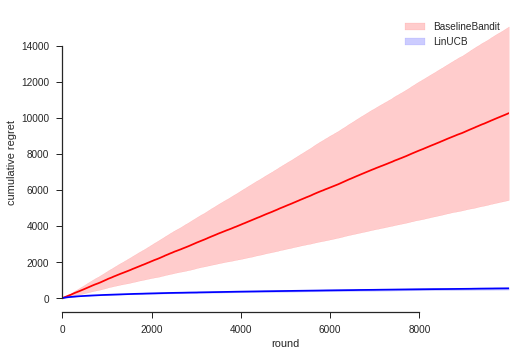

In [8]:
#Vary the confidence level, plot convergence rate, regret, risk
sns.tsplot(np.cumsum(regret, axis = 1), color = 'red')
sns.tsplot(np.cumsum(regret_linucb, axis = 1), color = 'blue')
plt.xlabel('round')
plt.ylabel('cumulative regret')
plt.legend(['BaselineBandit', 'LinUCB'])
sns.despine(trim = True)

In [ ]:
##Doesn't seem to work very well!!!